In [1]:
!which python

/c/Users/junec/AppData/Local/Programs/Python/Python38/python


In [2]:
import struct 
struct.calcsize("P")*8

32

In [3]:
# !pip list

In [4]:
# !pip install openpyxl
#!pip install Shapely
#!pip install descartes

# import

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
from operator import itemgetter
from typing import Callable, Dict, List, Set, Tuple

In [2]:
from util import calculate_derivative,pointInterval_to_pressure,timeInterval_to_sub_df
from baseline import detect_breakpoints_startPoint, detect_breakpoints, detect_breakpoints_2, detect_breakpoints_3,detect_breakpoints_4,detect_breakpoints_startPoint2
from plot import PlotNSave
from data_load_N_preprocess import LoadNPreprocessData
# from plot2 import group_index, plot_breakpoints,plot_4_metrics,plot_4_metrics_details,plot_detection_statistics,plot_histogram

# Synthetic data from Anton

## load & process data

In [3]:
#experiment setup
ground_truth=[107, 164, 243, 328, 375, 446, 644, 713, 771, 820, 887, 953, 1036, 1101, 1179, 1254, 1319, 1396, 1456, 1513, 1598, 1648, 1719, 1784, 1875, 1938, 2017, 2073, 2185, 2247, 2315, 2369, 2433, 2487, 2552, 2610, 2835, 2916, 2965, 3044, 3101, 3240, 3284, 3368, 3411]
print(len(ground_truth))

colum_names={"pressure":{"time":"Date",
                        "measure":"Pressure (psia)",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"Time@end",
                     "measure":"Liquid rate (STB/D)"}}
data_inOneRow=400
pressure_filePath="../data_input/Synthetic_Data.xlsx"
rate_filePath="../data_input/Synthetic_Data.xlsx"

45


In [4]:
processed_data=LoadNPreprocessData(pressure_filePath=pressure_filePath, 
                 rate_filePath=rate_filePath, 
                 colum_names=colum_names, 
                 use_SG_smoothing=False)
pressure_df=processed_data.pressure_df
rate_df=processed_data.rate_df

display(pressure_df)
display(rate_df)

first_order_derivative=pressure_df["first_order_derivative"]
second_order_derivative=pressure_df["second_order_derivative"]

---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe


Date  Pressure (psia)  first_order_derivative  \
0        0.000000      2000.000000            15175.401994   
1        0.006111      2092.738568             5434.926885   
2        0.012222      2125.952010             4083.606969   
3        0.018056      2149.773050             3121.879672   
4        0.024167      2168.851204             2636.342081   
...           ...              ...                     ...   
3514  5938.051389      2327.338989               -0.150989   
3515  5968.345556      2322.764893               -0.145646   
3516  5998.640000      2318.352641               -0.140636   
3517  6028.934444      2314.092149               -0.135957   
3518  6058.868056      2310.022464               -0.135957   

      second_order_derivative  
0               -1.593896e+06  
1               -2.211251e+05  
2               -1.648675e+05  
3               -7.945161e+04  
4               -5.537004e+04  
...                       ...  
3514             1.763948e-04  
3515             1.653610e-04  
3516             1.544522e-04  
3517             0.000000e+00  
3518             0.000000e+00  

[3519 rows x 4 columns]

Time@end  Liquid rate (STB/D)
0      0.000000         -6742.395145
1    253.216667         -8513.514104
2    264.358333             0.000000
3    274.191667         -5548.484464
4    296.716667         -8951.244013
..          ...                  ...
90  4465.793056             0.107707
91  4465.834722             0.105123
92  4465.909722         -1909.311284
93  5058.868056         -5453.279913
94  6058.868056             0.000000

[95 rows x 2 columns]

##  a segment of data & plot

Time@end  Liquid rate (STB/D)
66  3135.618333         -8943.319197
67  3136.701667         -2166.454130

Date  Pressure (psia)  first_order_derivative  \
2696  3135.247222      4489.018528                0.238560   
2697  3135.432778      4489.062794                0.238346   
2698  3135.618333      4489.107021           -15252.748665   
2699  3135.624444      4395.895779            -5722.594128   
2700  3135.630278      4362.513980            -3917.680337   
2701  3135.636389      4338.572600            -3019.609641   
2702  3135.645000      4312.570406            -2357.421223   
2703  3135.657500      4283.102641            -1804.675243   
2704  3135.675833      4250.016928            -1365.110874   
2705  3135.702778      4213.234774            -1026.044625   
2706  3135.742222      4172.763014             -762.648667   
2707  3135.800000      4128.698868             -558.491173   
2708  3135.885000      4081.227119             -404.943421   
2709  3136.010000      4030.609191             -291.953468   
2710  3136.193056      3977.165487             -207.936691   
2711  3136.461944      3921.253621             -165.848021   
2712  3136.581667      3901.397927             -147.678289   
2713  3136.701667      3883.676533            14200.962722   
2714  3136.707778      3970.460194             5235.605749   
2715  3136.713611      4001.001227             3546.026591   
2716  3136.719722      4022.671390             2703.111341   
2717  3136.728333      4045.948182             2080.246902   
2718  3136.740833      4071.951268             1562.198253   
2719  3136.759167      4100.591570             1151.549251   
2720  3136.786111      4131.619424              835.841641   
2721  3136.825556      4164.588734              592.648228   
2722  3136.883333      4198.830631              407.277662   
2723  3136.968333      4233.449232              271.258546   
2724  3137.093333      4267.356551              174.845398   
2725  3137.276389      4299.362972              107.714949   
2726  3137.545278      4328.326325               63.353389   
2727  3137.940000      4353.333316               35.434142   
2728  3138.519167      4373.855590               18.766690   
2729  3139.369722      4389.817702                9.401945   
2730  3140.617778      4401.551852                4.432272   
2731  3142.449444      4409.670297                1.951343   
2732  3145.138333      4414.917241                0.794159   
2733  3149.085278      4418.051741                0.298648   

      second_order_derivative  
2696            -1.152331e-03  
2697            -8.220173e+04  
2698             1.559480e+06  
2699             3.094138e+05  
2700             1.469570e+05  
2701             7.689930e+04  
2702             4.421968e+04  
2703             2.397624e+04  
2704             1.258390e+04  
2705             6.677644e+03  
2706             3.533495e+03  
2707             1.806444e+03  
2708             9.039196e+02  
2709             4.589687e+02  
2710             1.565281e+02  
2711             1.517657e+02  
2712             1.195720e+05  
2713            -1.467058e+06  
2714            -2.896421e+05  
2715            -1.379316e+05  
2716            -7.233264e+04  
2717            -4.144389e+04  
2718            -2.239904e+04  
2719            -1.171698e+04  
2720            -6.165467e+03  
2721            -3.208337e+03  
2722            -1.600225e+03  
2723            -7.713052e+02  
2724            -3.667217e+02  
2725            -1.649810e+02  
2726            -7.073138e+01  
2727            -2.877833e+01  
2728            -1.101015e+01  
2729            -3.981933e+00  
2730            -1.354465e+00  
2731            -4.303578e-01  
2732            -1.255427e-01  
2733            -3.202099e-02

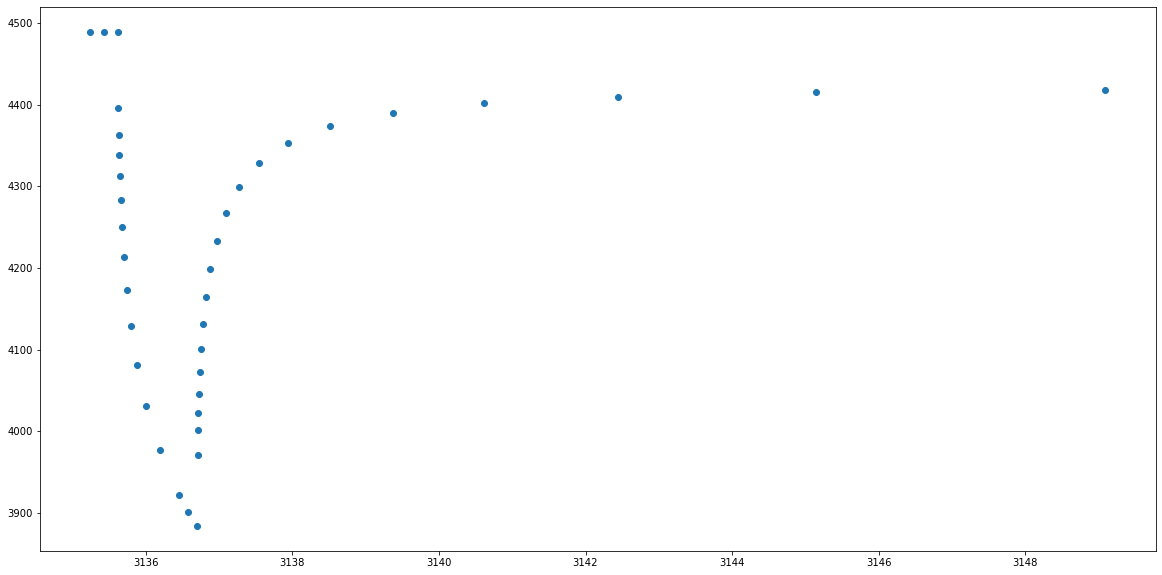

In [5]:
plt.figure(figsize = (20, 10))
sub_rate_df,sub_pressure_df=timeInterval_to_sub_df(3110,3150,pressure_df,rate_df,colum_names)
display(sub_rate_df,sub_pressure_df)
x=sub_pressure_df["Date"]
y=sub_pressure_df["Pressure (psia)"]
plt.scatter(x=x,y=y)

## plot ground truth

---initializing...
---plotting...
detected 45 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[107, 164, 243, 328, 375]


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


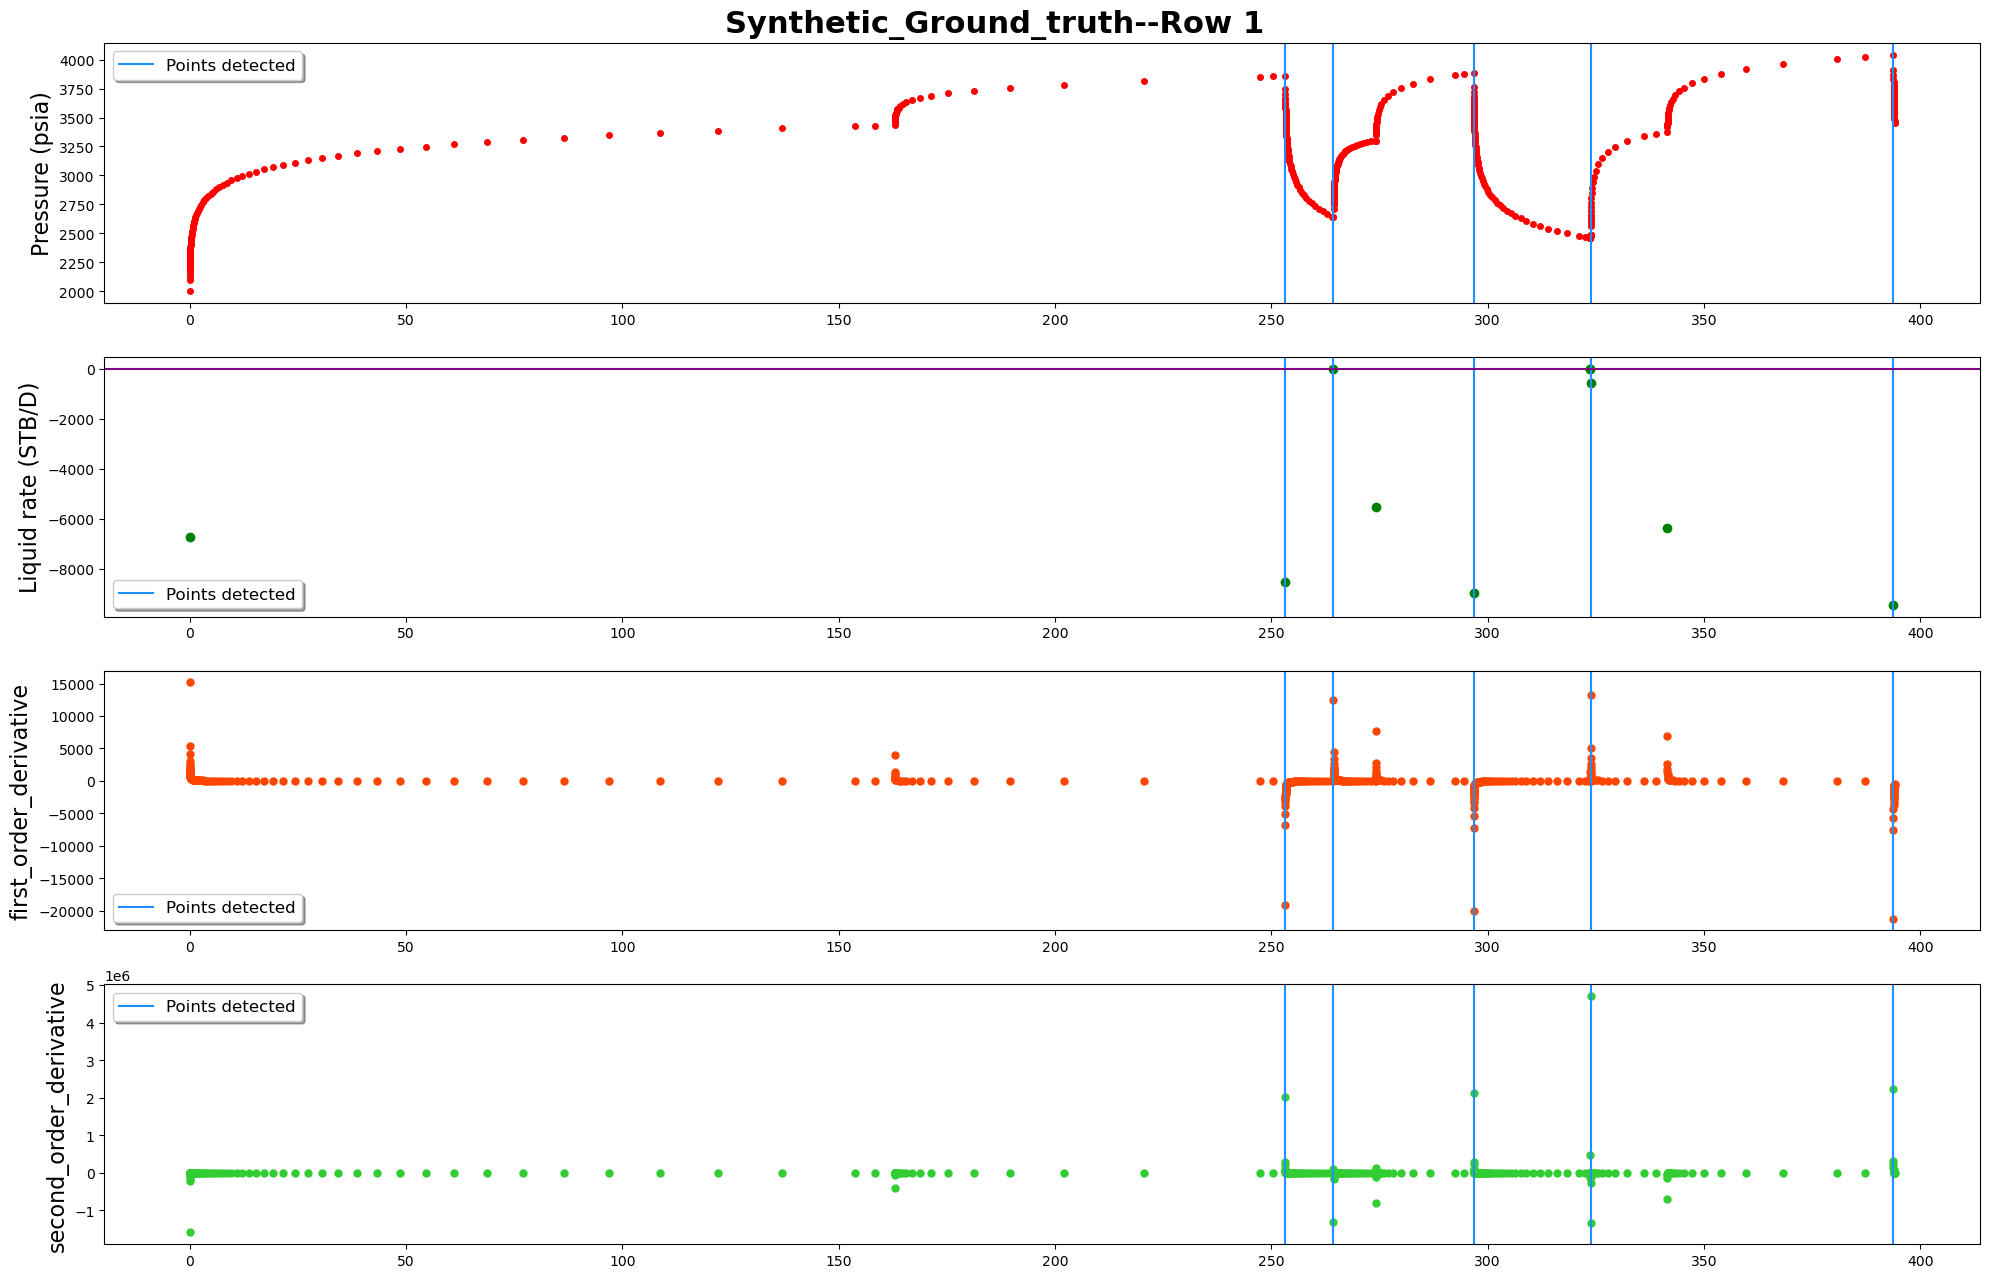

------row 2-----detected points:[446, 644, 713, 771]


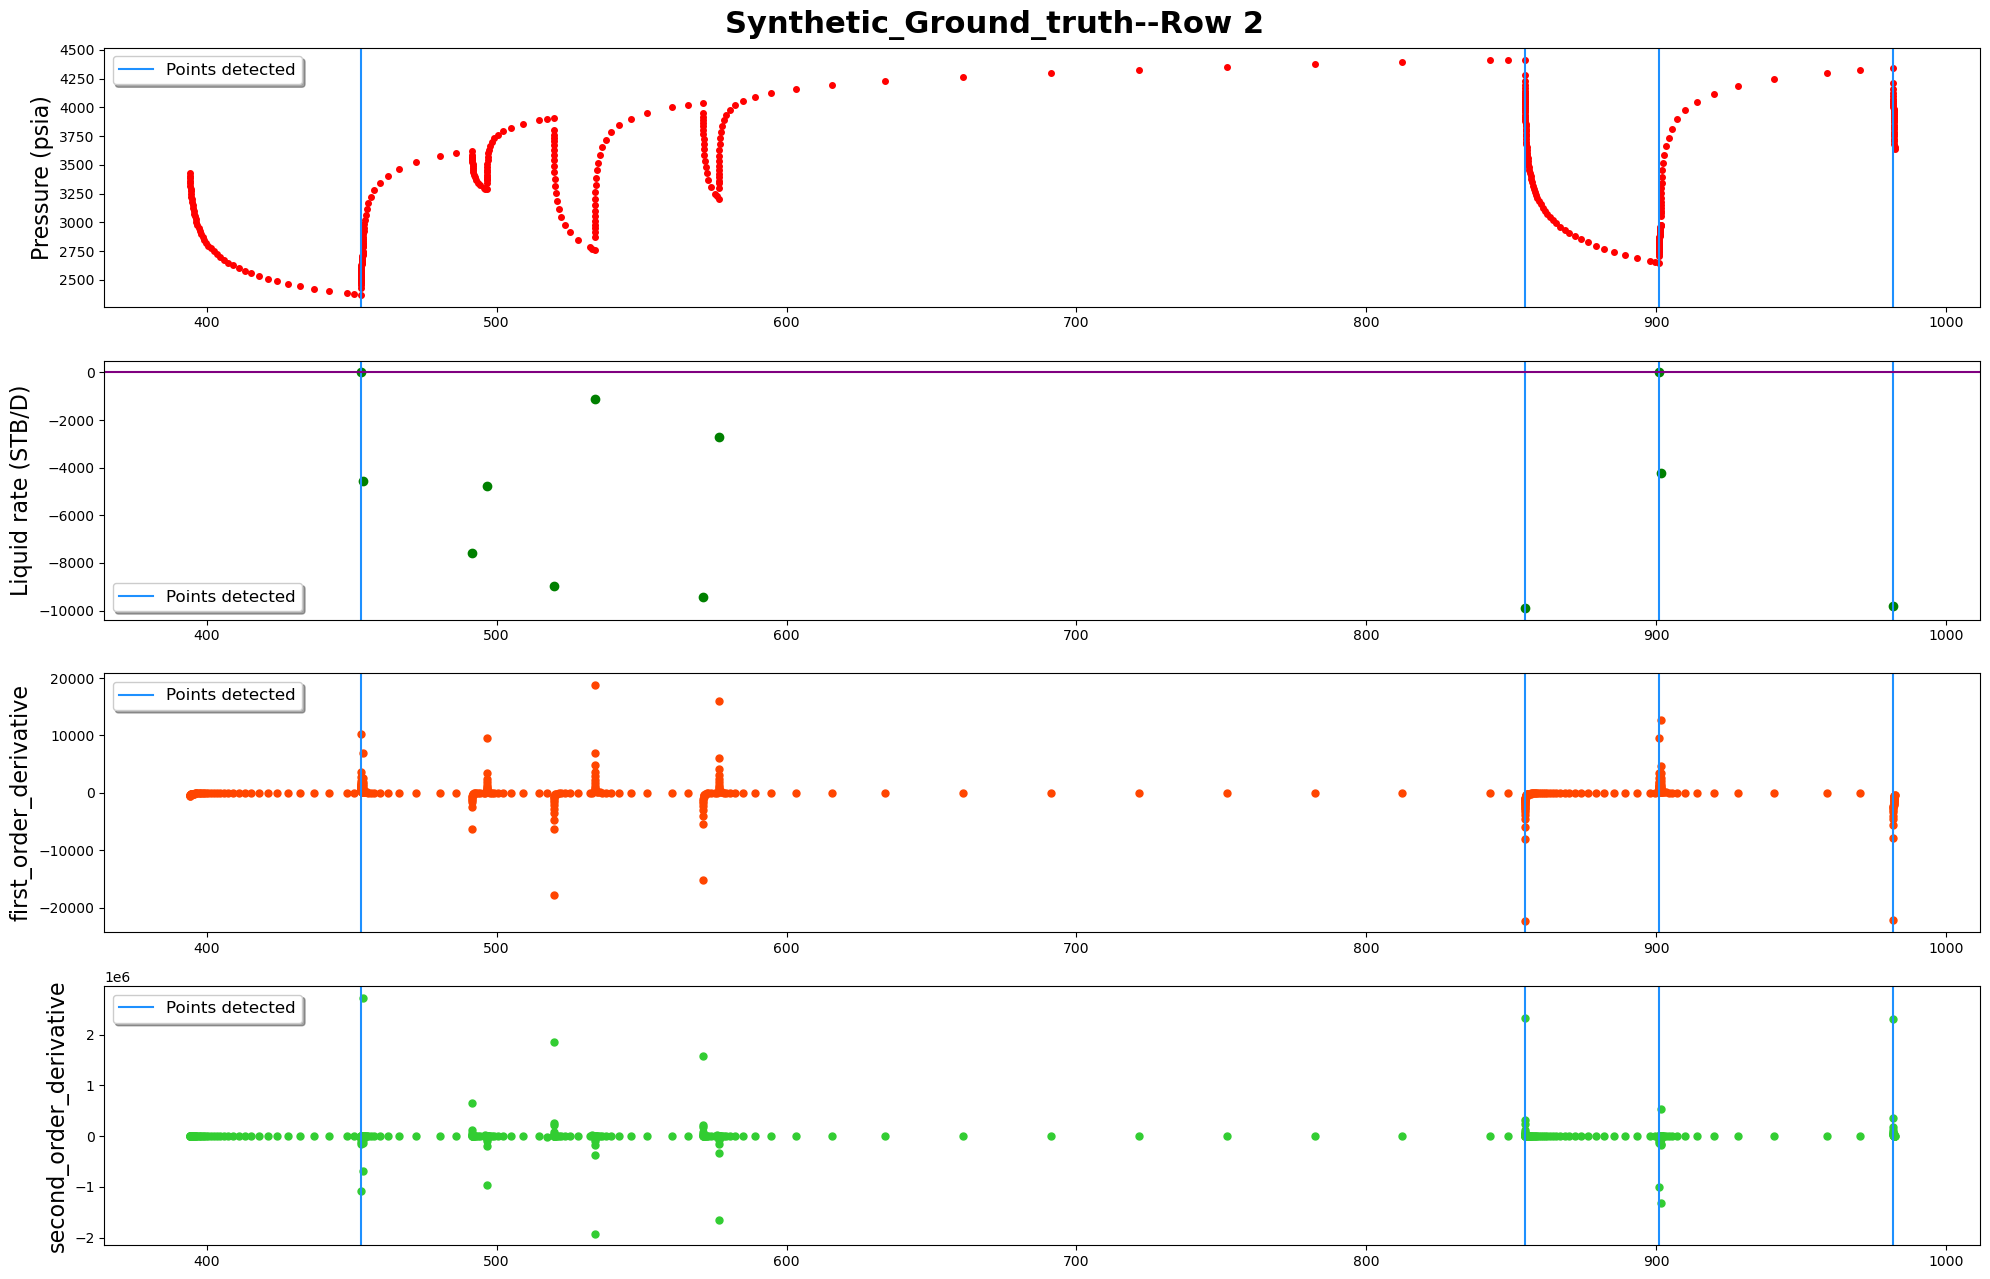

------row 3-----detected points:[820, 887, 953, 1036, 1101, 1179]


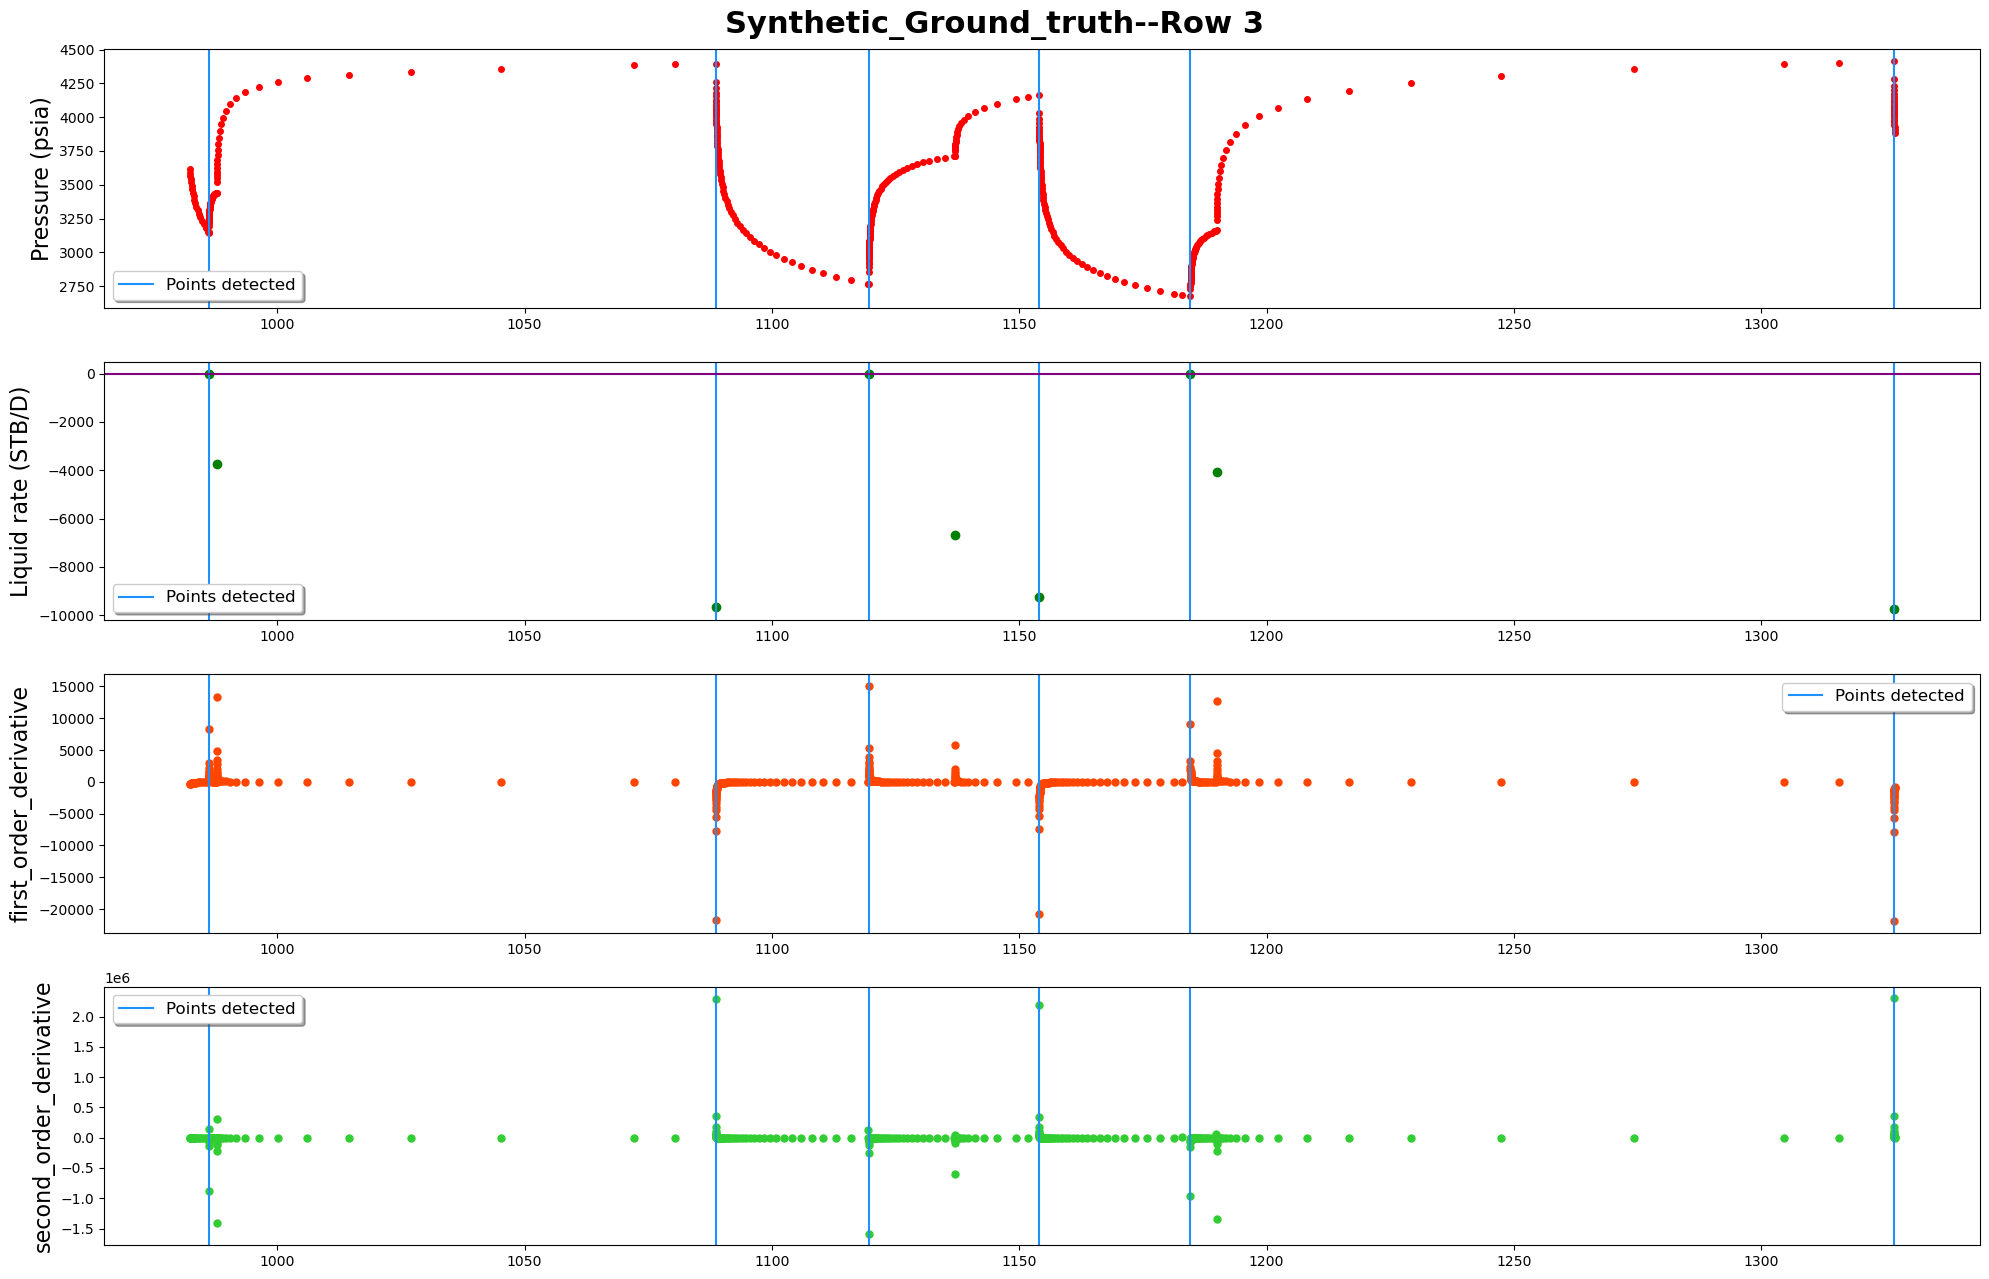

------row 4-----detected points:[1254, 1319, 1396, 1456, 1513, 1598]


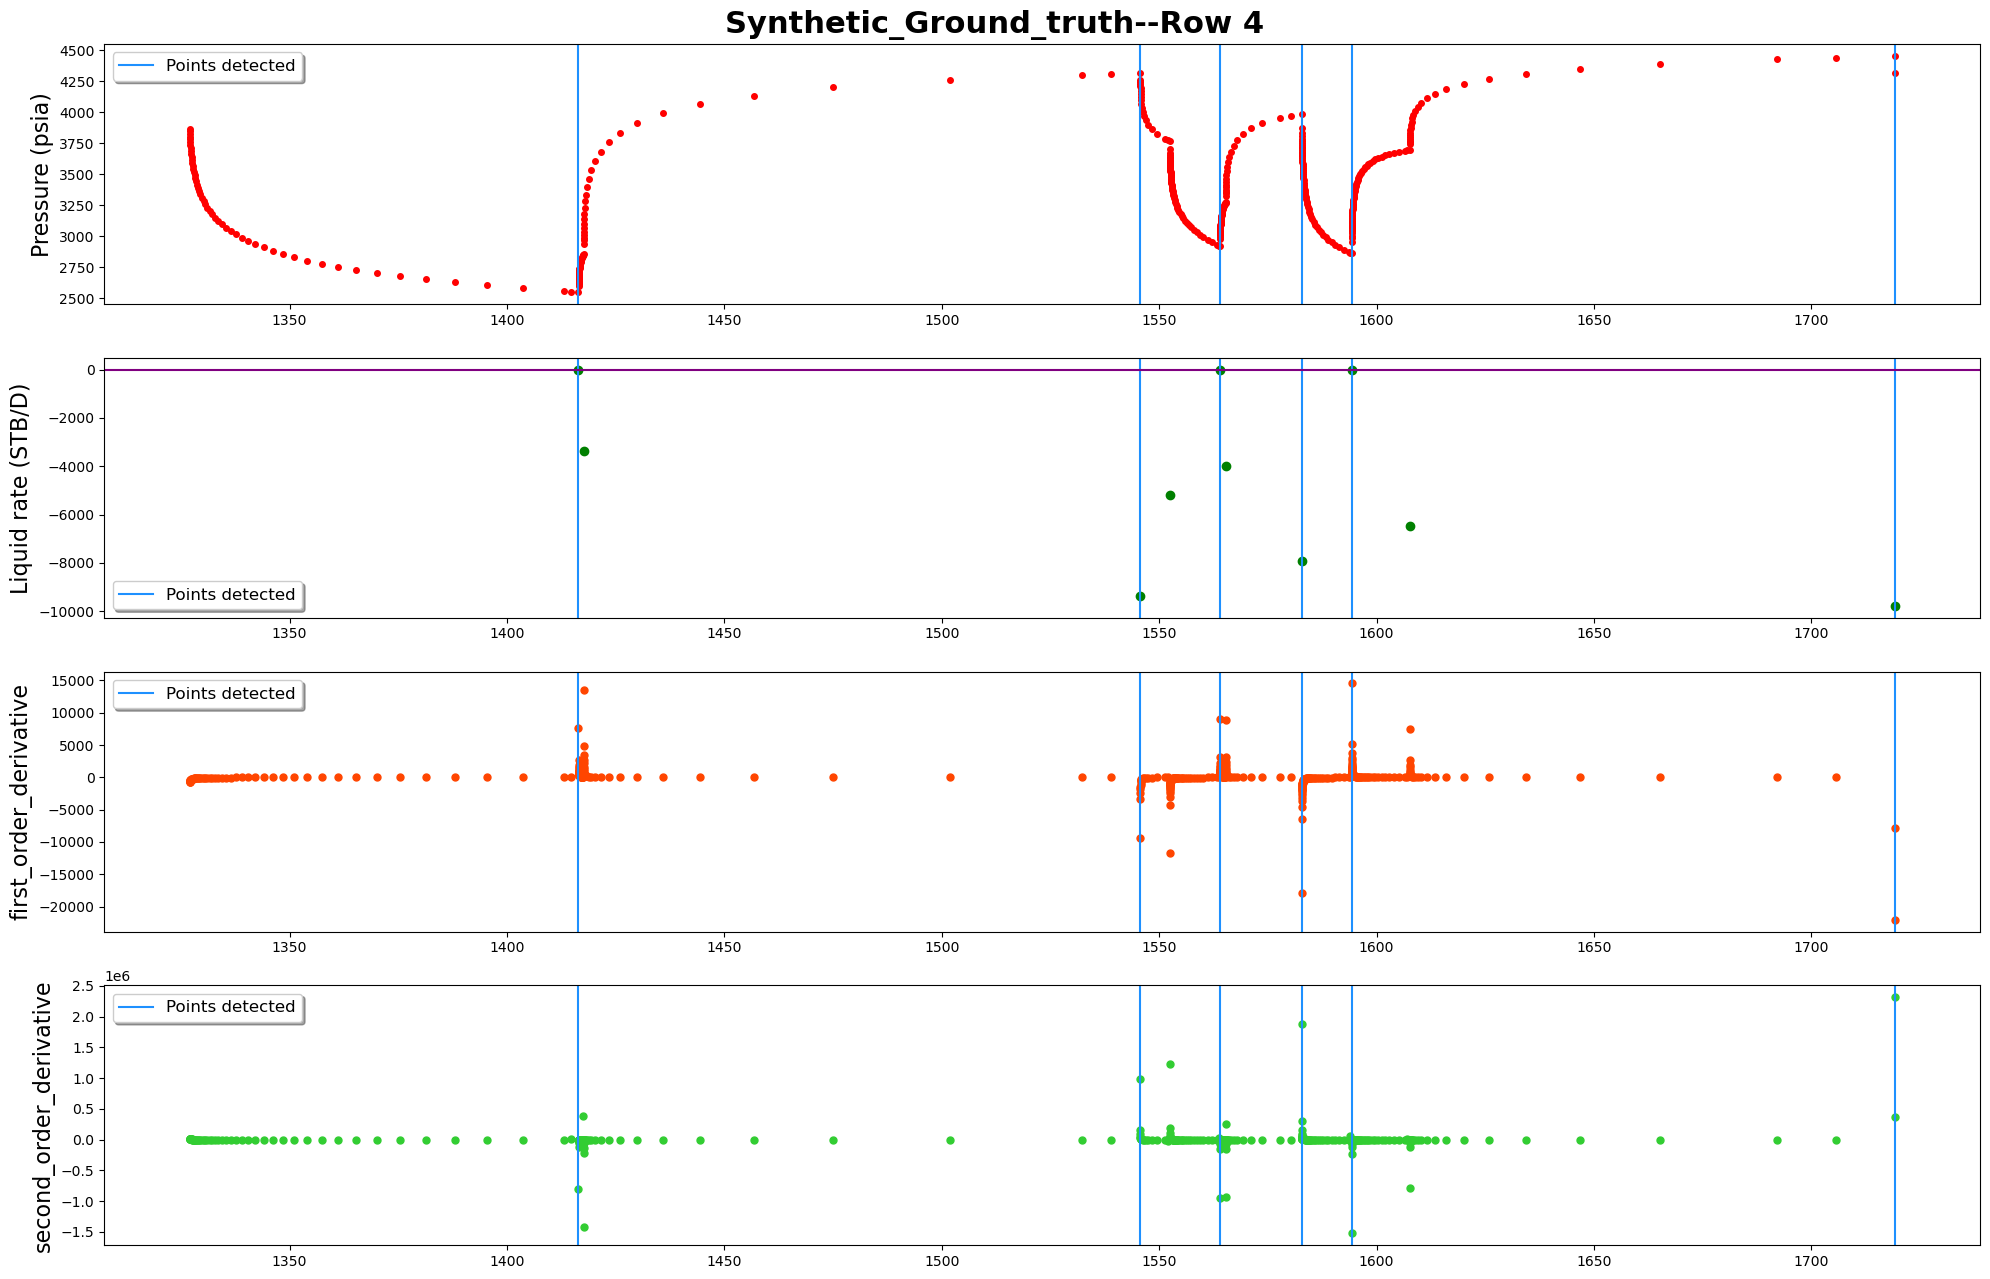

------row 5-----detected points:[1648, 1719, 1784, 1875, 1938]


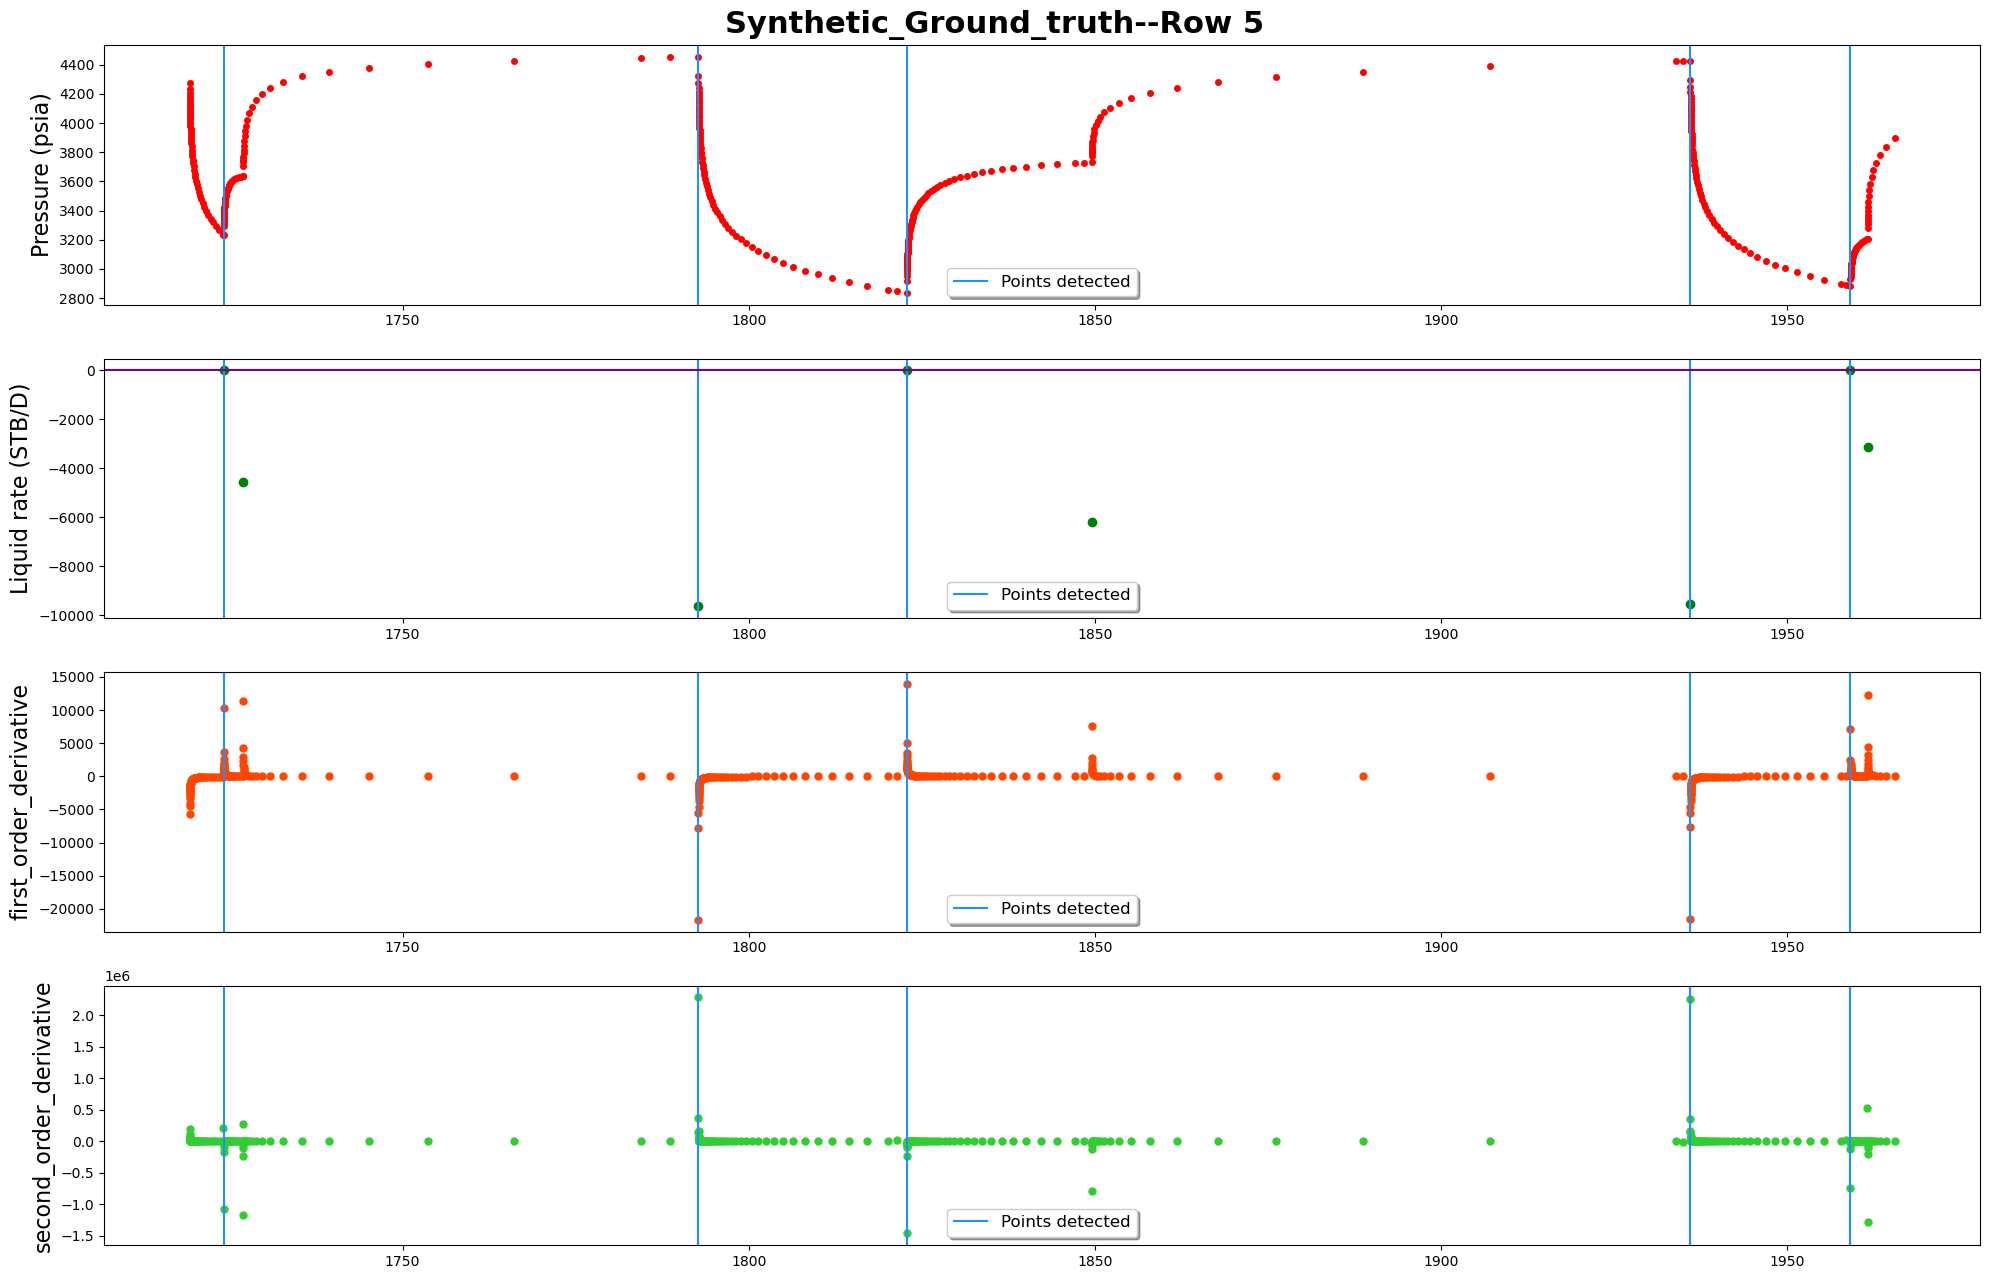

------row 6-----detected points:[2017, 2073, 2185, 2247, 2315, 2369]


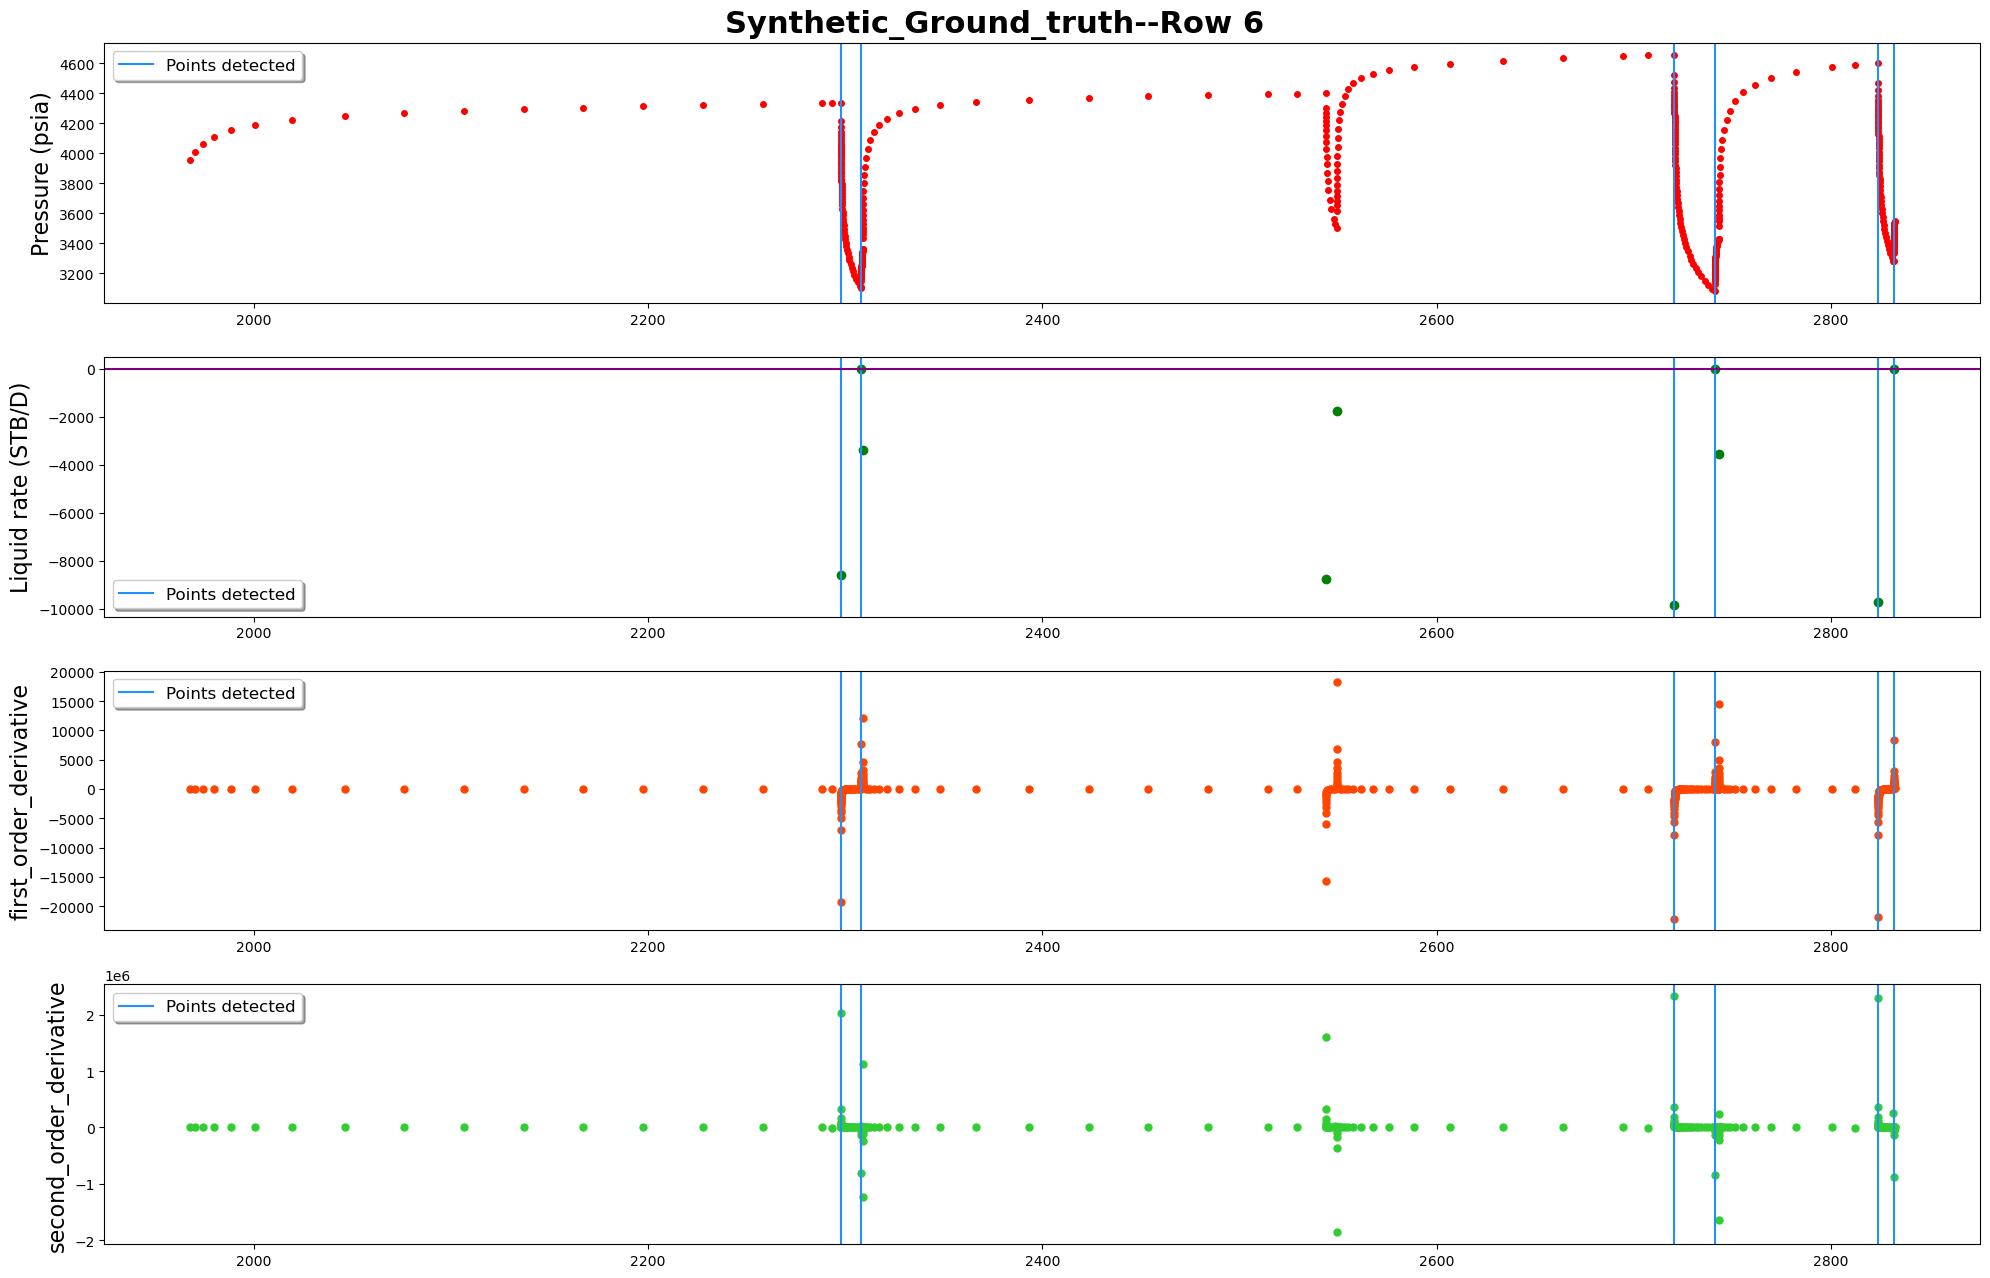

------row 7-----detected points:[2433, 2487, 2552, 2610]


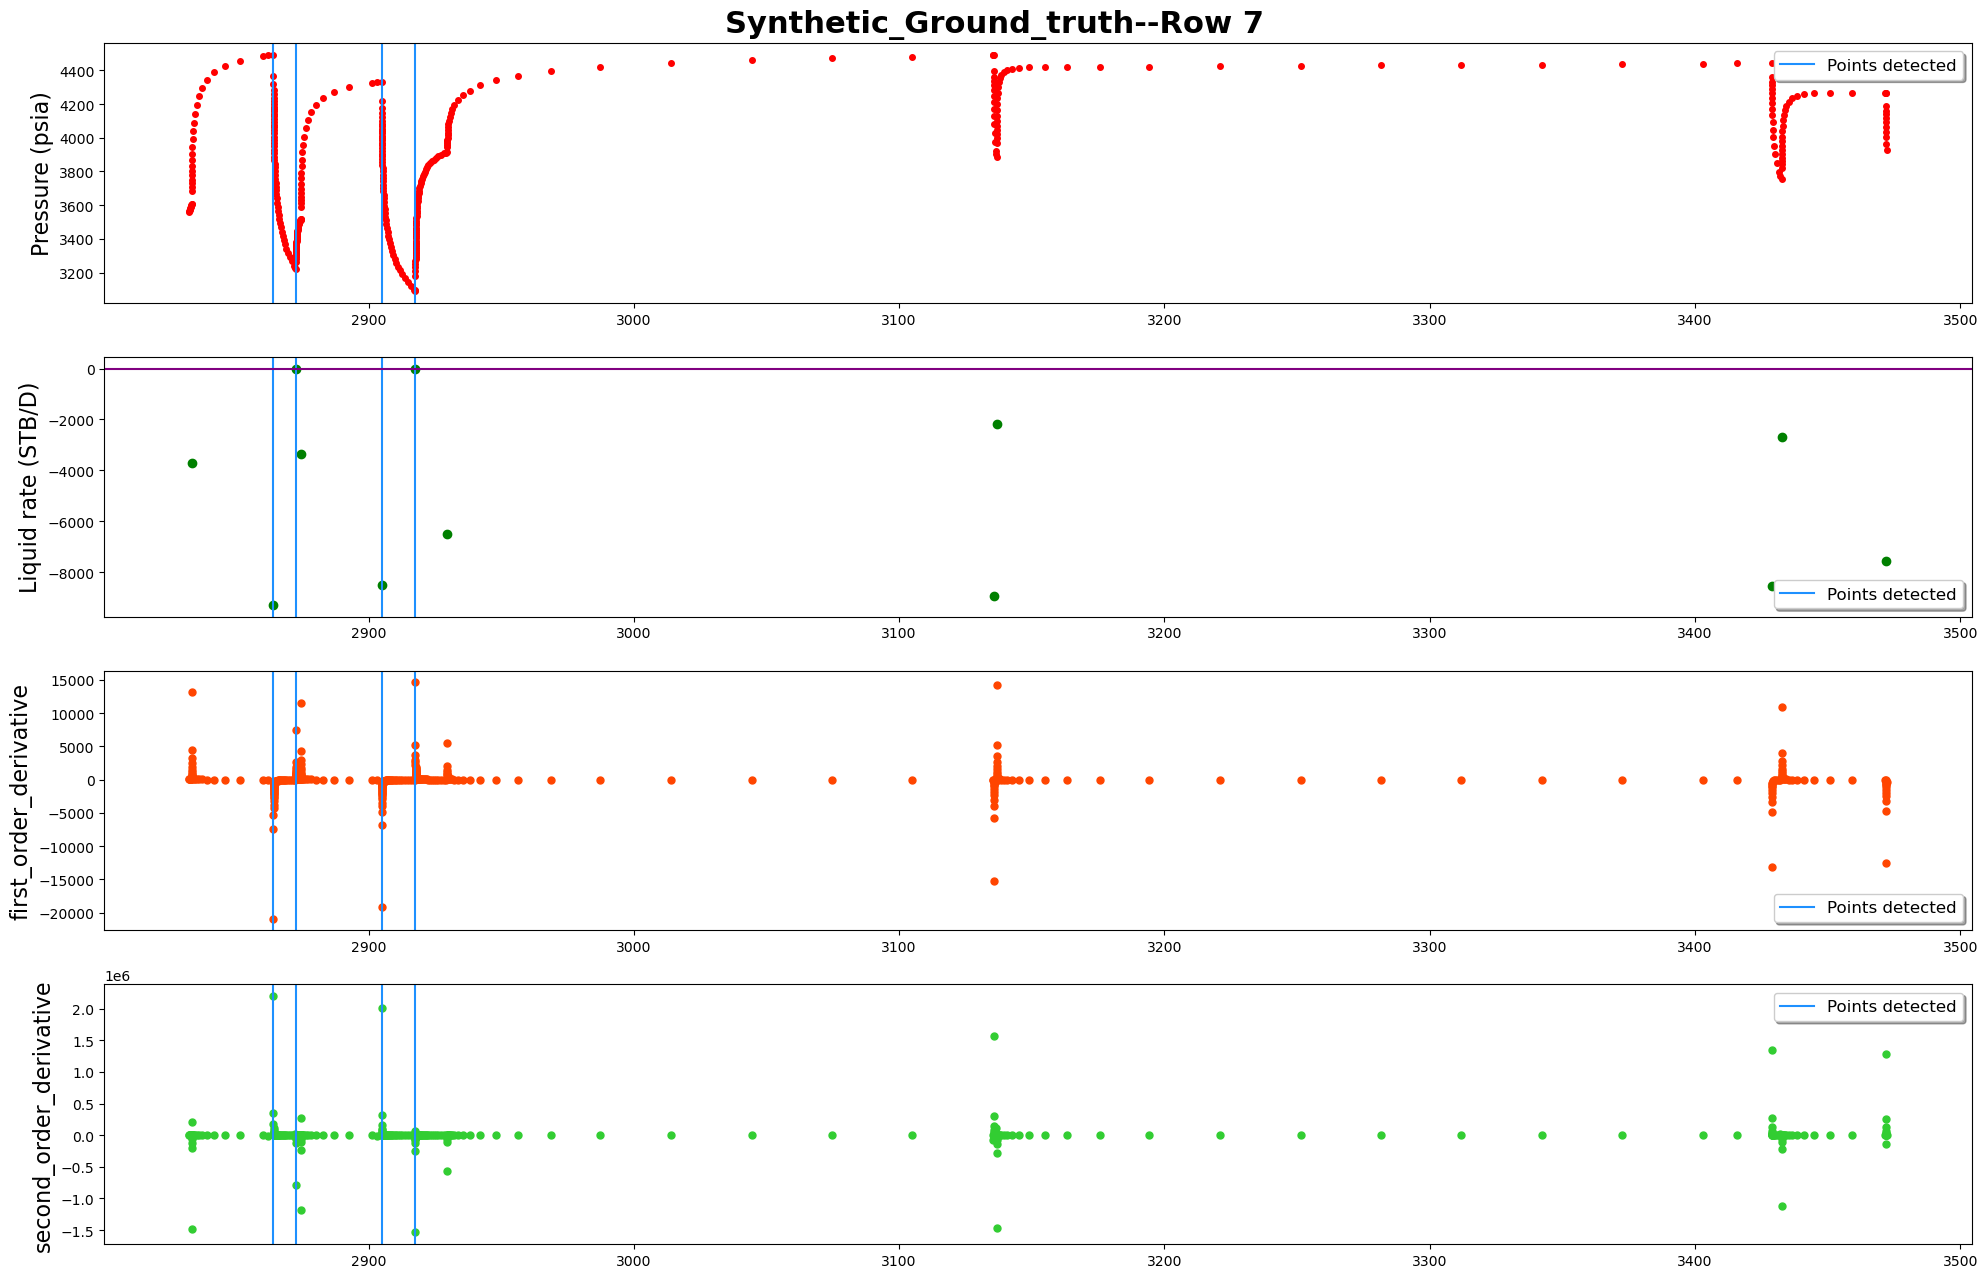

------row 8-----detected points:[2835, 2916, 2965, 3044, 3101]


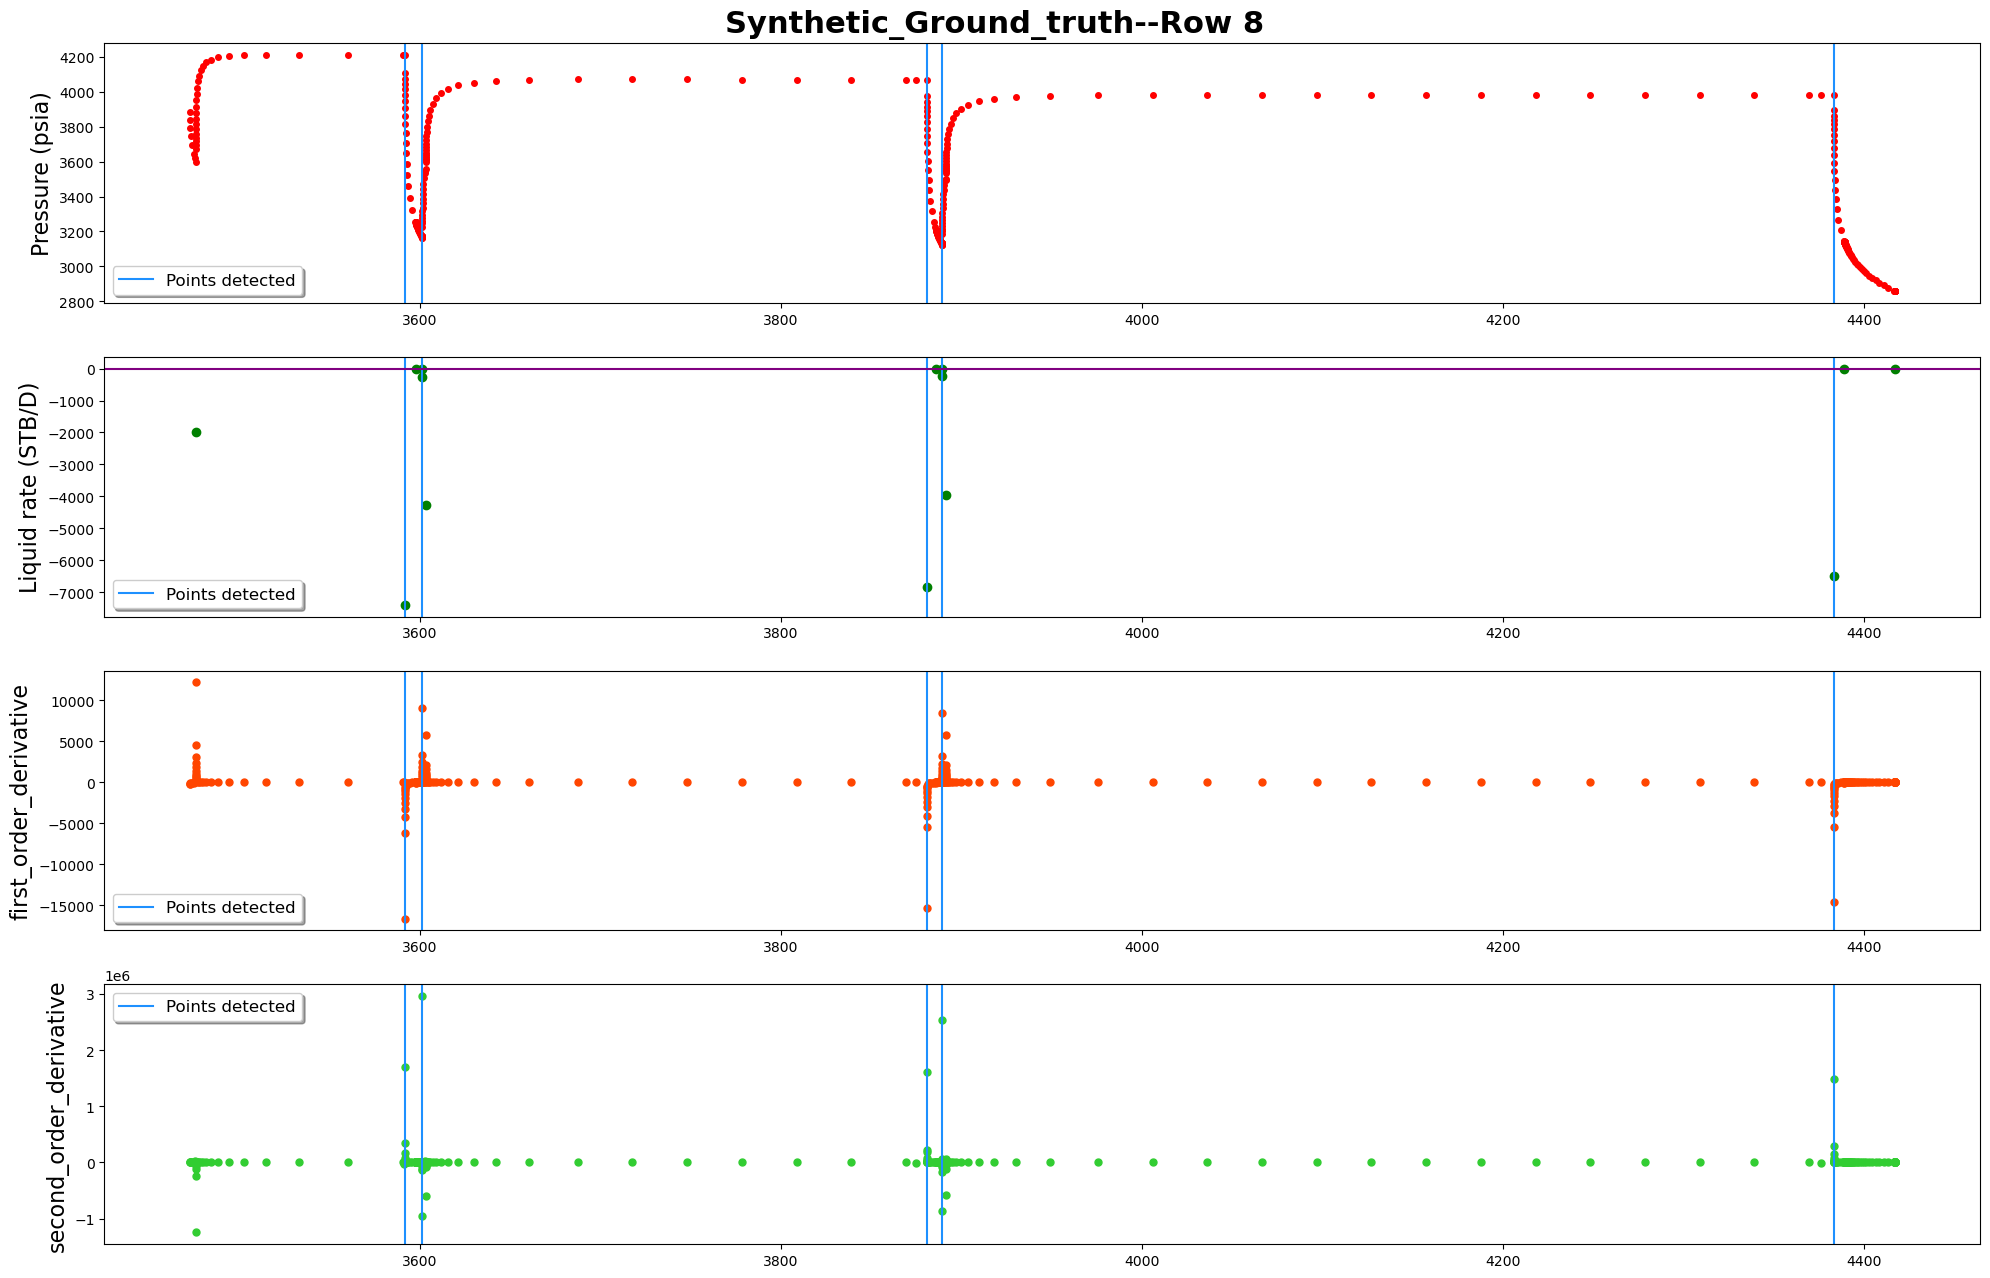

------row 9-----detected points:[3240, 3284, 3368, 3411]


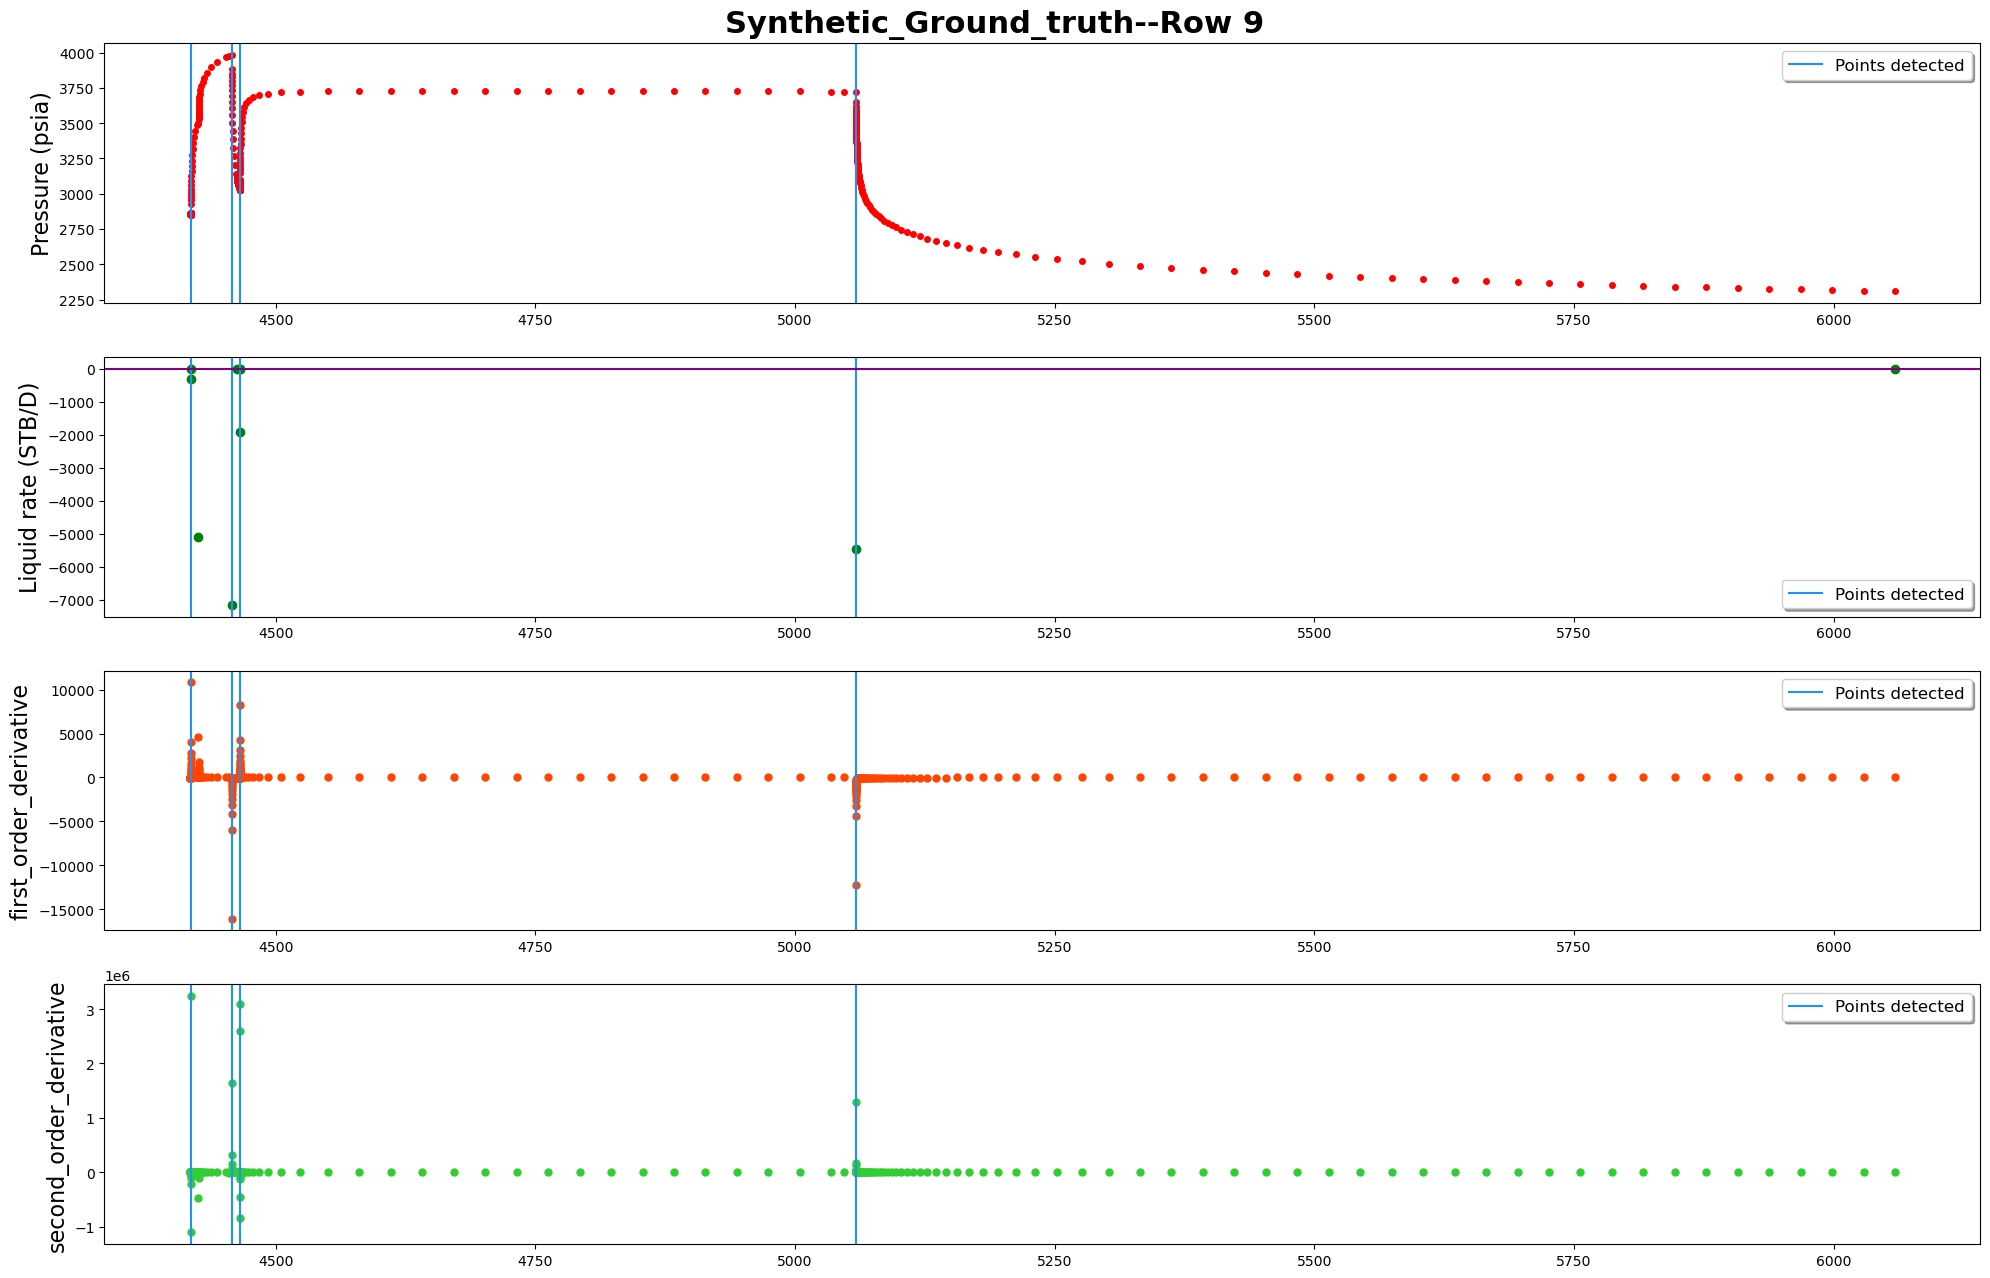

In [6]:
#save and plot ground truth breakpoints
filename_toSave="../data_output/Synthetic_Ground_truth.pdf"
plot_name="Synthetic_Ground_truth"
plot_whole=False
plot_details=True
plot_statistics=False
PlotNSave(pressure_df,
          rate_df,
          ground_truth,
          [],
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
# data=pressure_df["first_order_derivative"]
# xlabel="first_order_derivative"
# ylabel="count"
# title='histogram--synthetic data'
# plot_histogram(data, xlabel, ylabel,title)

## detect using startPoint2 method

---initializing...
---plotting...
the number of ground_truth 45
the number of points_correct 44
the number of points_faulty 27
the number of points_missed 1


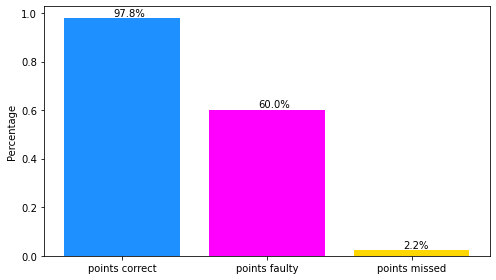

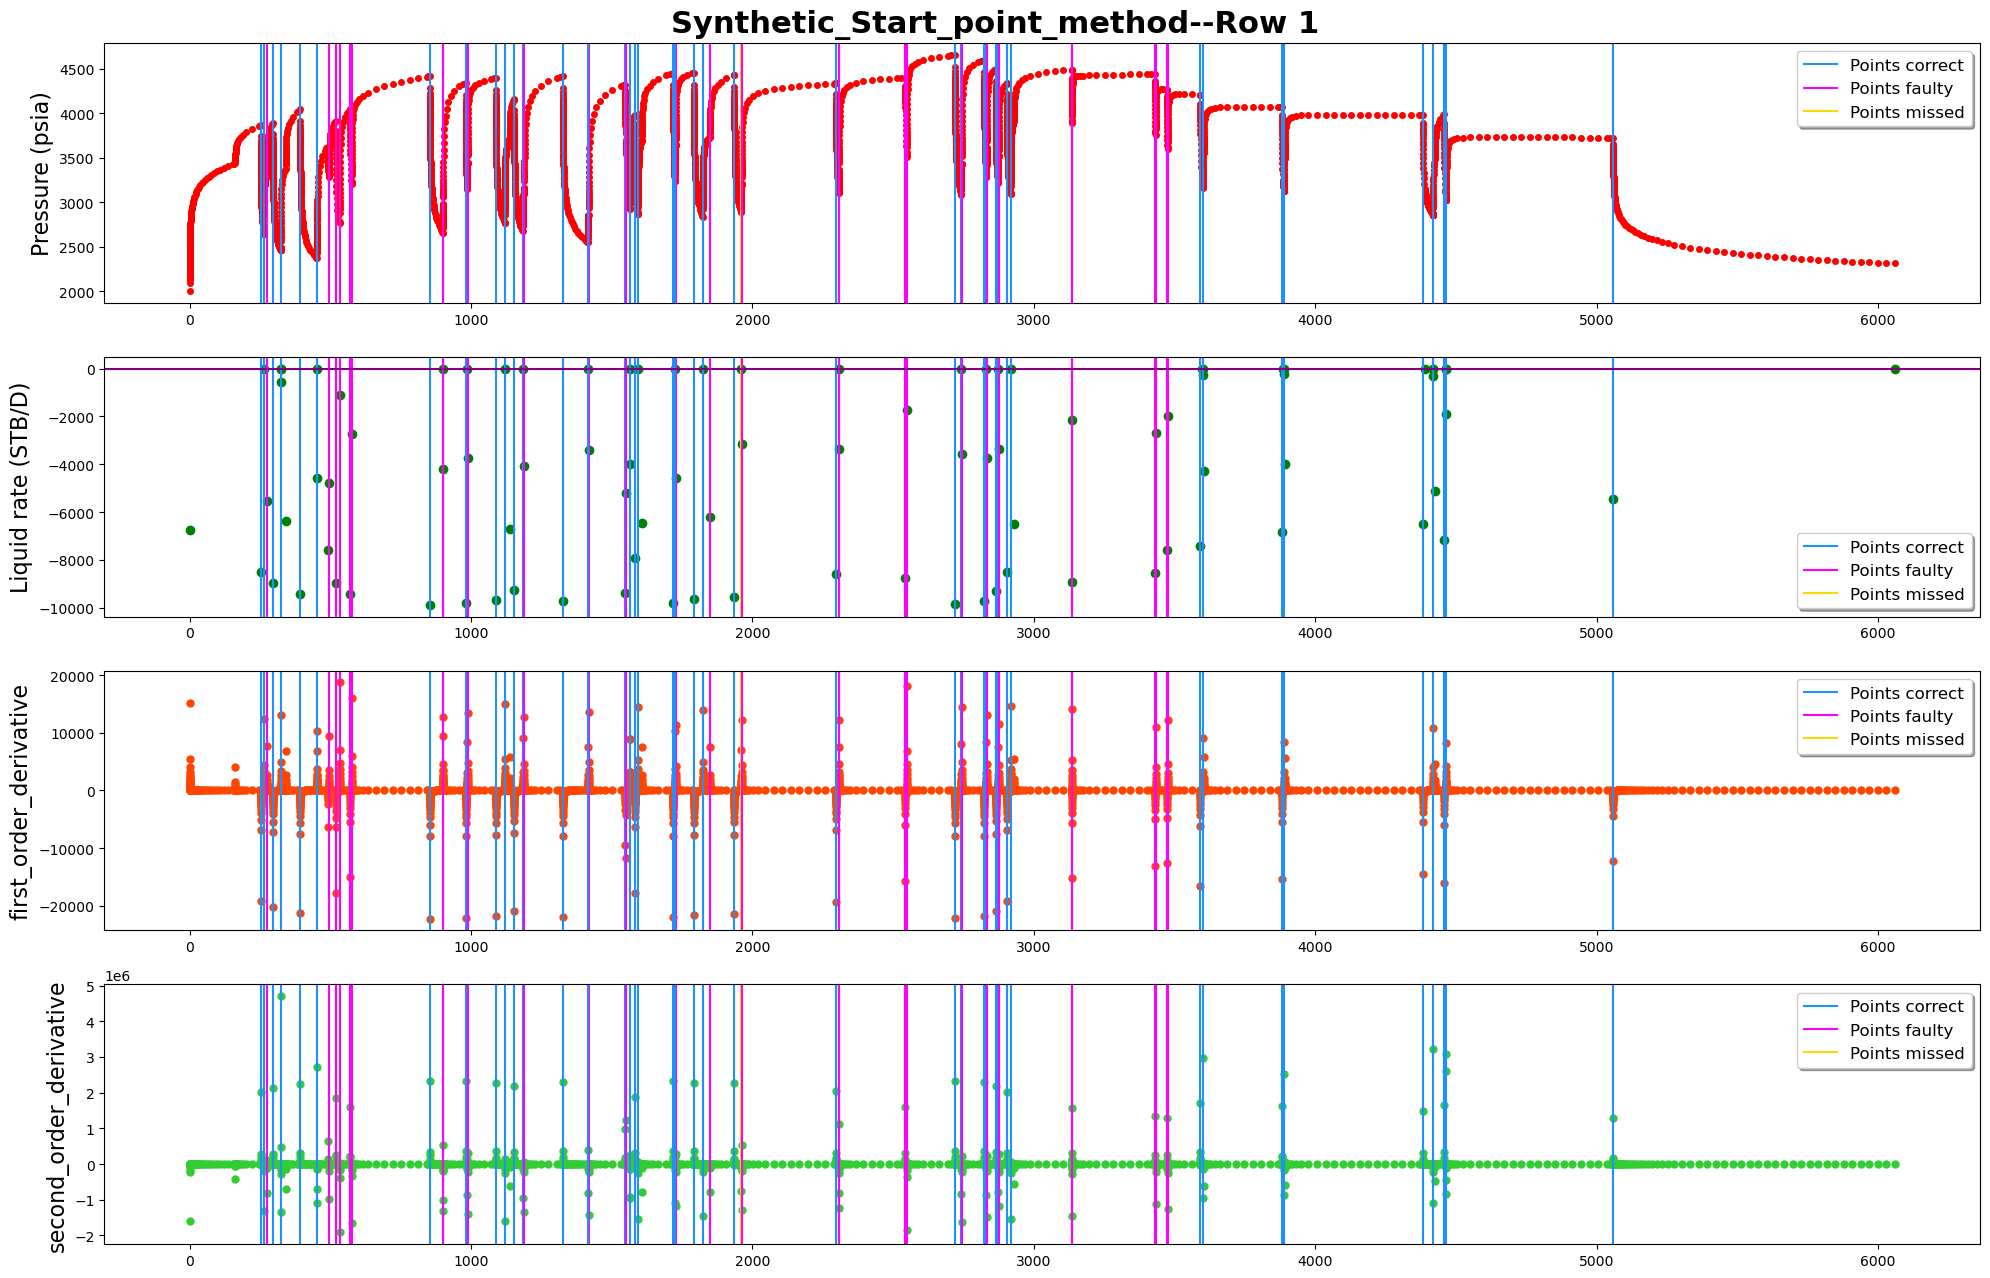

detected 71 points as breakpoints
The plot is devided into 9 rows
------row 1-----correctly detected points:[107, 164, 243, 328, 375]
------row 1-----faulty detected points:[220]
------row 1-----missed breakpoints:[]


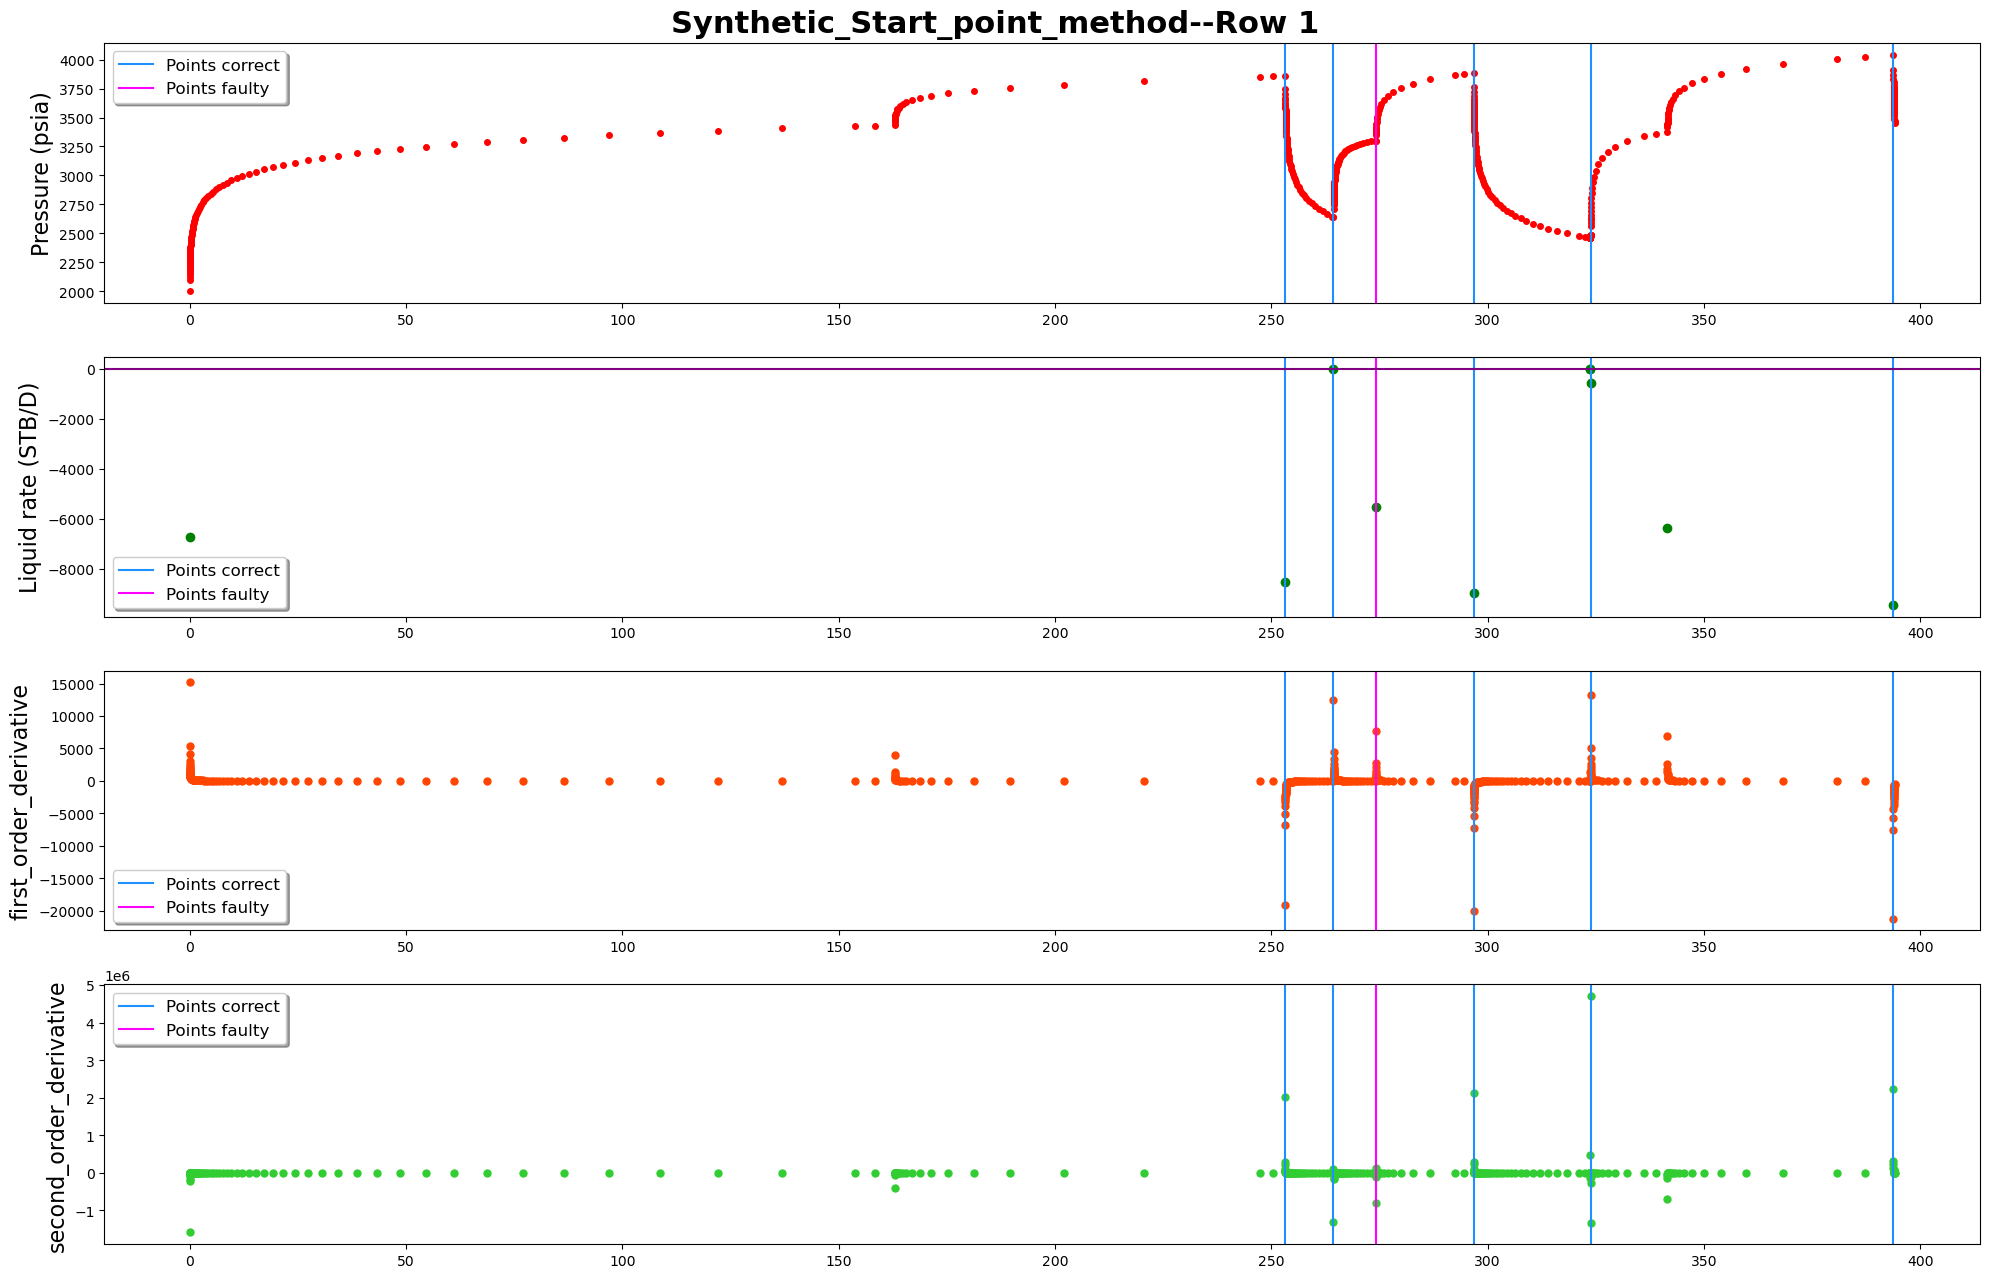

------row 2-----correctly detected points:[446, 644, 713, 771]
------row 2-----faulty detected points:[523, 546, 568, 592, 611, 745]
------row 2-----missed breakpoints:[]


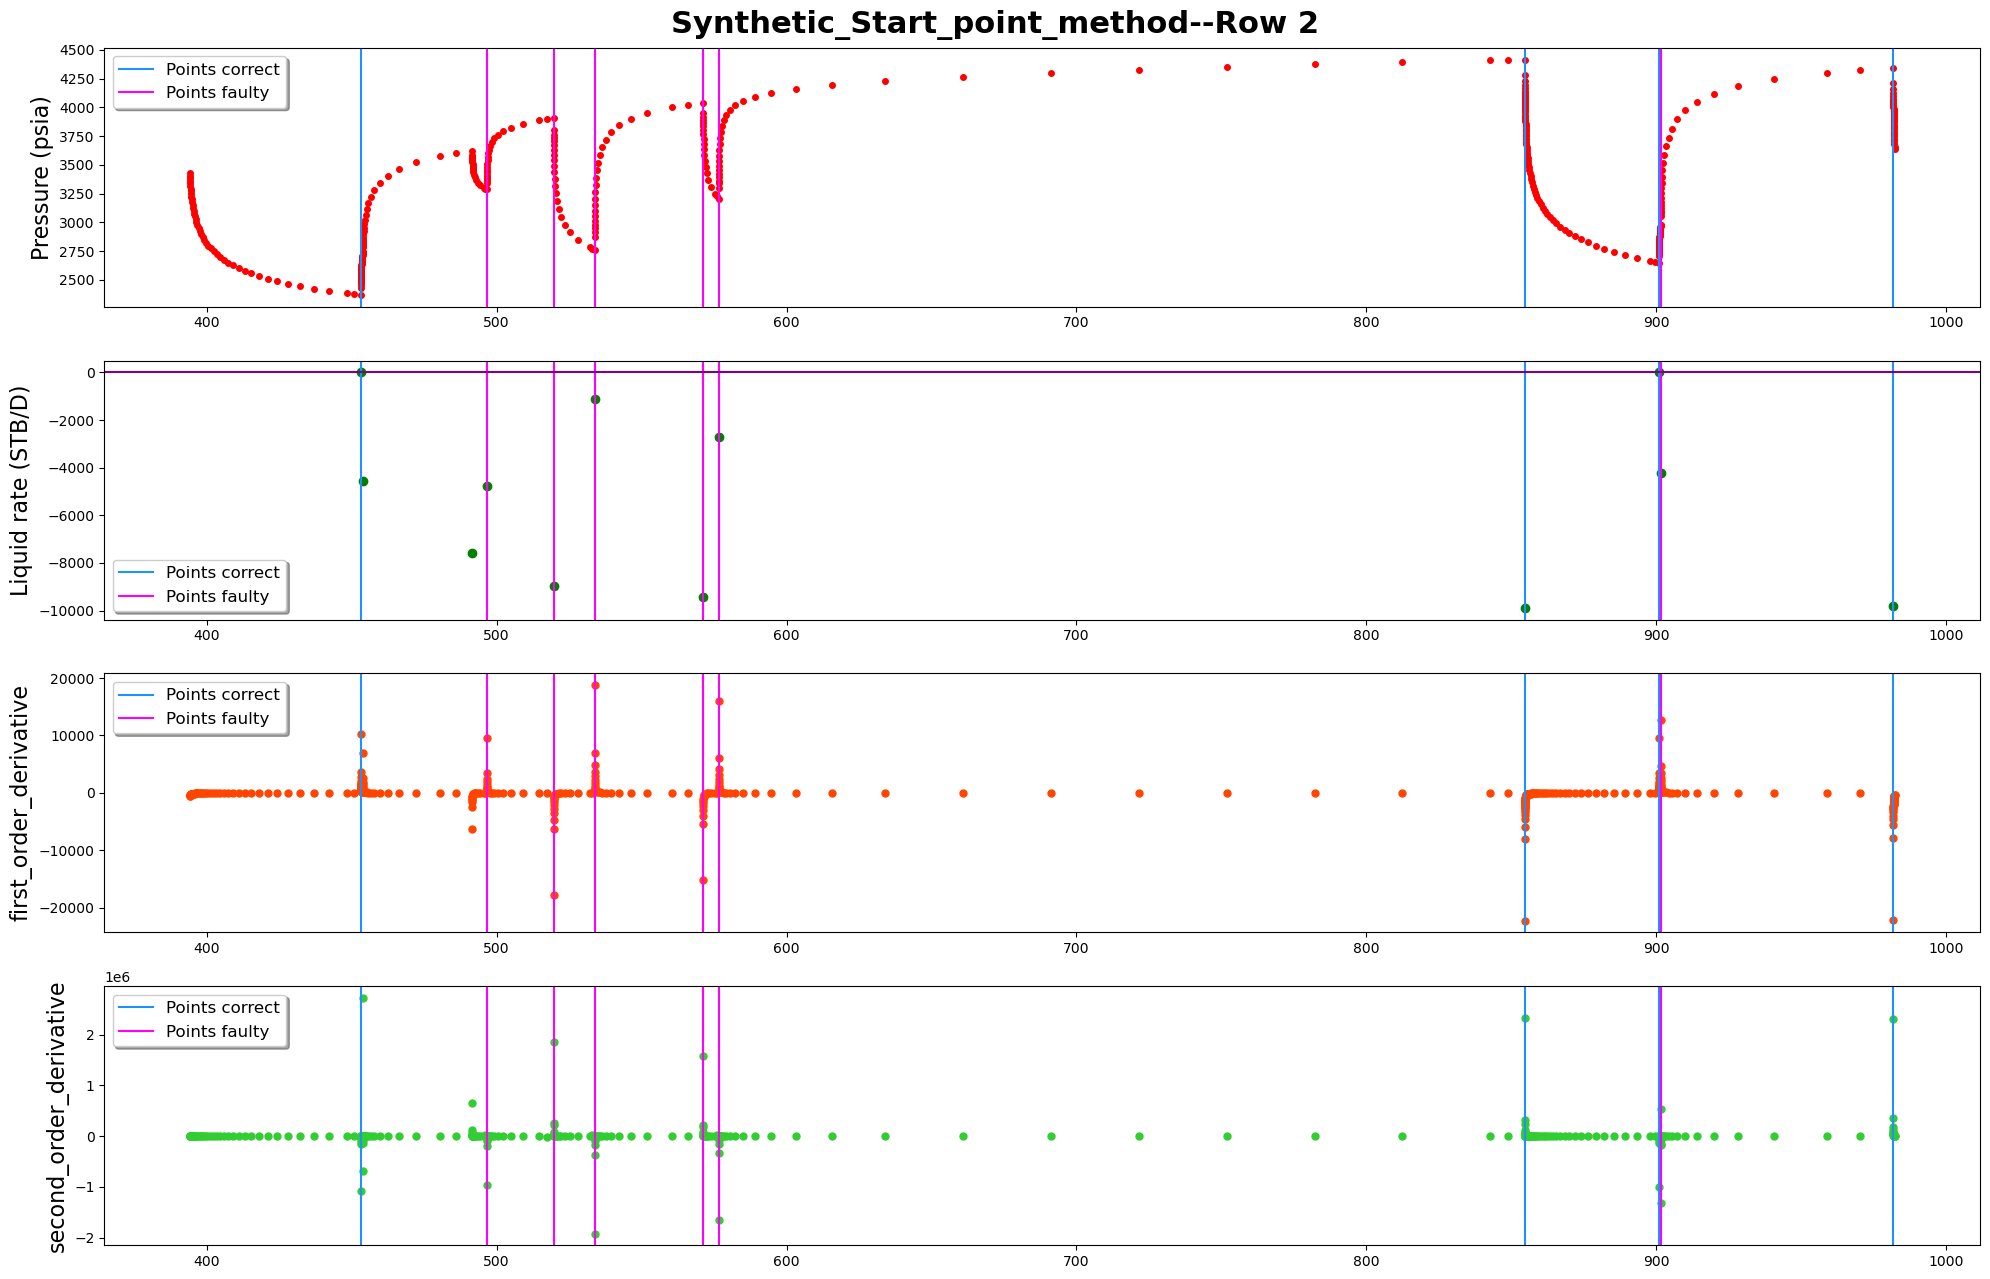

------row 3-----correctly detected points:[820, 887, 953, 1036, 1101, 1179]
------row 3-----faulty detected points:[860, 1151]
------row 3-----missed breakpoints:[]


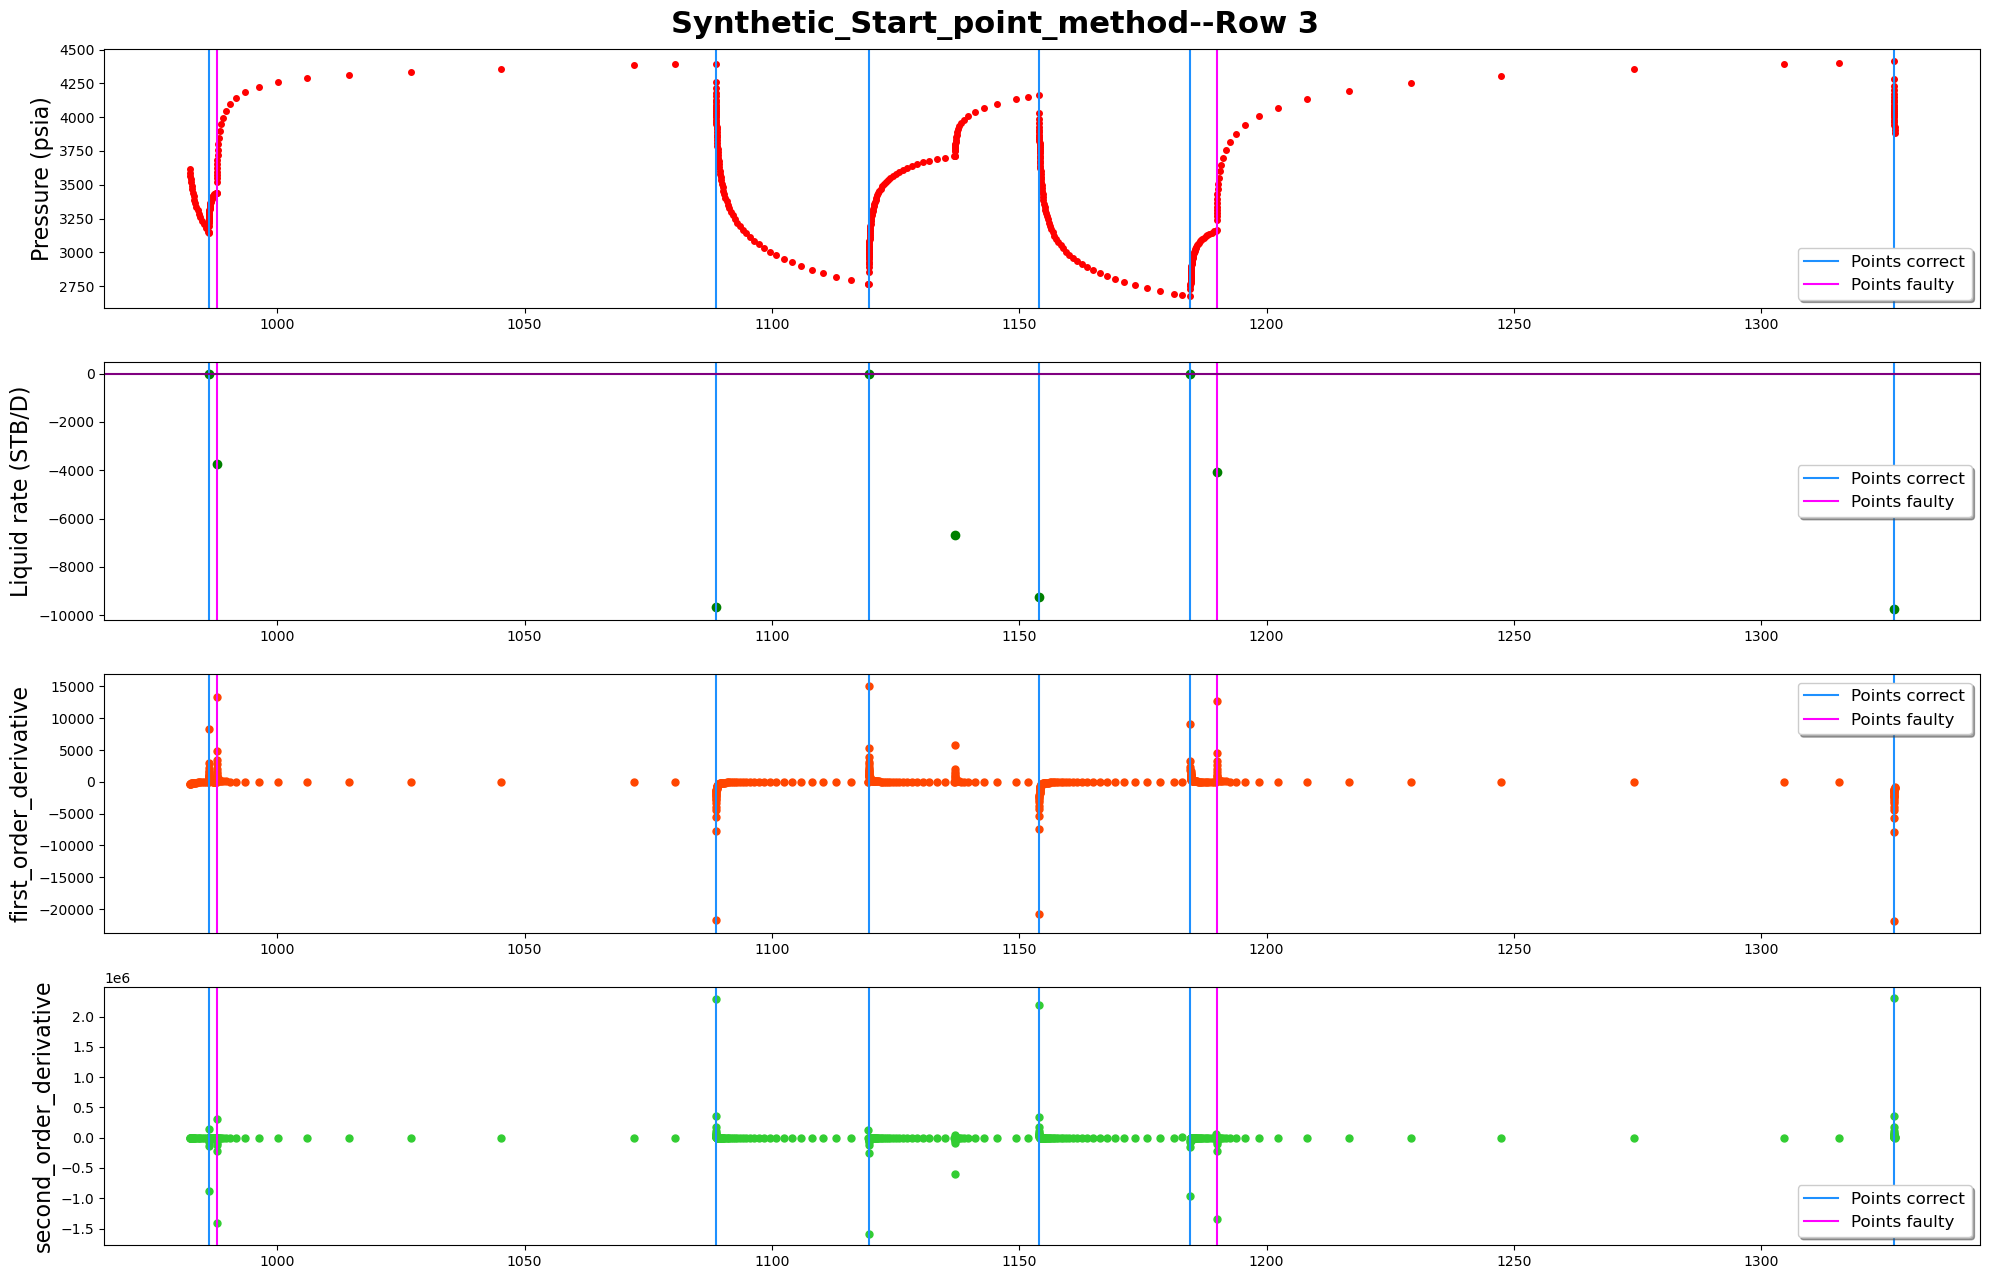

------row 4-----correctly detected points:[1254, 1319, 1396, 1456, 1513, 1598]
------row 4-----faulty detected points:[1291, 1339, 1434]
------row 4-----missed breakpoints:[]


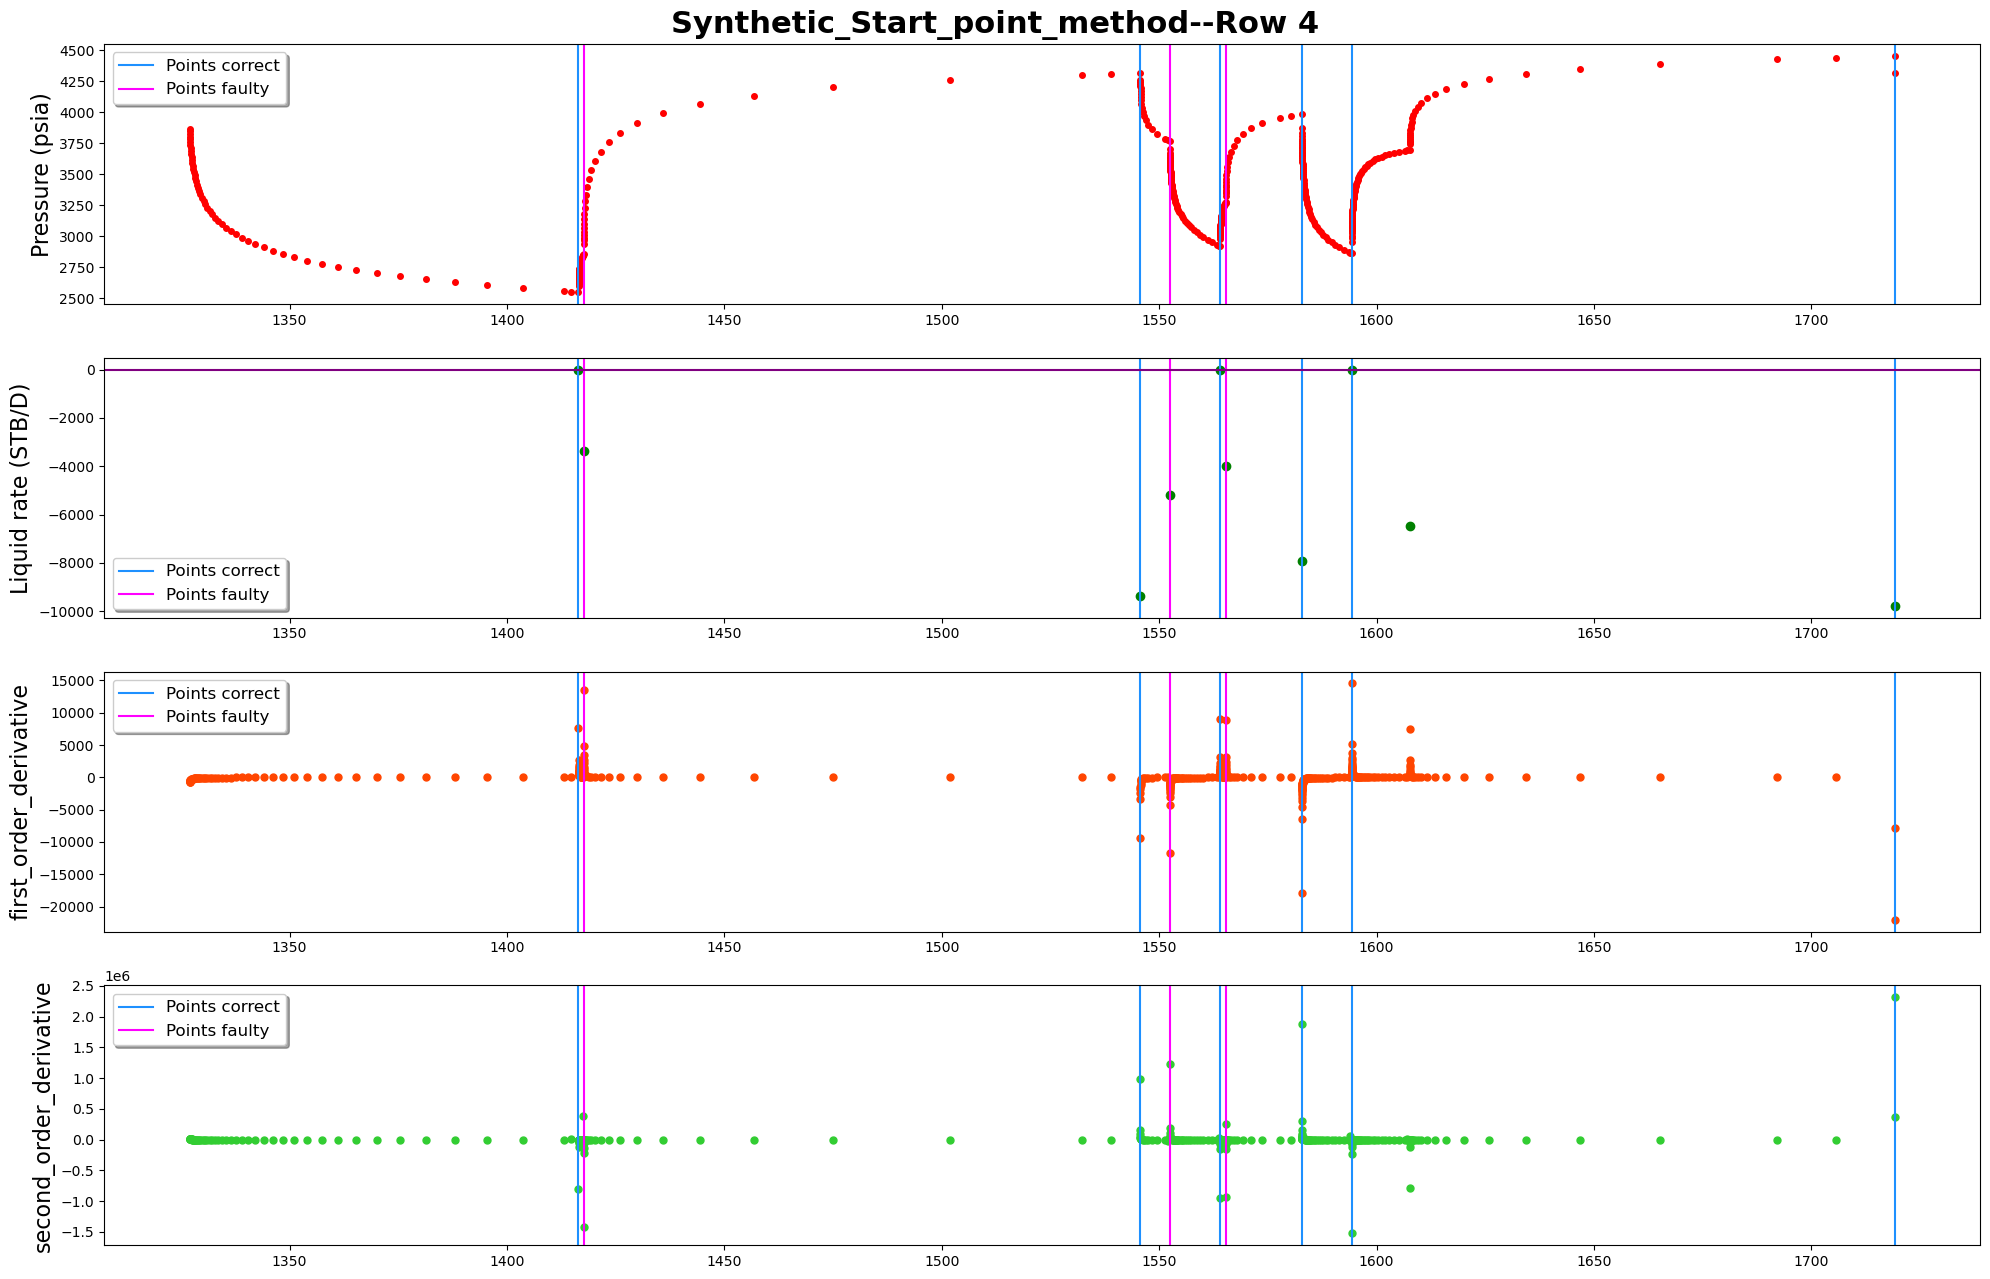

------row 5-----correctly detected points:[1648, 1719, 1784, 1875]
------row 5-----faulty detected points:[1693, 1848, 1982]
------row 5-----missed breakpoints:[1938]


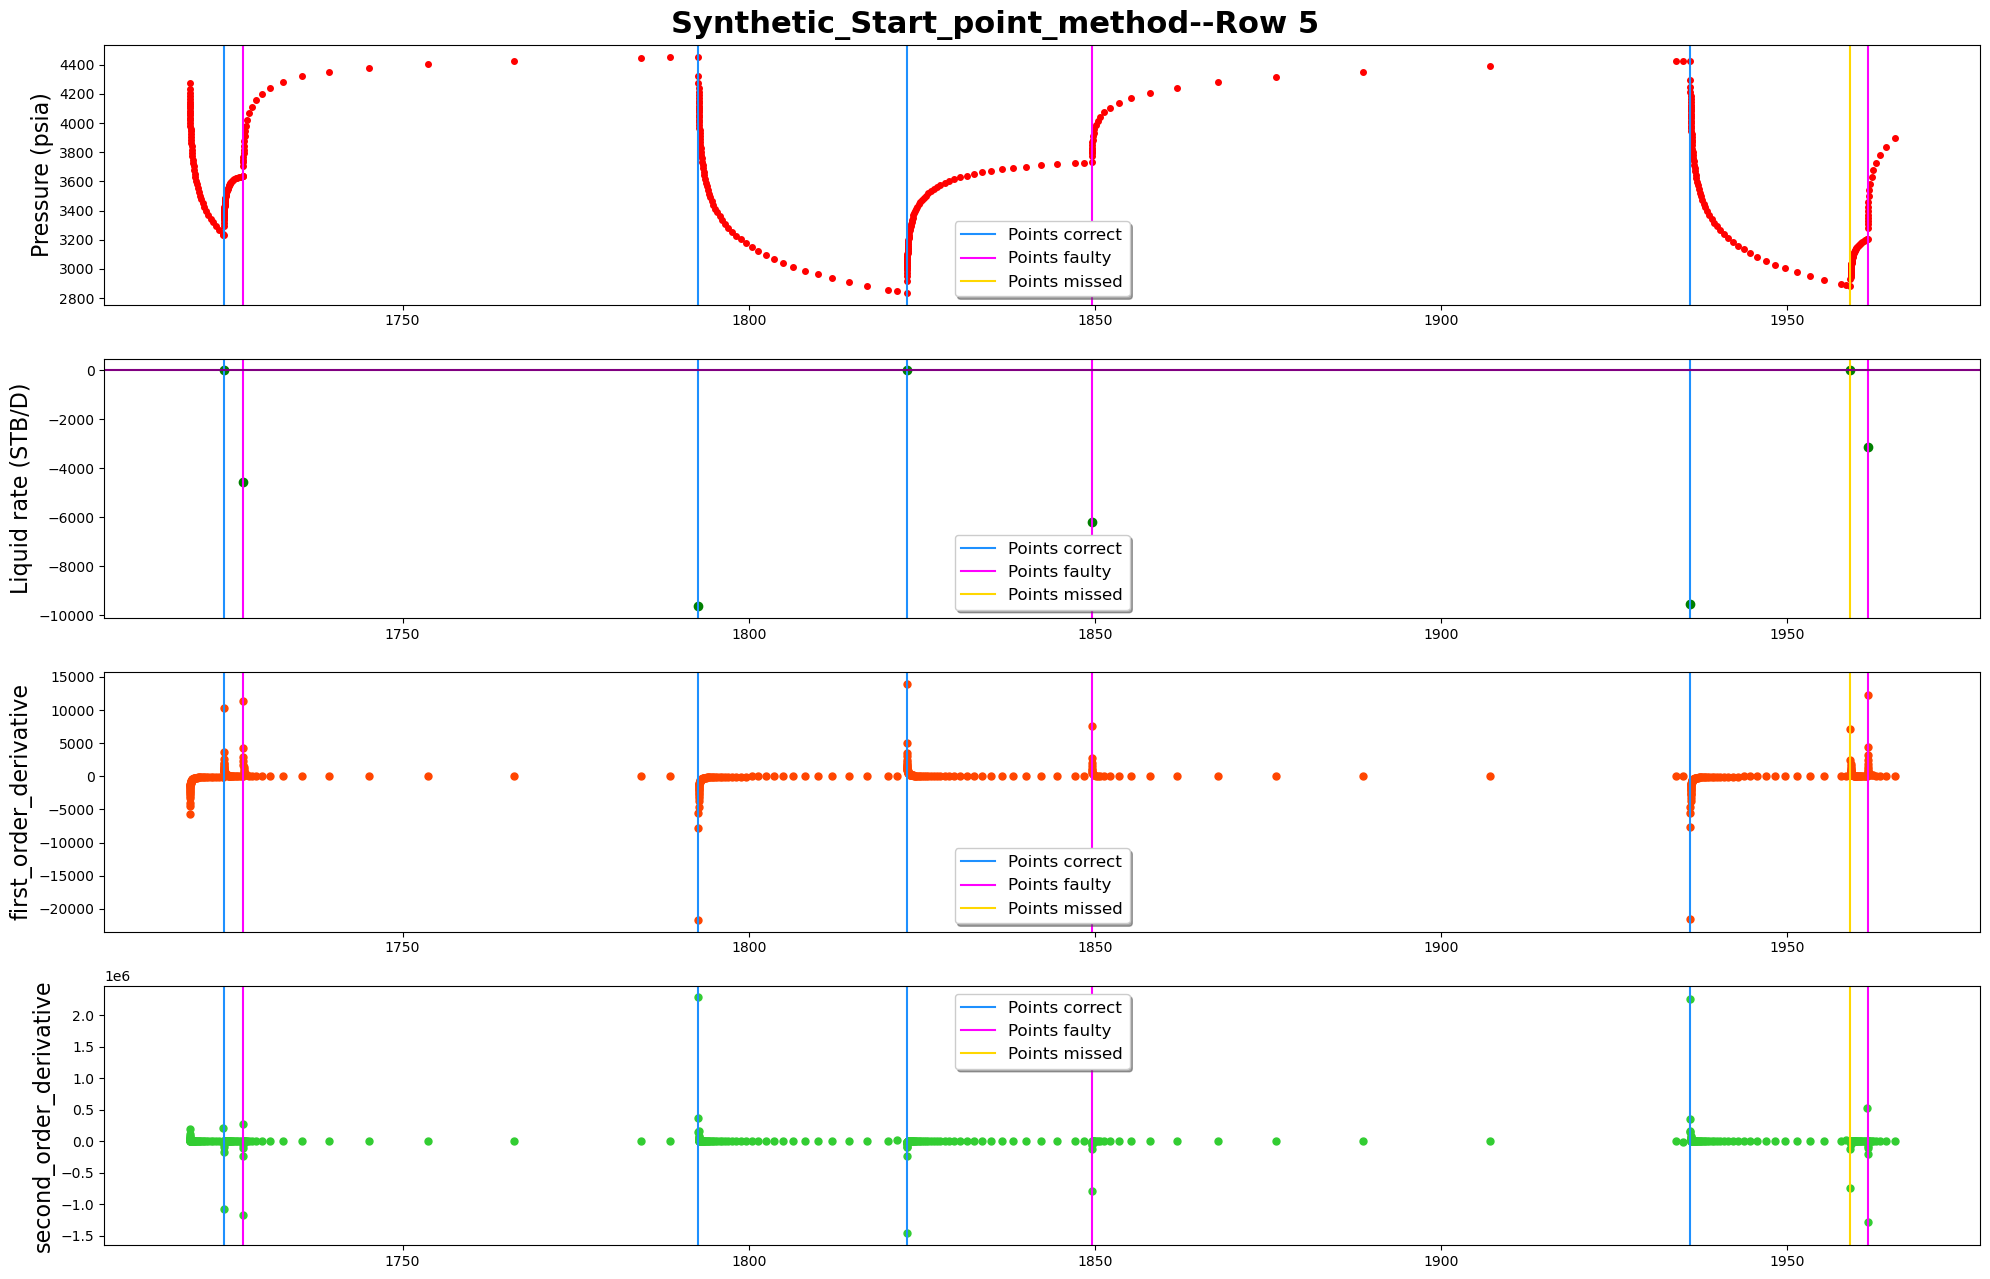

------row 6-----correctly detected points:[2017, 2073, 2185, 2247, 2315, 2369]
------row 6-----faulty detected points:[2106, 2137, 2156, 2289]
------row 6-----missed breakpoints:[]


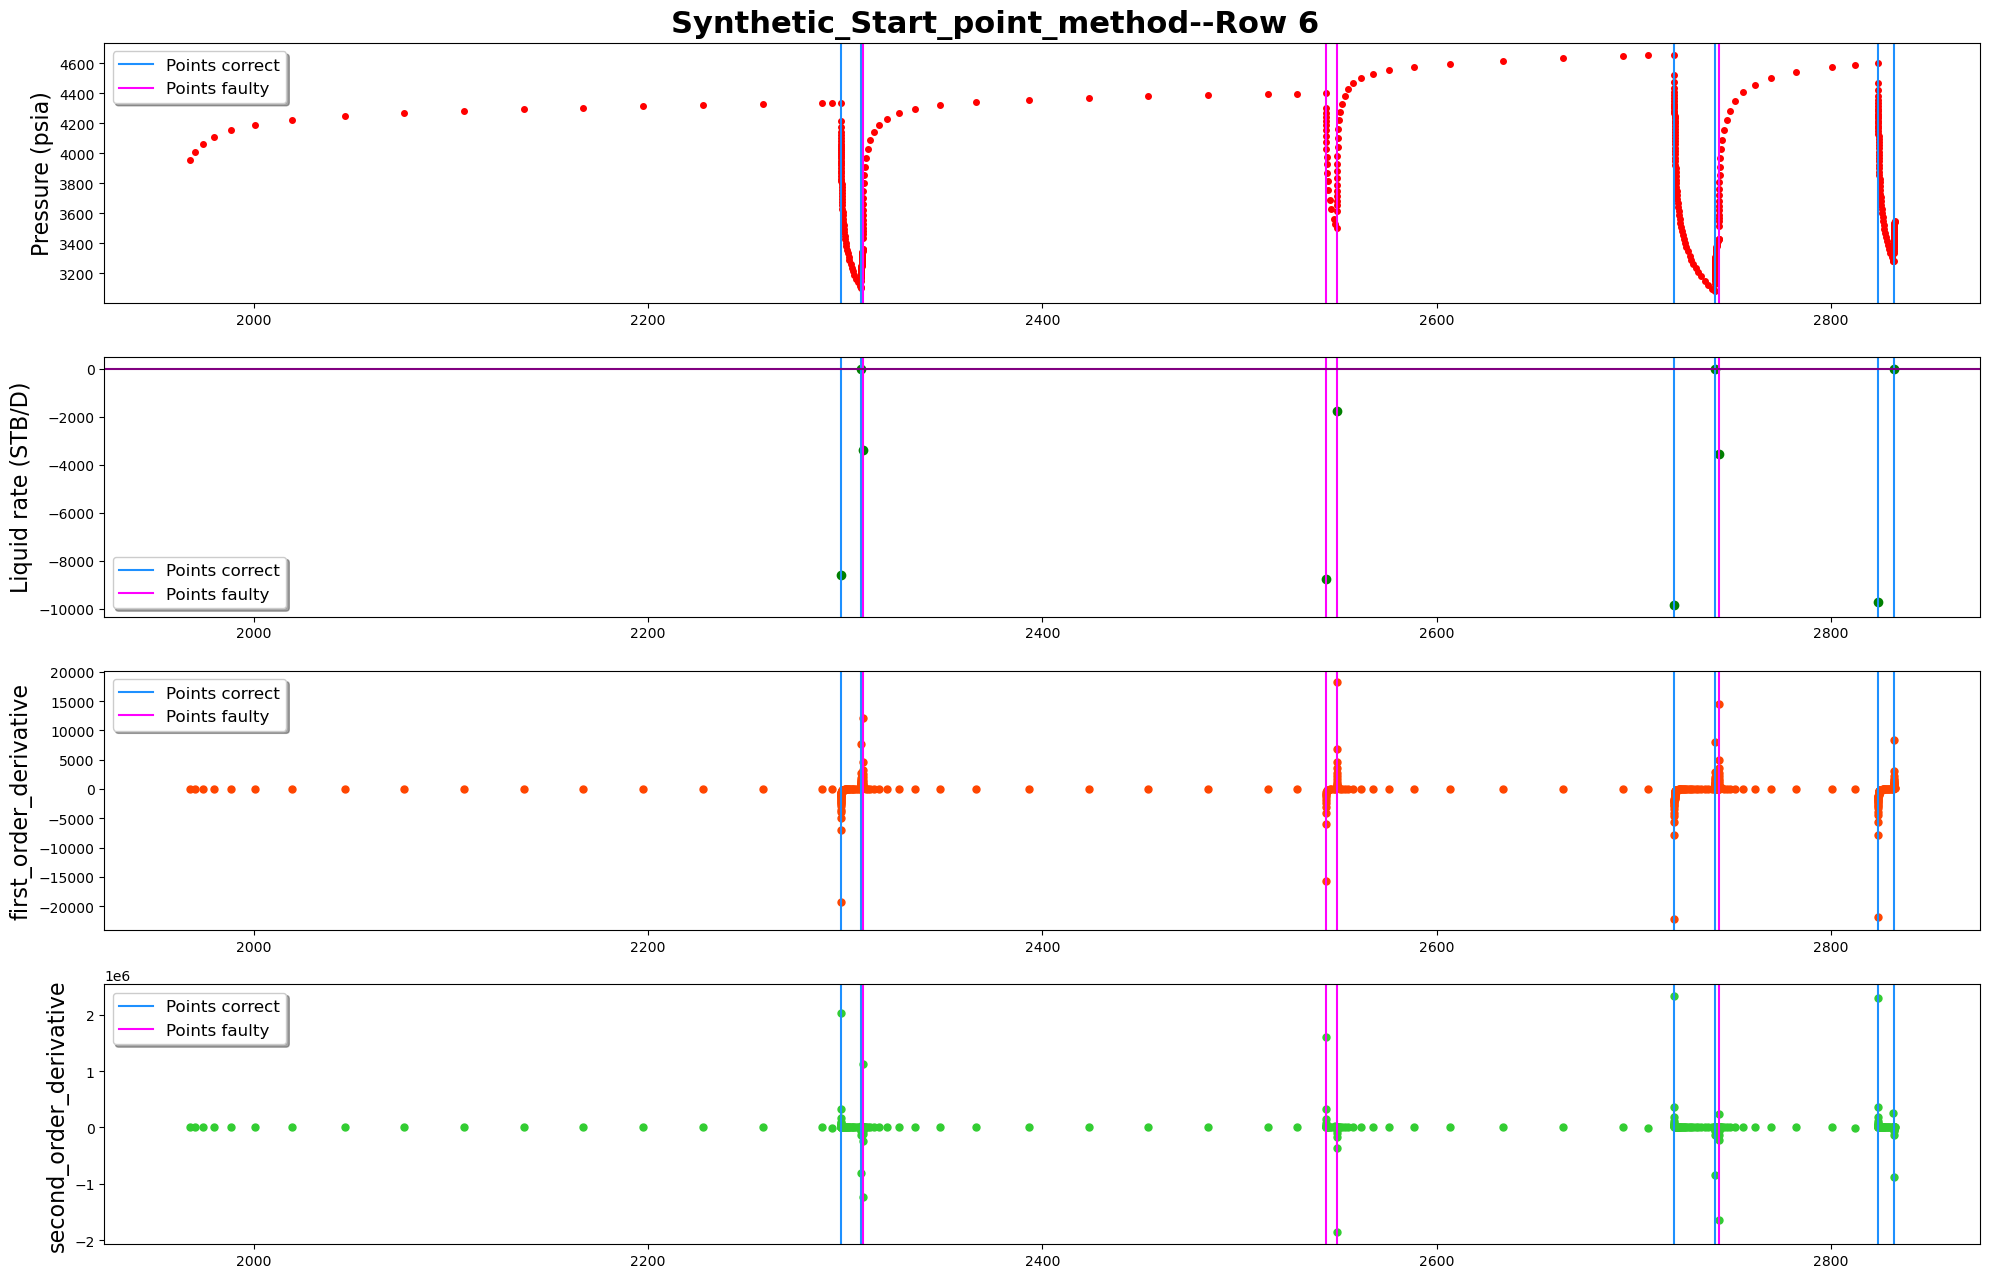

------row 7-----correctly detected points:[2433, 2487, 2552, 2610]
------row 7-----faulty detected points:[2409, 2528, 2698, 2713, 2746, 2764, 2789]
------row 7-----missed breakpoints:[]


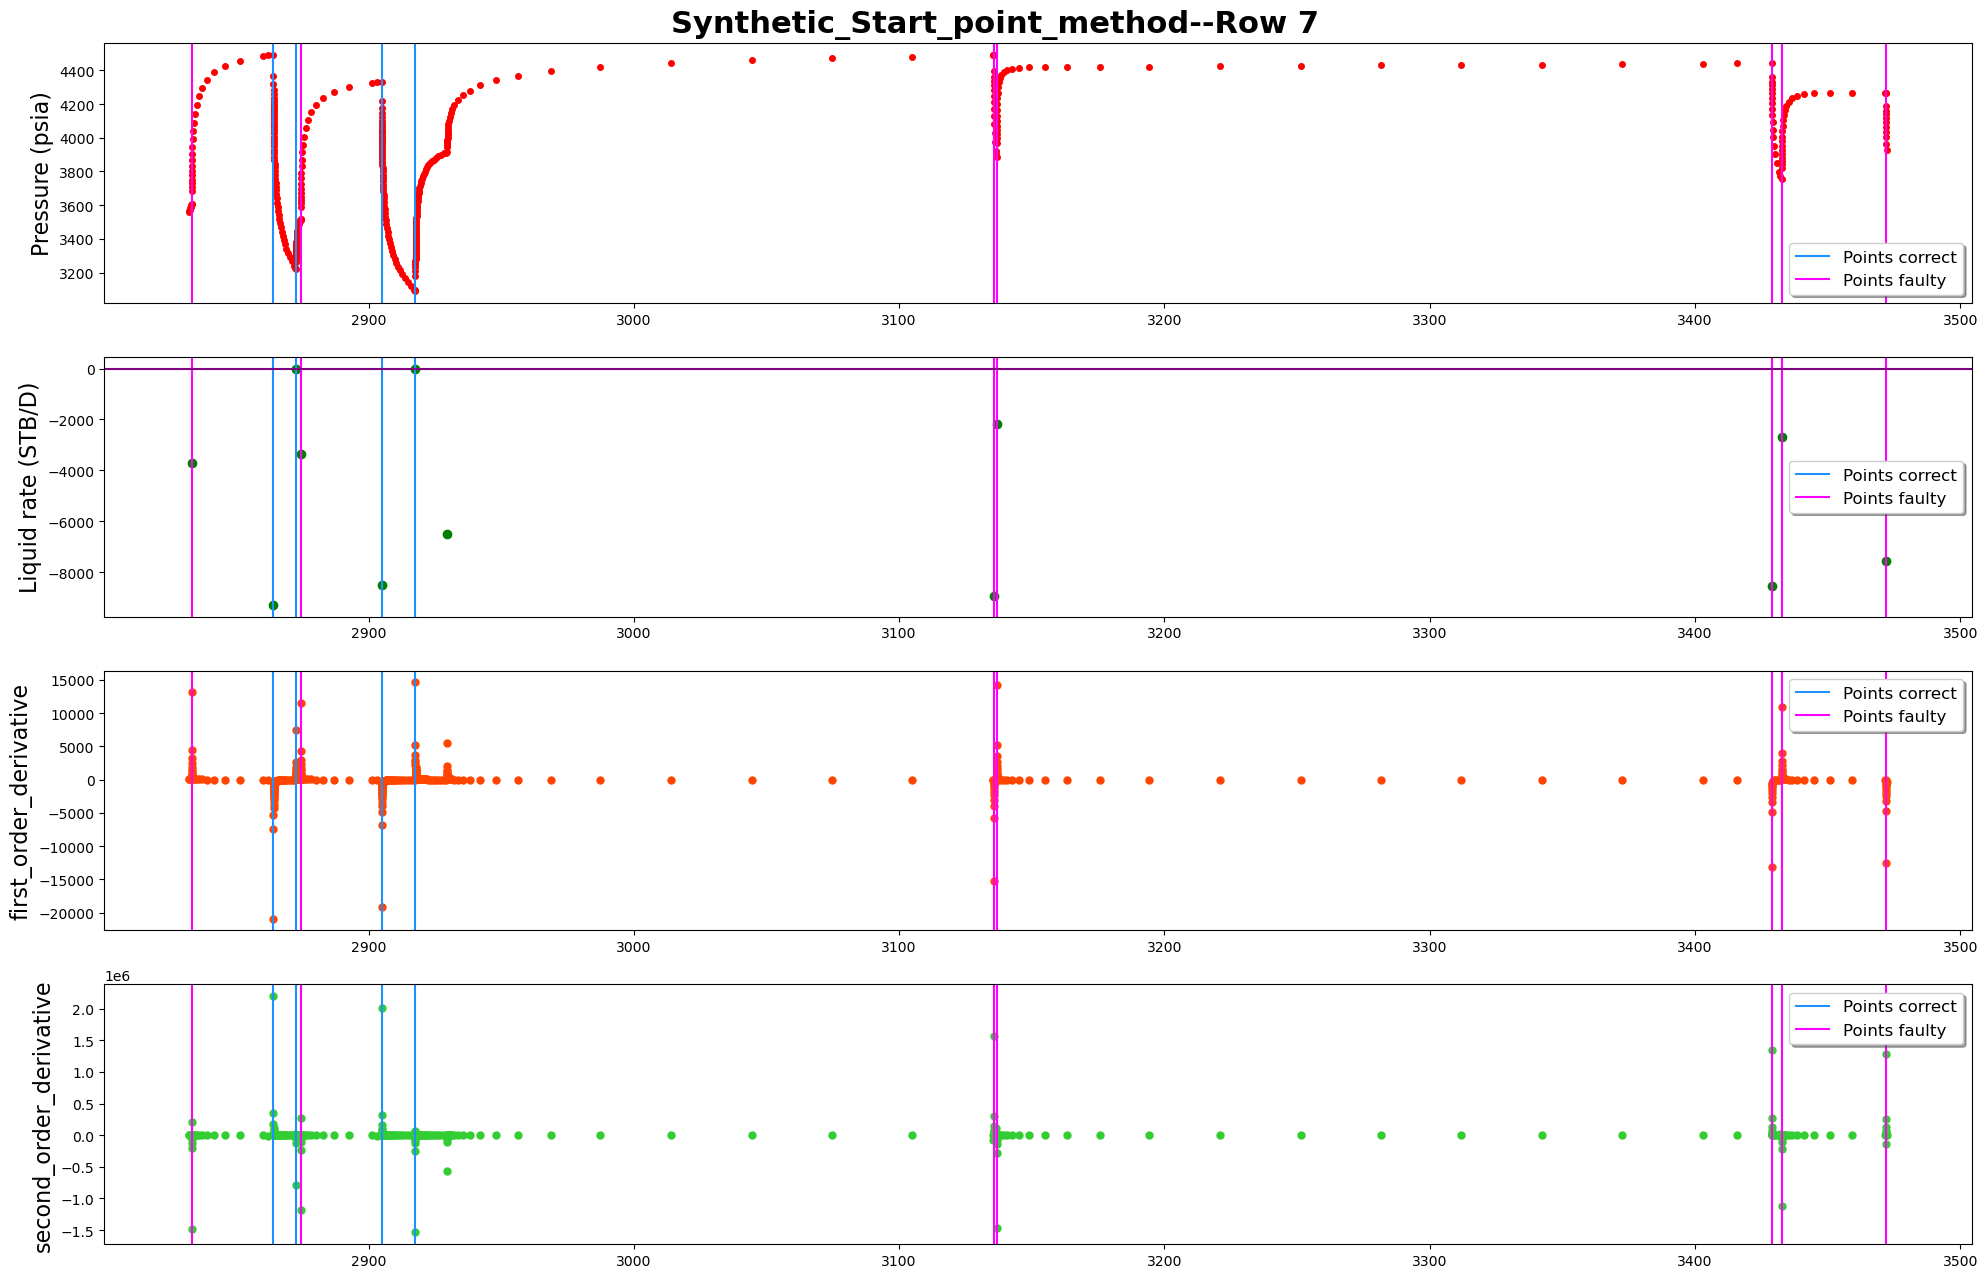

------row 8-----correctly detected points:[2835, 2916, 2965, 3044, 3101]
------row 8-----faulty detected points:[2807]
------row 8-----missed breakpoints:[]


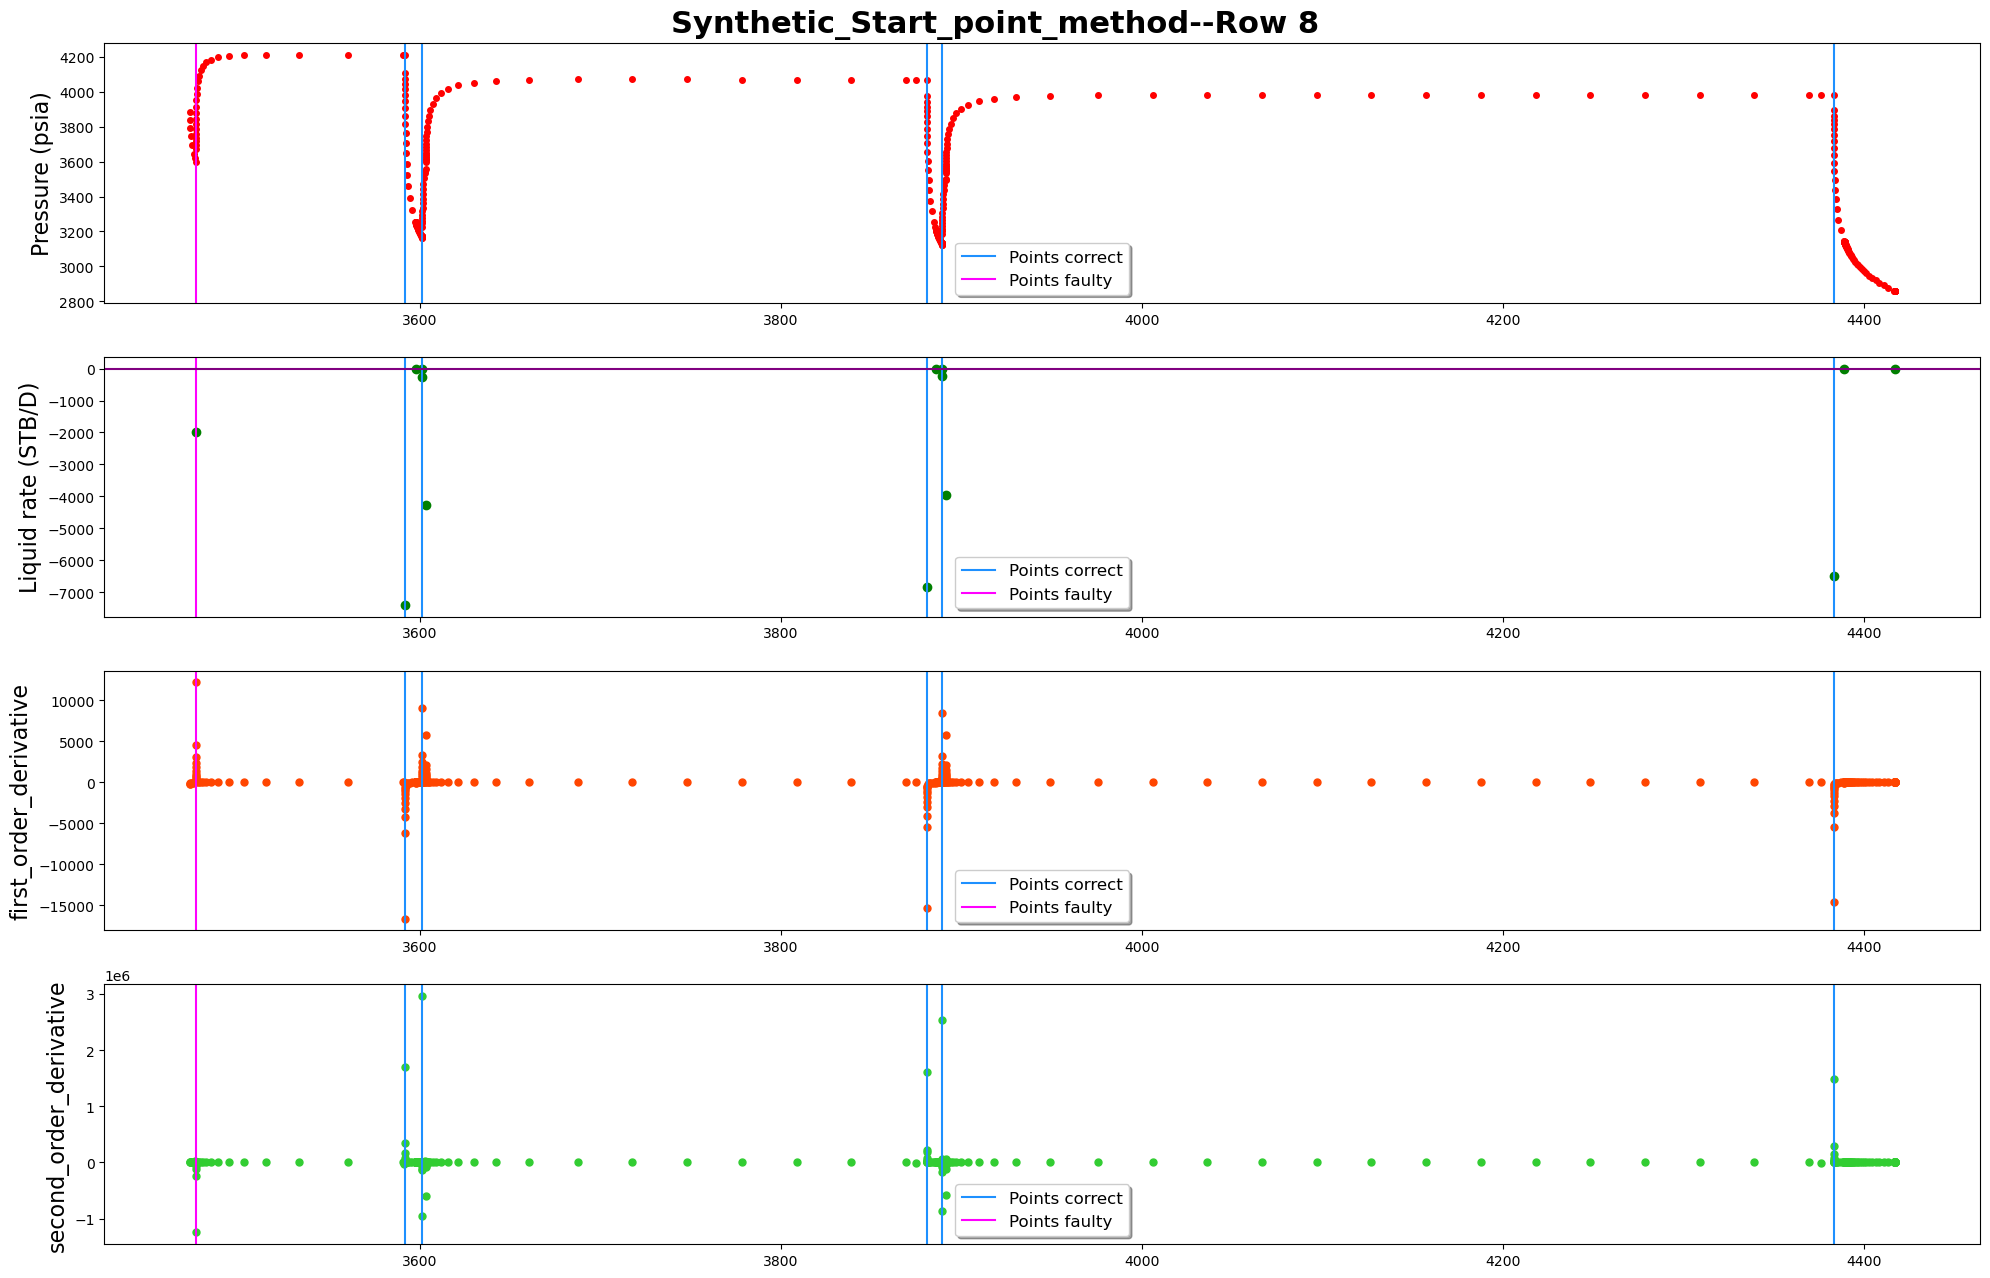

------row 9-----correctly detected points:[3240, 3284, 3368, 3411]
------row 9-----faulty detected points:[]
------row 9-----missed breakpoints:[]


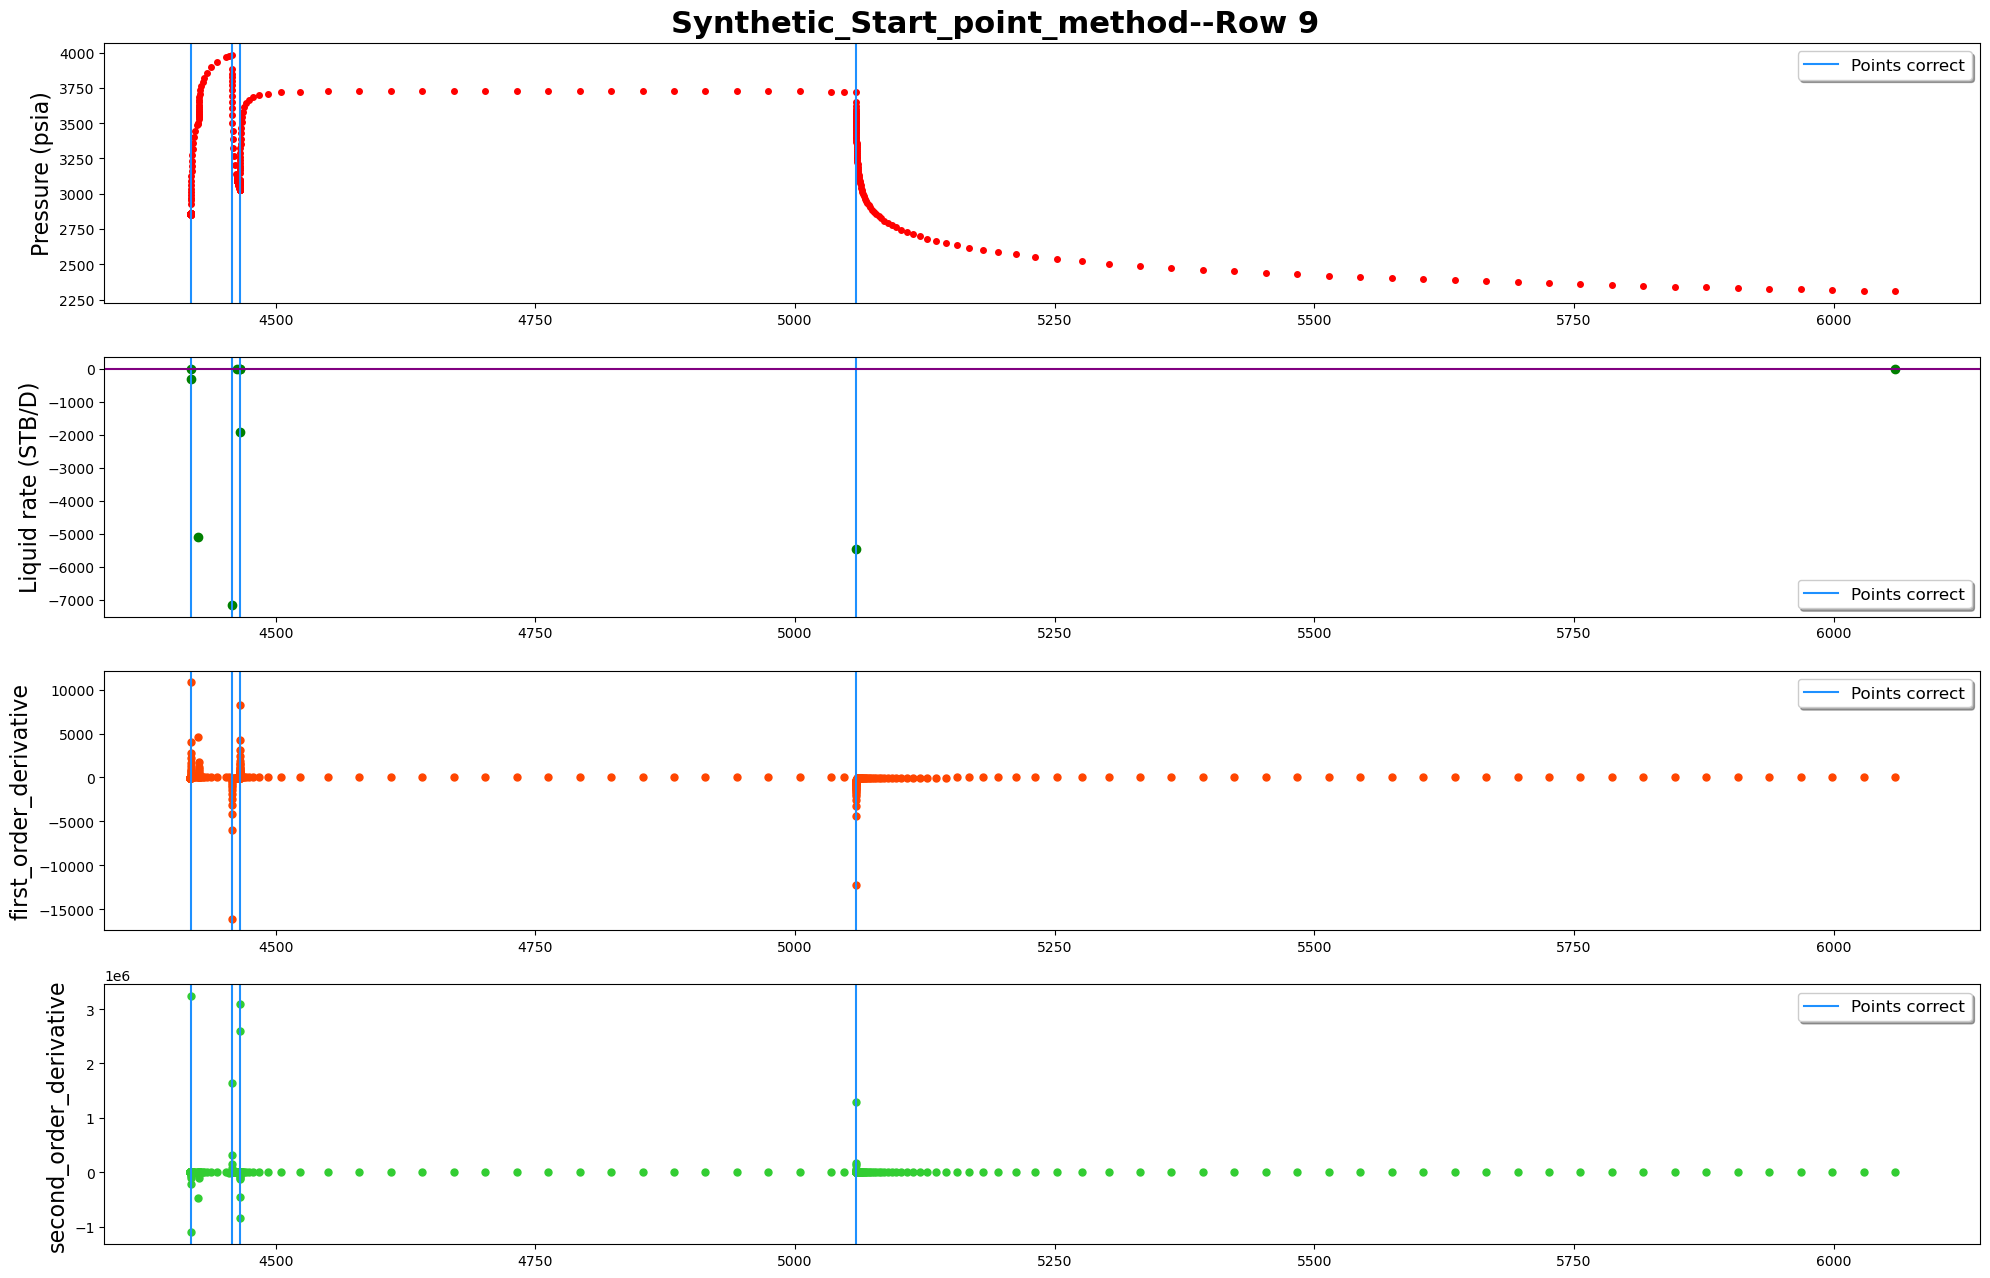

In [7]:
#startPoint2
noise_threshold=2.9
breakpoints_detected_startPoint2=detect_breakpoints_startPoint2(first_order_derivative,second_order_derivative,noise_threshold)
#plot & save
filename_toSave="../data_output/Synthetic_Start_point_method.pdf"
plot_name="Synthetic_Start_point_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(pressure_df,
          rate_df,
          breakpoints_detected_startPoint2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

## detect using baseline method (detect_breakpoints_2) 

---the std of first_order_derivative: 2528.518177413723
---the std of second_order_derivative: 272776.92851259984
len(breakpoints_detected_baseline2) 57
---initializing...
---plotting...
the number of ground_truth 45
the number of points_correct 45
the number of points_faulty 12
the number of points_missed 0


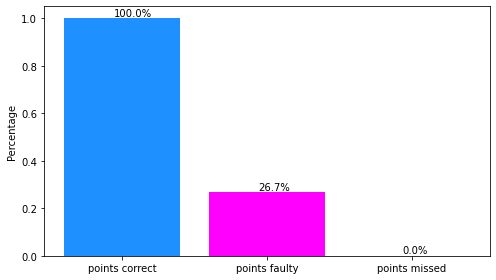

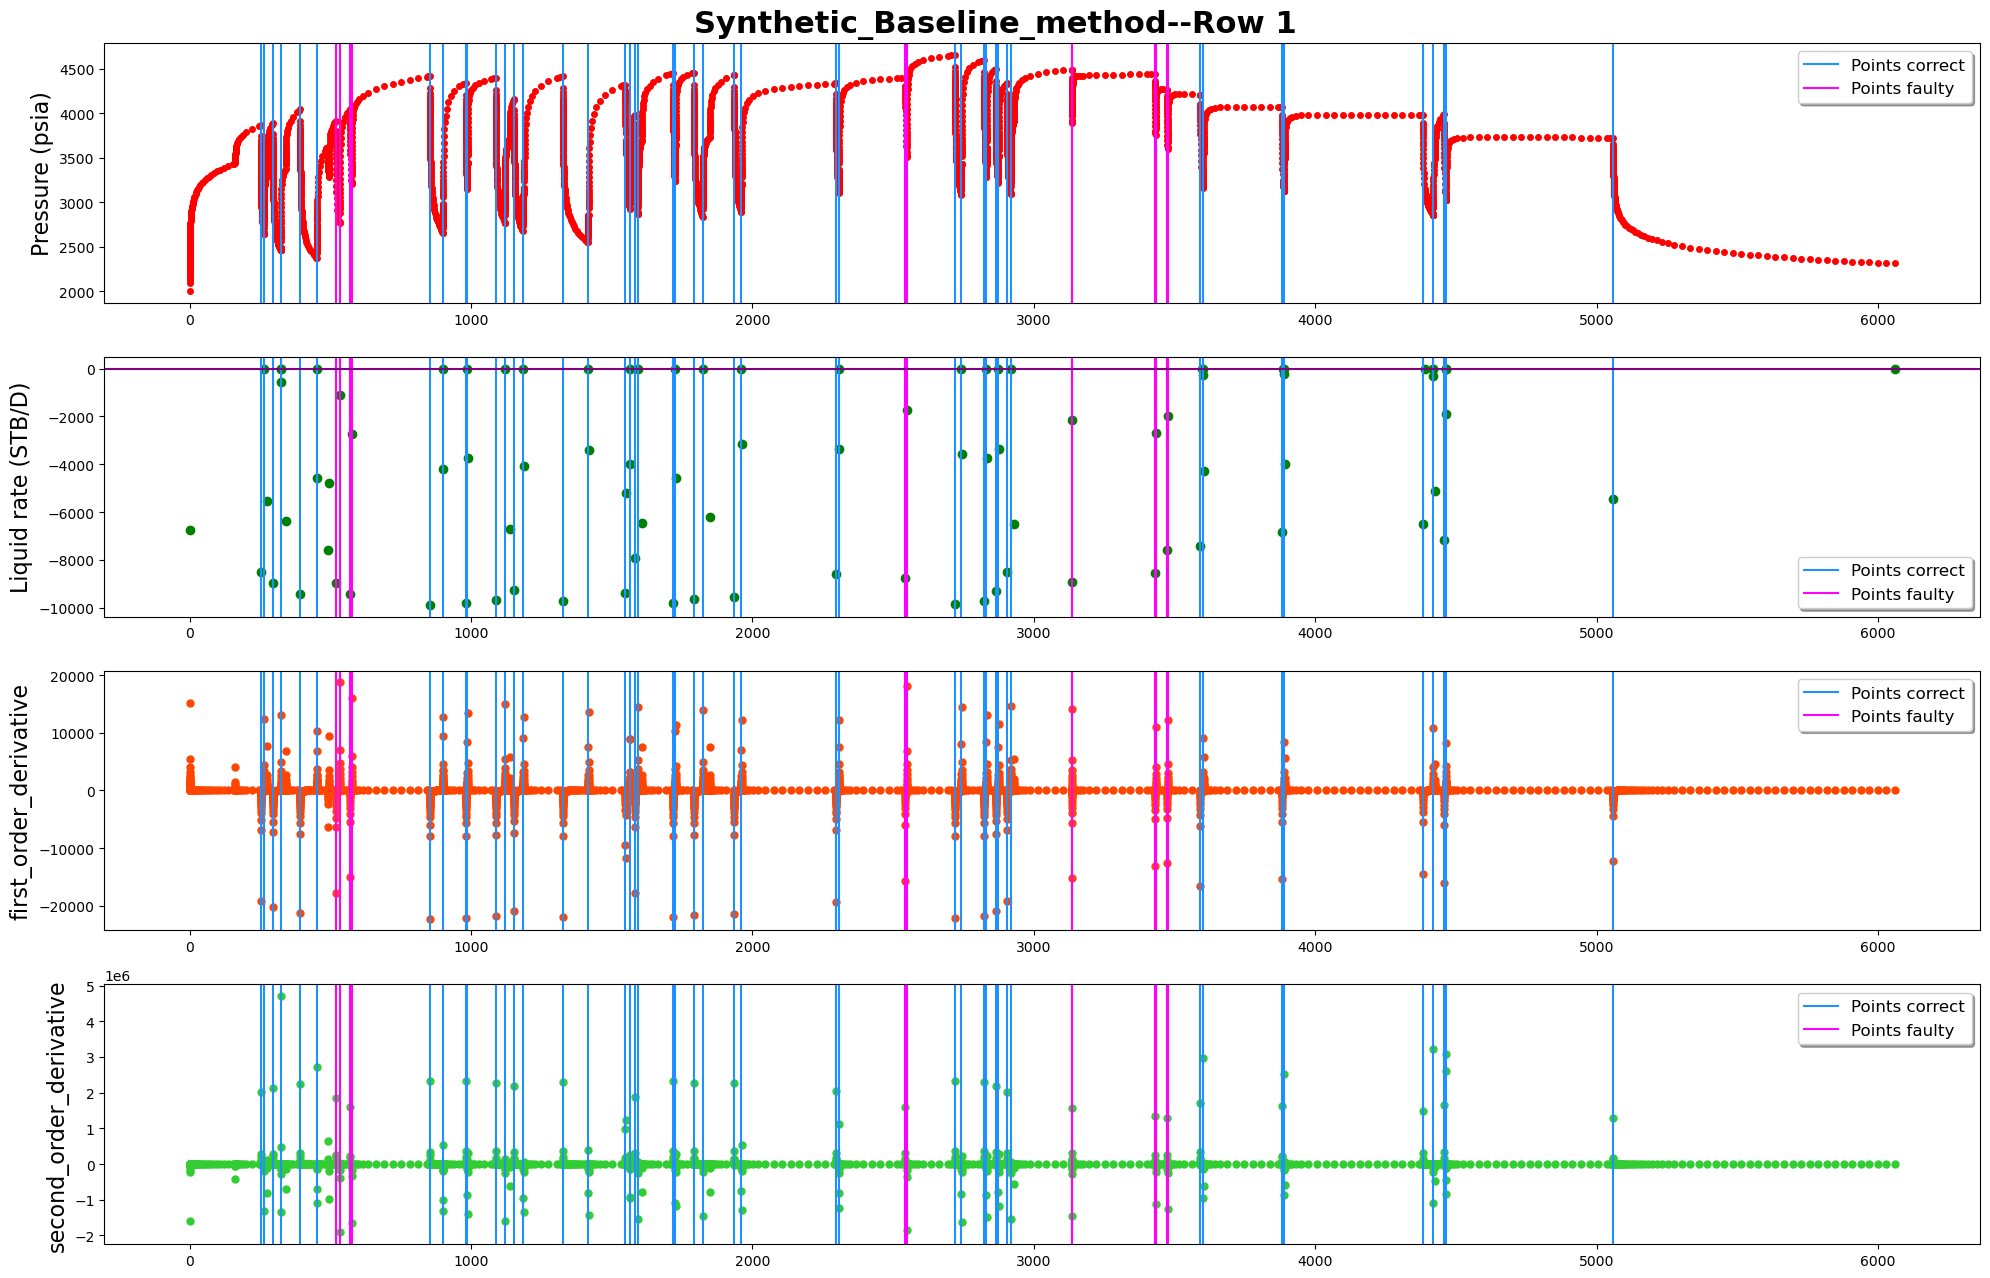

detected 57 points as breakpoints
The plot is devided into 9 rows
------row 1-----correctly detected points:[107, 164, 243, 328, 375]
------row 1-----faulty detected points:[]
------row 1-----missed breakpoints:[]


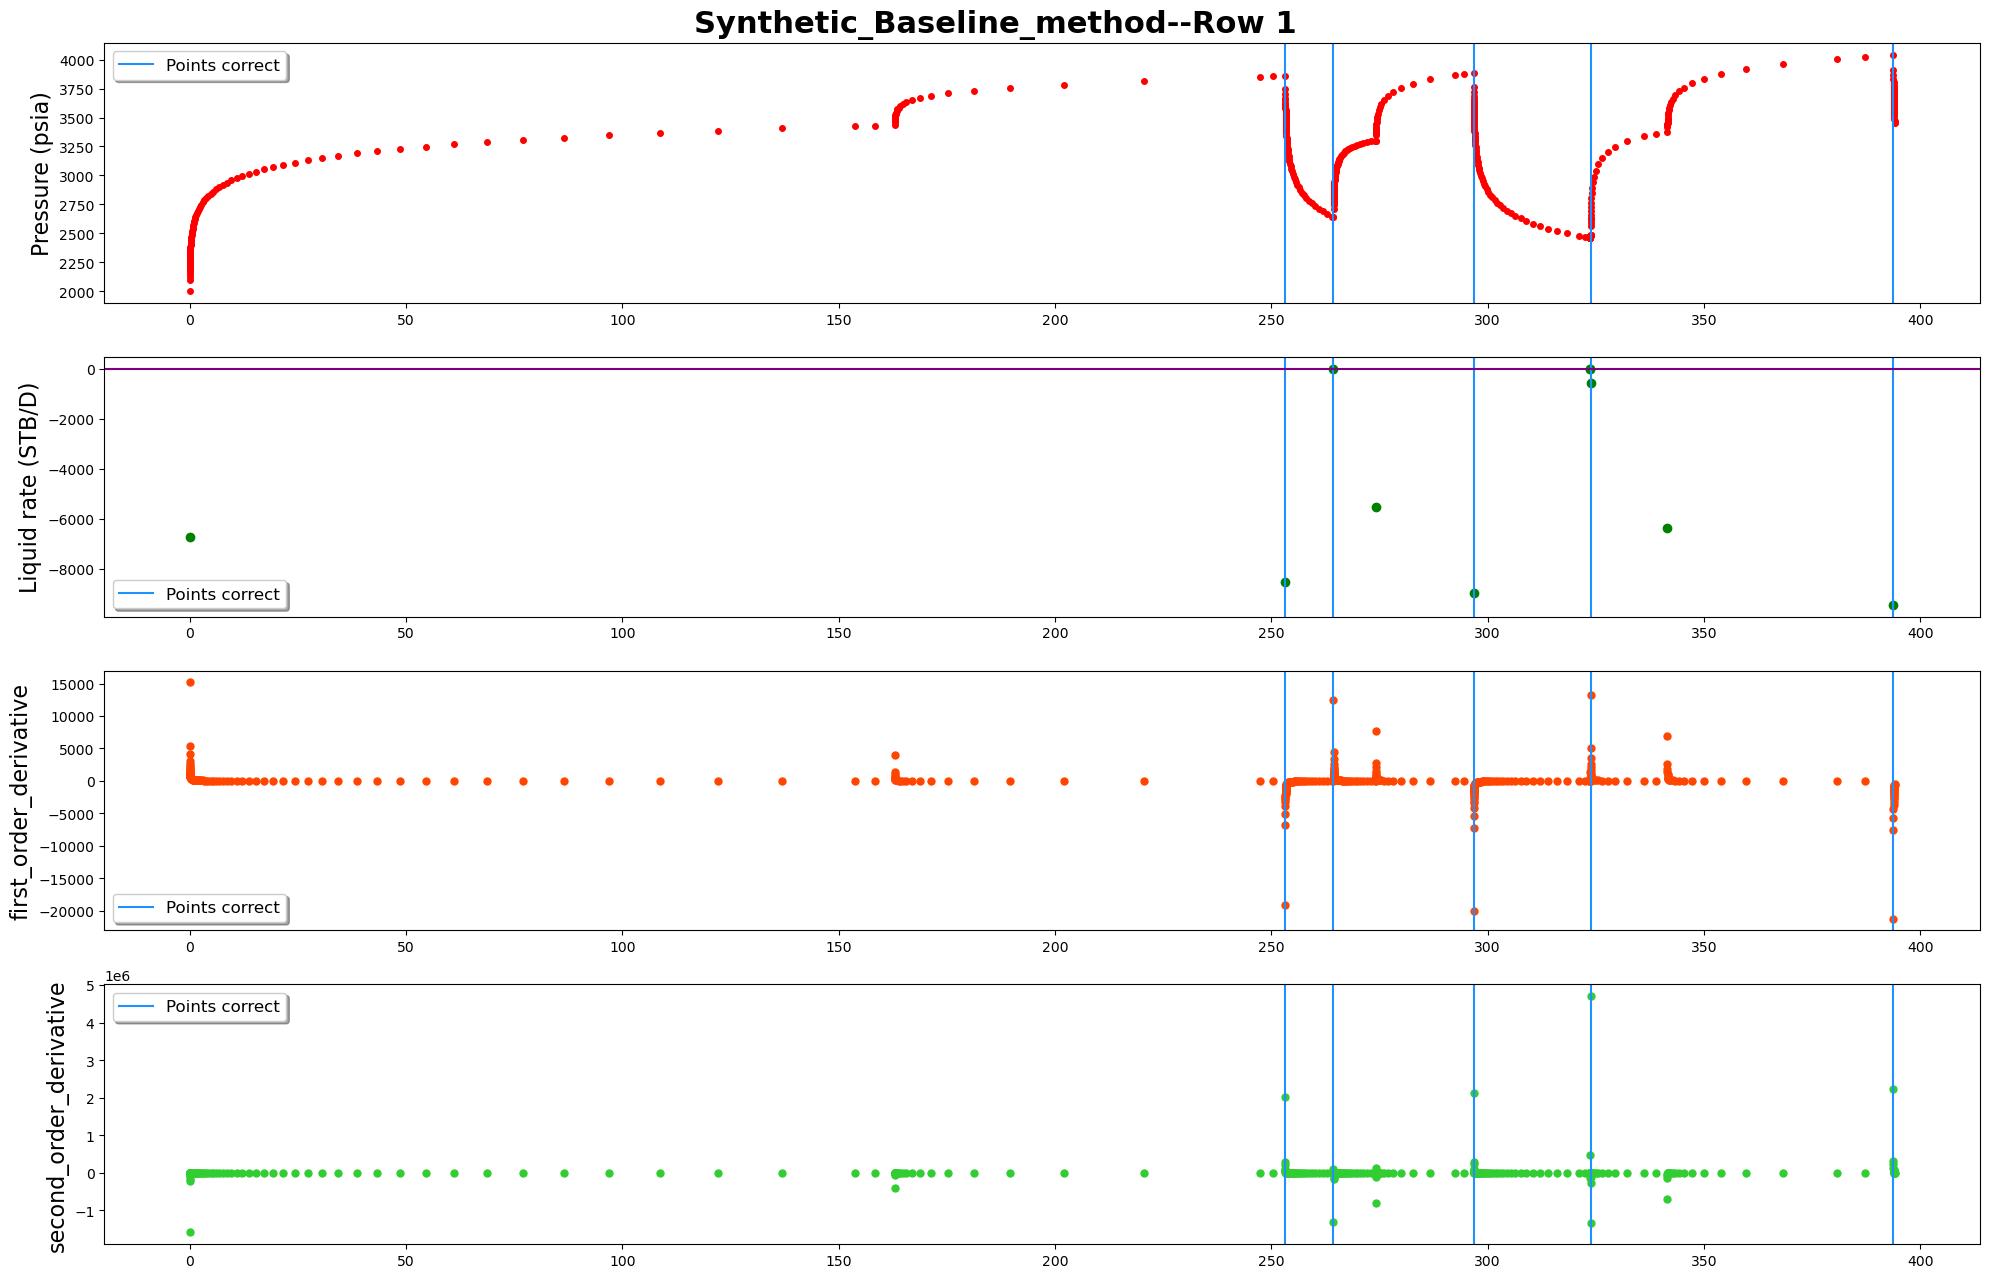

------row 2-----correctly detected points:[446, 644, 713, 771]
------row 2-----faulty detected points:[546, 568, 592, 611]
------row 2-----missed breakpoints:[]


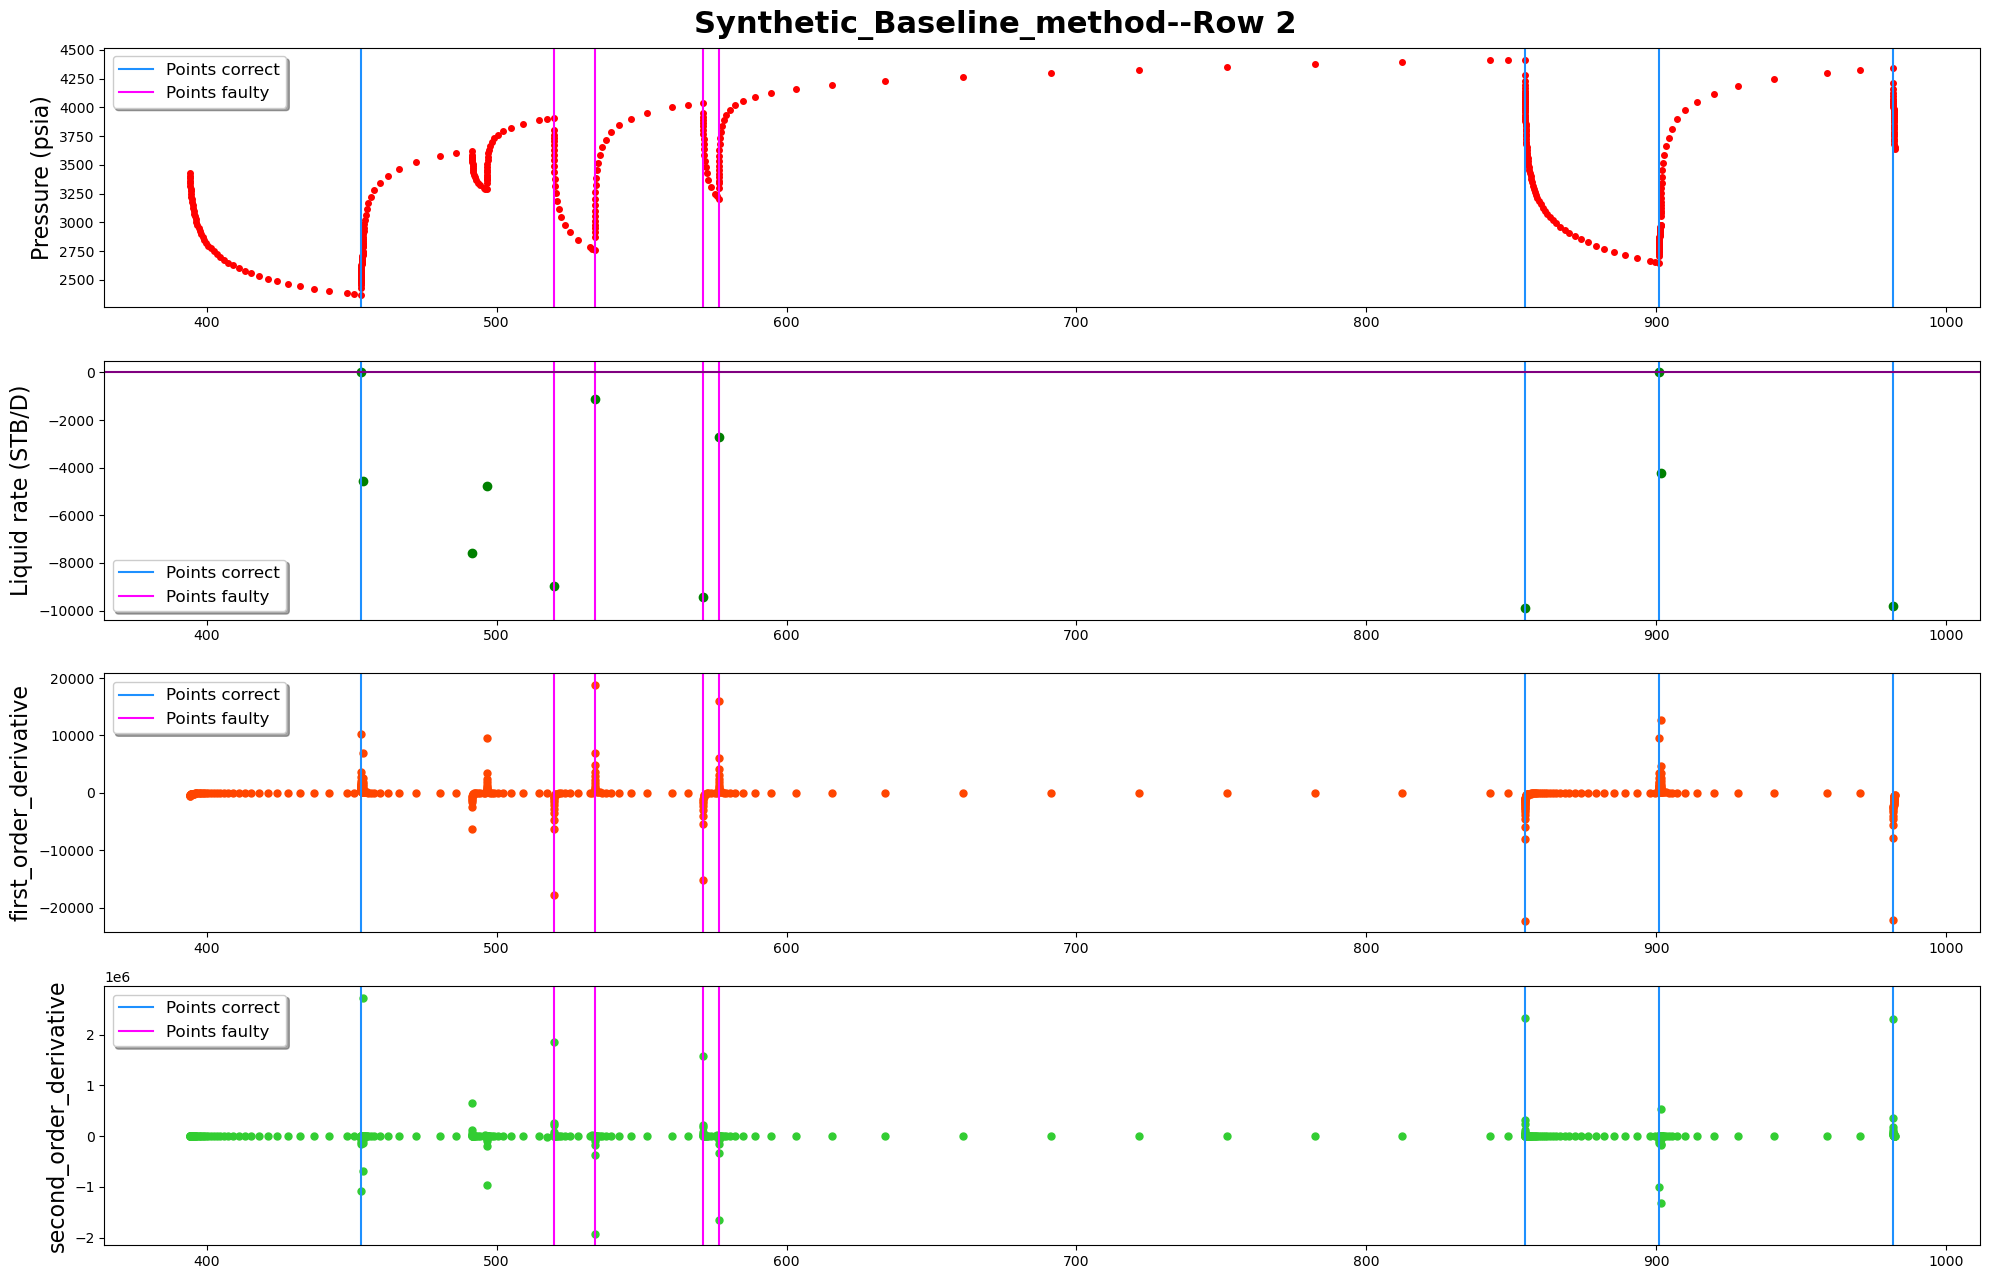

------row 3-----correctly detected points:[820, 887, 953, 1036, 1101, 1179]
------row 3-----faulty detected points:[]
------row 3-----missed breakpoints:[]


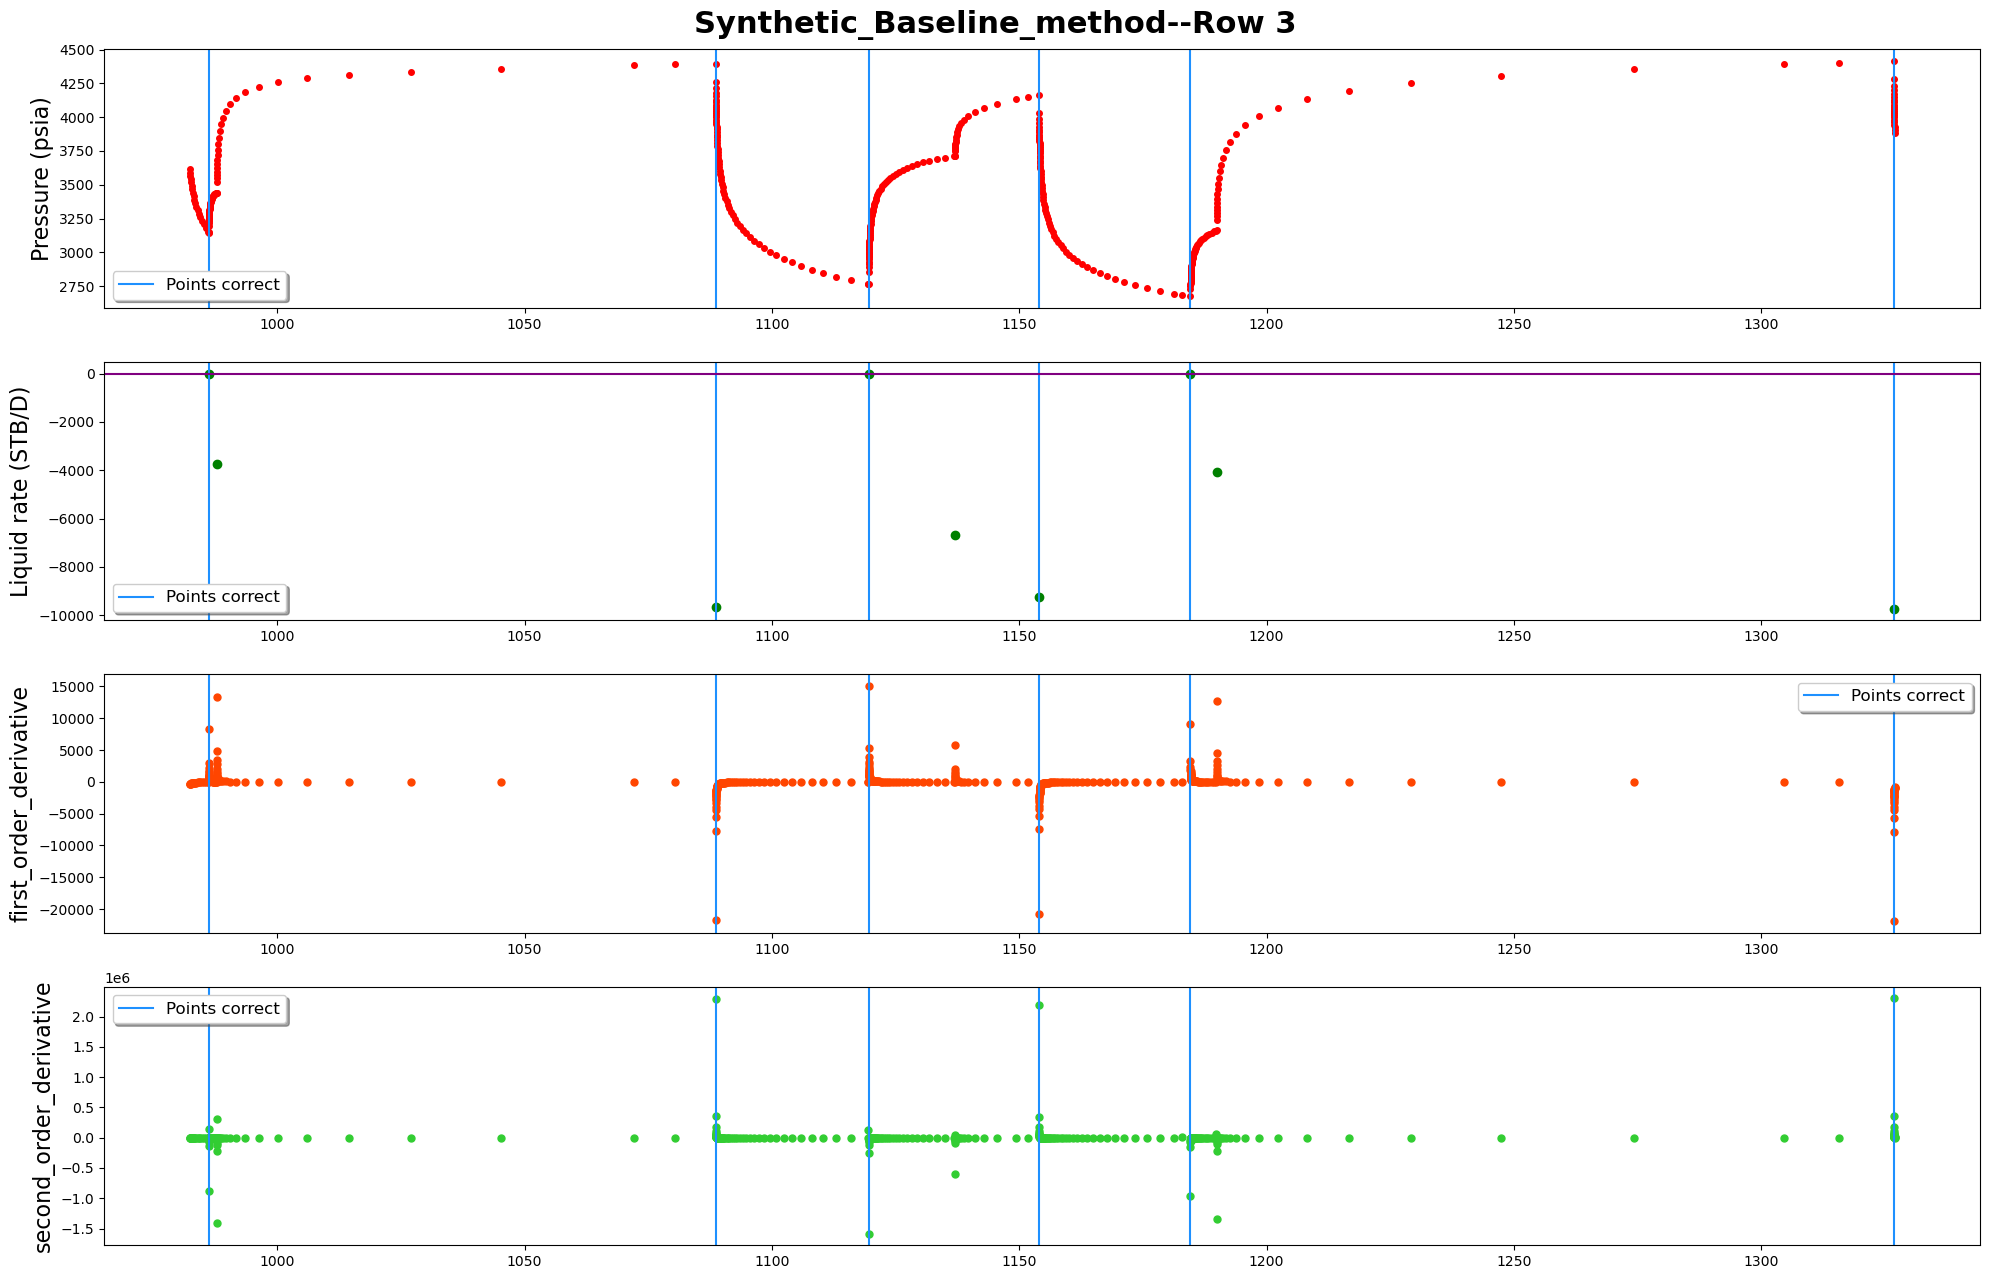

------row 4-----correctly detected points:[1254, 1319, 1396, 1456, 1513, 1598]
------row 4-----faulty detected points:[]
------row 4-----missed breakpoints:[]


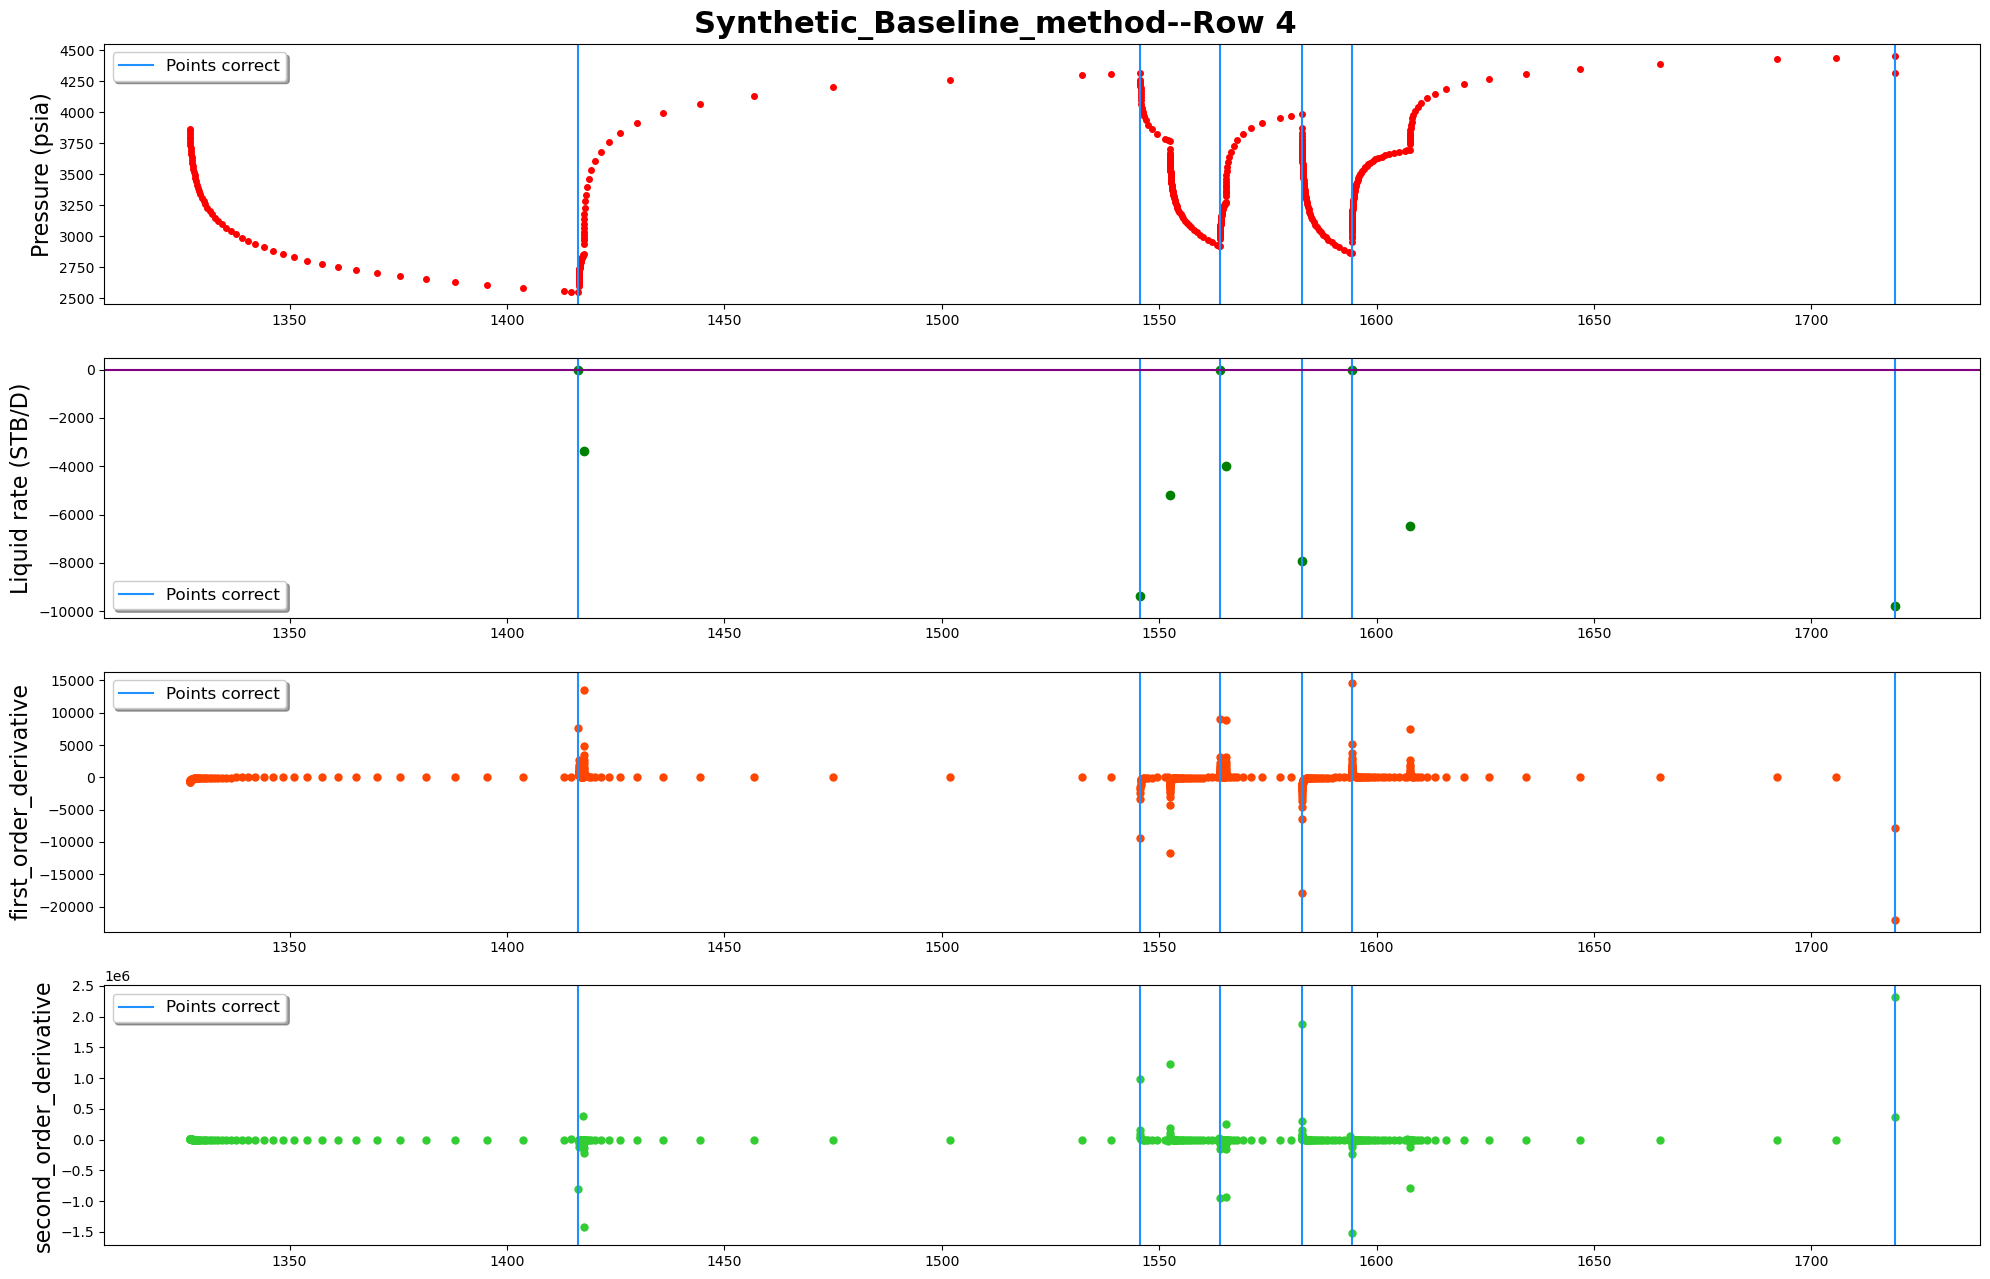

------row 5-----correctly detected points:[1648, 1719, 1784, 1875, 1938]
------row 5-----faulty detected points:[]
------row 5-----missed breakpoints:[]


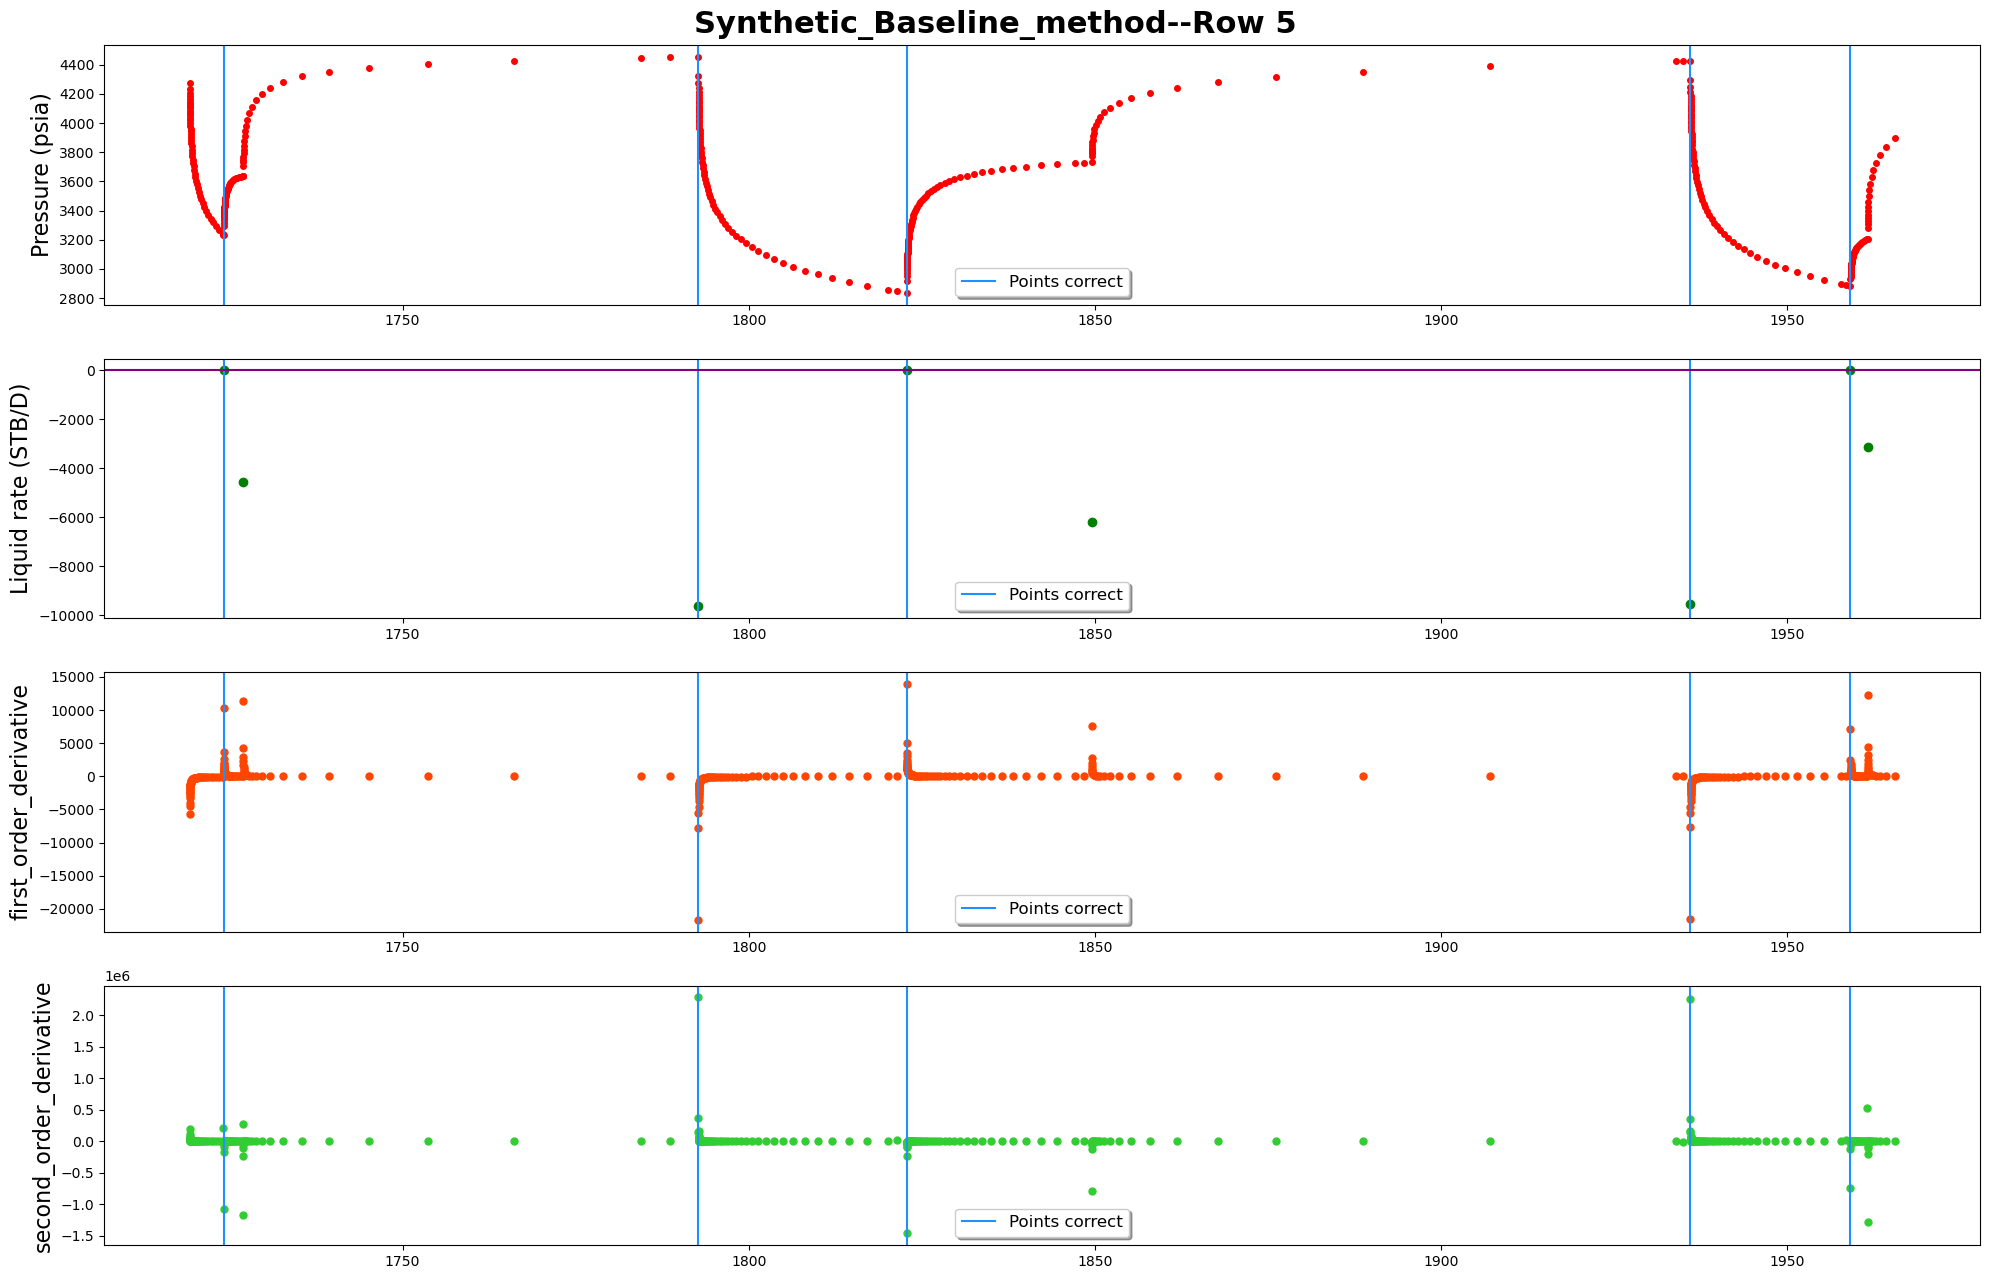

------row 6-----correctly detected points:[2017, 2073, 2185, 2247, 2315, 2369]
------row 6-----faulty detected points:[2137, 2156]
------row 6-----missed breakpoints:[]


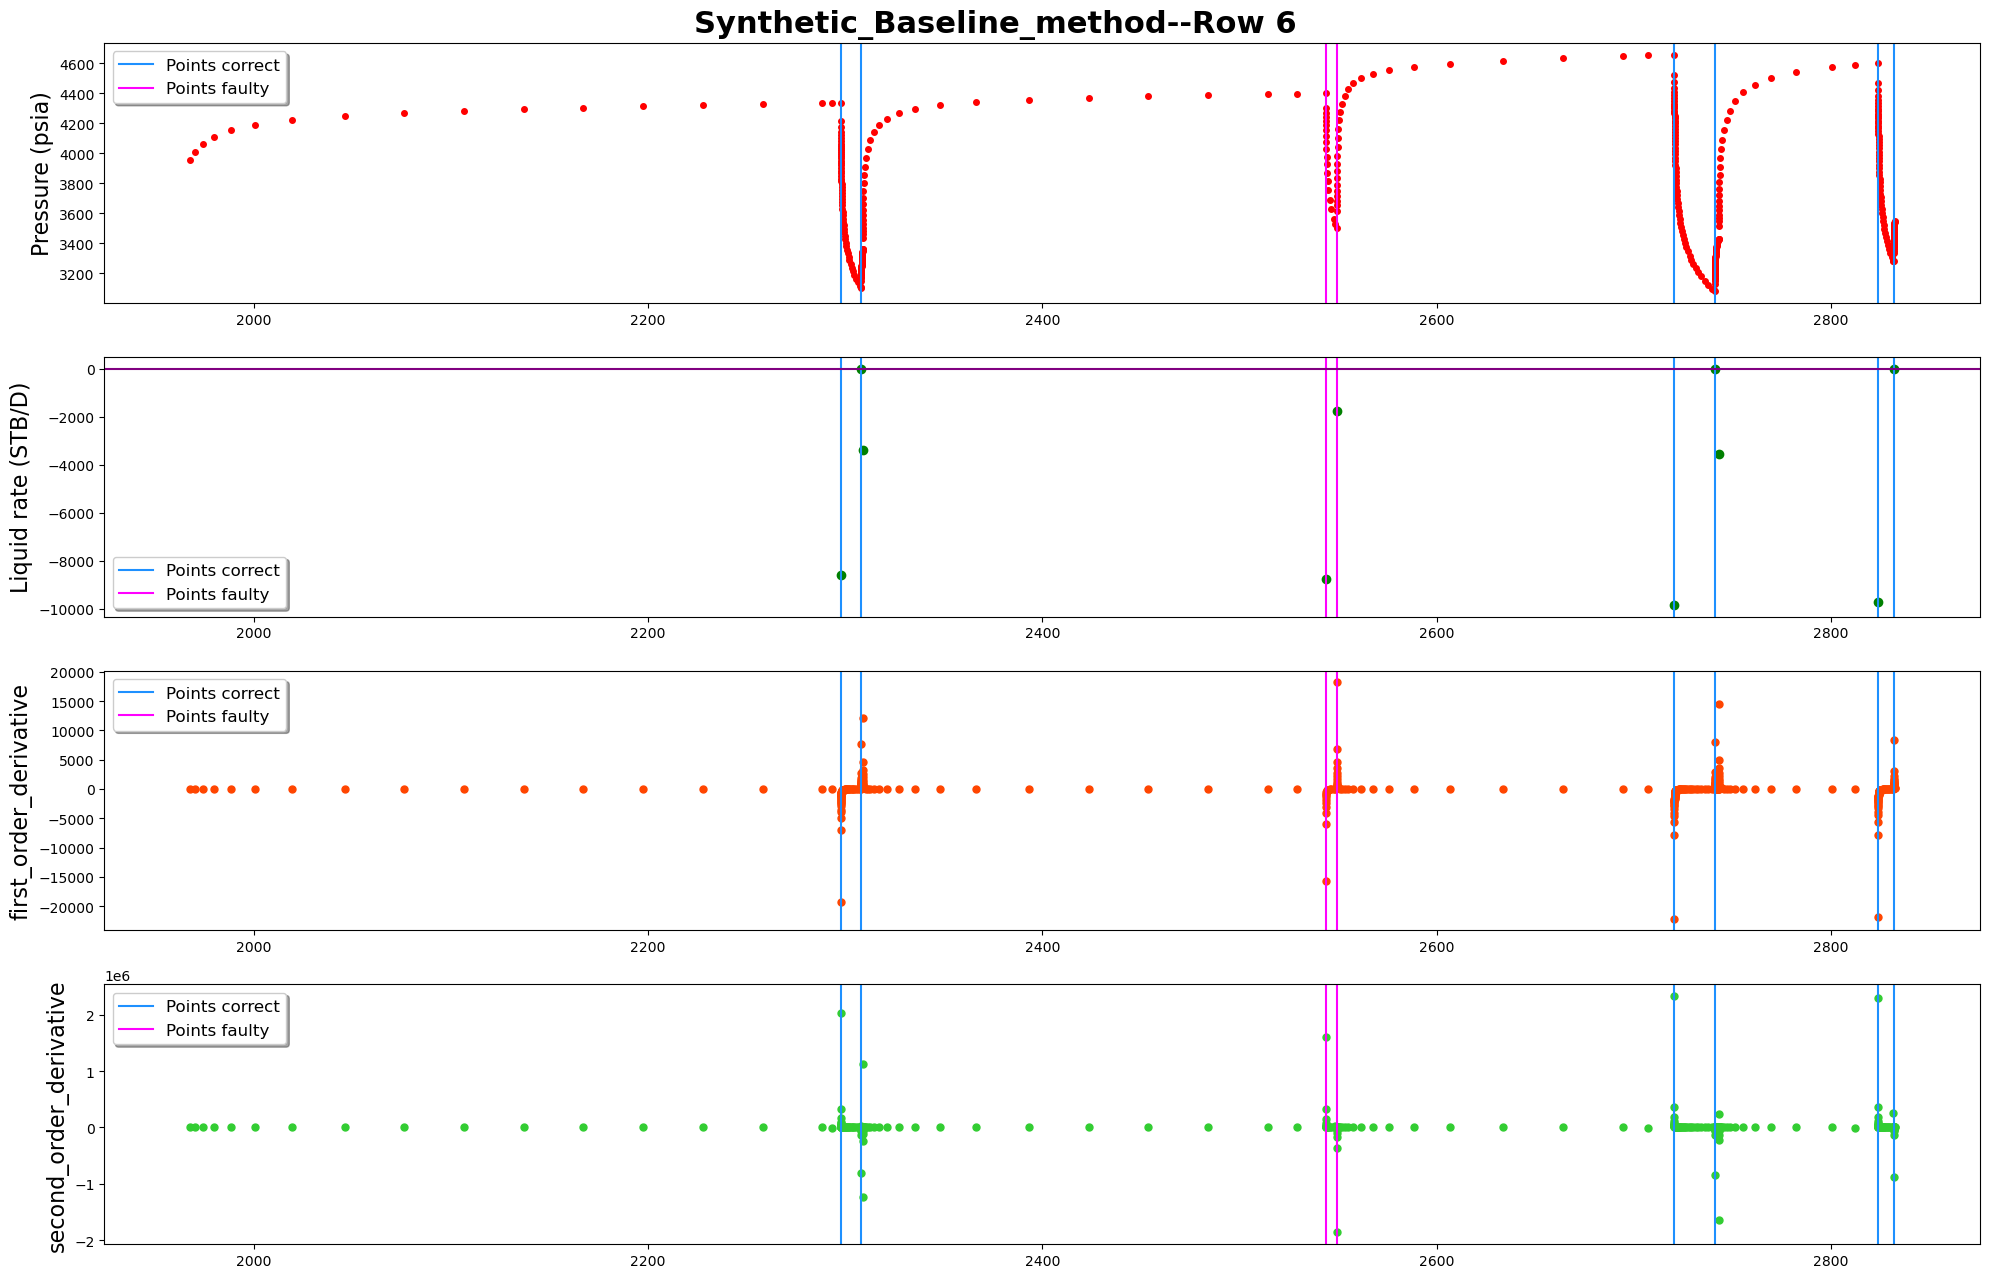

------row 7-----correctly detected points:[2433, 2487, 2552, 2610]
------row 7-----faulty detected points:[2698, 2713, 2746, 2764, 2789]
------row 7-----missed breakpoints:[]


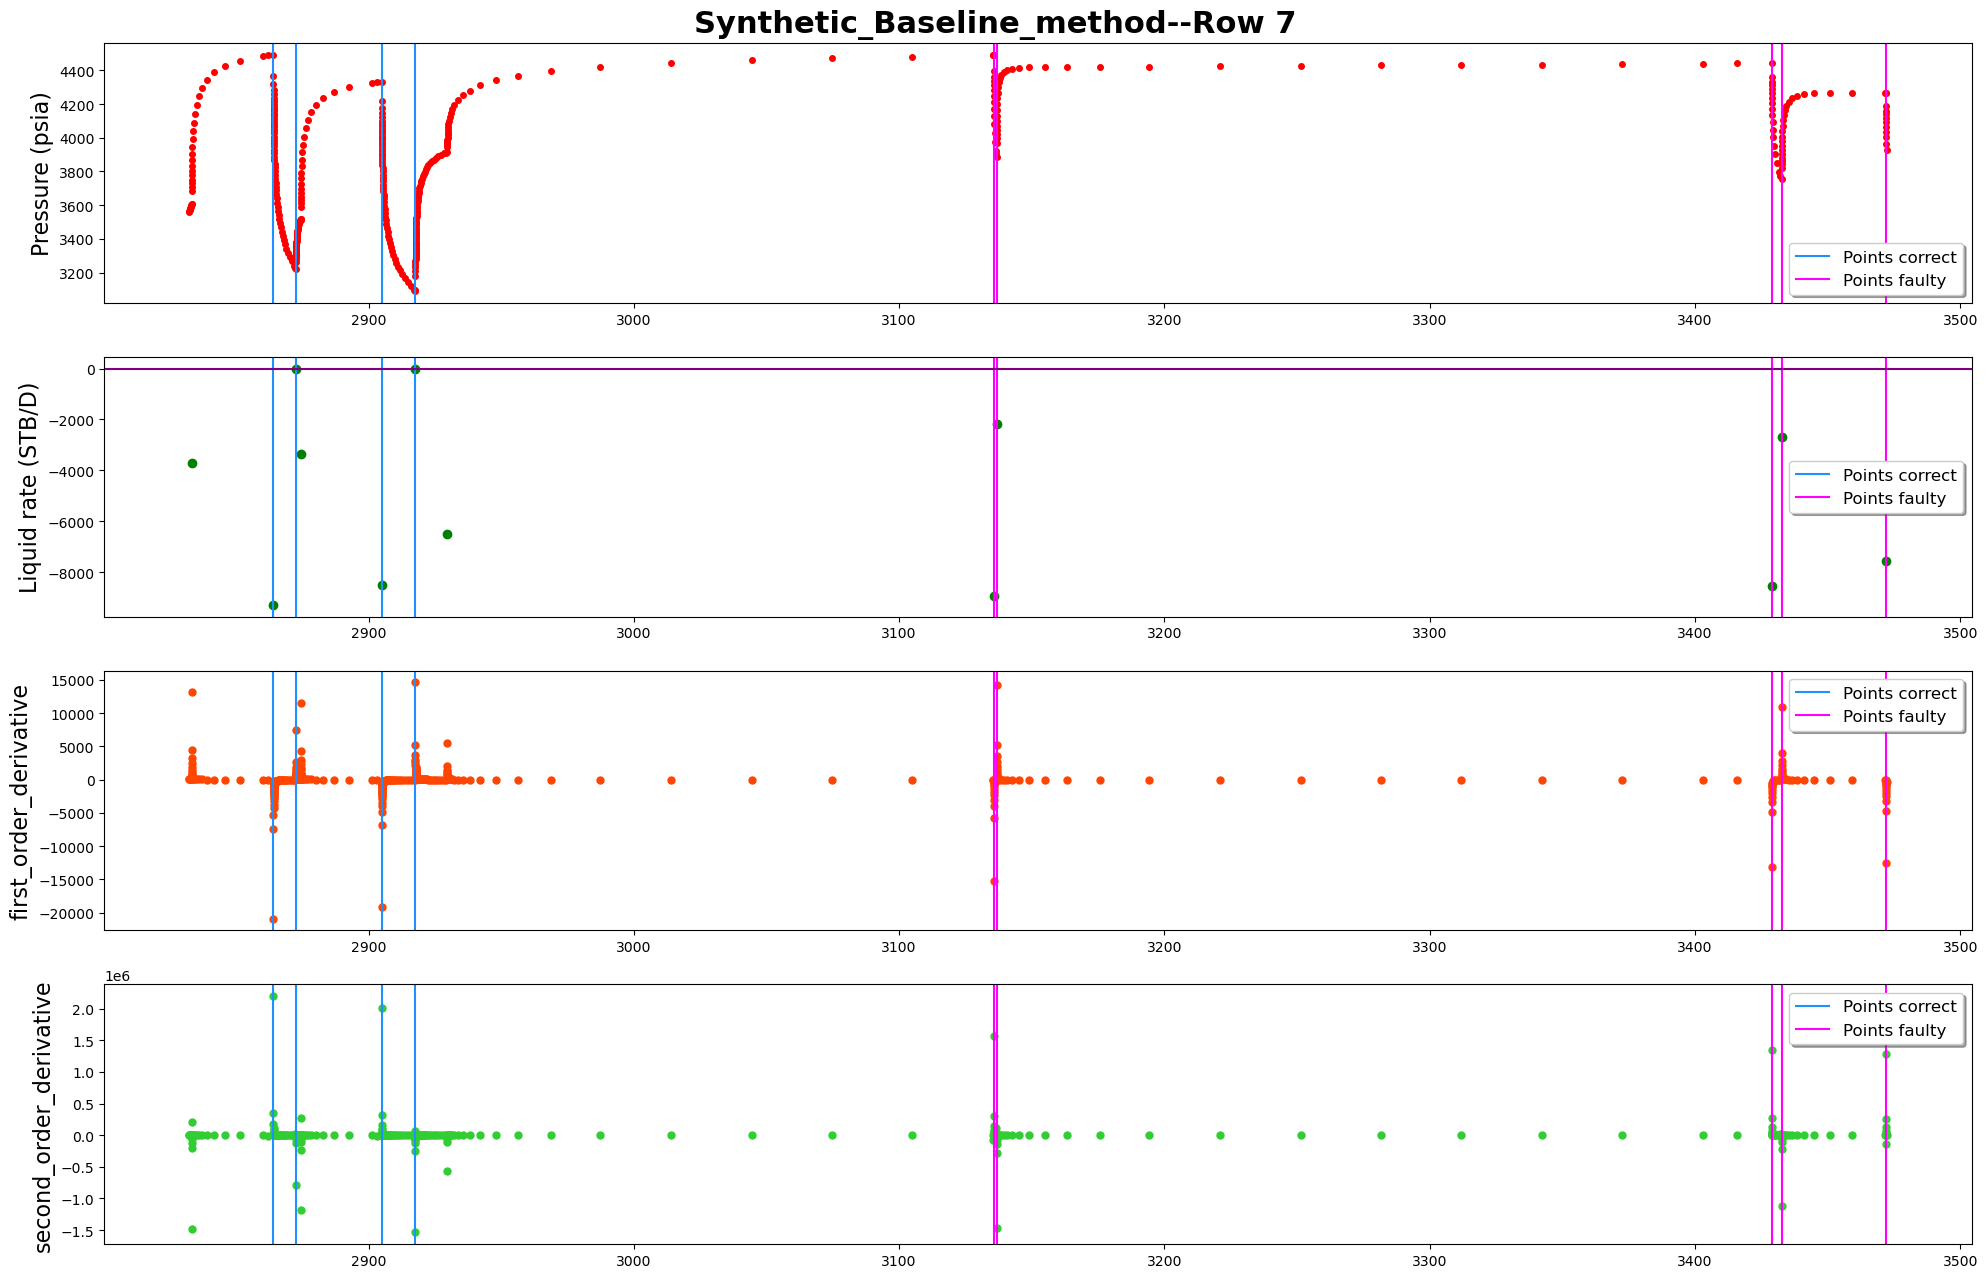

------row 8-----correctly detected points:[2835, 2916, 2965, 3044, 3101]
------row 8-----faulty detected points:[2807]
------row 8-----missed breakpoints:[]


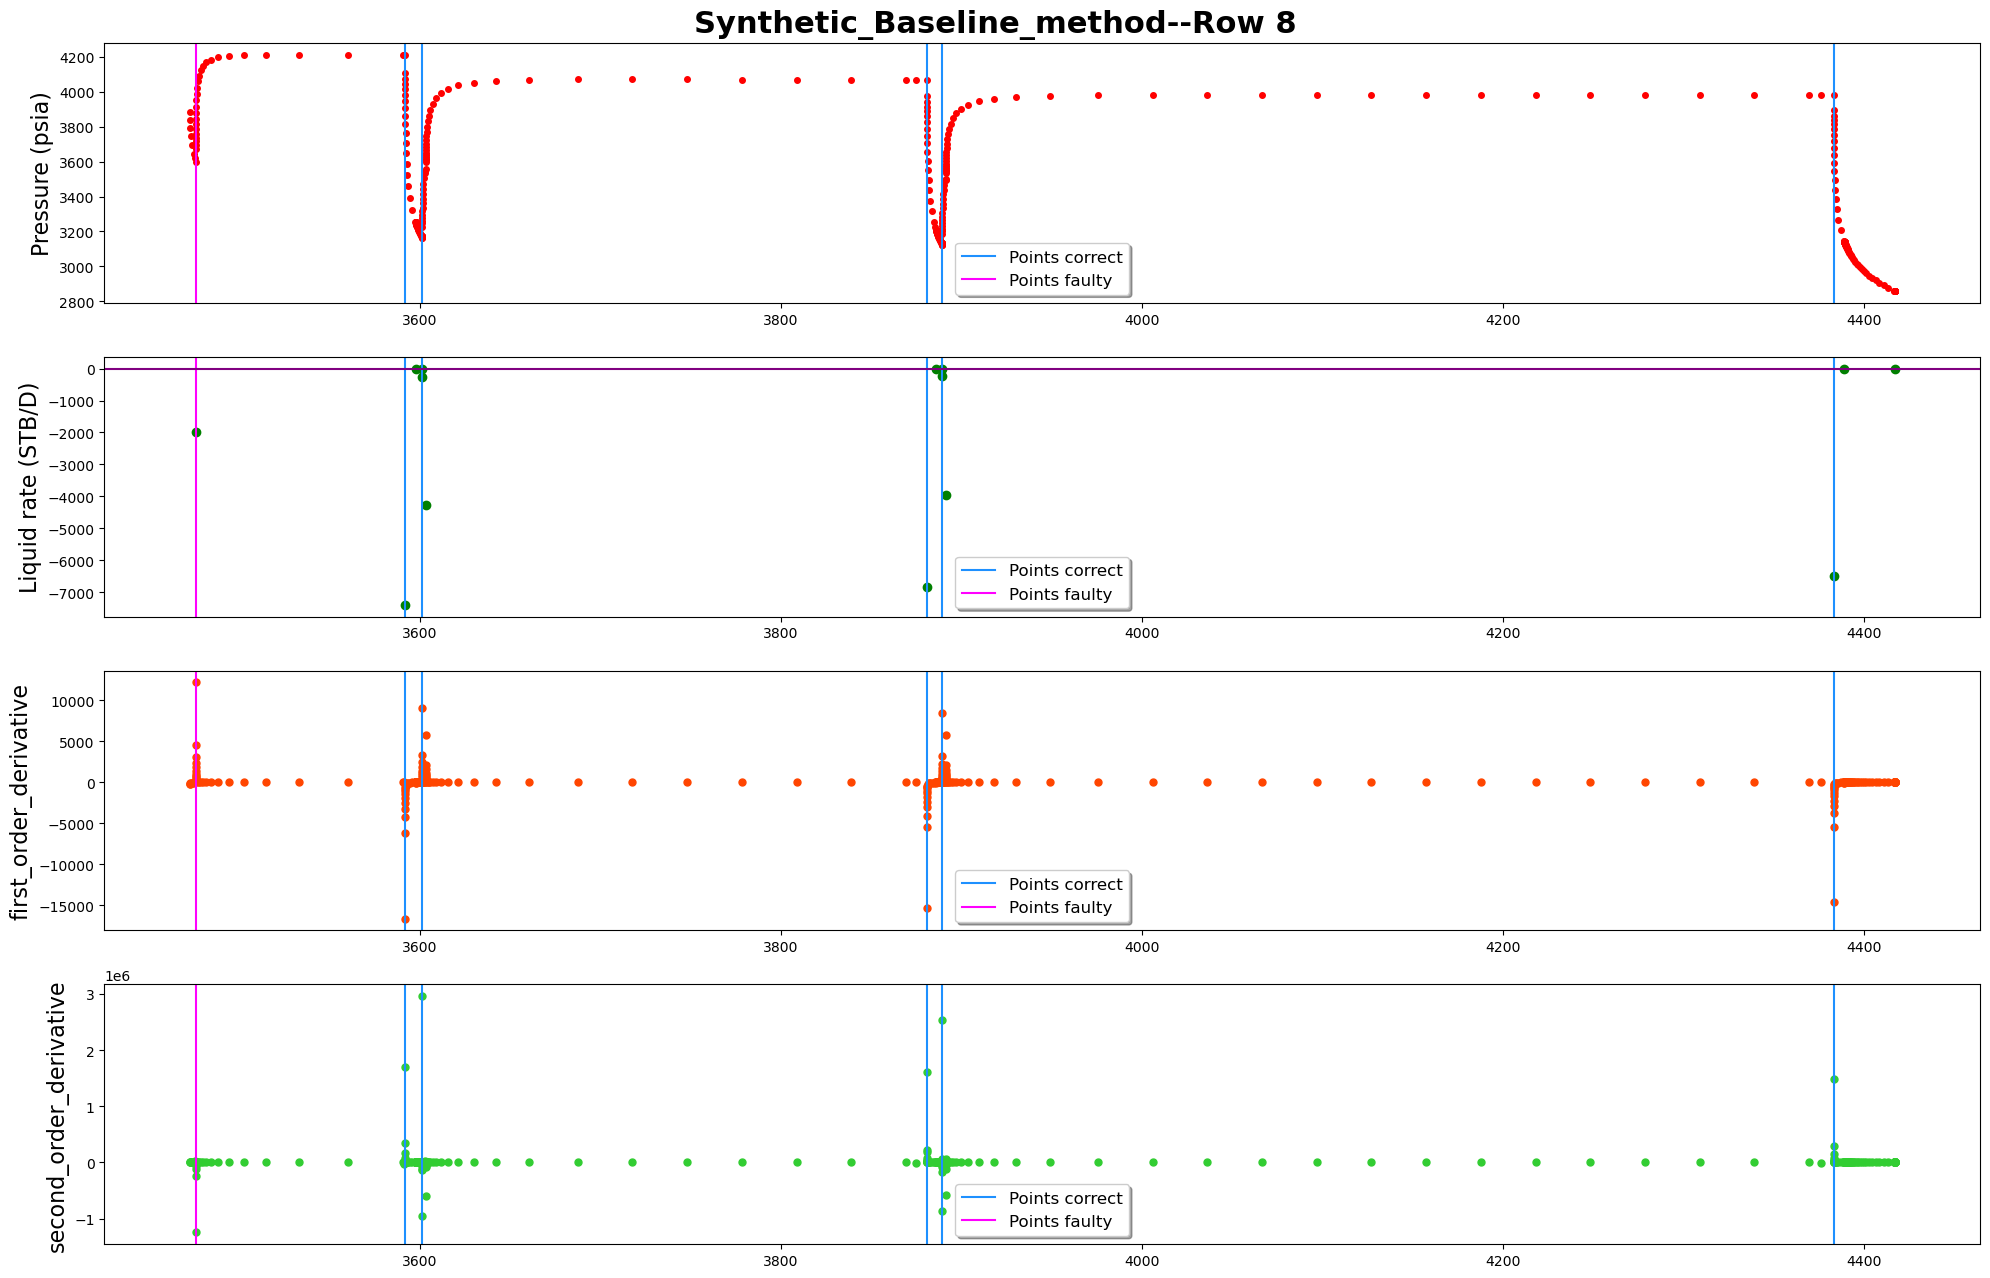

------row 9-----correctly detected points:[3240, 3284, 3368, 3411]
------row 9-----faulty detected points:[]
------row 9-----missed breakpoints:[]


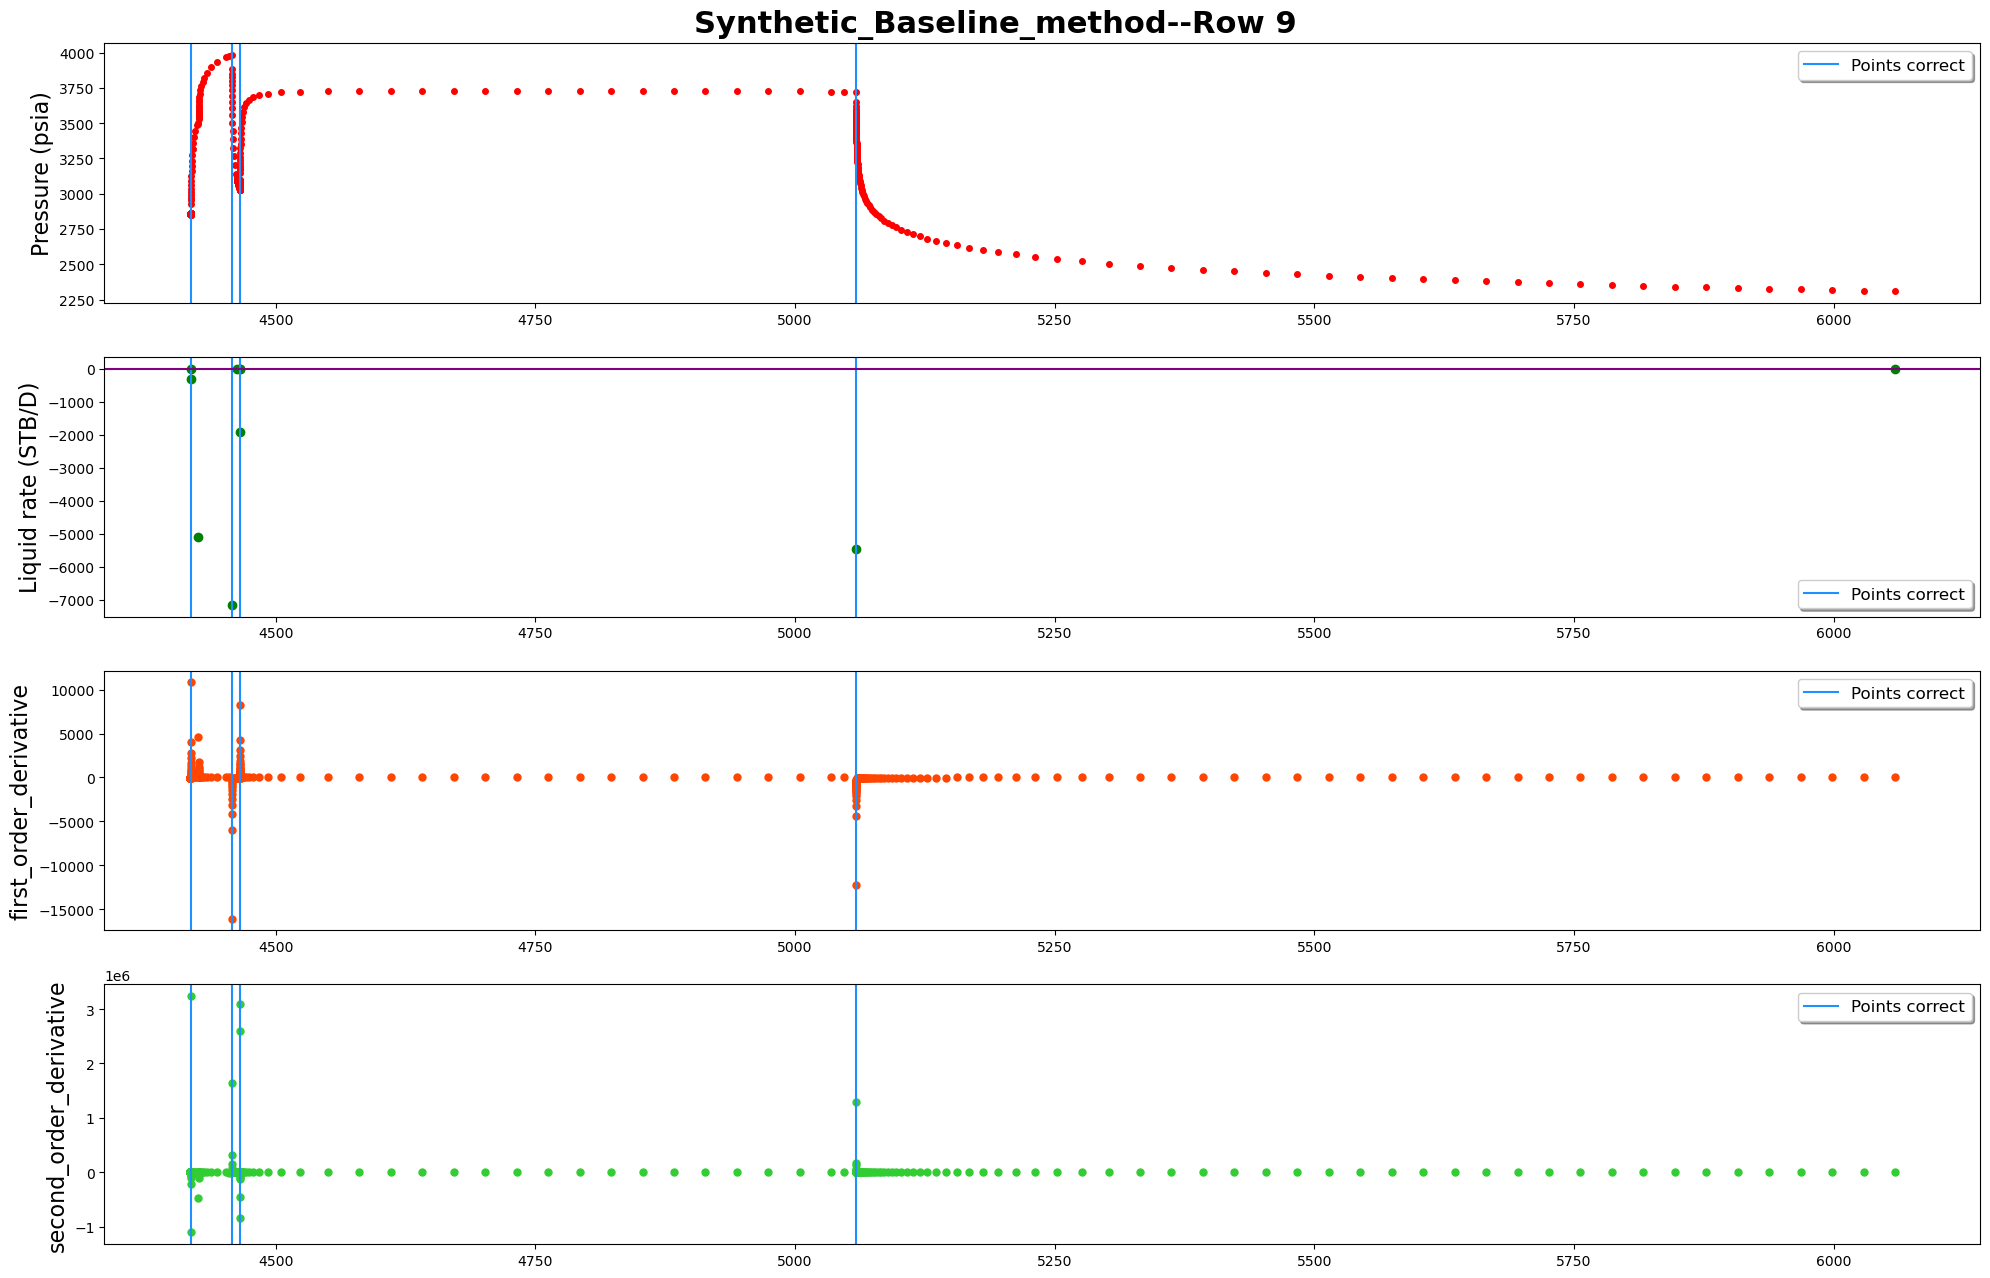

In [9]:
#baseline method
breakpoints_detected_baseline2=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print("len(breakpoints_detected_baseline2)",len(breakpoints_detected_baseline2))

#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(pressure_df,
          rate_df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

In [ ]:
# breakpoints_detected=detect_breakpoints_3(first_order_derivative,second_order_derivative)
# print(len(breakpoints_detected))
# print(breakpoints_detected)


# Synthetic data from Alexey

## load & process data

### load data

In [12]:
import pickle
with open(r"../data_input/2022-02-03_C5_synthetic_dataset/C5.pkl", "rb") as f:
    df, df_units, df_info = pickle.load(f)
    
df = df.reset_index()
df.drop(columns = ['WSTAT_W1', 'FPR'], inplace=True)
#df.rename(columns={'TIME': 'days', 'YEARS': 'years', 'TIMESTEP': 'dt', 'WBHP_W1': 'p', 'WWIR_W1': 'q'}, inplace=True)
df.head()

TIME         YEARS  TIMESTEP   WBHP_W1  WWIR_W1
0  0.000000  0.000000e+00  0.000000  300.0000      0.0
1  0.000020  5.480000e-08  0.000020  300.4551    245.0
2  0.000041  1.120000e-07  0.000021  300.8956    245.0
3  0.000063  1.730000e-07  0.000022  301.3207    245.0
4  0.000086  2.360000e-07  0.000023  301.7302    245.0

### calculate first & second order derivative

In [13]:
#calculate first order derivative
df['dp'] = df['WBHP_W1'].diff()
df["first_order_derivative"] = np.nan
# the derivative is shiftet by one step earlier (i.e. the forward derivative)!
df["first_order_derivative"].iloc[0:-1] = df['dp'].iloc[1:]/df['TIMESTEP'].iloc[1:]
df["first_order_derivative"].iloc[-1]=df["first_order_derivative"].iloc[-2]

#calculate second order derivative
df['dp_2'] = df["first_order_derivative"].diff()
df["second_order_derivative"] = np.nan
# the derivative is shiftet by one step earlier (i.e. the forward derivative)!
df["second_order_derivative"].iloc[0:-1] = df['dp_2'].iloc[1:]/df['TIMESTEP'].iloc[1:]
df["second_order_derivative"].iloc[-1]=df["second_order_derivative"].iloc[-2]
df

TIME         YEARS  TIMESTEP   WBHP_W1  WWIR_W1      dp  \
0         0.000000  0.000000e+00  0.000000  300.0000      0.0     NaN   
1         0.000020  5.480000e-08  0.000020  300.4551    245.0  0.4551   
2         0.000041  1.120000e-07  0.000021  300.8956    245.0  0.4405   
3         0.000063  1.730000e-07  0.000022  301.3207    245.0  0.4251   
4         0.000086  2.360000e-07  0.000023  301.7302    245.0  0.4095   
...            ...           ...       ...       ...      ...     ...   
18683  1094.602000  2.996858e+00  0.100000  339.4235    237.0  0.0016   
18684  1094.702000  2.997131e+00  0.100000  339.4250    237.0  0.0015   
18685  1094.802000  2.997405e+00  0.100000  339.4266    237.0  0.0016   
18686  1094.886000  2.997635e+00  0.083891  339.4279    237.0  0.0013   
18687  1094.970000  2.997864e+00  0.083891  339.4291    237.0  0.0012   

       first_order_derivative         dp_2  second_order_derivative  
0                22755.000000          NaN            -8.894048e+07  
1                20976.190476 -1778.809524            -8.289983e+07  
2                19235.294118 -1740.896359            -7.169376e+07  
3                17650.862069 -1584.432049            -6.317573e+07  
4                16185.185185 -1465.676884            -5.748765e+07  
...                       ...          ...                      ...  
18683                0.015000    -0.001000             1.000000e-02  
18684                0.016000     0.001000            -5.037012e-03  
18685                0.015496    -0.000504            -1.420919e-02  
18686                0.014304    -0.001192             0.000000e+00  
18687                0.014304     0.000000             0.000000e+00  

[18688 rows x 9 columns]

In [14]:
std_1=statistics.stdev(df["first_order_derivative"])
std_2=statistics.stdev(df["second_order_derivative"])
std_1, std_2

(1970.979394643047, 6843835.758885524)

In [15]:
df.describe()

TIME         YEARS      TIMESTEP       WBHP_W1       WWIR_W1  \
count  18688.000000  18688.000000  18688.000000  18688.000000  18688.000000   
mean     520.581869      1.425276      0.058592    328.822854    226.450557   
std      326.101242      0.892817      0.046355     10.230058    115.668266   
min        0.000000      0.000000      0.000000    300.000000      0.000000   
25%      219.427200      0.600759      0.001869    321.426125    207.000000   
50%      547.362200      1.498596      0.100000    330.272550    244.000000   
75%      798.397200      2.185893      0.100000    337.829325    305.000000   
max     1094.970000      2.997864      0.100000    347.549400    391.000000   

                 dp  first_order_derivative          dp_2  \
count  18687.000000            18688.000000  18687.000000   
mean       0.002110               14.764237     -1.217691   
std        0.062145             1970.979395    796.501097   
min       -0.639700           -31985.000000 -31985.196235   
25%       -0.002500               -0.056000     -0.010171   
50%        0.003000                0.031000      0.000000   
75%        0.009200                0.226000      0.001000   
max        0.551600            27580.000000  27580.032185   

       second_order_derivative  
count             1.868800e+04  
mean             -4.296431e+04  
std               6.843836e+06  
min              -1.078095e+08  
25%              -1.932347e-01  
50%               0.000000e+00  
75%               1.000000e-02  
max               1.244881e+08

### day convert to hour

In [16]:
#day convert to hour
df["TIME"]=df["TIME"]*24
df["TIMESTEP"]=df["TIMESTEP"]*24
df

TIME         YEARS  TIMESTEP   WBHP_W1  WWIR_W1      dp  \
0          0.000000  0.000000e+00  0.000000  300.0000      0.0     NaN   
1          0.000480  5.480000e-08  0.000480  300.4551    245.0  0.4551   
2          0.000984  1.120000e-07  0.000504  300.8956    245.0  0.4405   
3          0.001512  1.730000e-07  0.000530  301.3207    245.0  0.4251   
4          0.002069  2.360000e-07  0.000557  301.7302    245.0  0.4095   
...             ...           ...       ...       ...      ...     ...   
18683  26270.448000  2.996858e+00  2.400000  339.4235    237.0  0.0016   
18684  26272.848000  2.997131e+00  2.400000  339.4250    237.0  0.0015   
18685  26275.248000  2.997405e+00  2.400000  339.4266    237.0  0.0016   
18686  26277.264000  2.997635e+00  2.013384  339.4279    237.0  0.0013   
18687  26279.280000  2.997864e+00  2.013384  339.4291    237.0  0.0012   

       first_order_derivative         dp_2  second_order_derivative  
0                22755.000000          NaN            -8.894048e+07  
1                20976.190476 -1778.809524            -8.289983e+07  
2                19235.294118 -1740.896359            -7.169376e+07  
3                17650.862069 -1584.432049            -6.317573e+07  
4                16185.185185 -1465.676884            -5.748765e+07  
...                       ...          ...                      ...  
18683                0.015000    -0.001000             1.000000e-02  
18684                0.016000     0.001000            -5.037012e-03  
18685                0.015496    -0.000504            -1.420919e-02  
18686                0.014304    -0.001192             0.000000e+00  
18687                0.014304     0.000000             0.000000e+00  

[18688 rows x 9 columns]

## detect using baseline method (detect_breakpoints_2) 

In [17]:
colum_names={"pressure":{"time":"TIME",
                        "measure":"WBHP_W1",
                        "first_order_derivative":"first_order_derivative",
                        "second_order_derivative":"second_order_derivative"},
             "rate":{"time":"TIME",
                     "measure":"WWIR_W1"}}
data_inOneRow=1200
ground_truth=[]

---the std of first_order_derivative: 1970.979394643047
---the std of second_order_derivative: 6843835.758885524
len(breakpoints_detected) 23
---initializing...
---plotting...
No ground truth defined


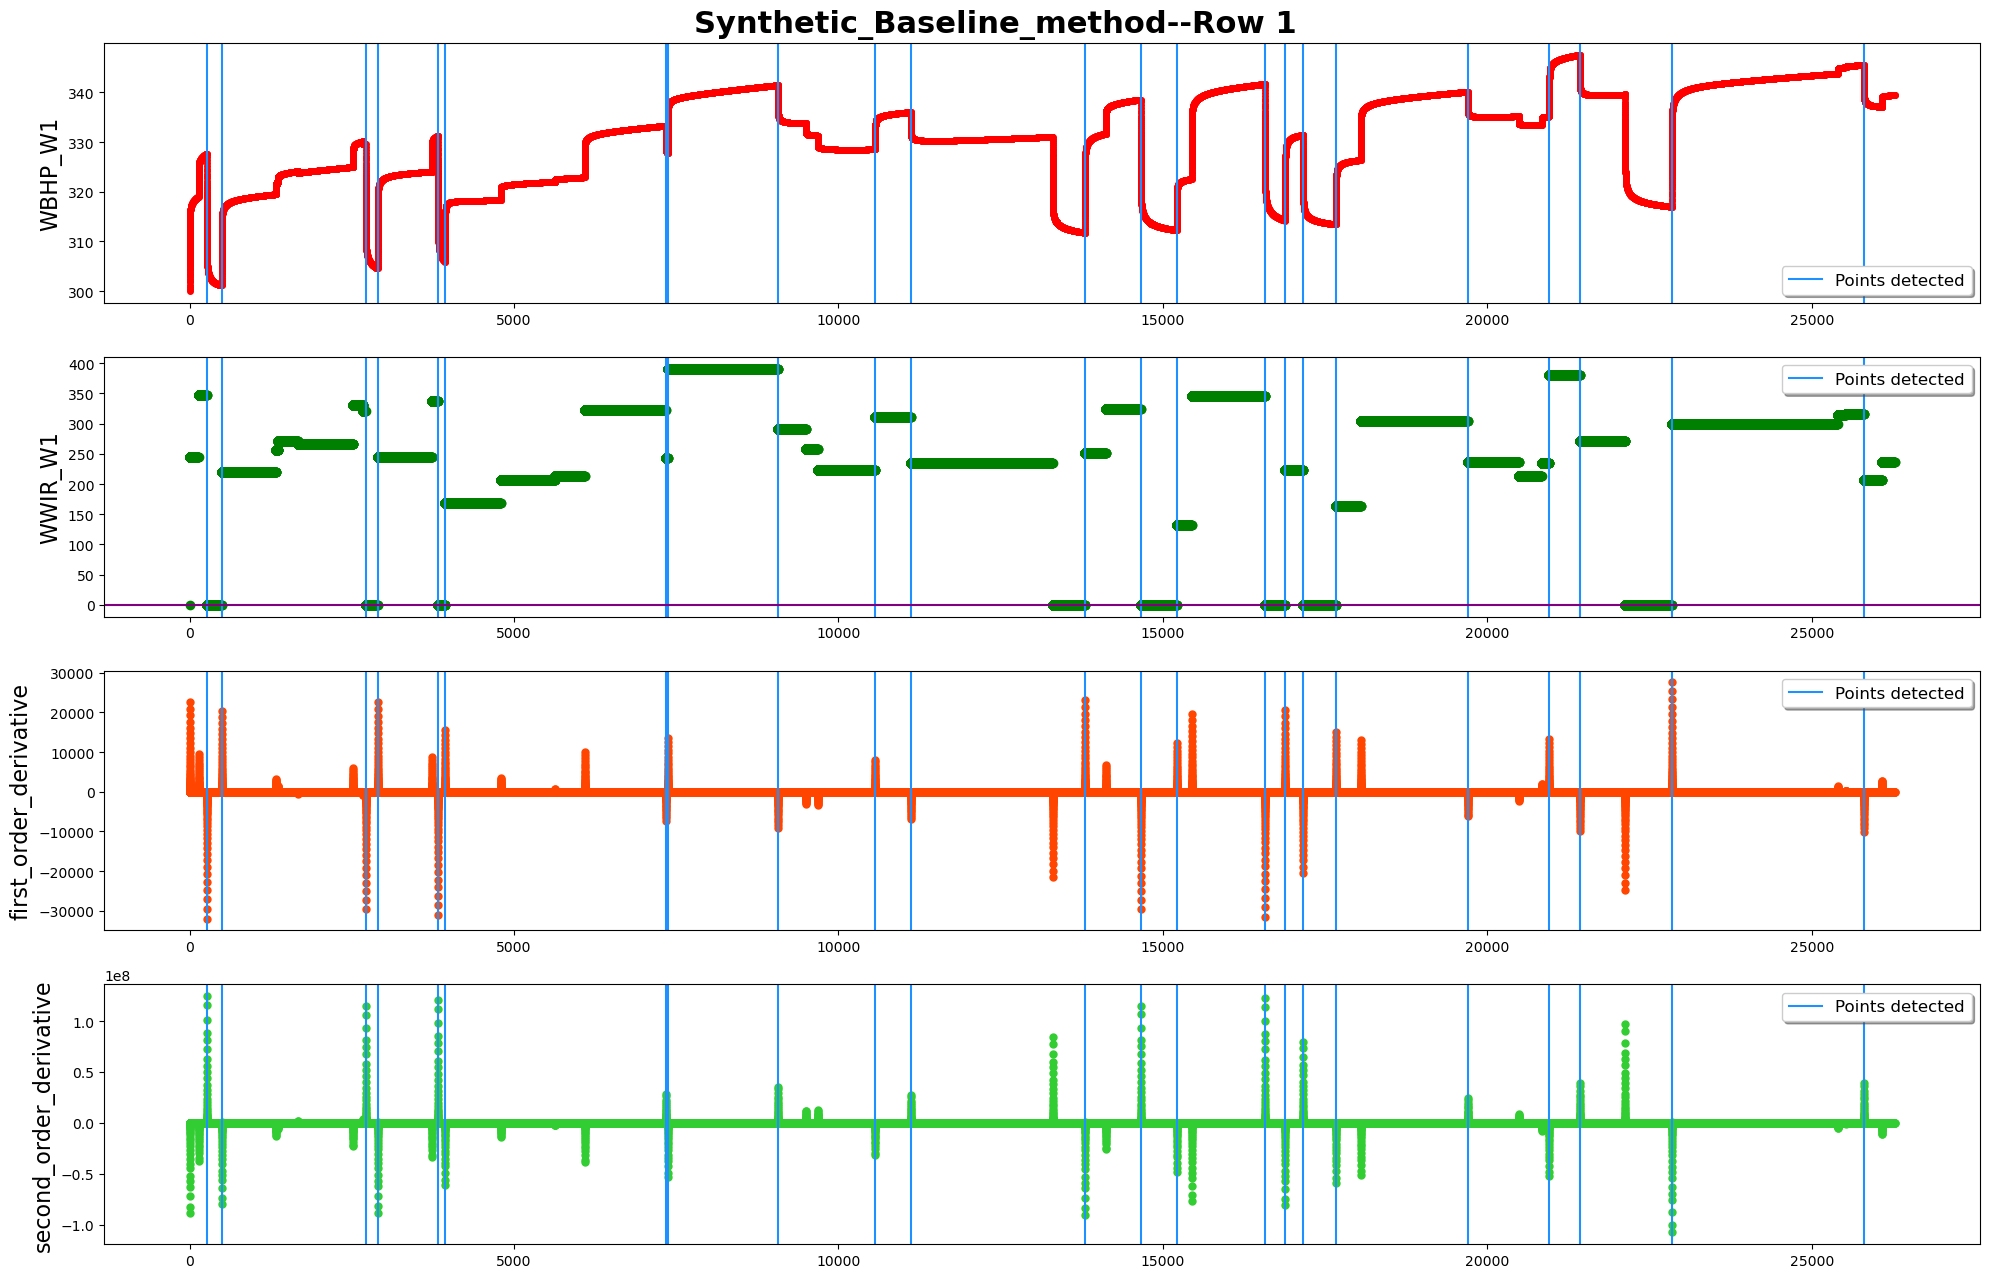

detected 23 points as breakpoints
The plot is devided into 16 rows
------row 1-----detected points:[421, 672]


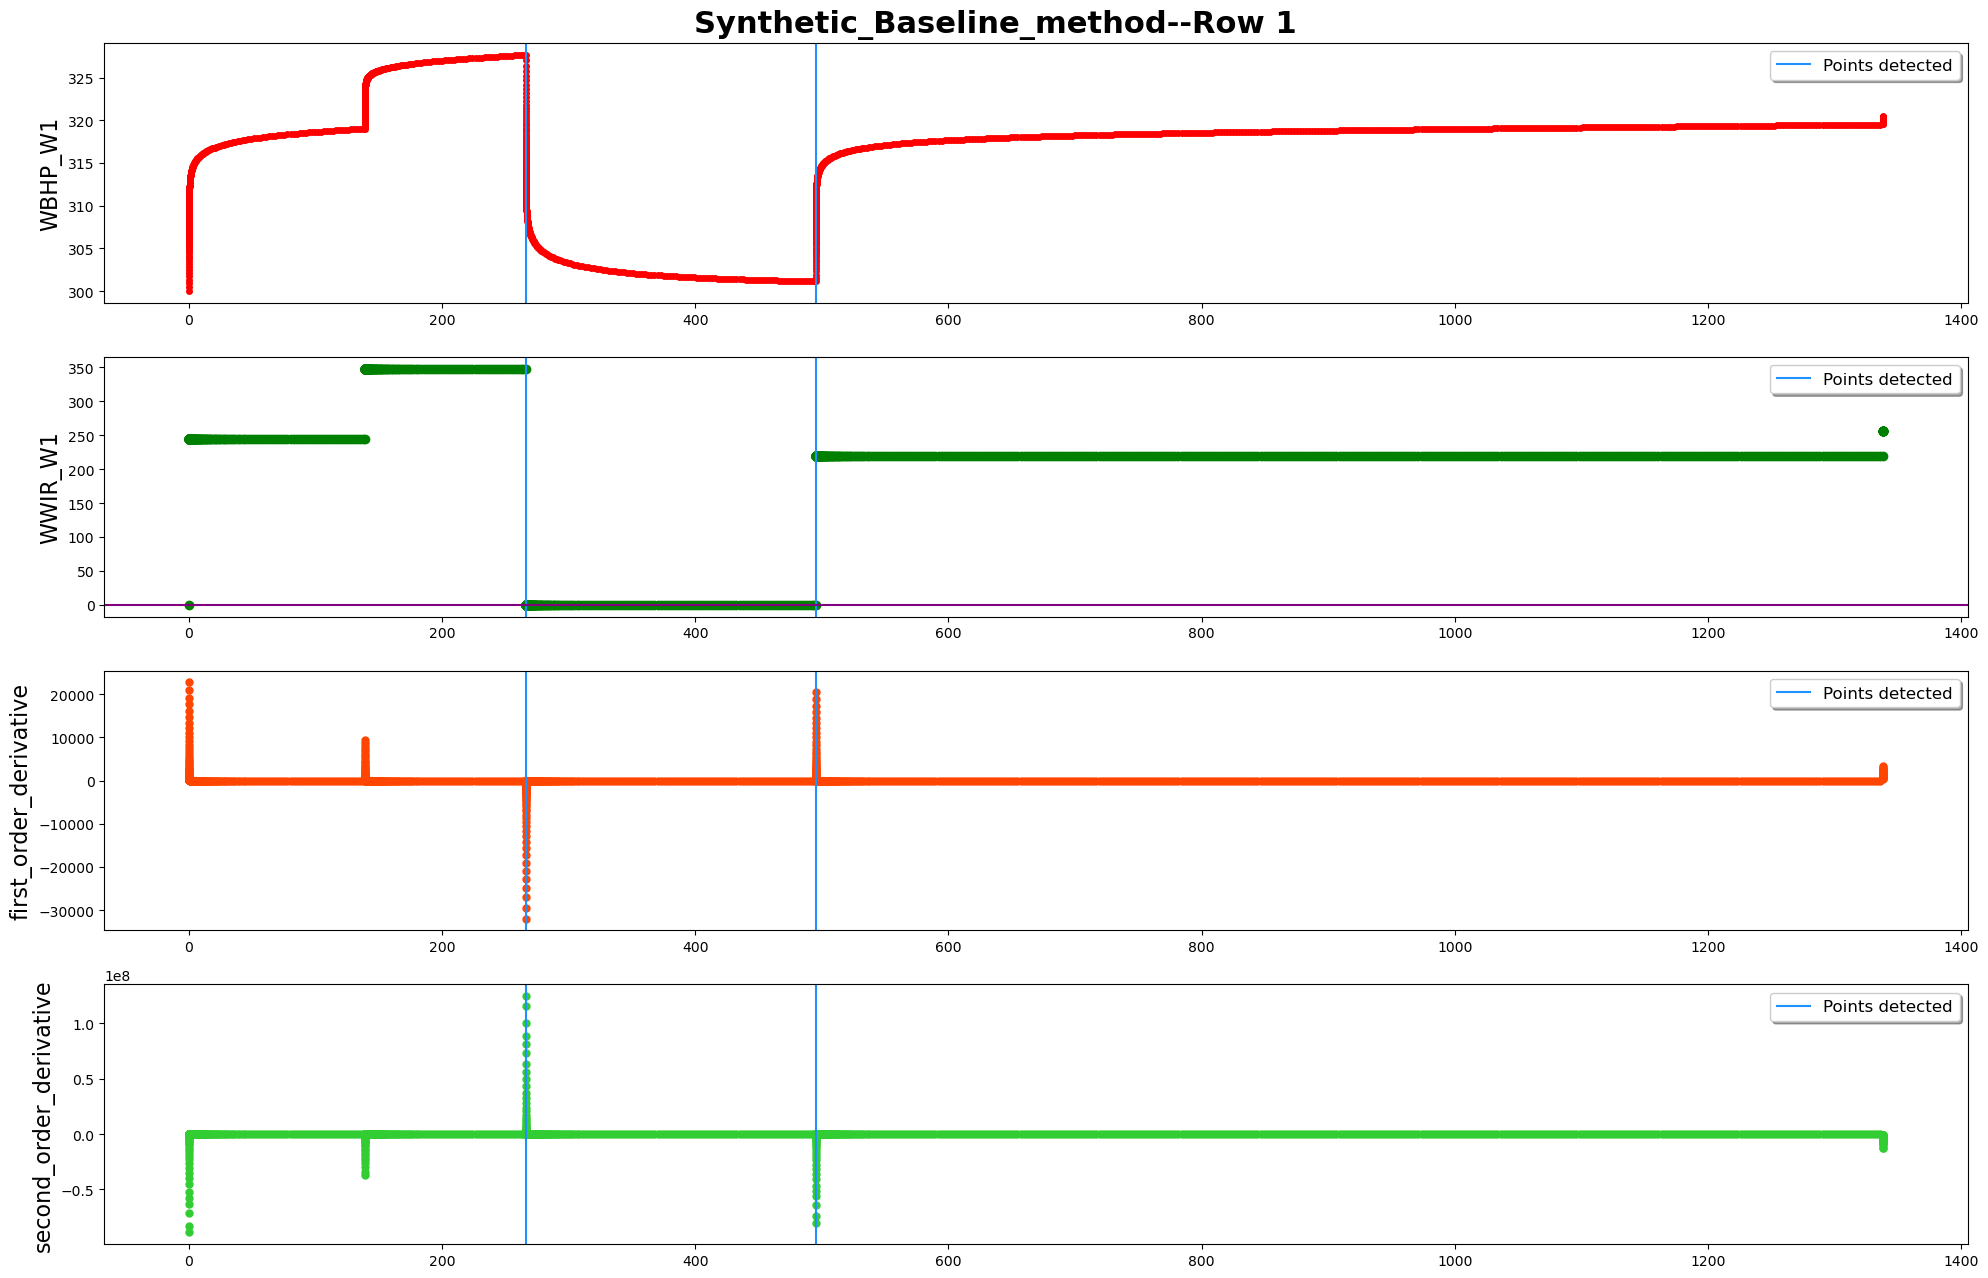

------row 2-----detected points:[]


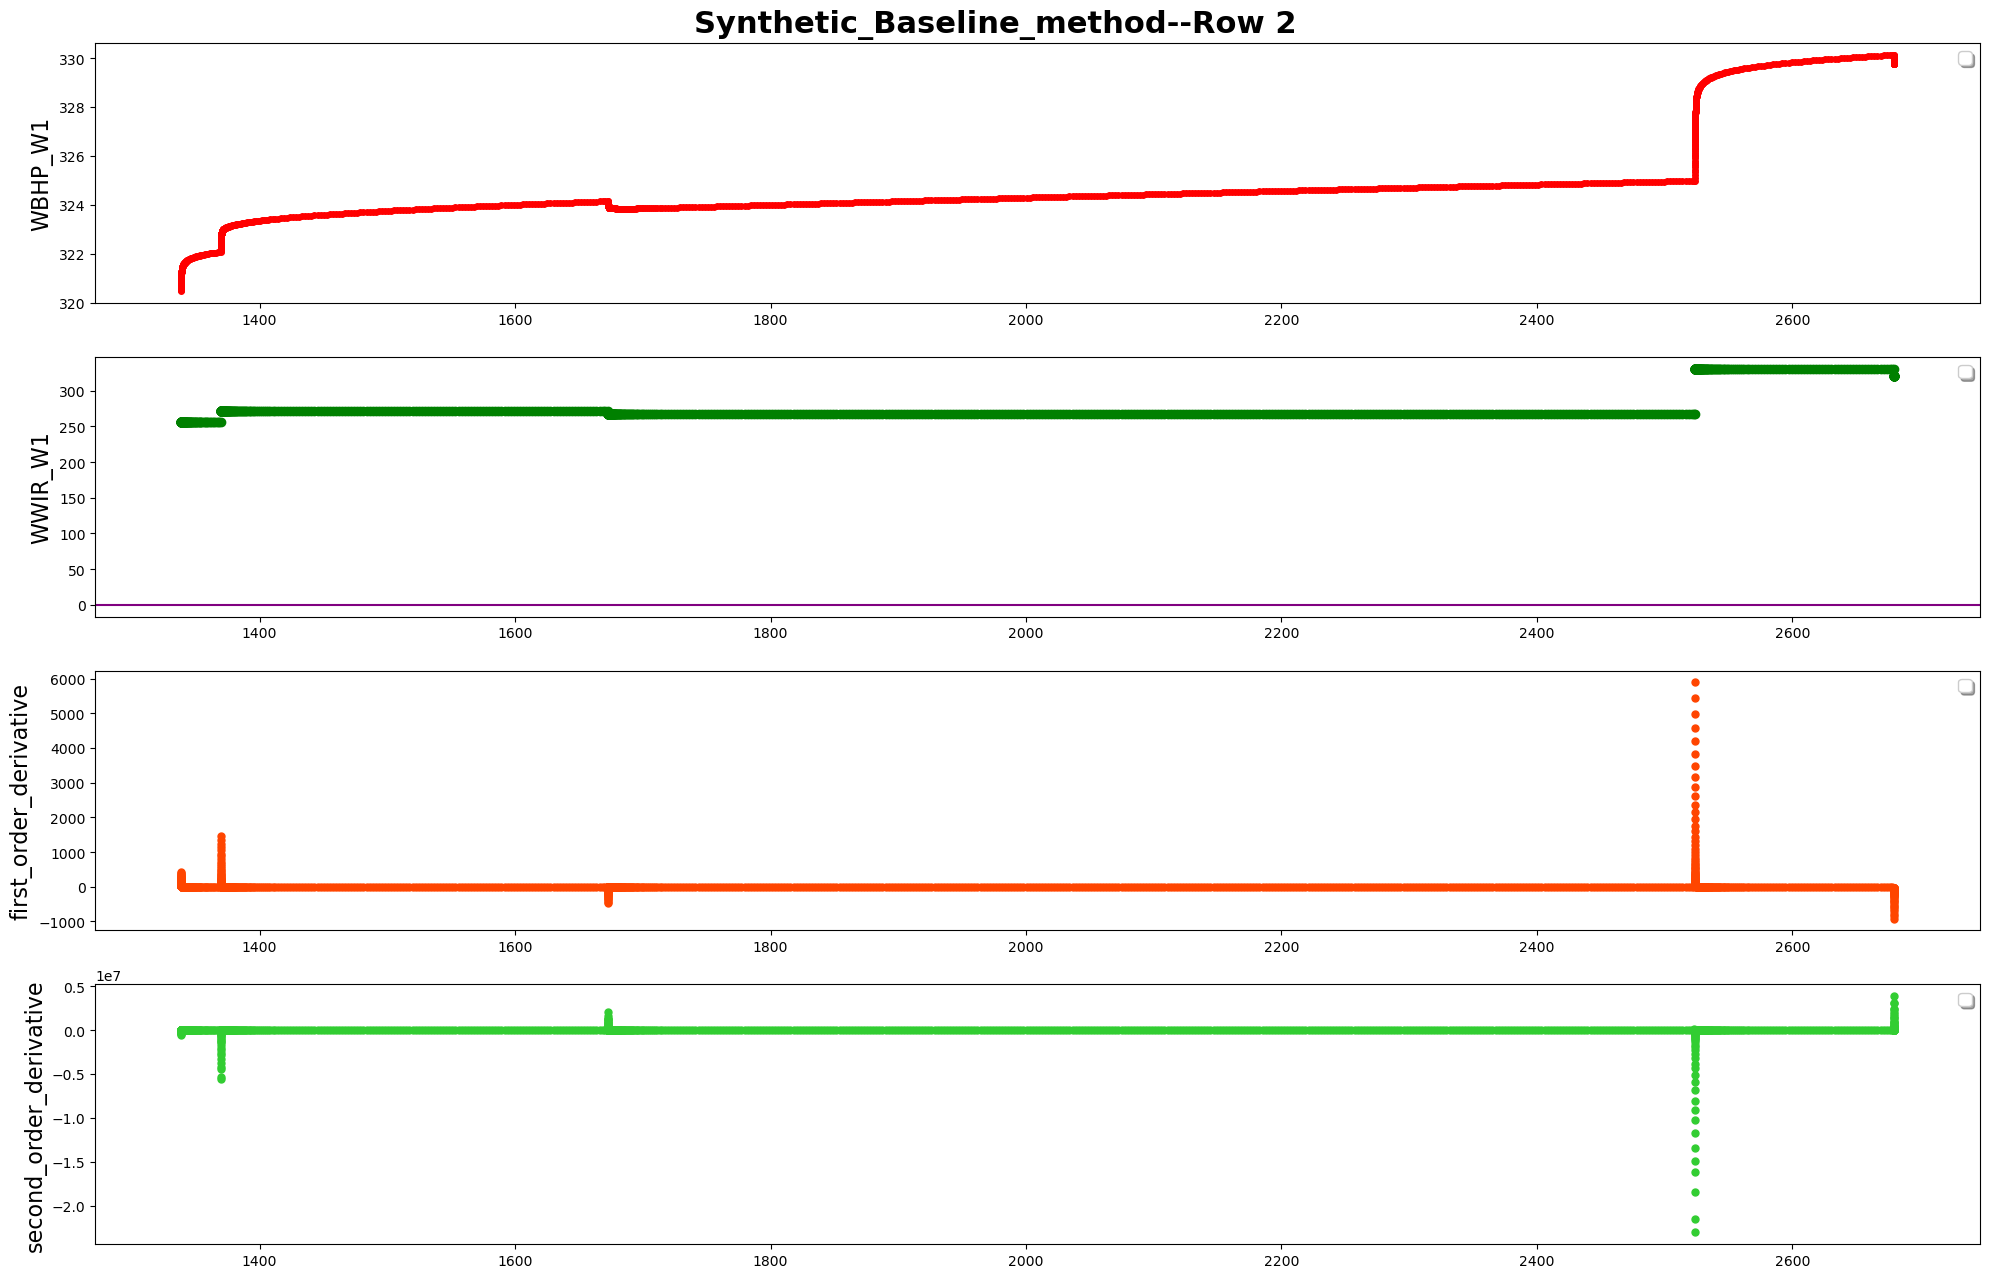

------row 3-----detected points:[2522, 2910]


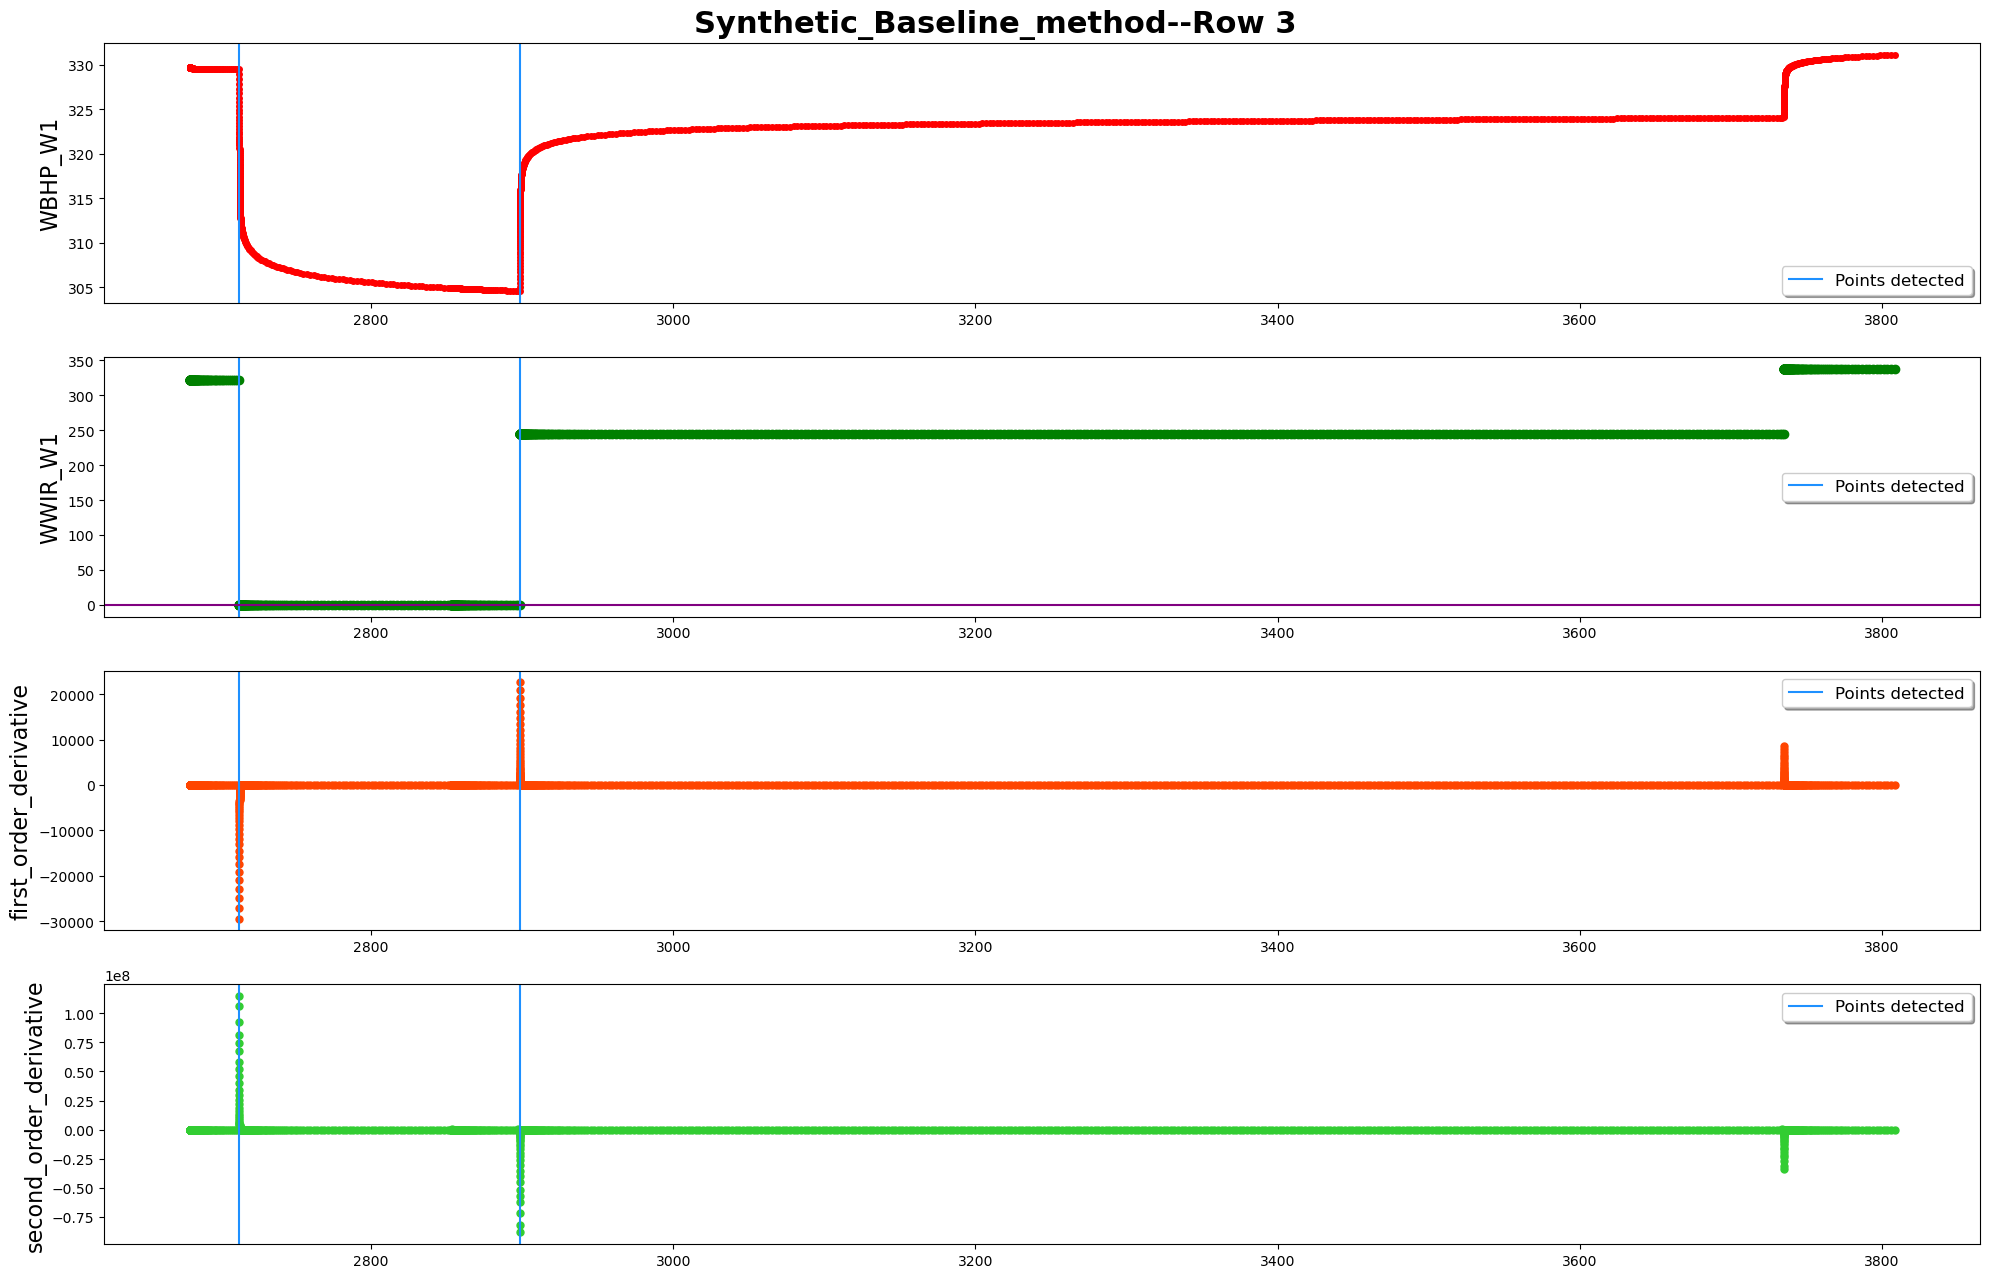

------row 4-----detected points:[3609, 3810]


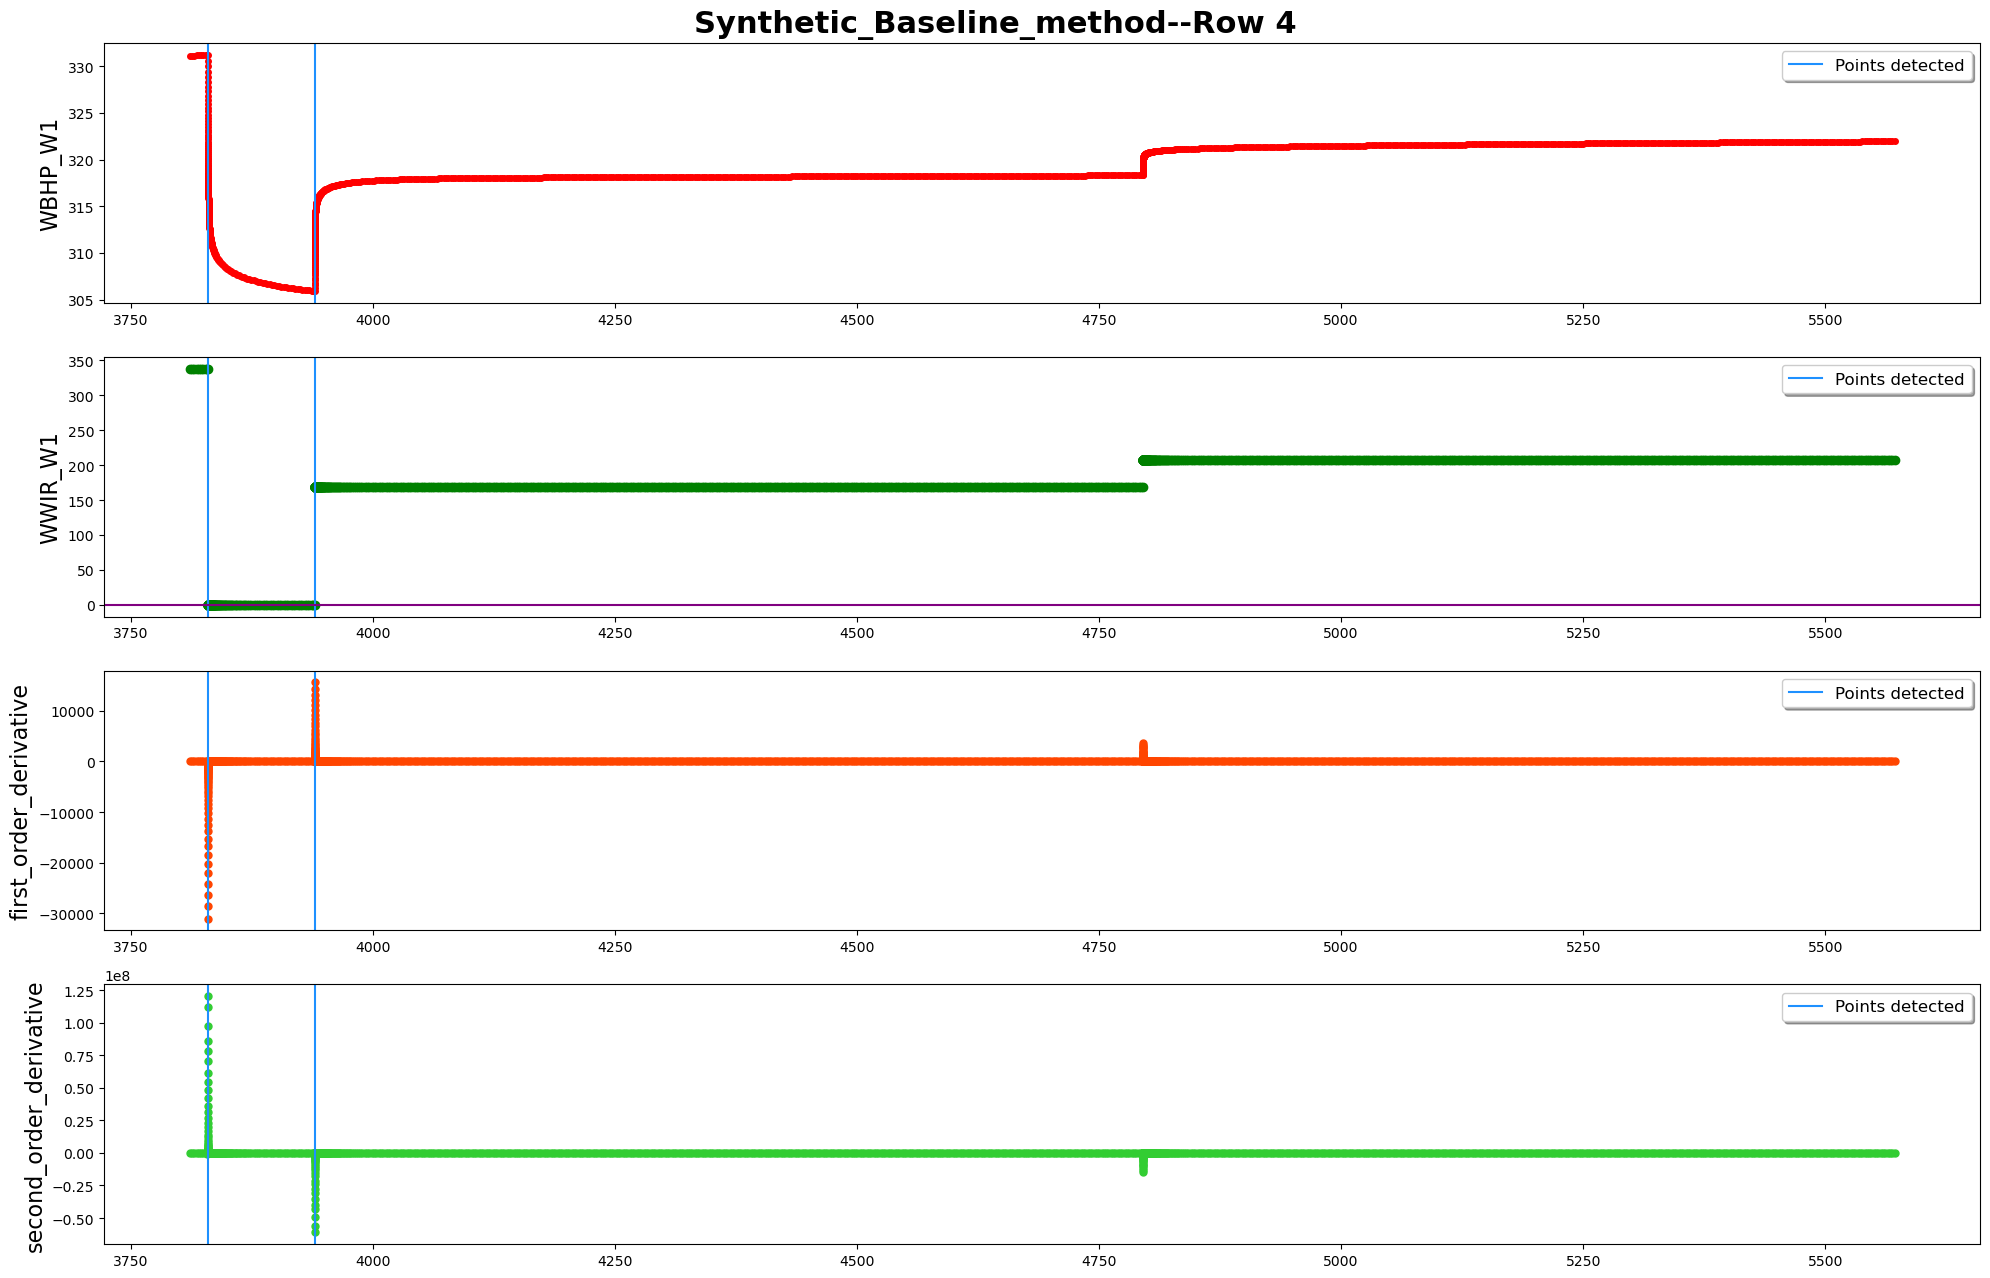

------row 5-----detected points:[5845]


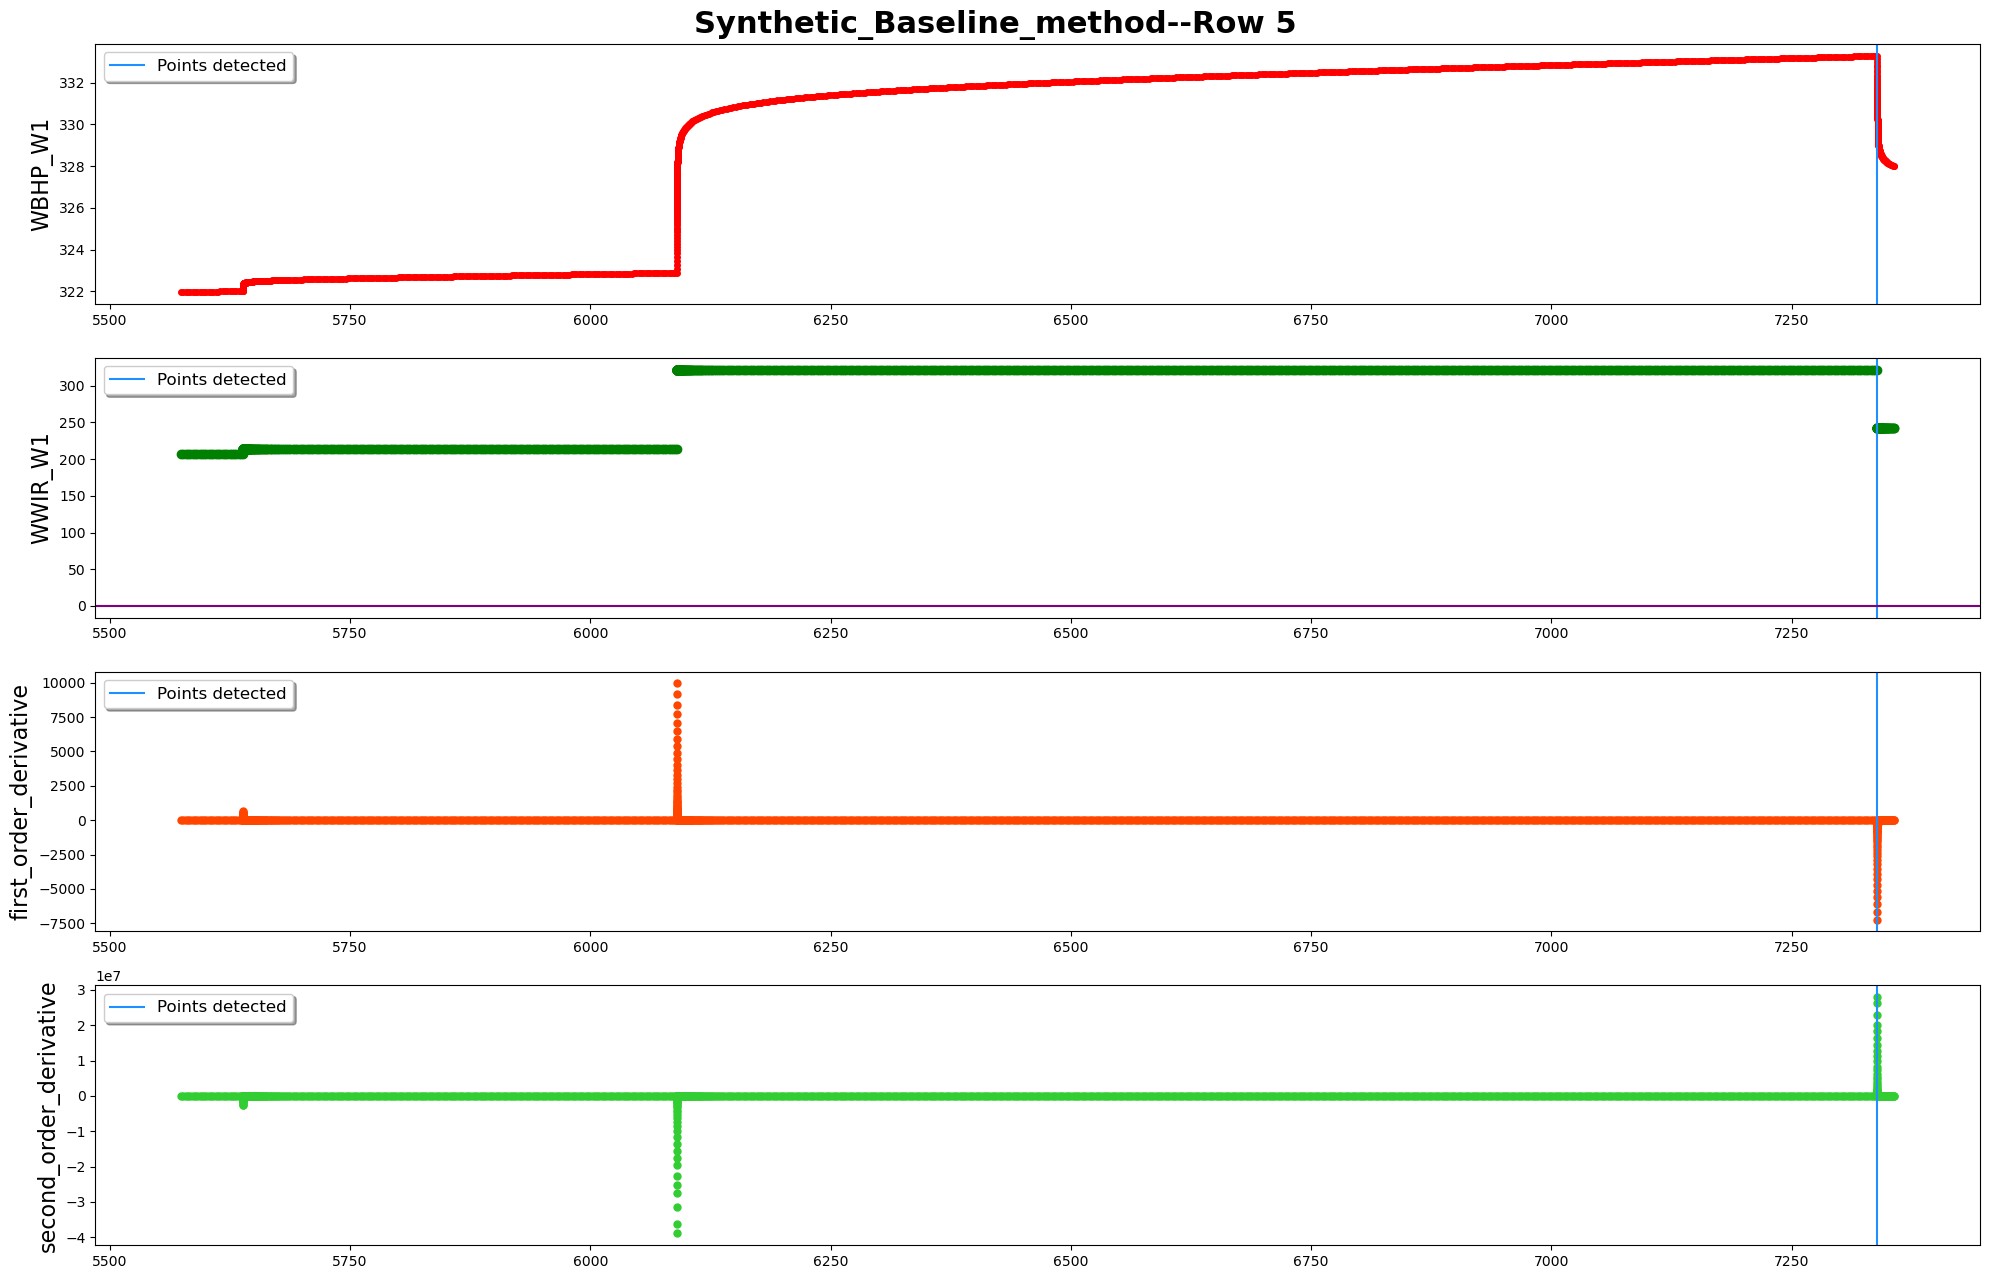

------row 6-----detected points:[6011, 6875]


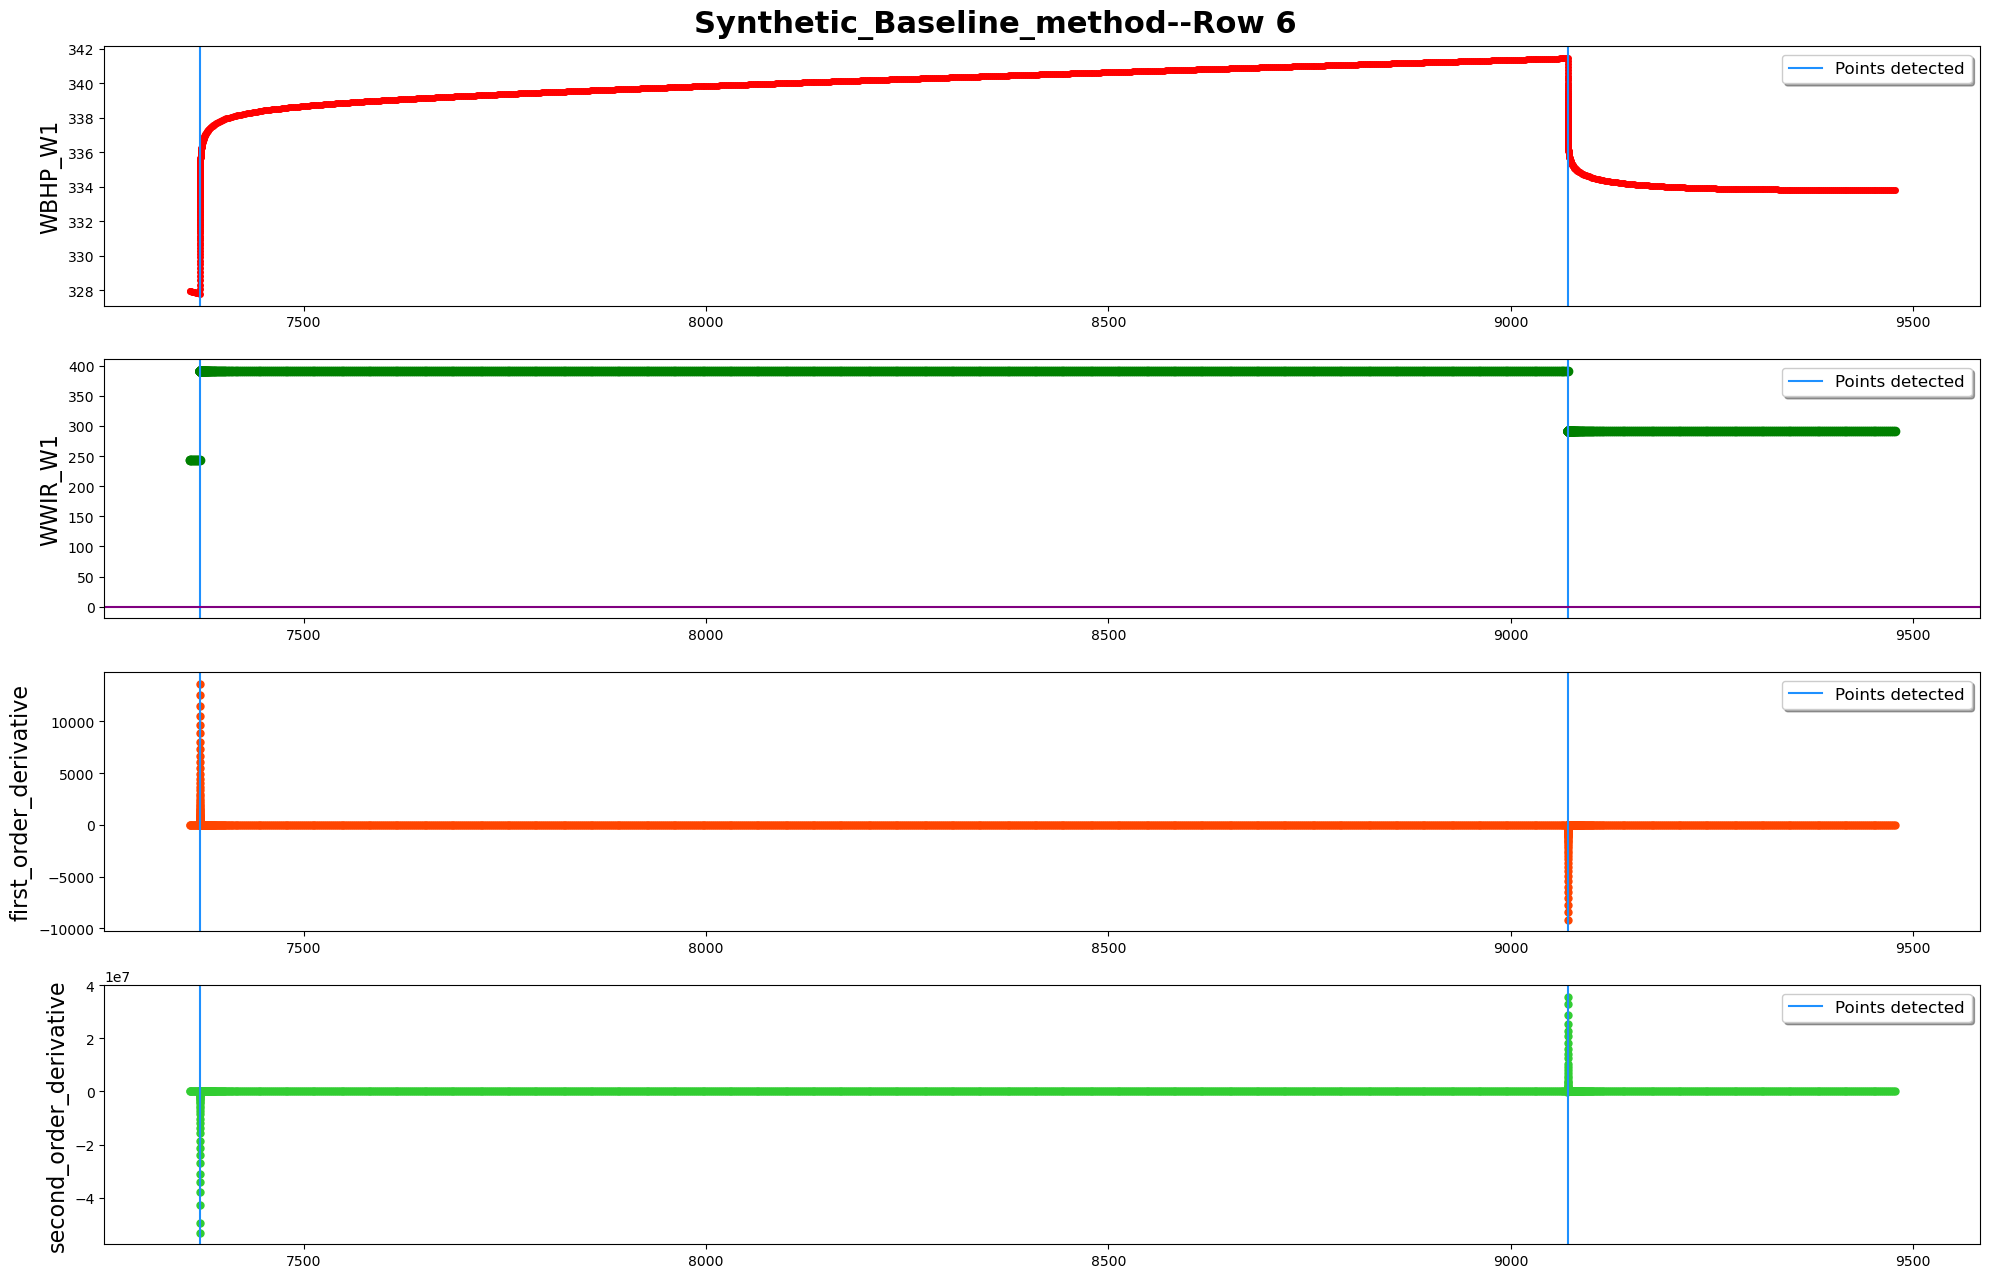

------row 7-----detected points:[7964, 8347]


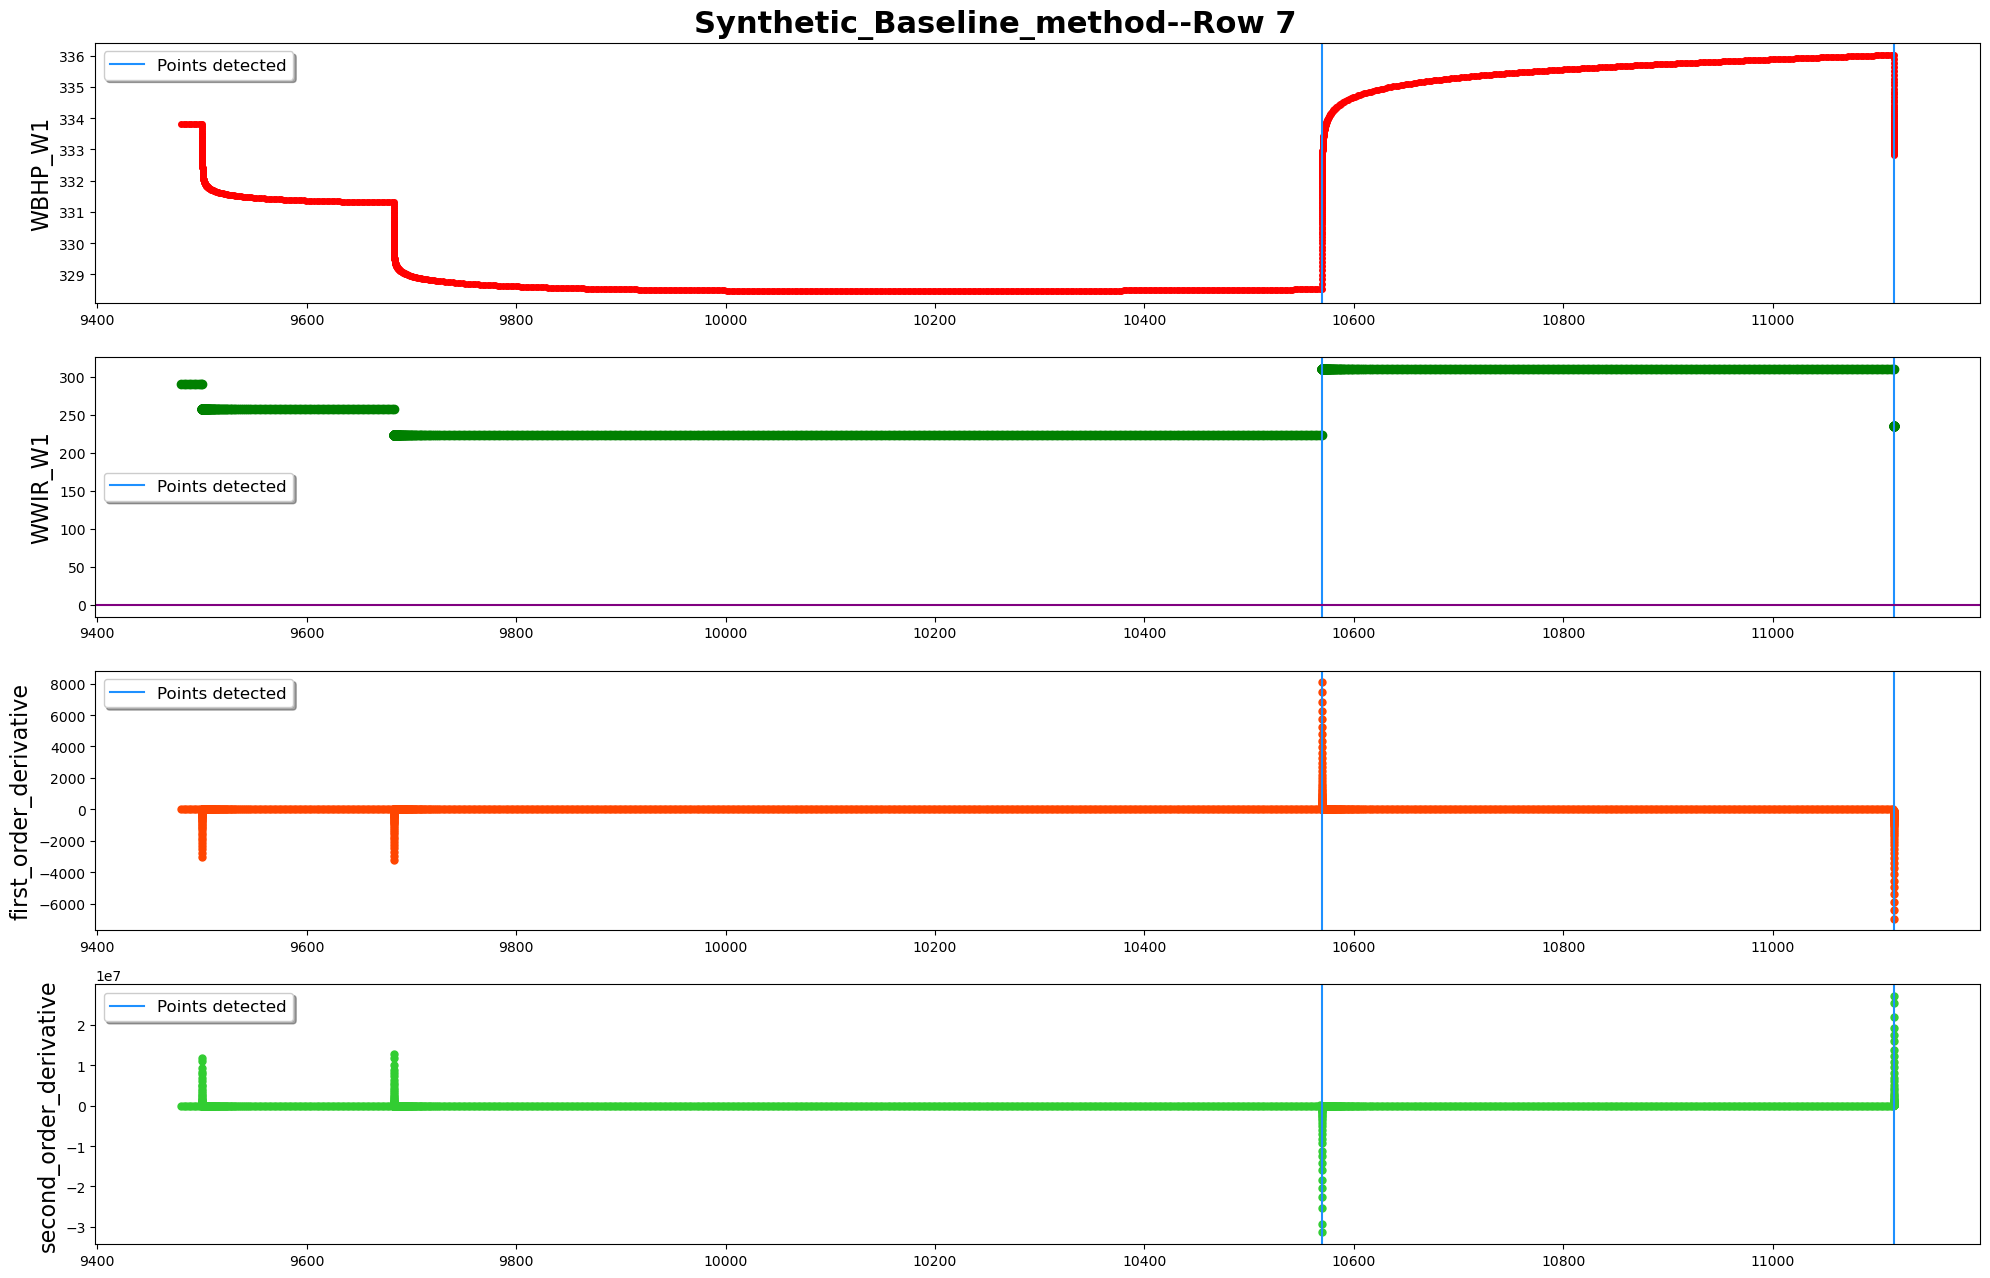

------row 8-----detected points:[]


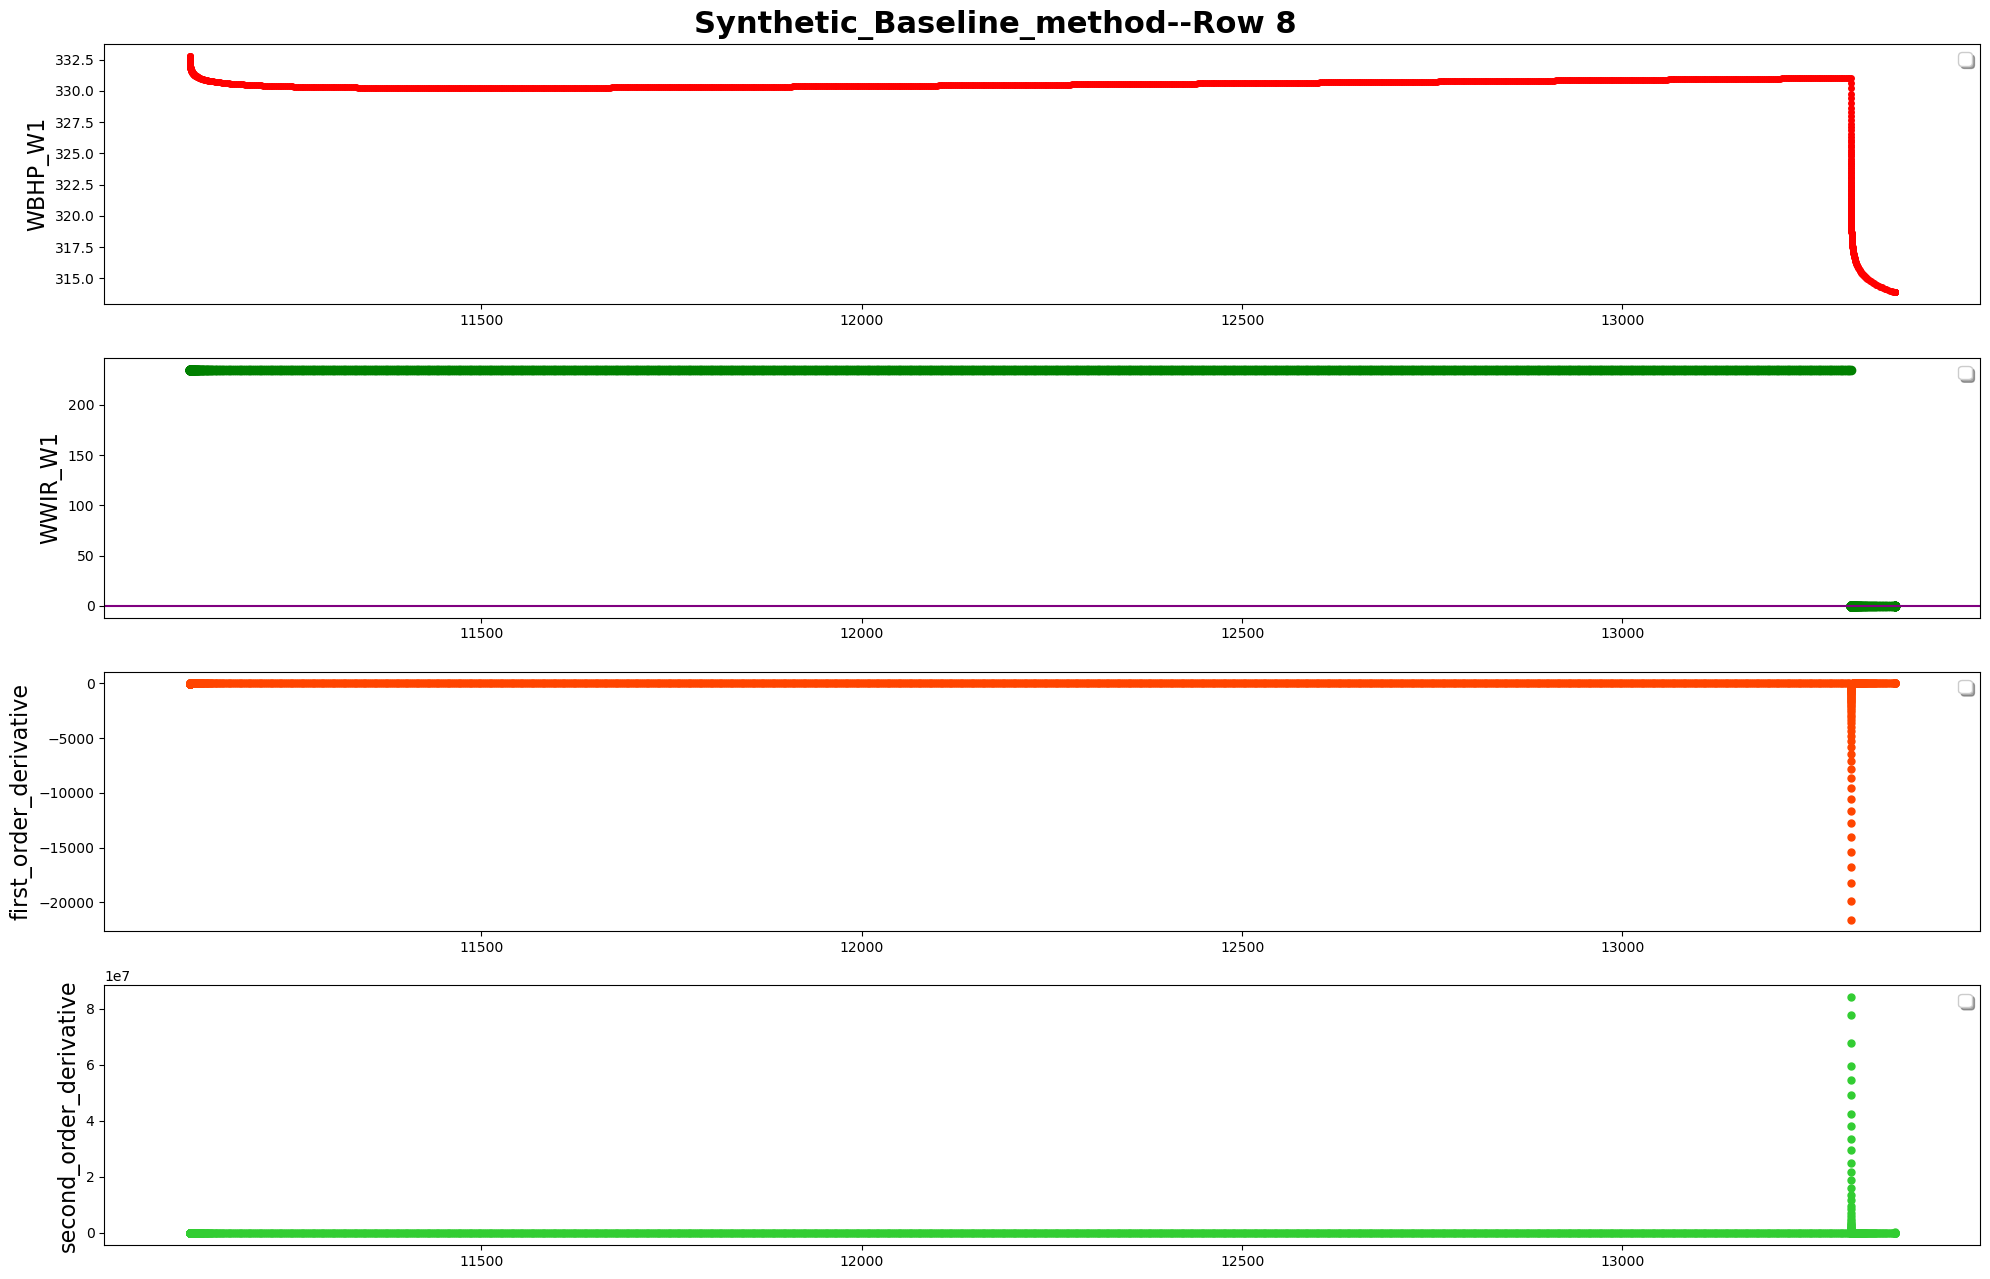

------row 9-----detected points:[9930, 10598]


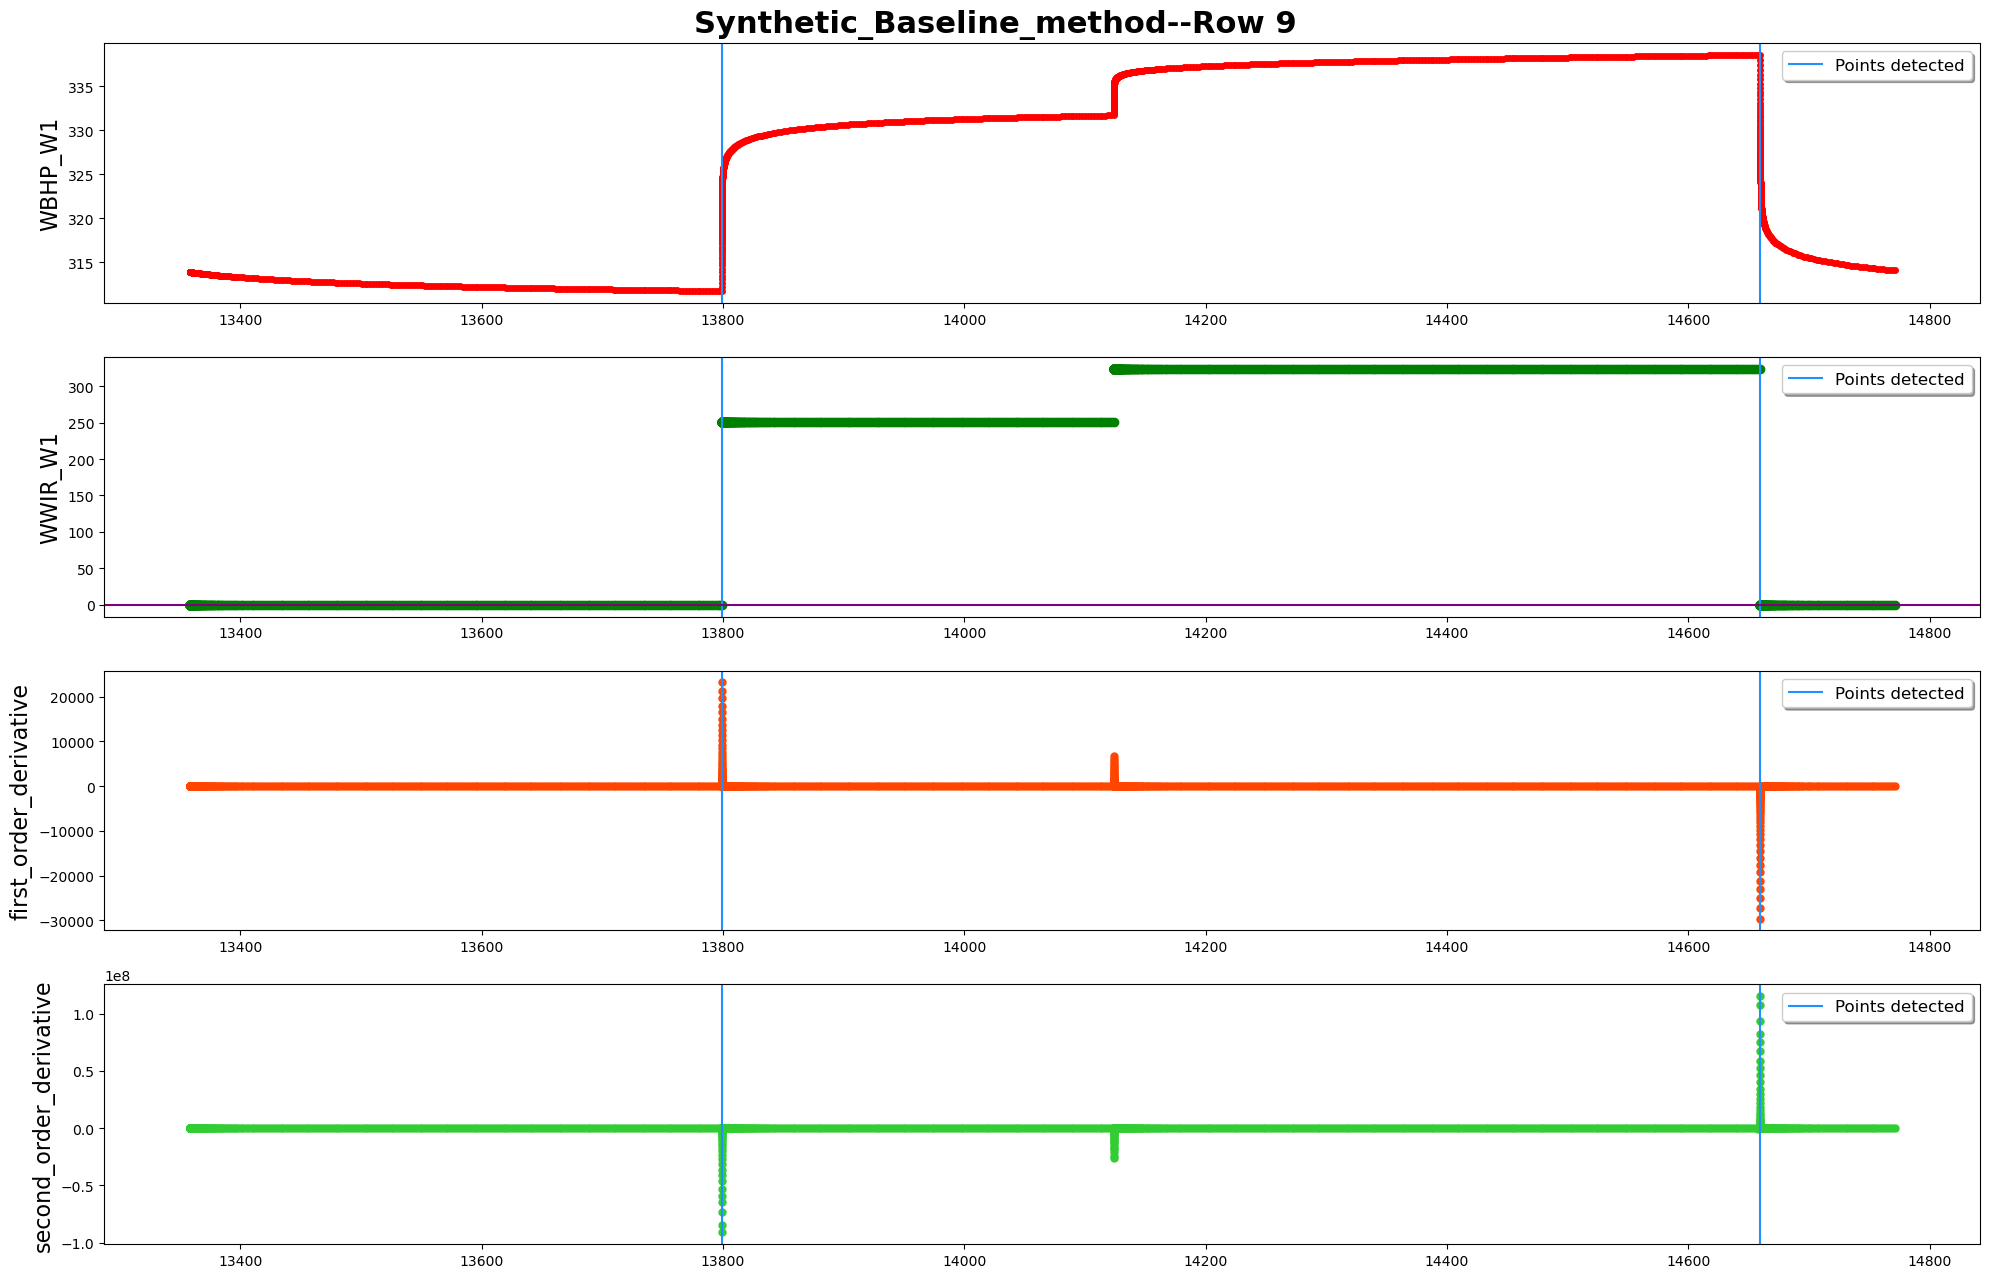

------row 10-----detected points:[11286]


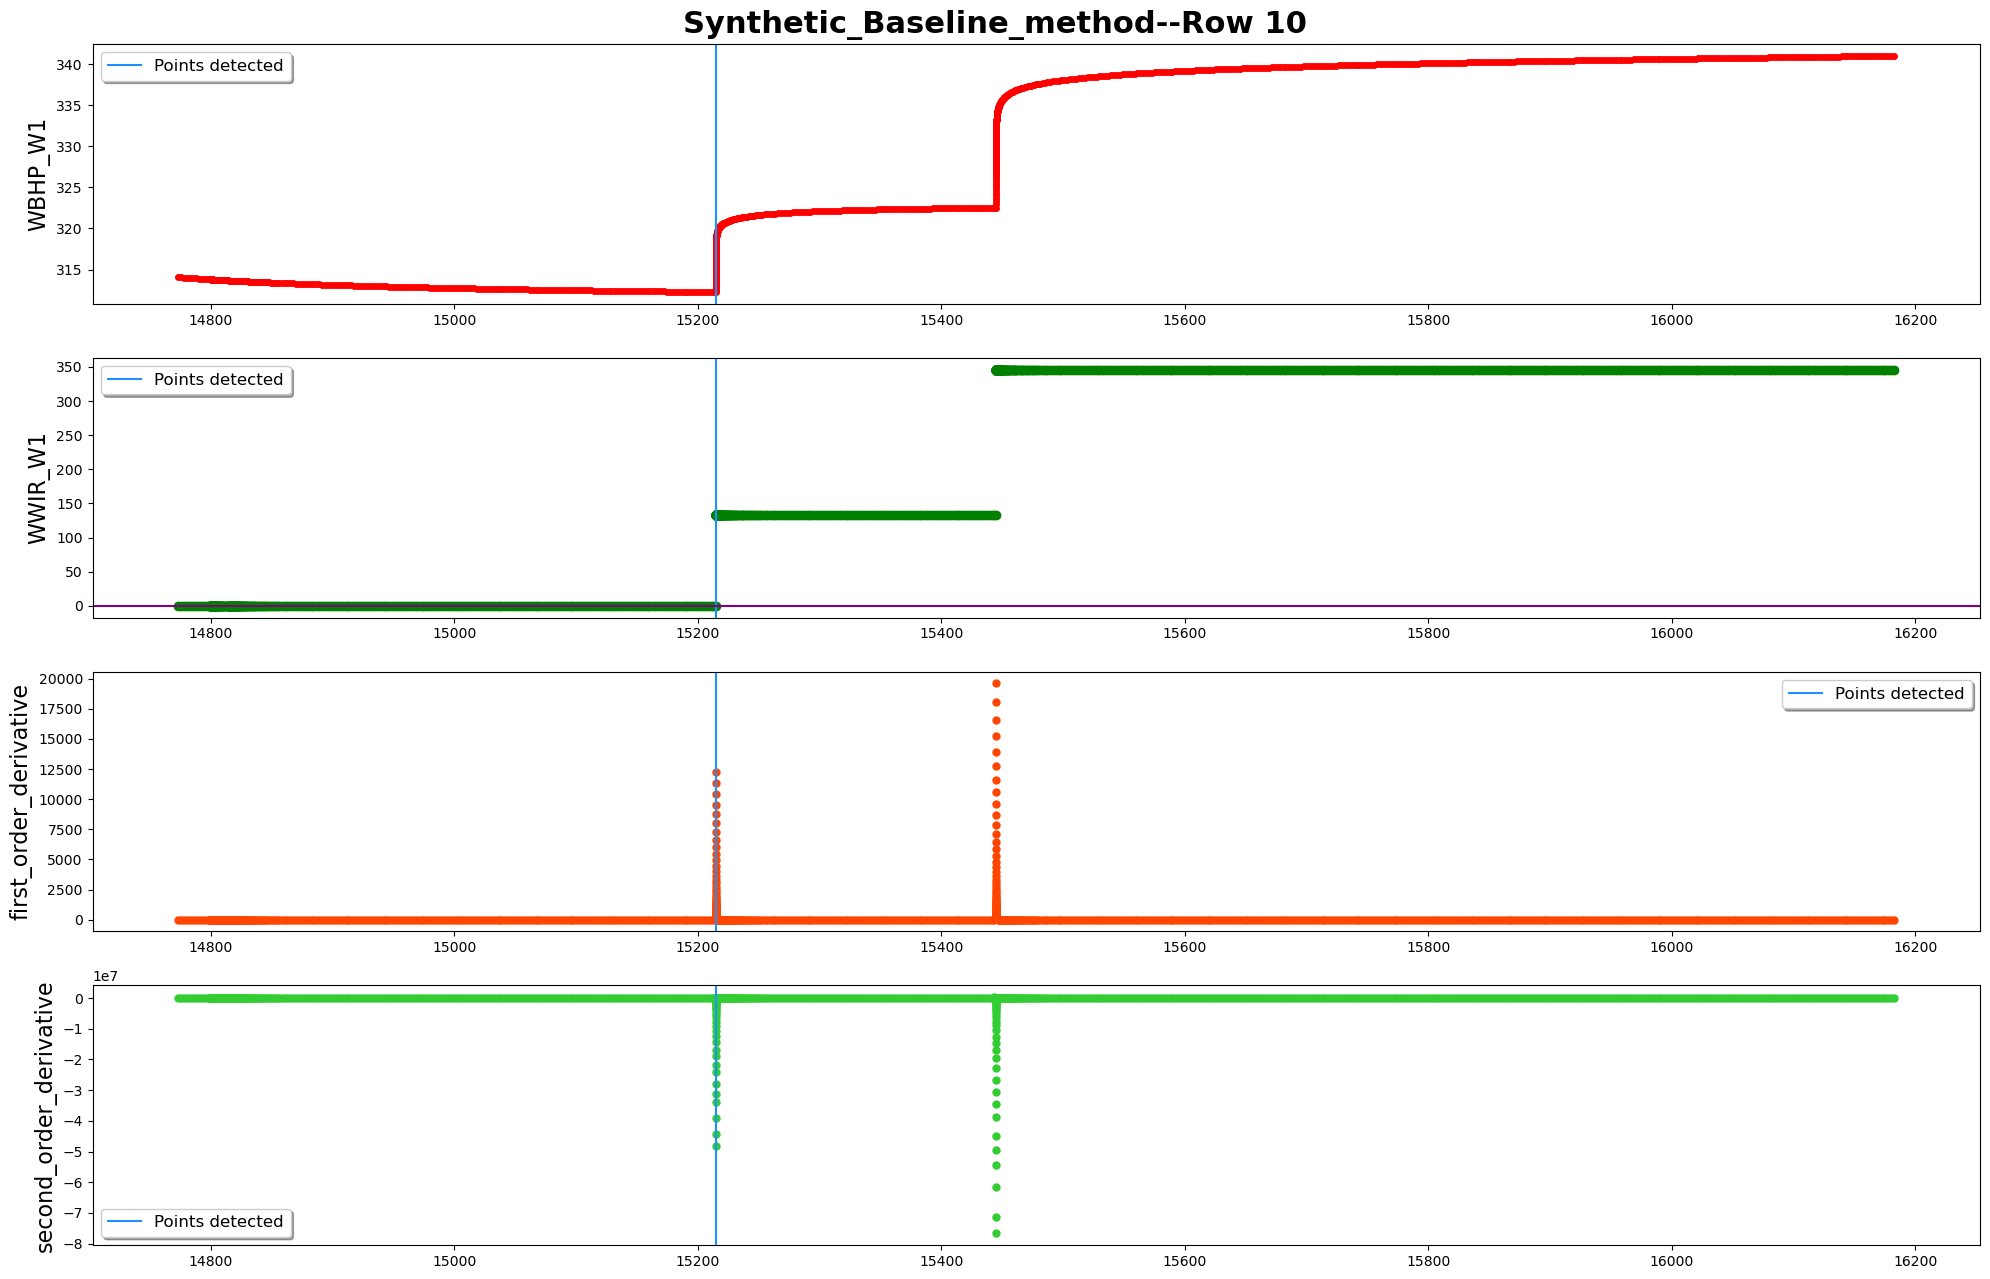

------row 11-----detected points:[12163, 12448, 12718, 13085]


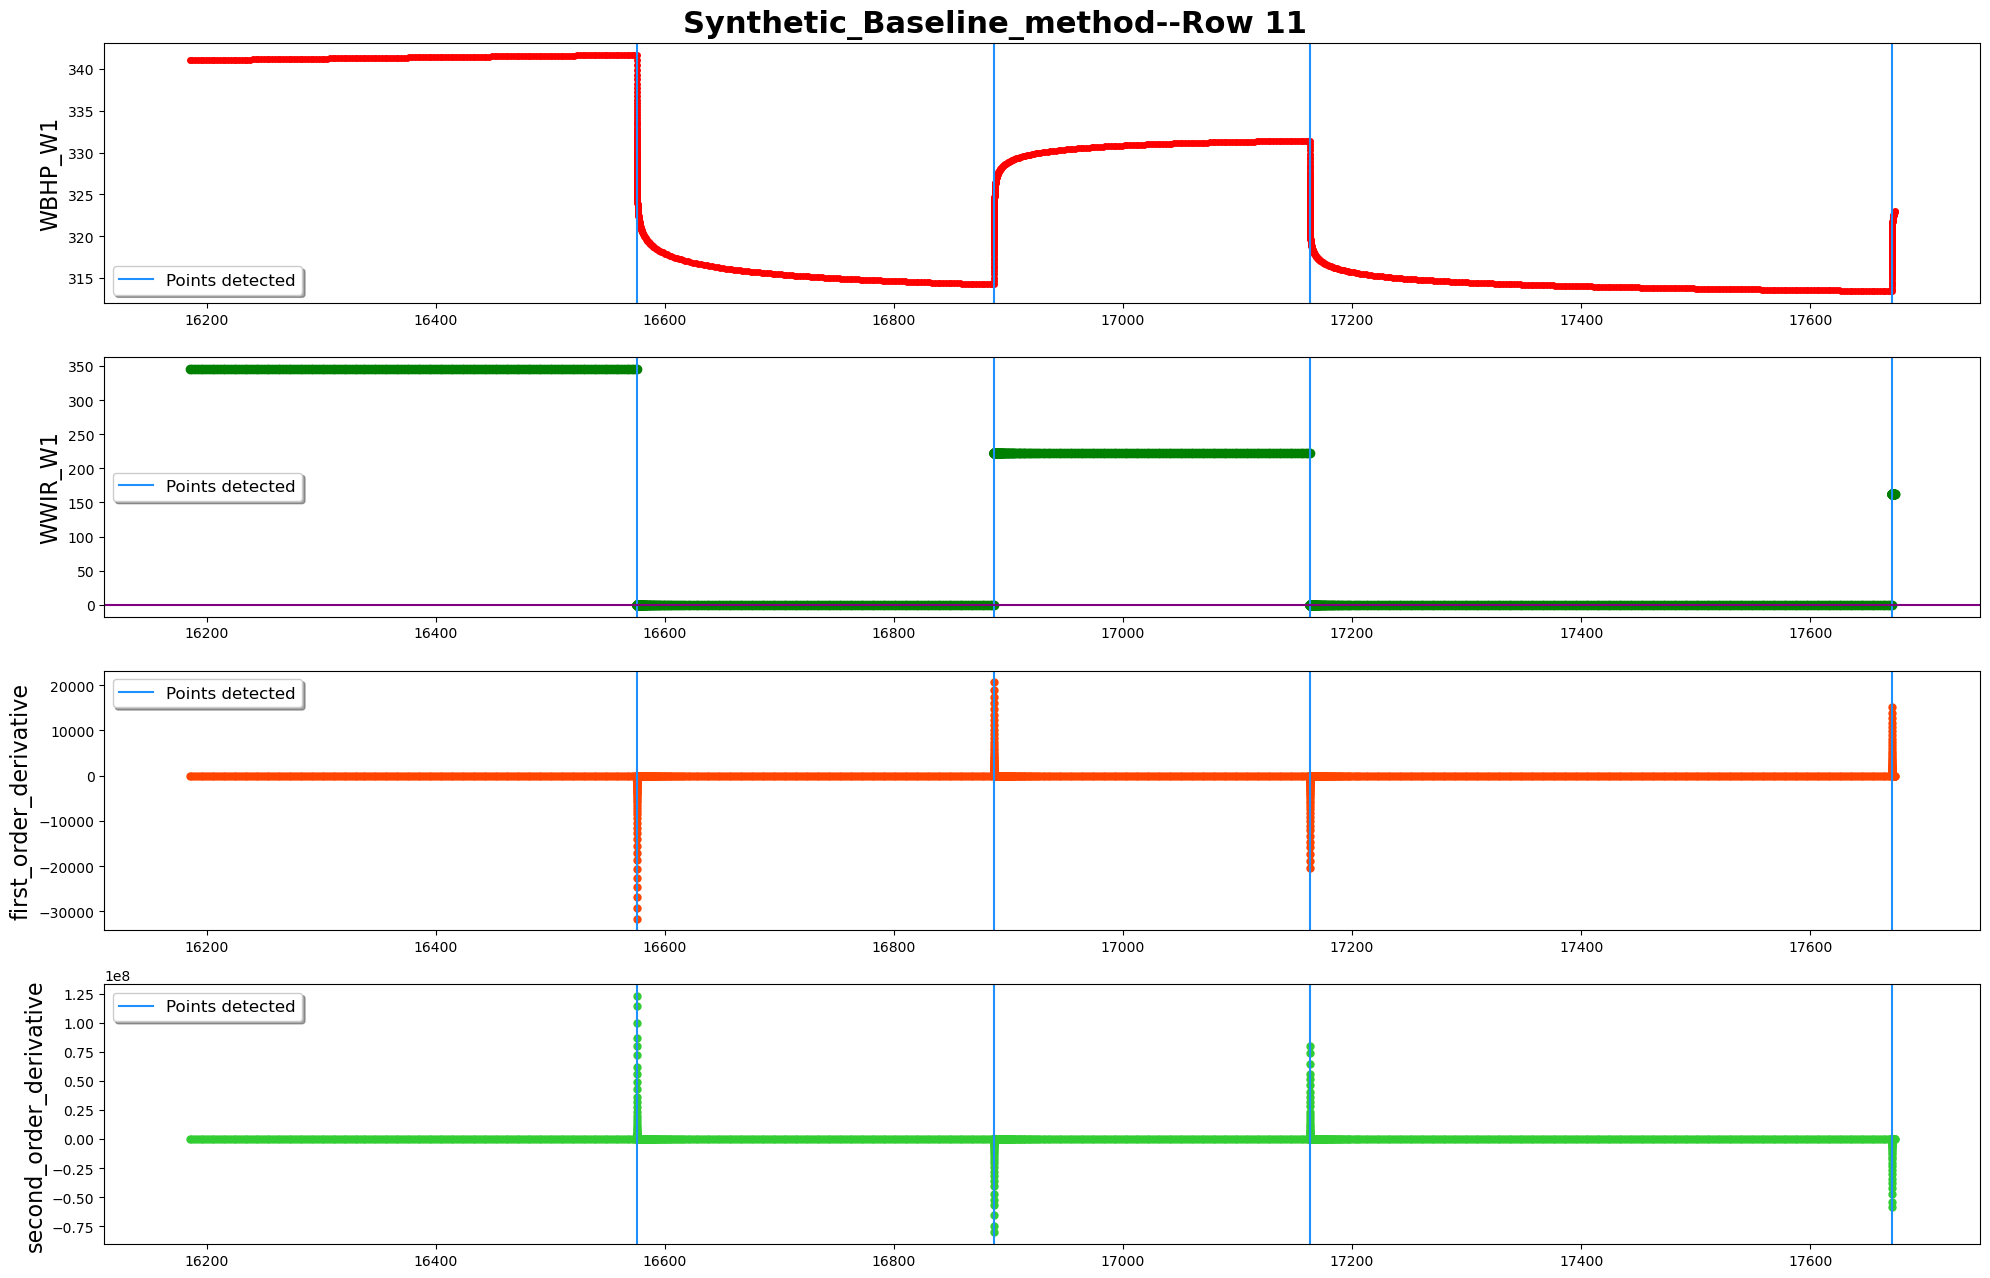

------row 12-----detected points:[14240]


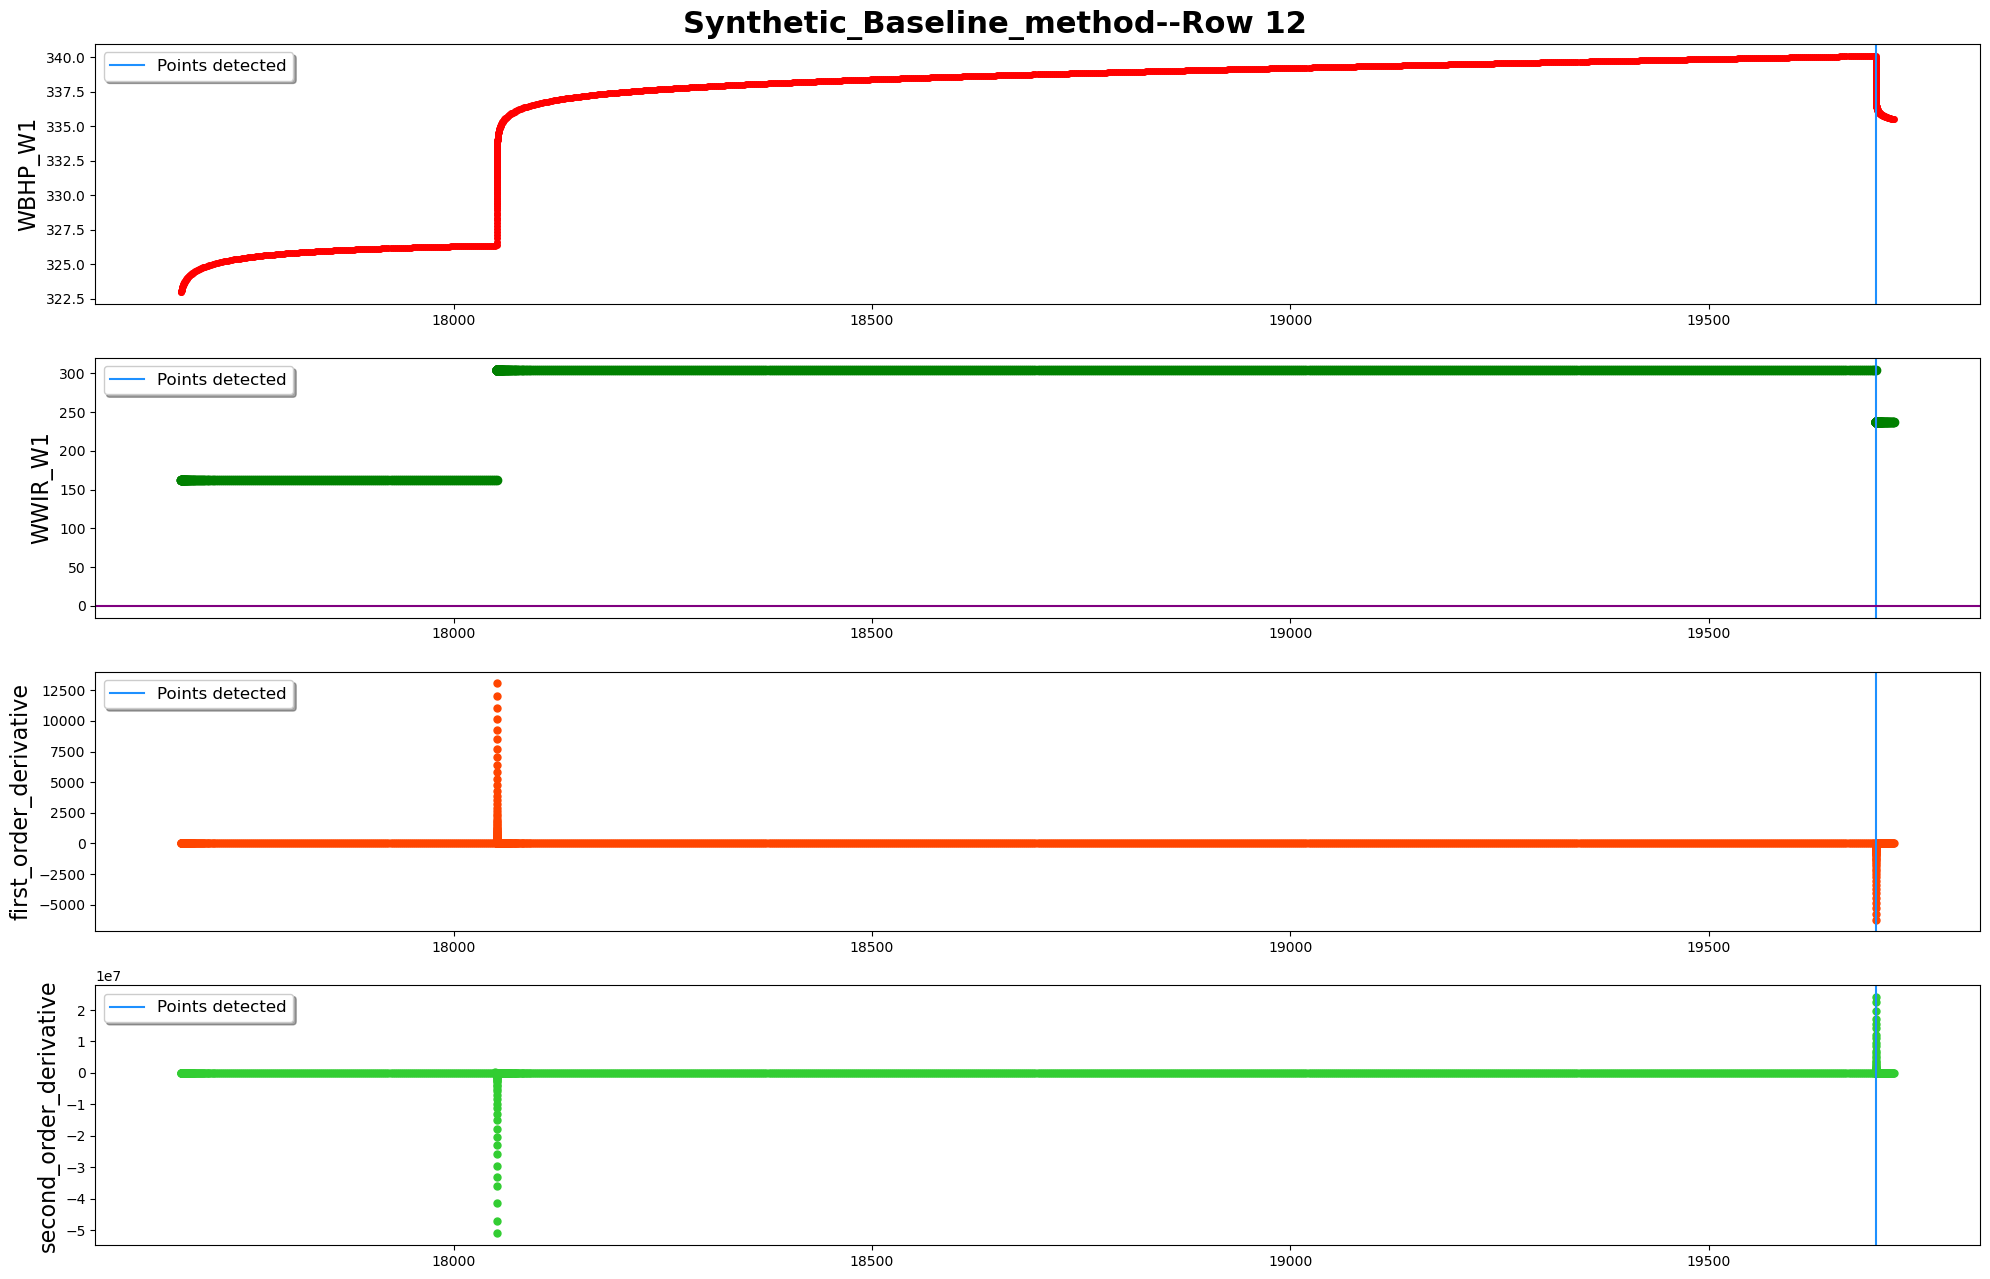

------row 13-----detected points:[15229, 15580]


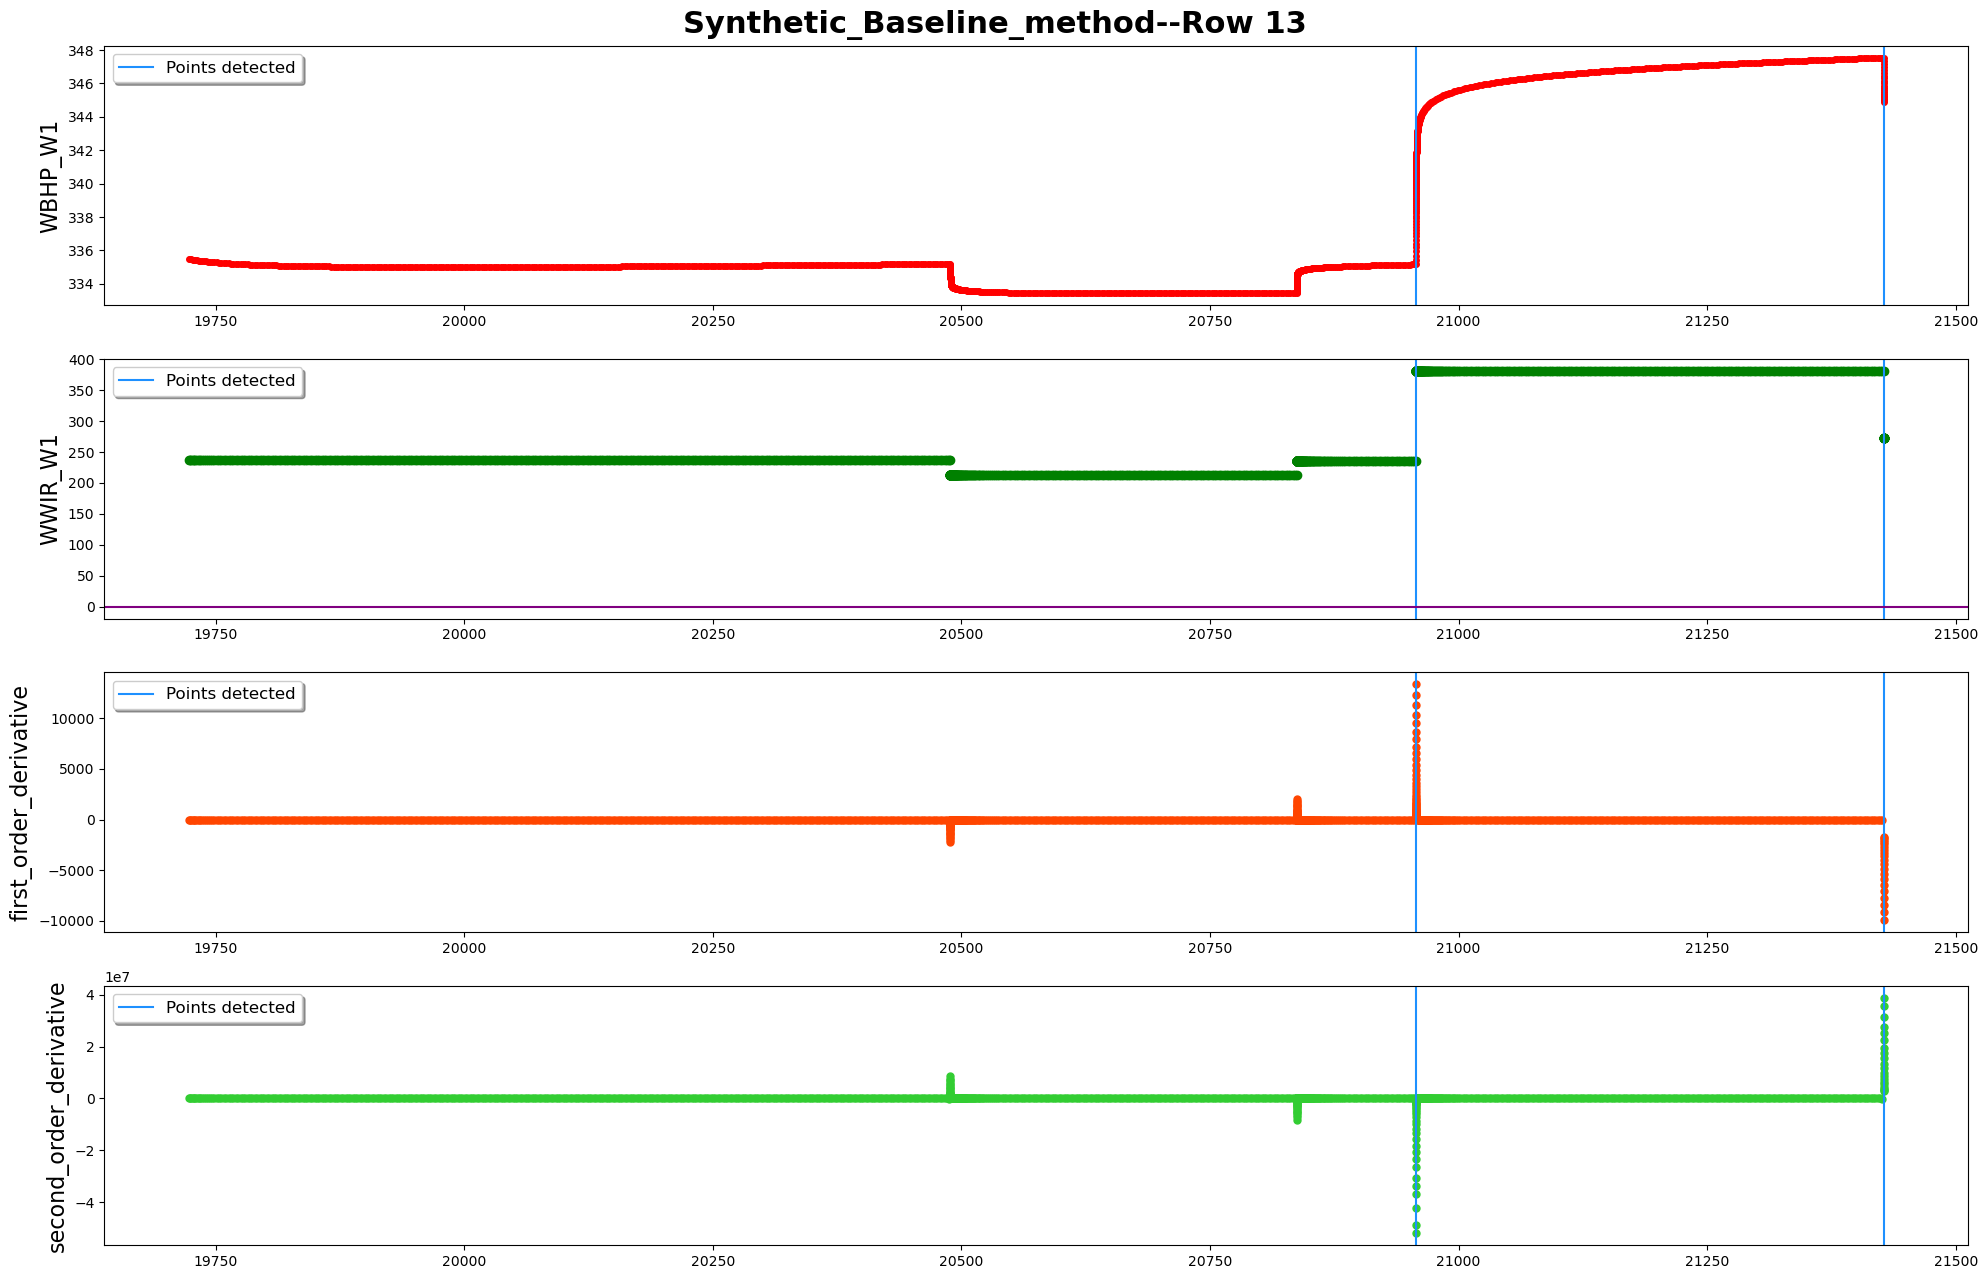

------row 14-----detected points:[16480]


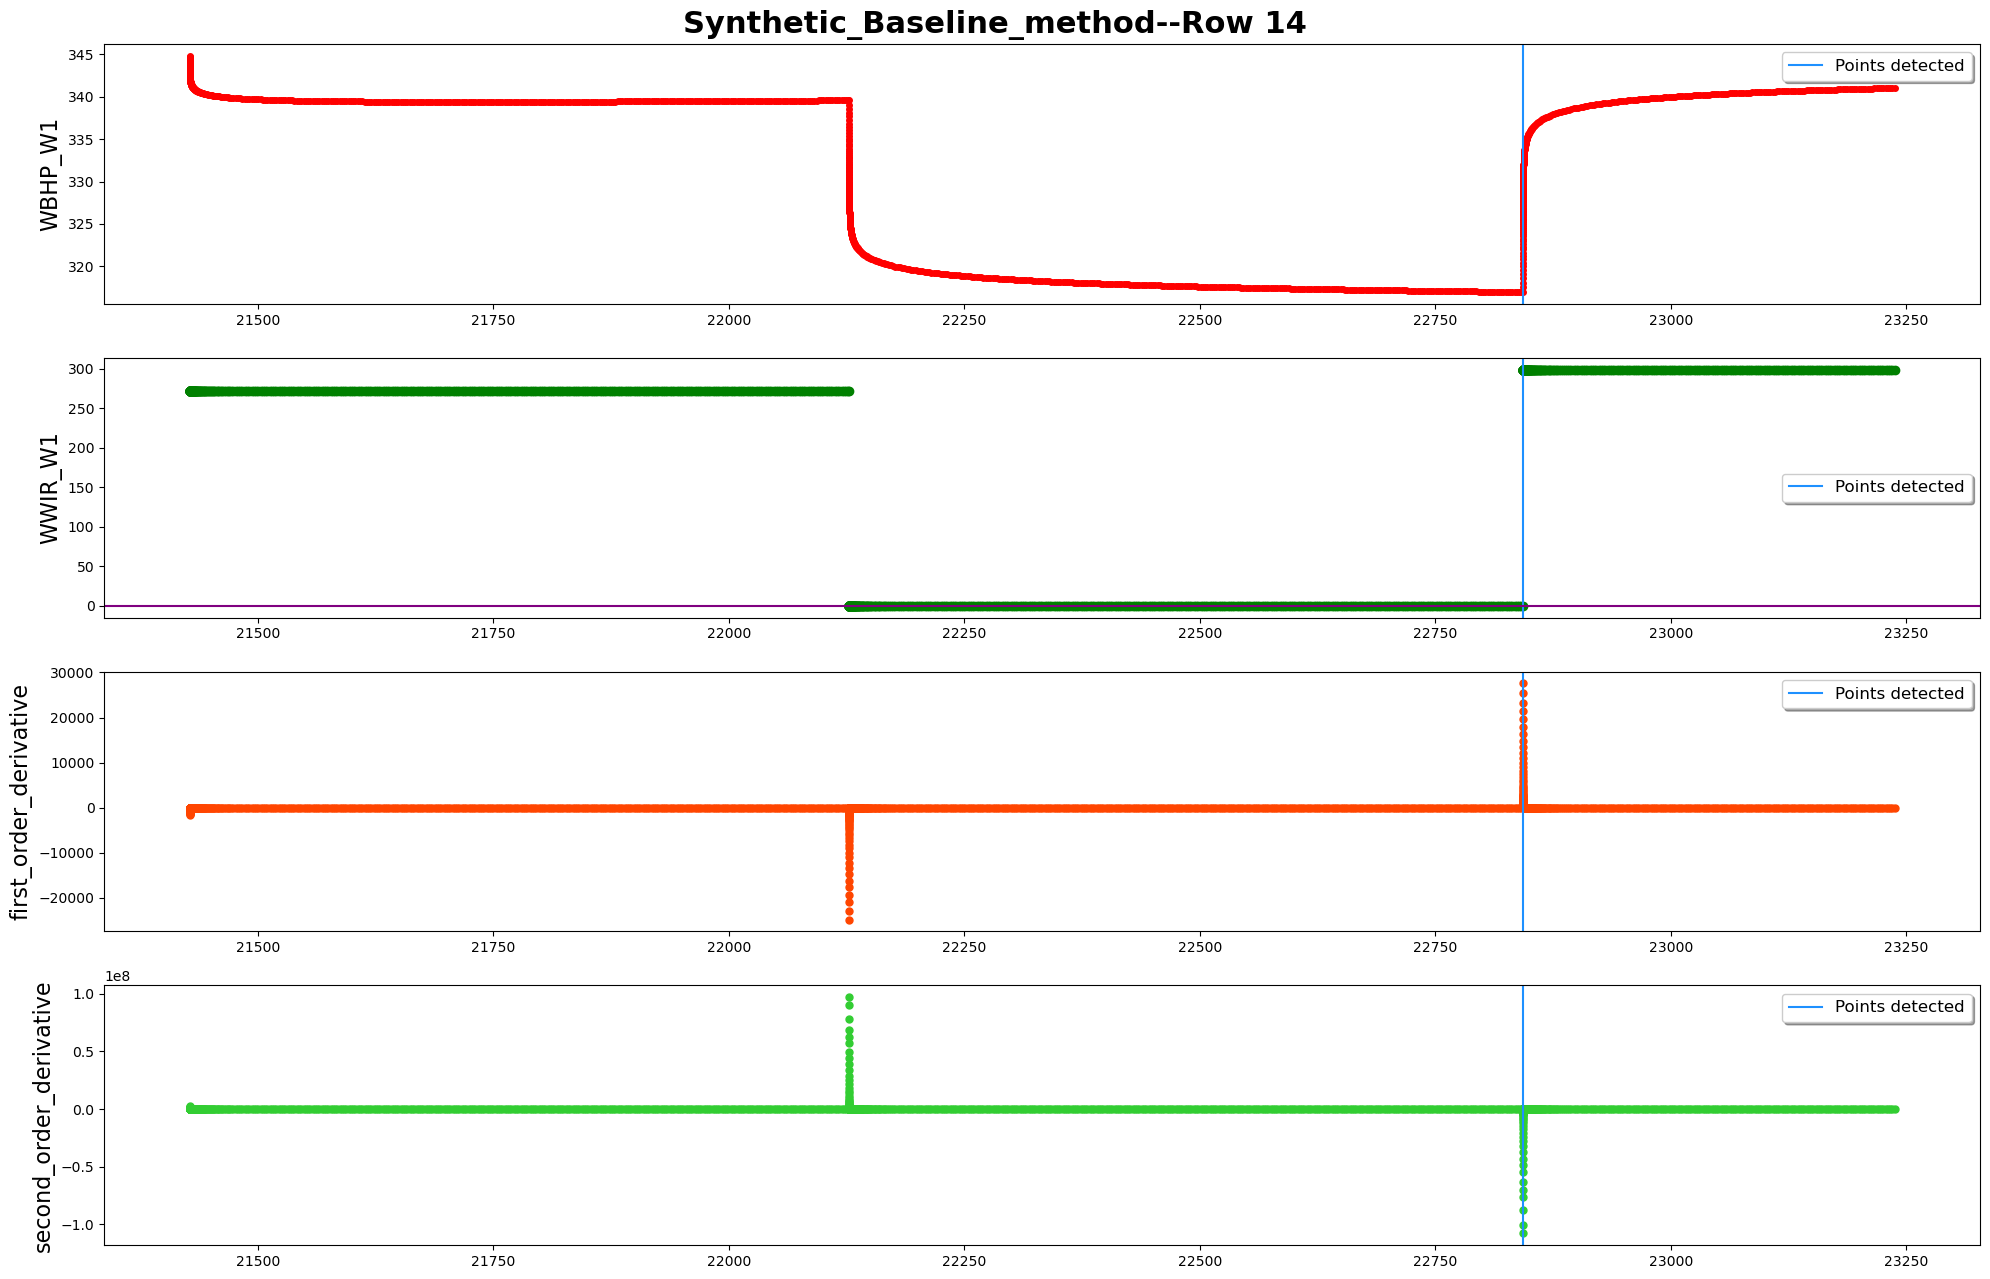

------row 15-----detected points:[]


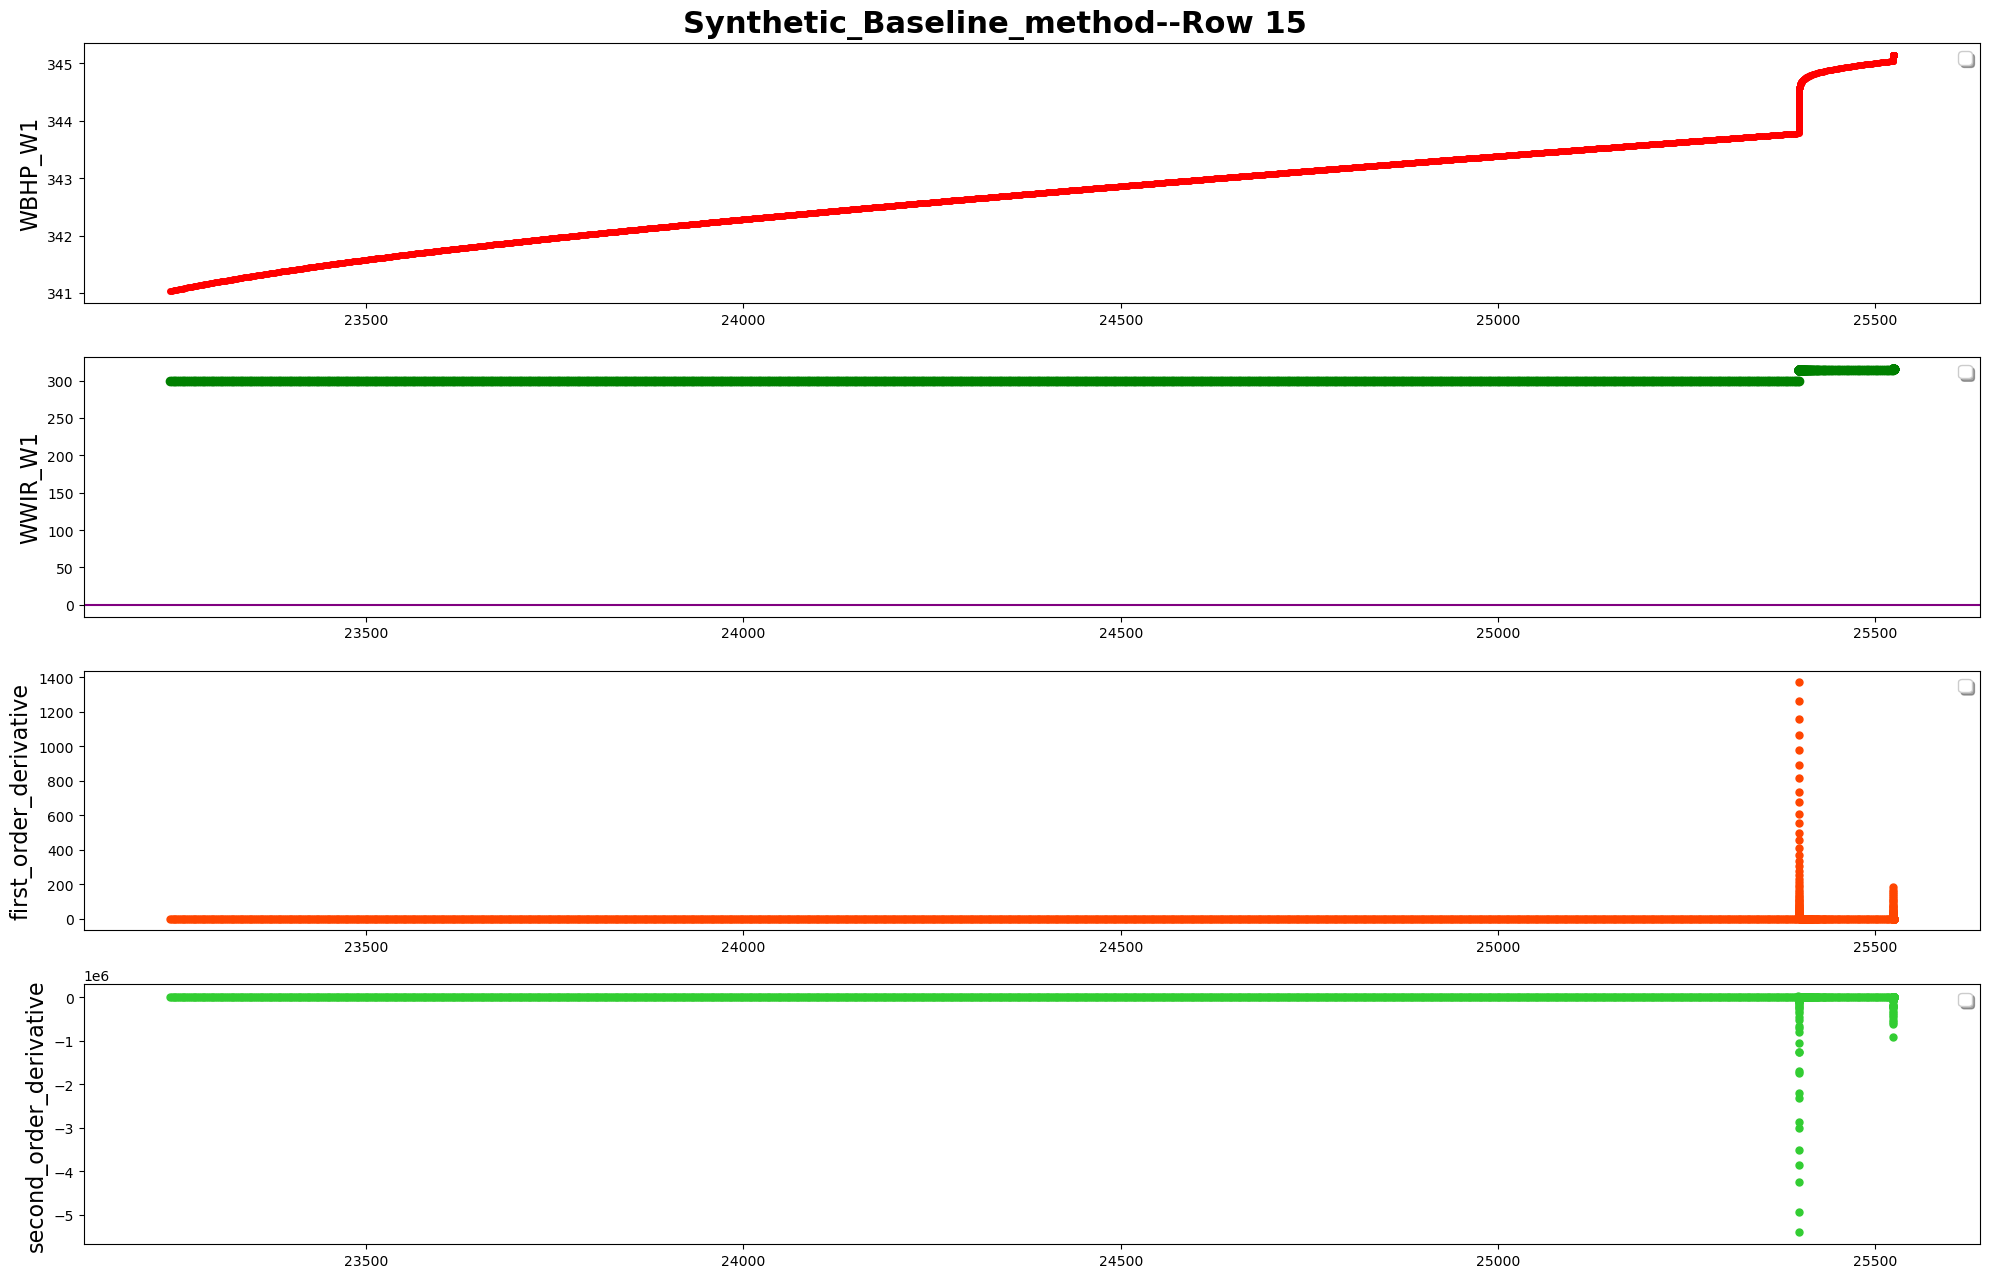

------row 16-----detected points:[18179]


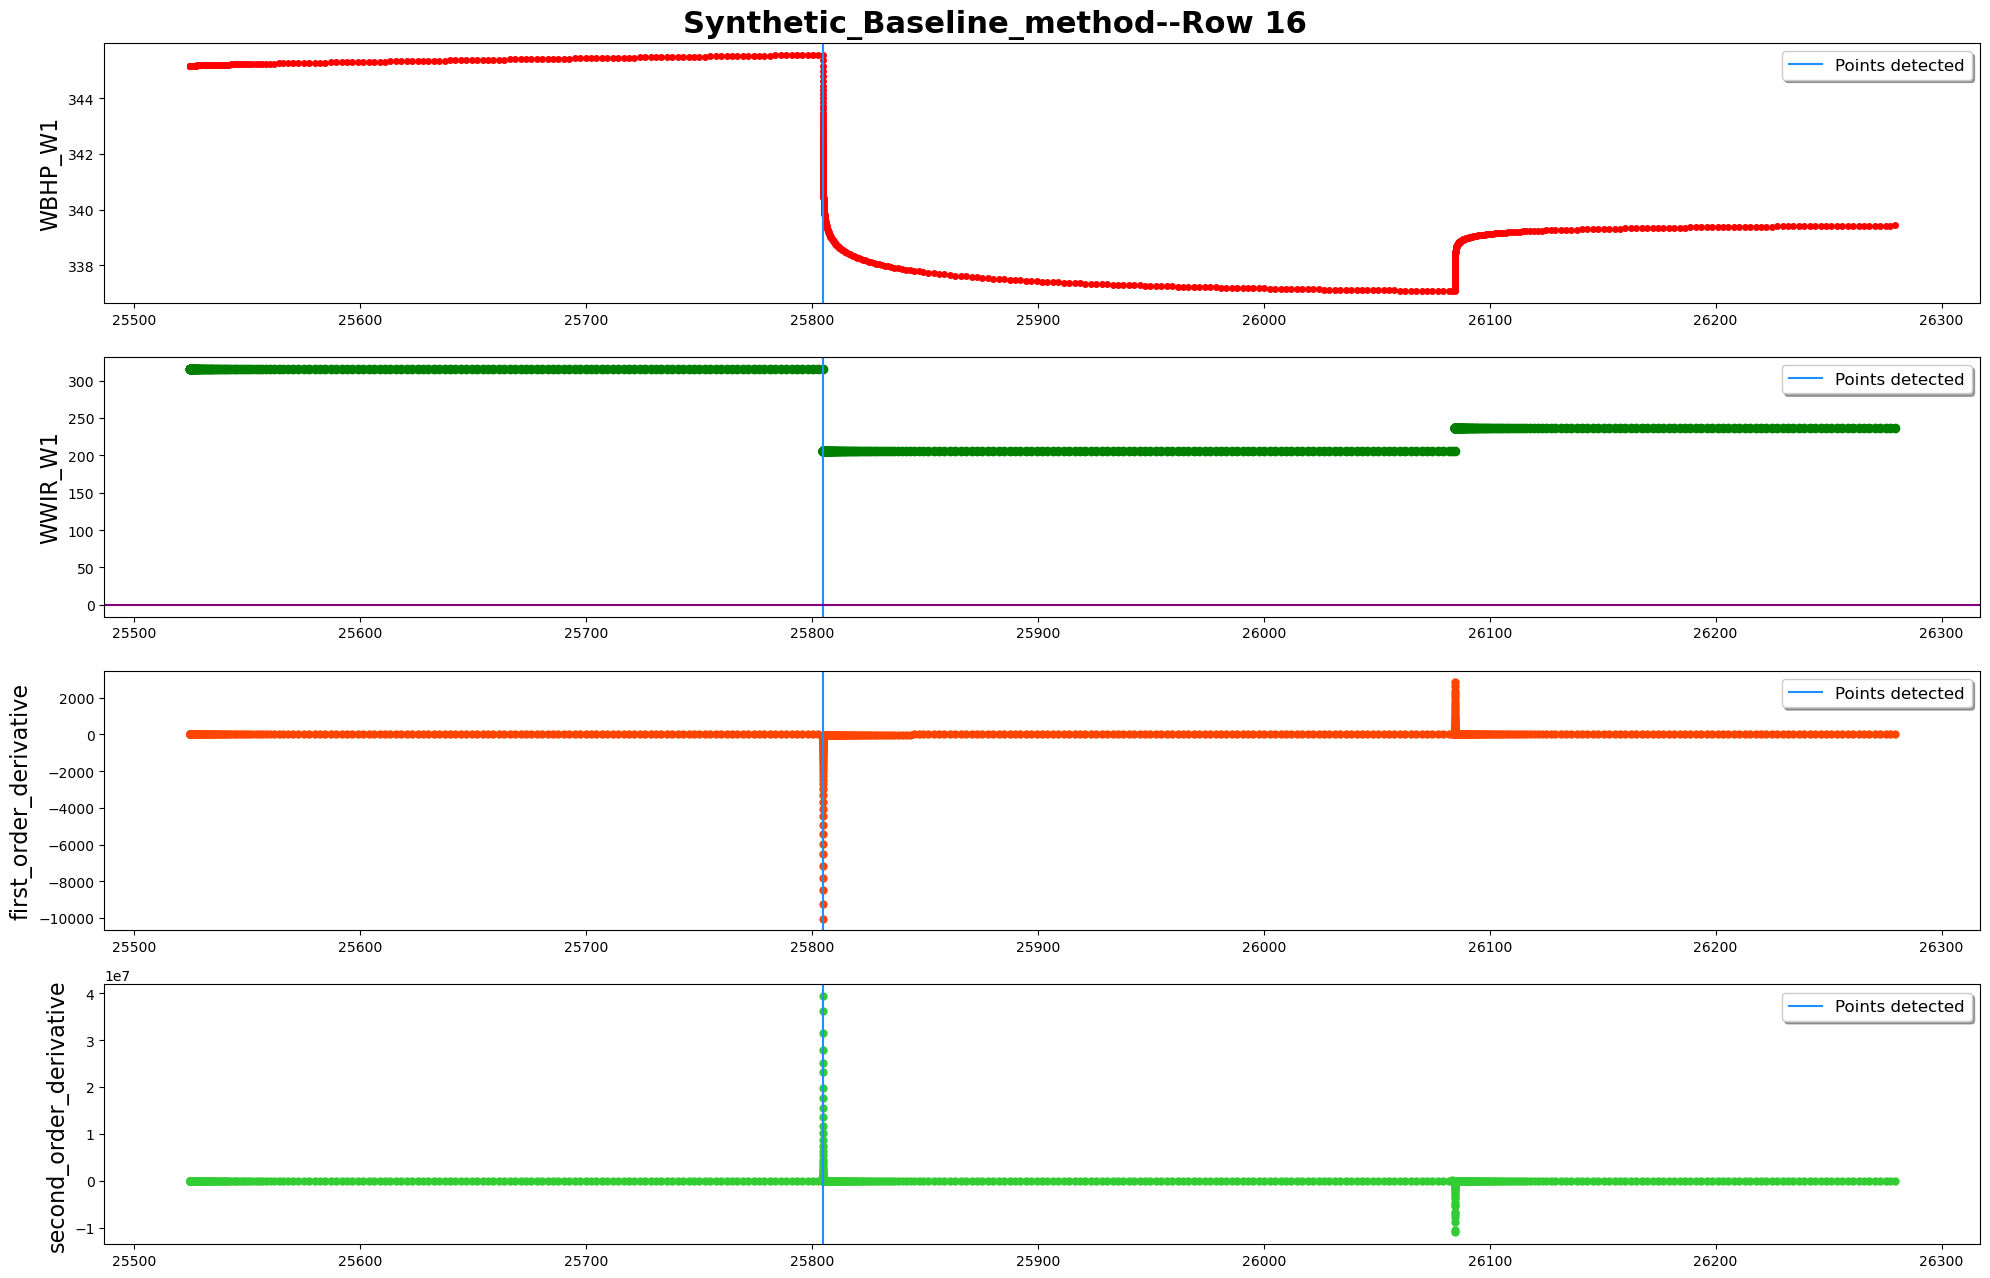

In [18]:
#baseline method
first_order_derivative=df["first_order_derivative"]
second_order_derivative=df["second_order_derivative"]
breakpoints_detected_baseline2=detect_breakpoints_2(first_order_derivative,second_order_derivative)
print("len(breakpoints_detected)",len(breakpoints_detected_baseline2))

#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method_Alexey.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(df,
          df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

## detect using baseline method (detect_breakpoints_3) 

In [19]:
#baseline method
noise_threshold=2
breakpoints_detected_baseline2=detect_breakpoints_3(first_order_derivative,second_order_derivative,noise_threshold)
print("len(breakpoints_detected)",len(breakpoints_detected_baseline2))

1970.979394643047 6843835.758885524
len(breakpoints_detected) 46


---initializing...
---plotting...
No ground truth defined


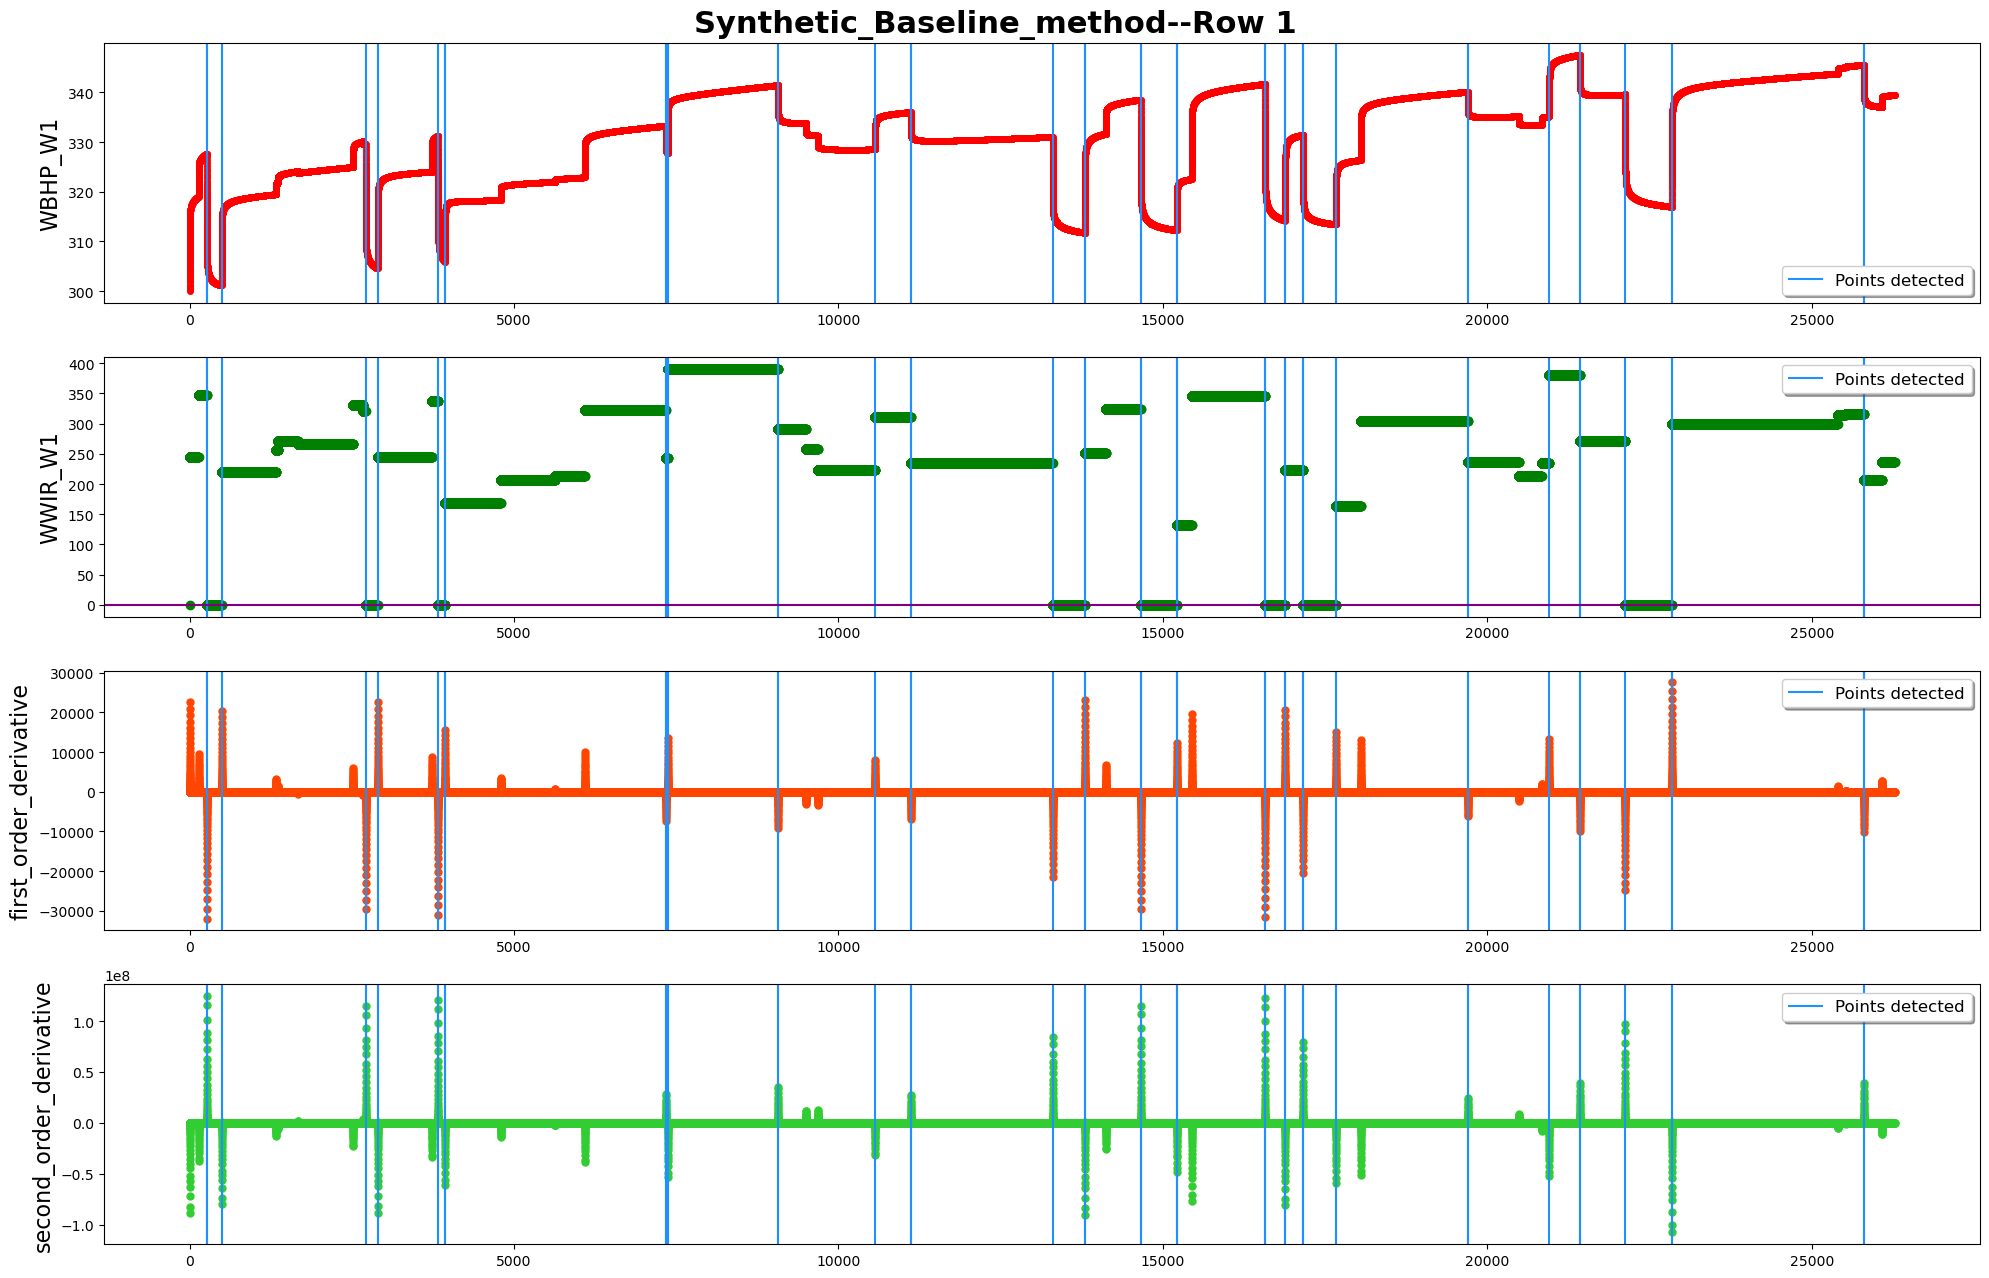

detected 46 points as breakpoints
The plot is devided into 16 rows
------row 1-----detected points:[421, 422, 672, 673]


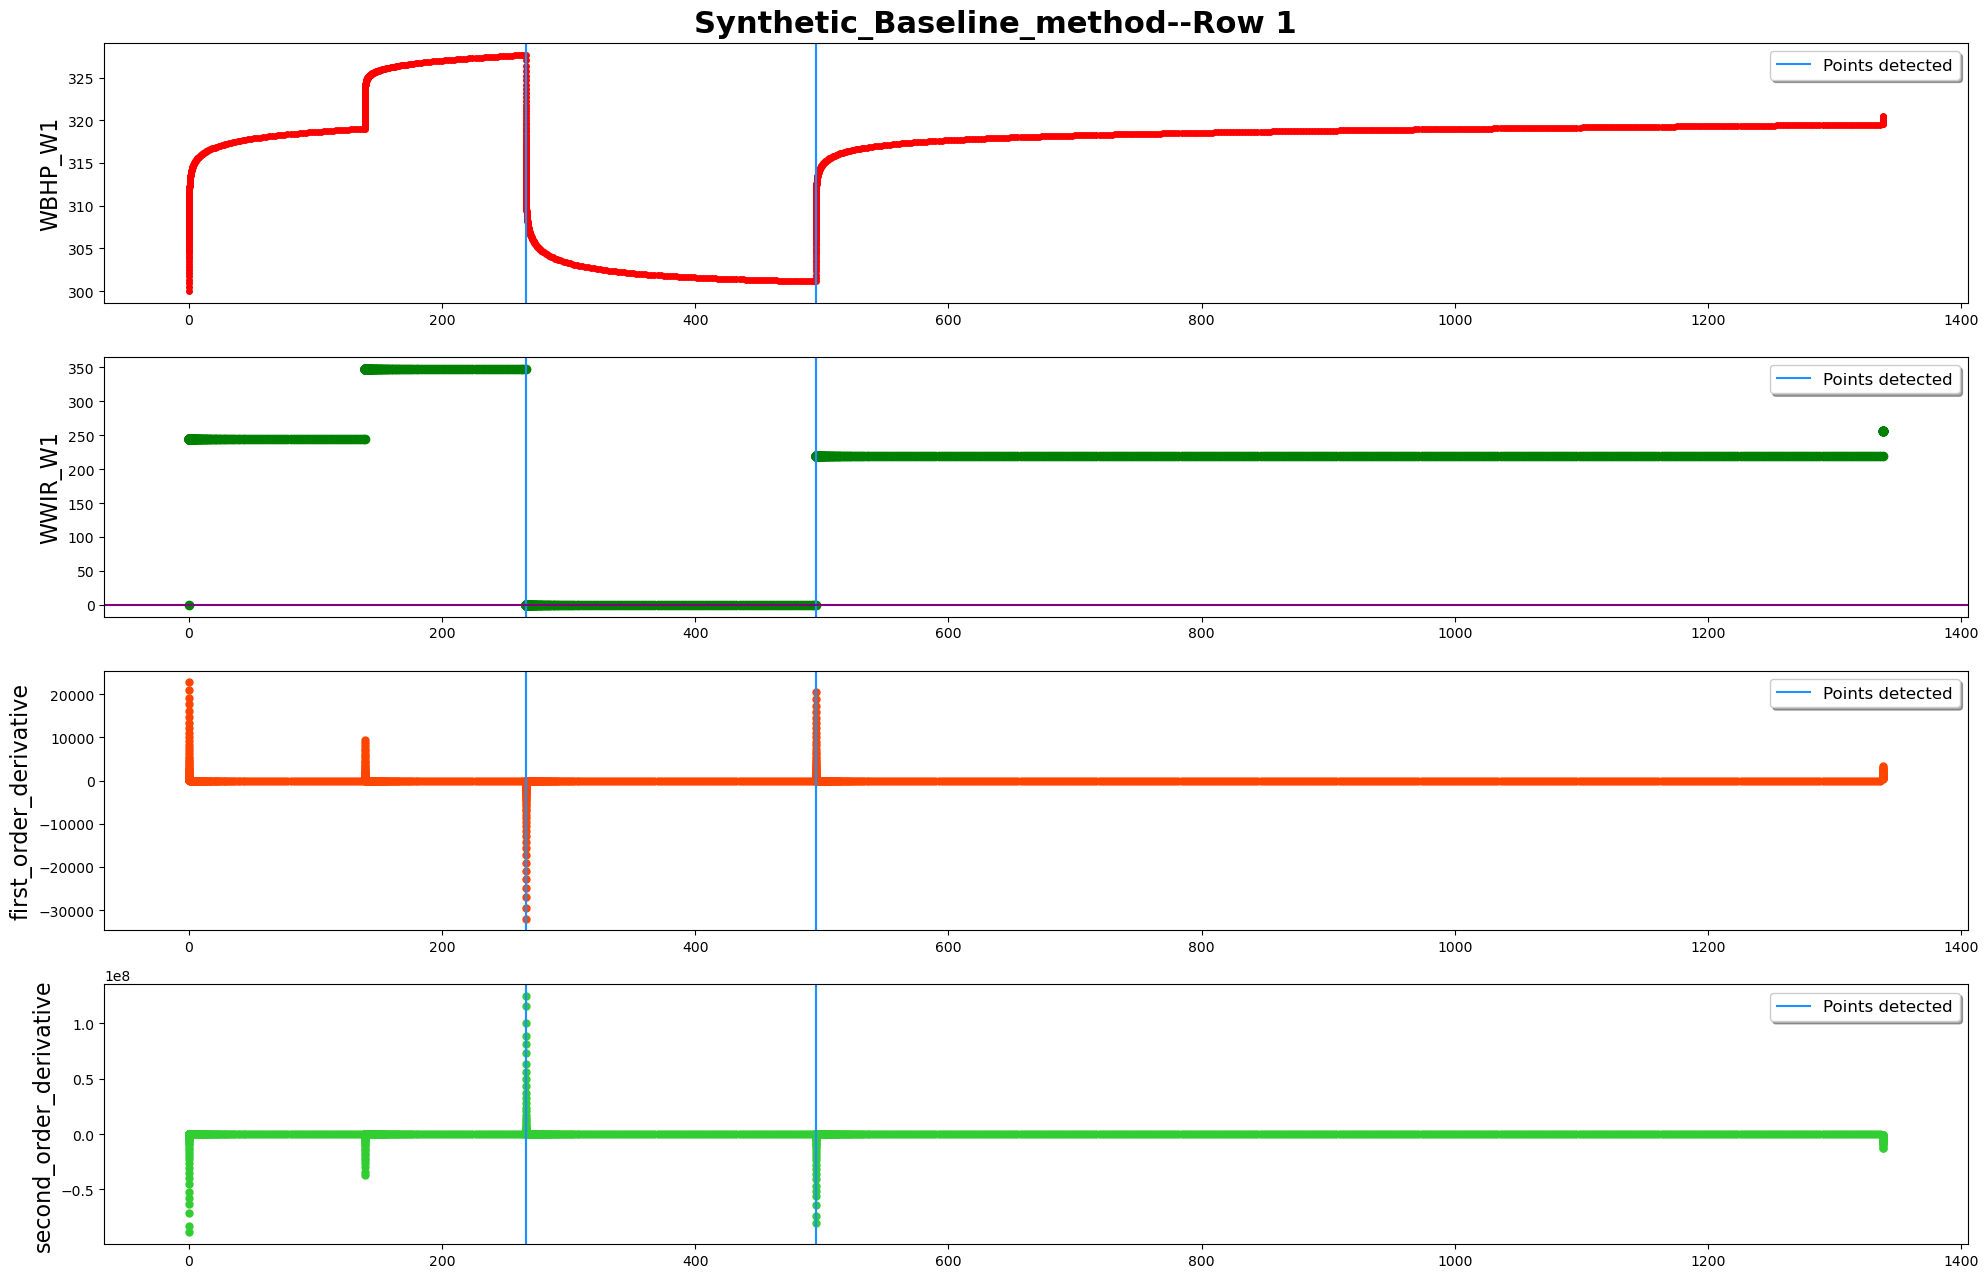

------row 2-----detected points:[]


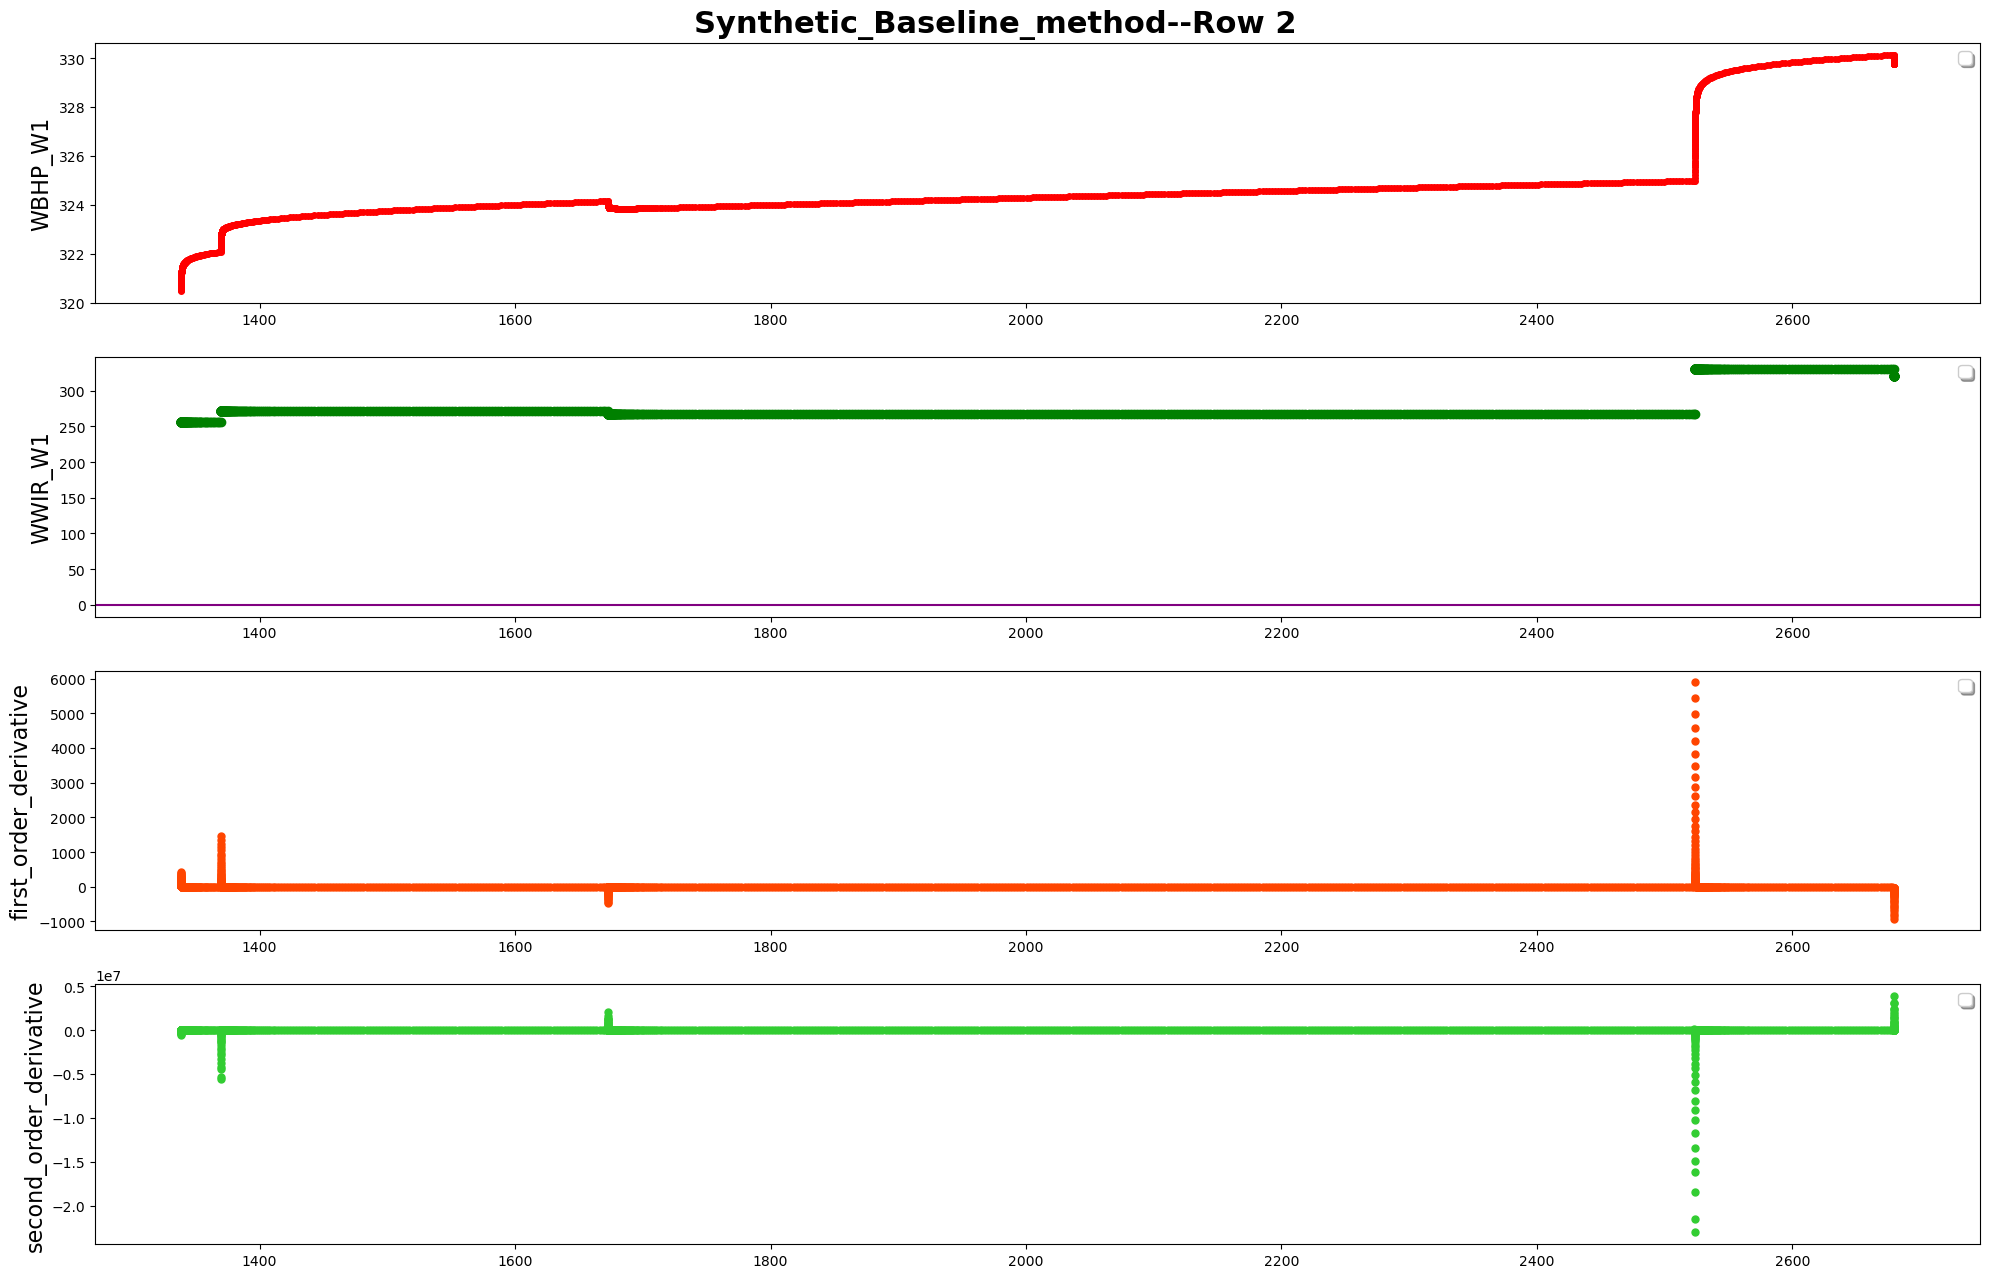

------row 3-----detected points:[2522, 2523, 2910, 2911]


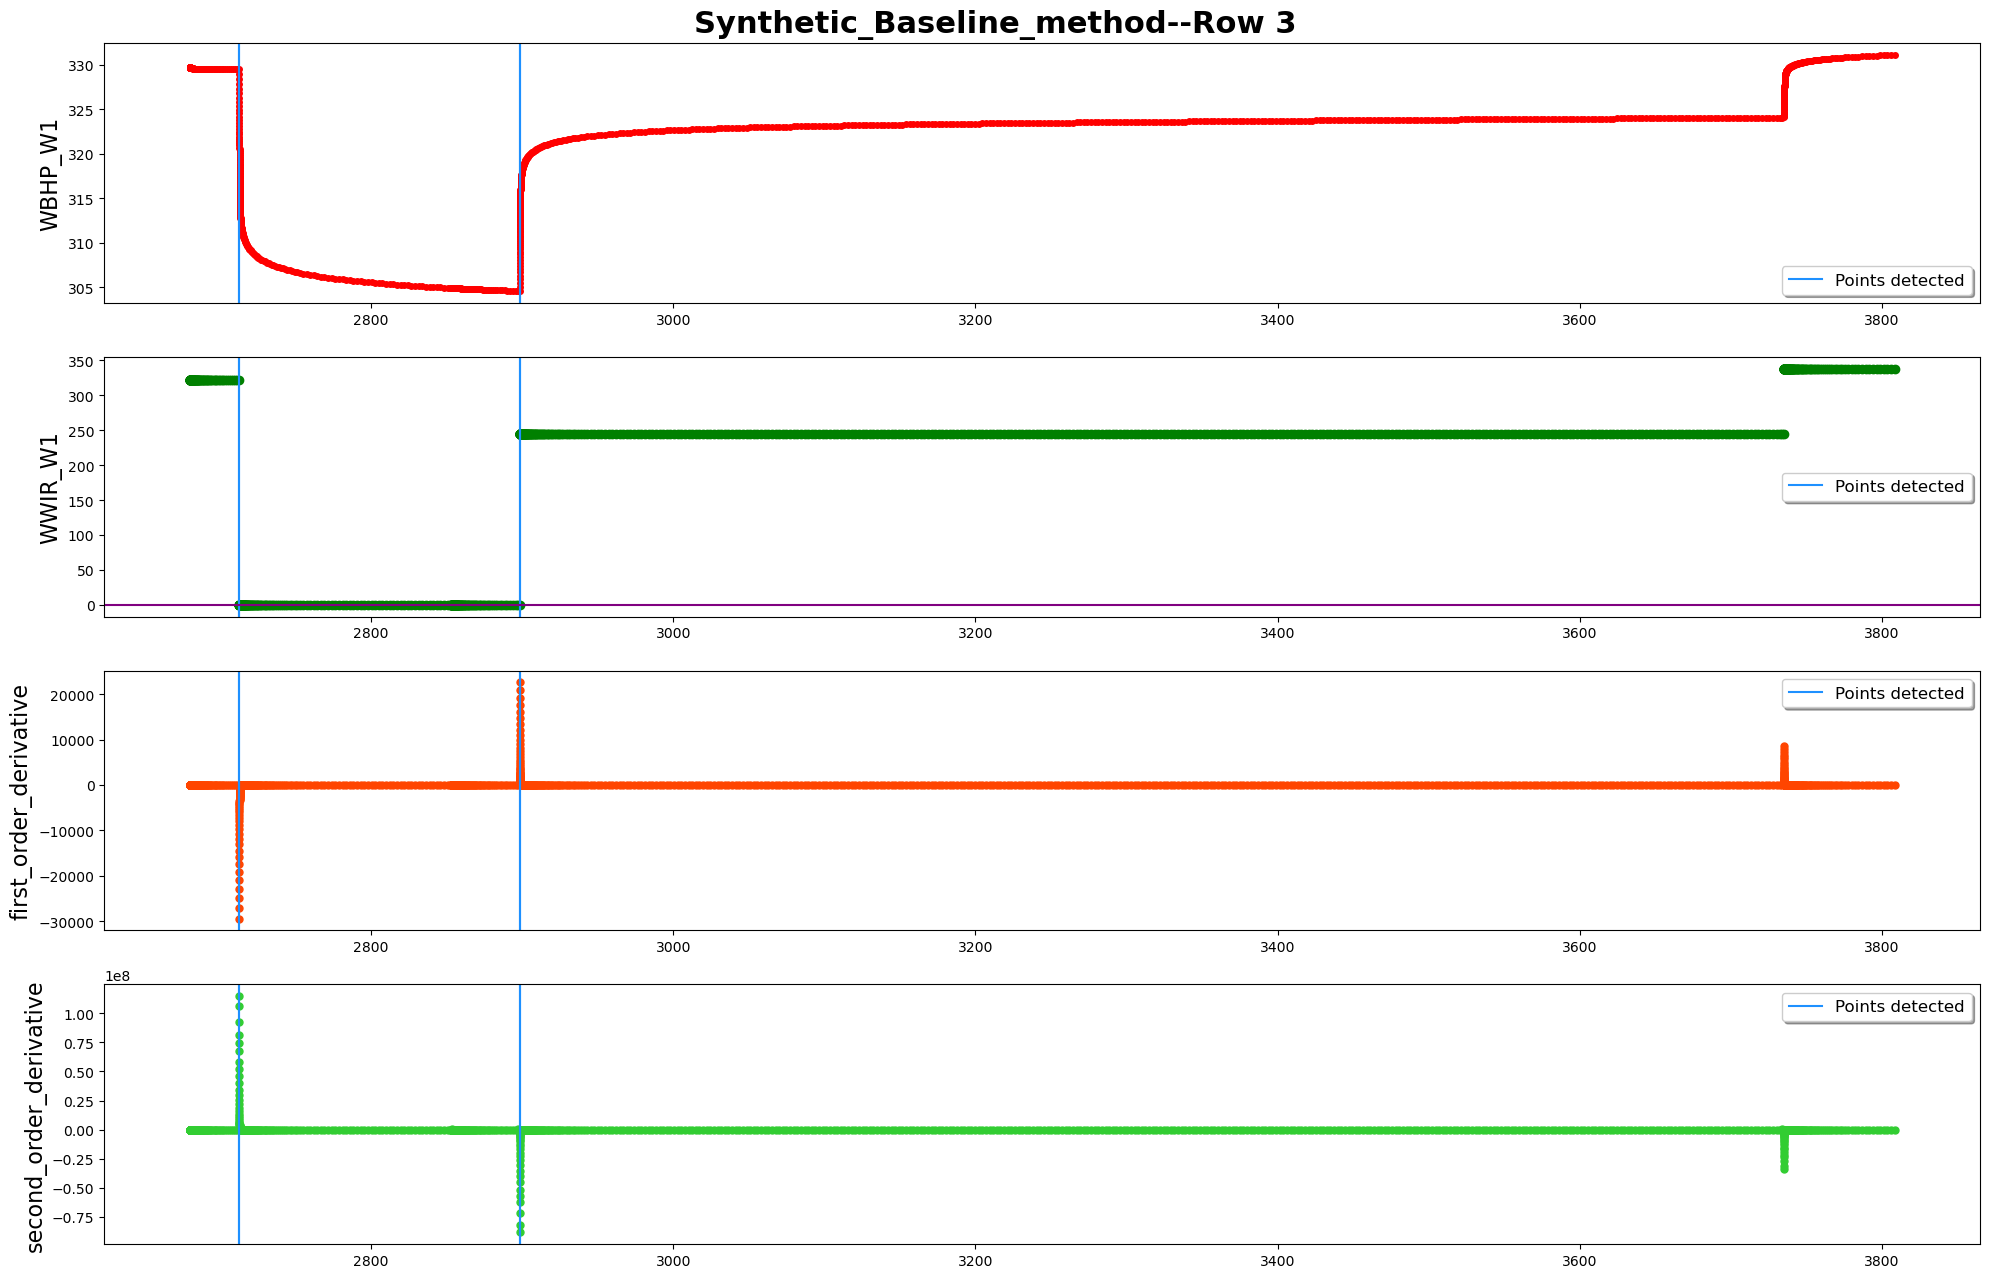

------row 4-----detected points:[3609, 3610, 3810, 3811]


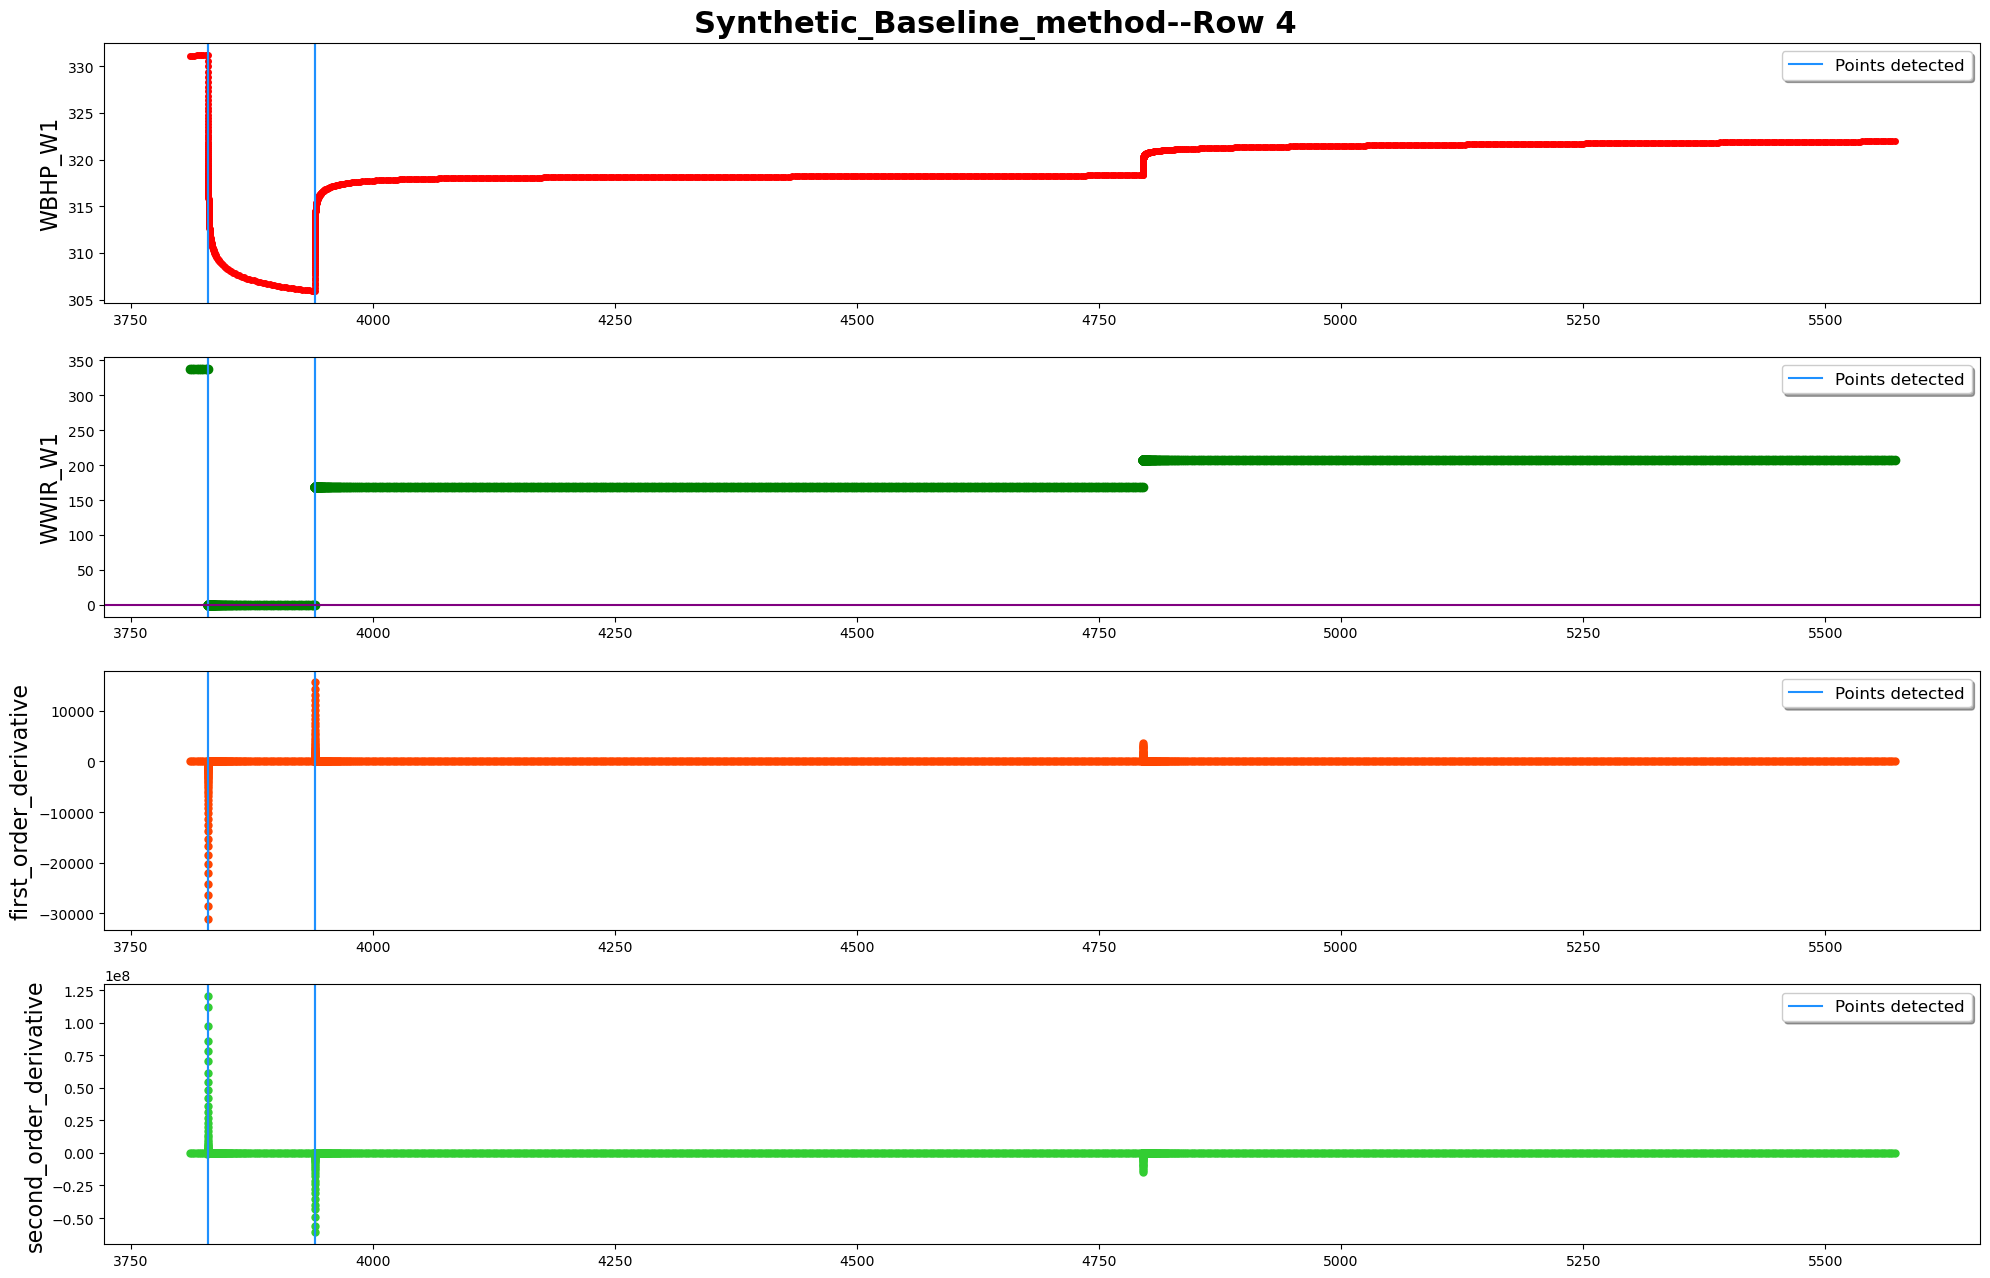

------row 5-----detected points:[5845, 5846]


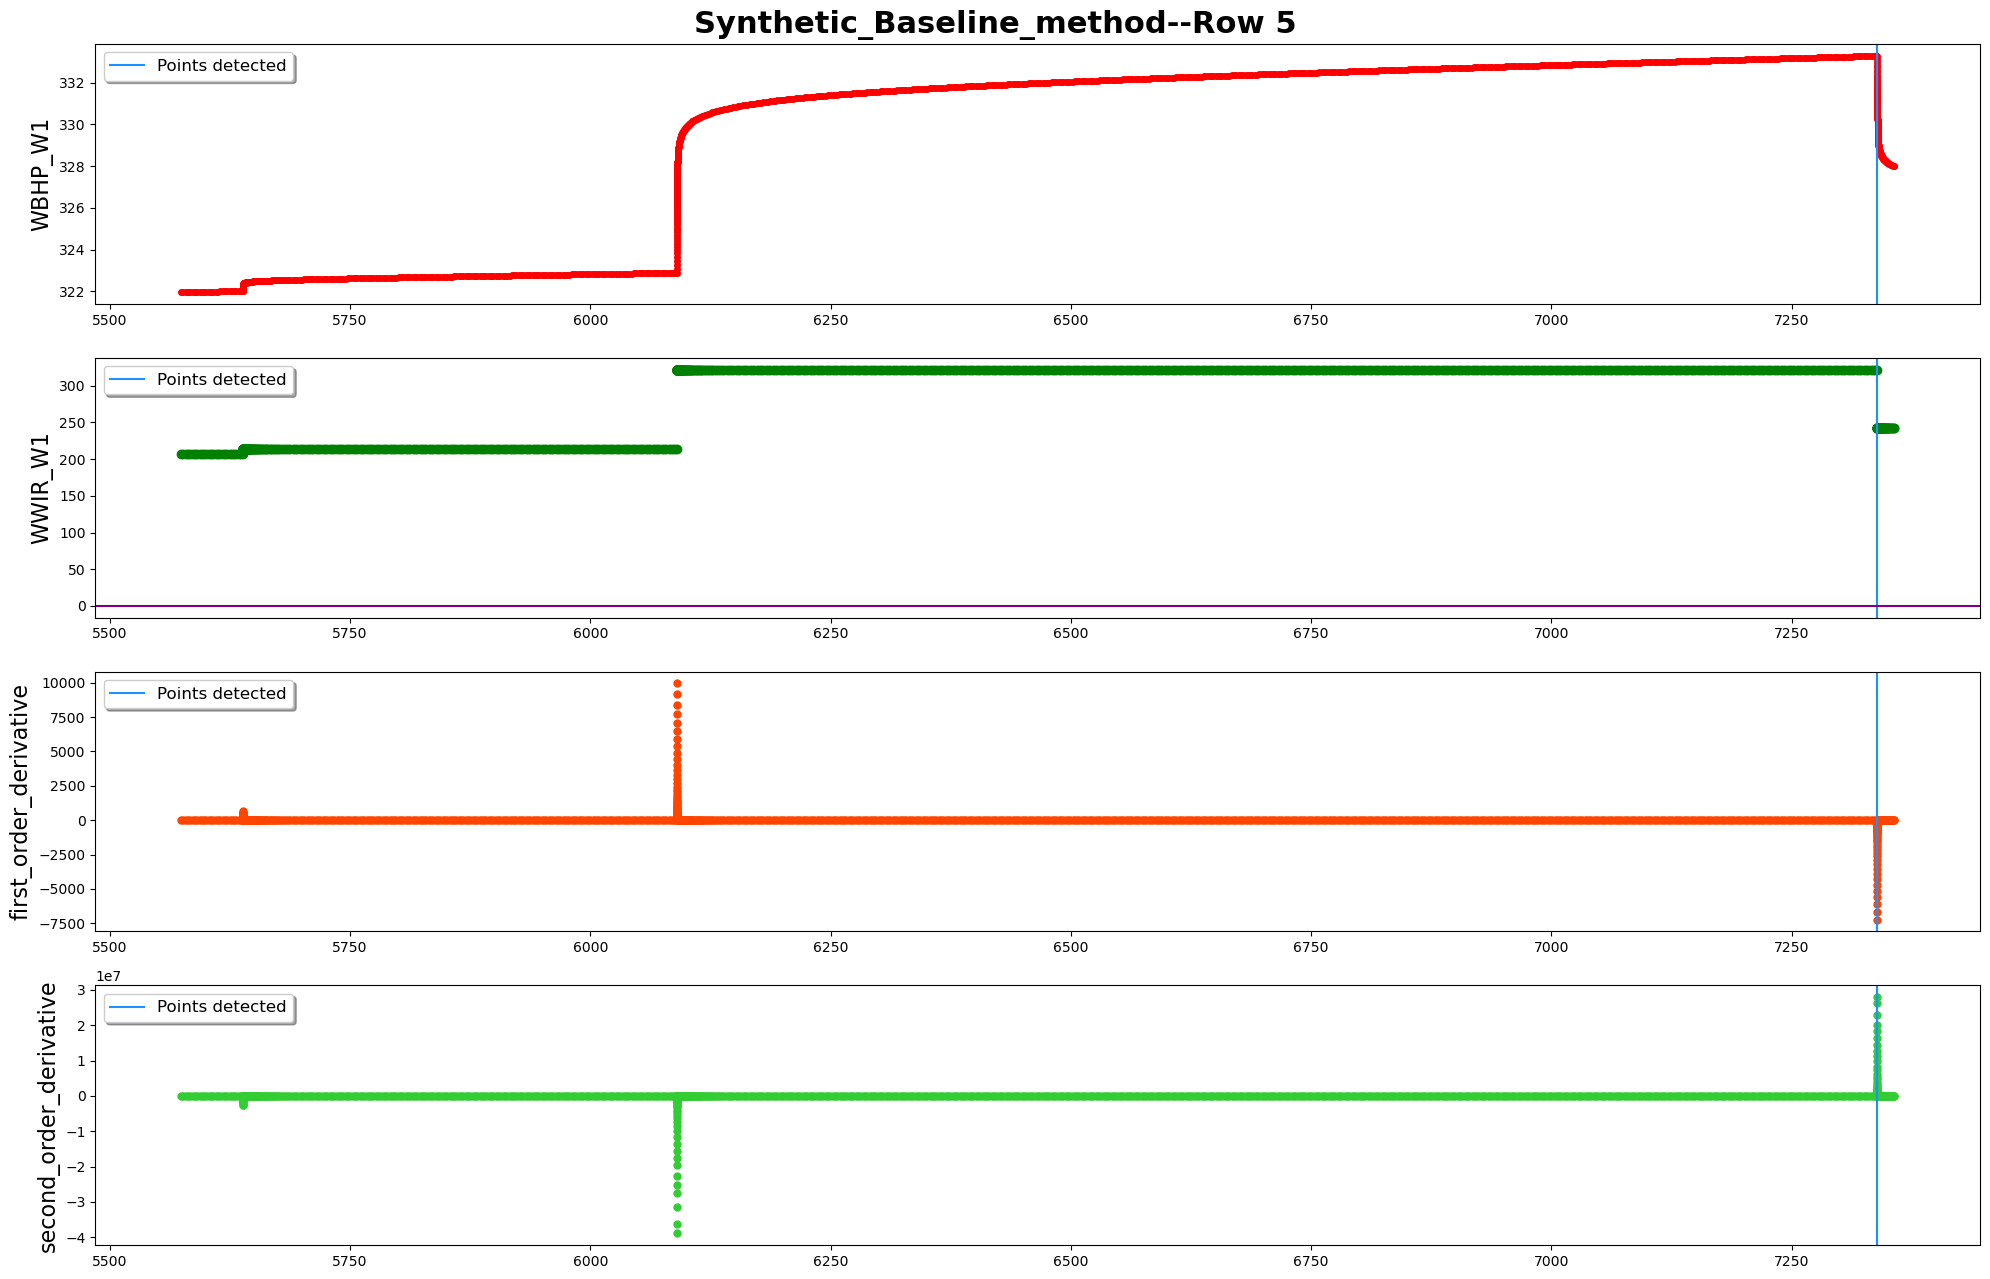

------row 6-----detected points:[6011, 6012, 6875, 6876]


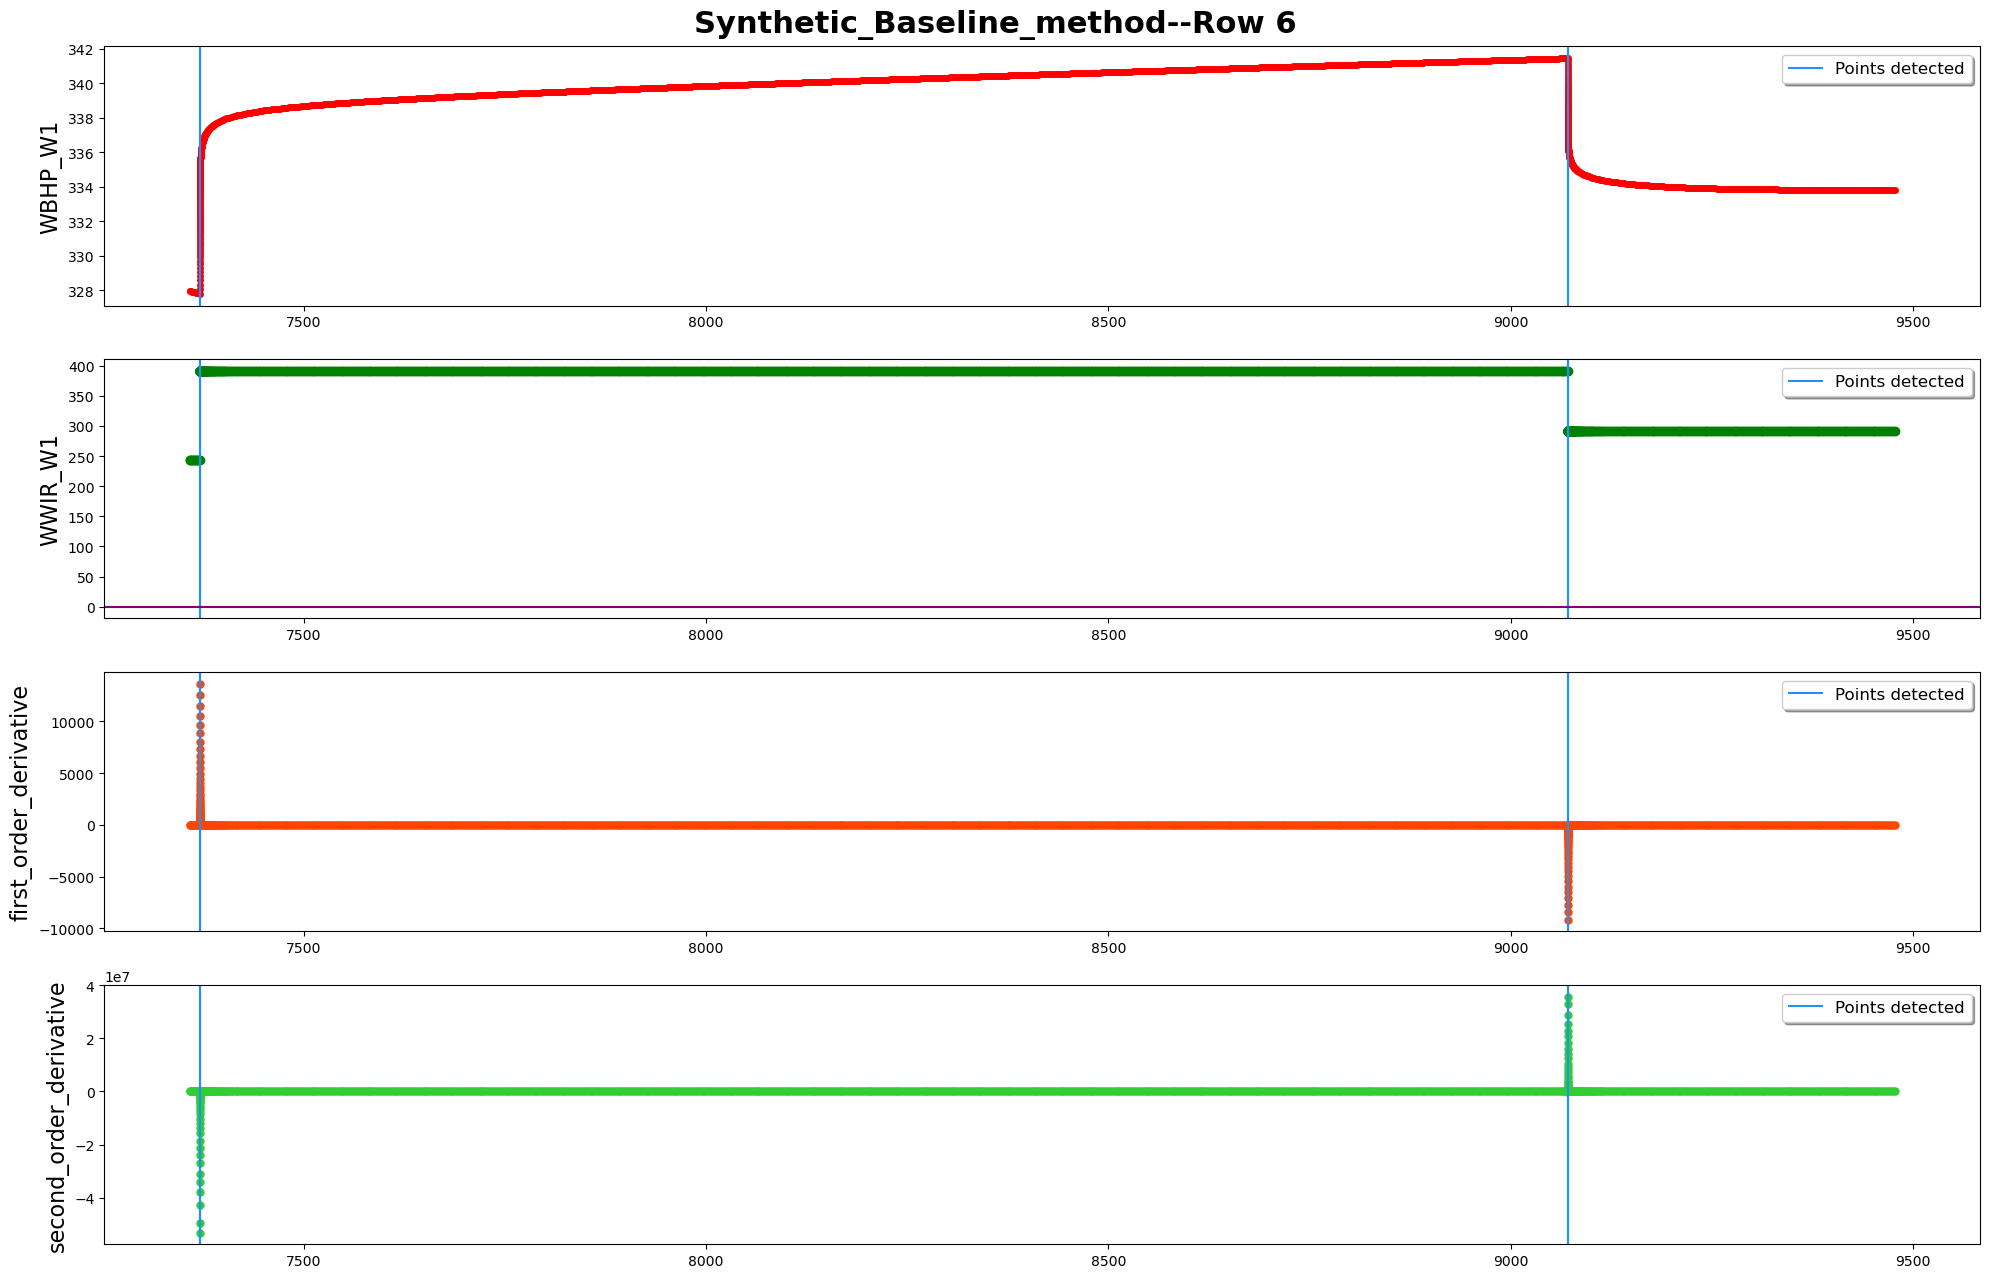

------row 7-----detected points:[7964, 8347, 8348]


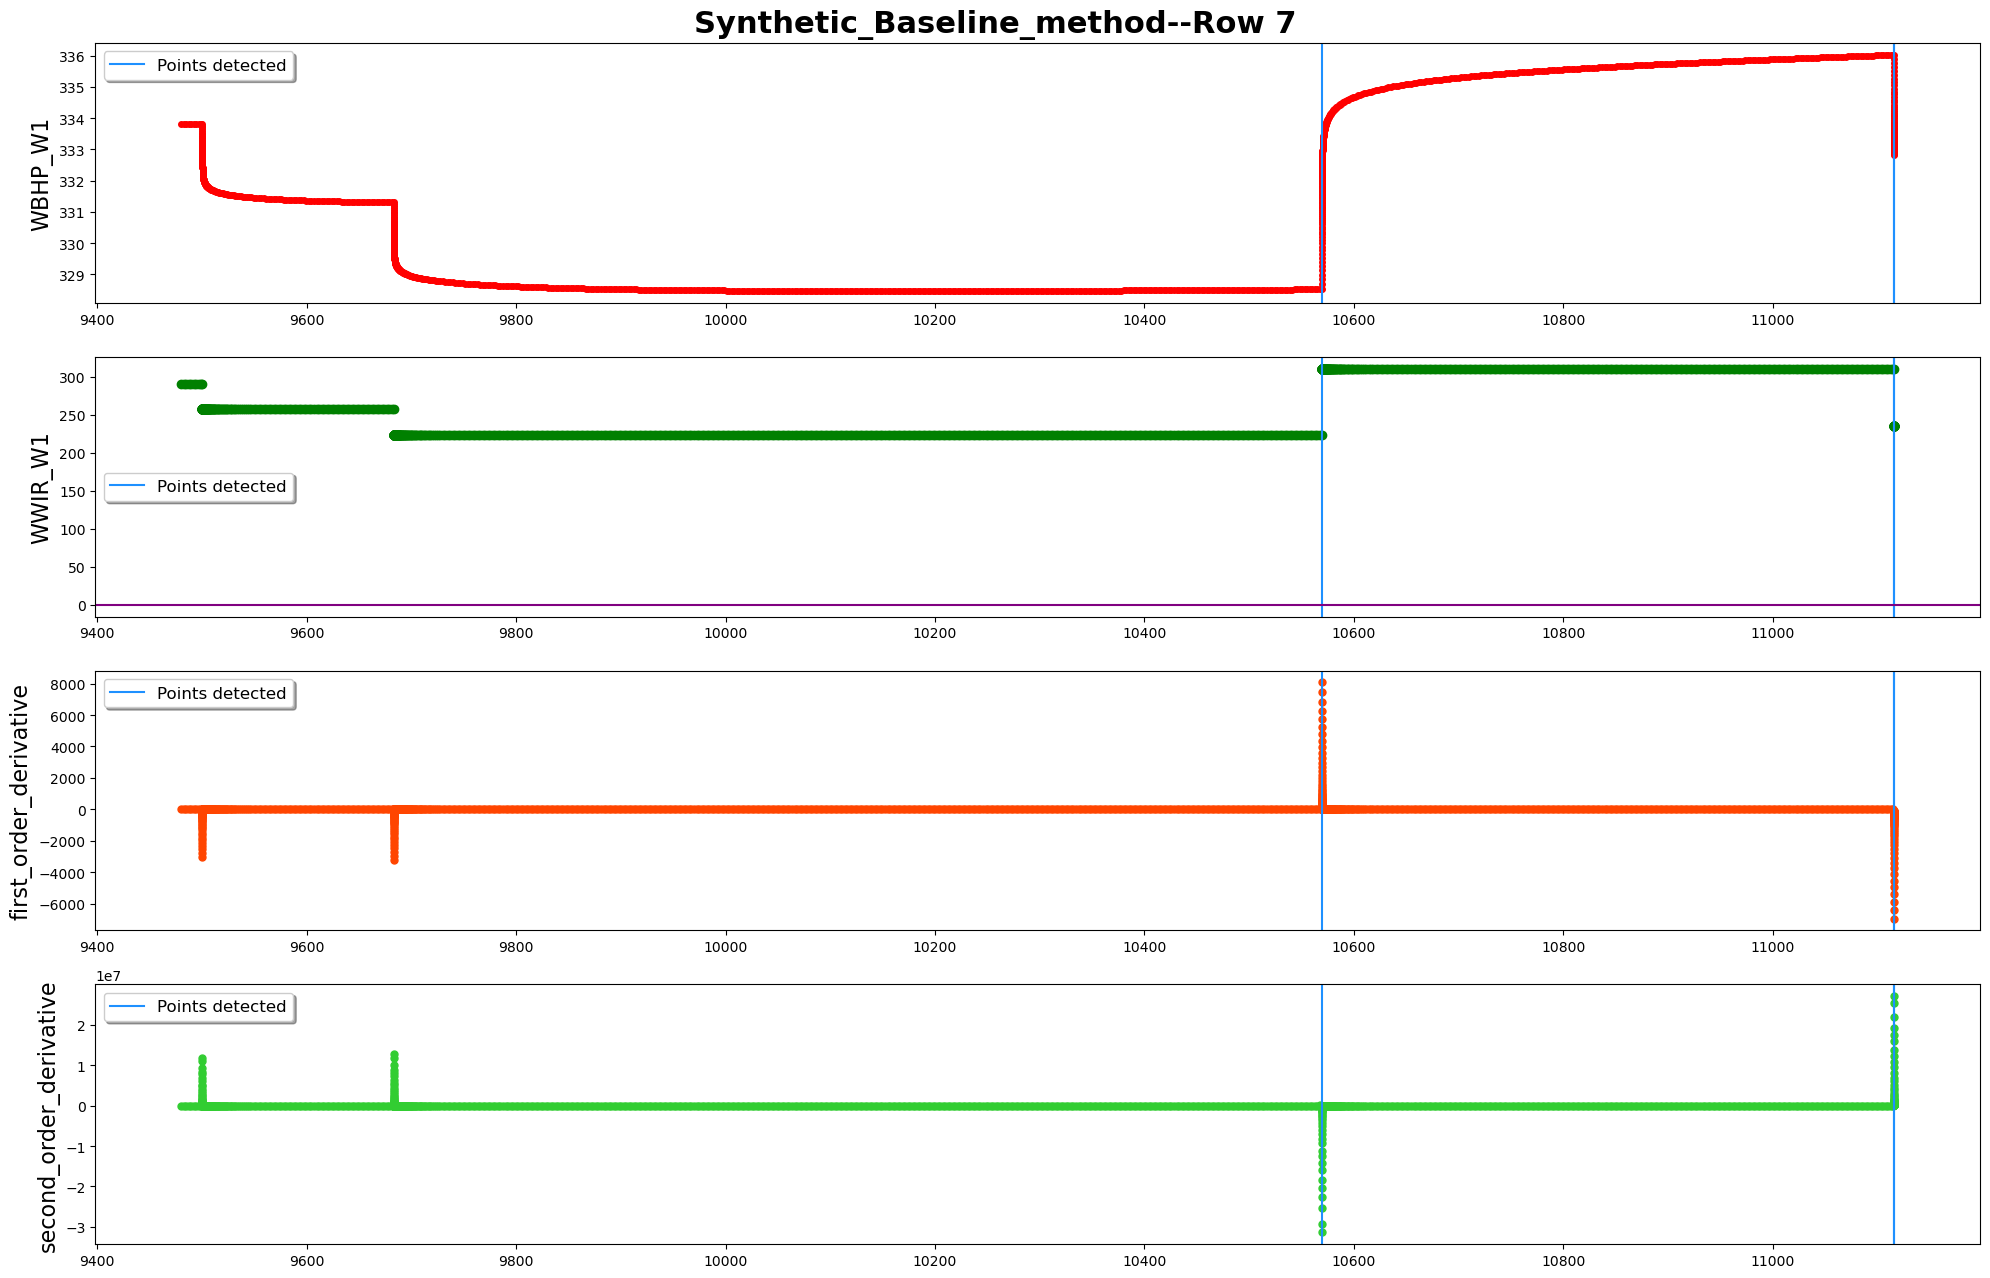

------row 8-----detected points:[9412]


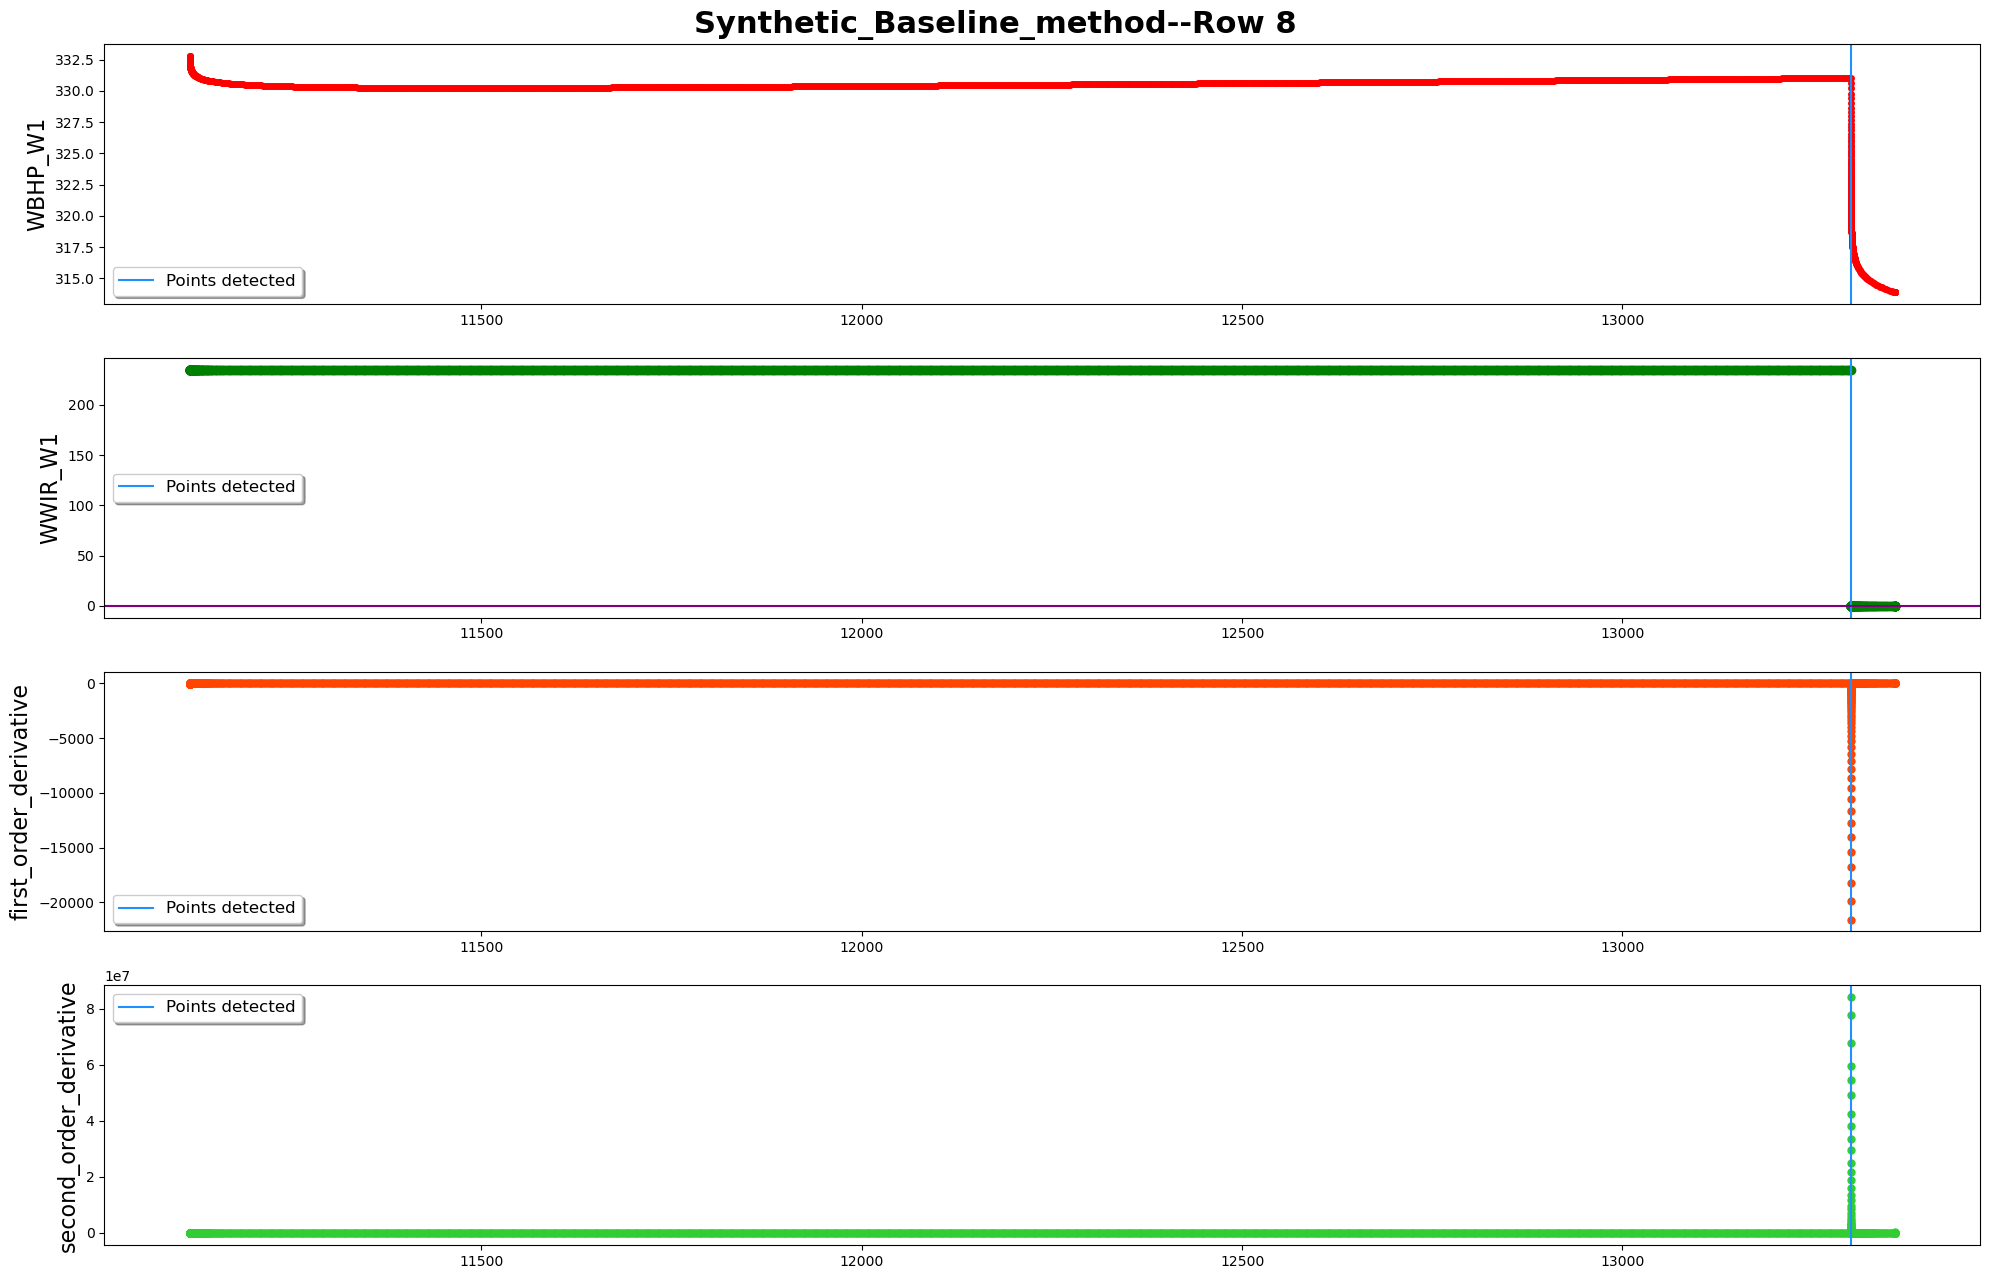

------row 9-----detected points:[9930, 9931, 10598, 10599]


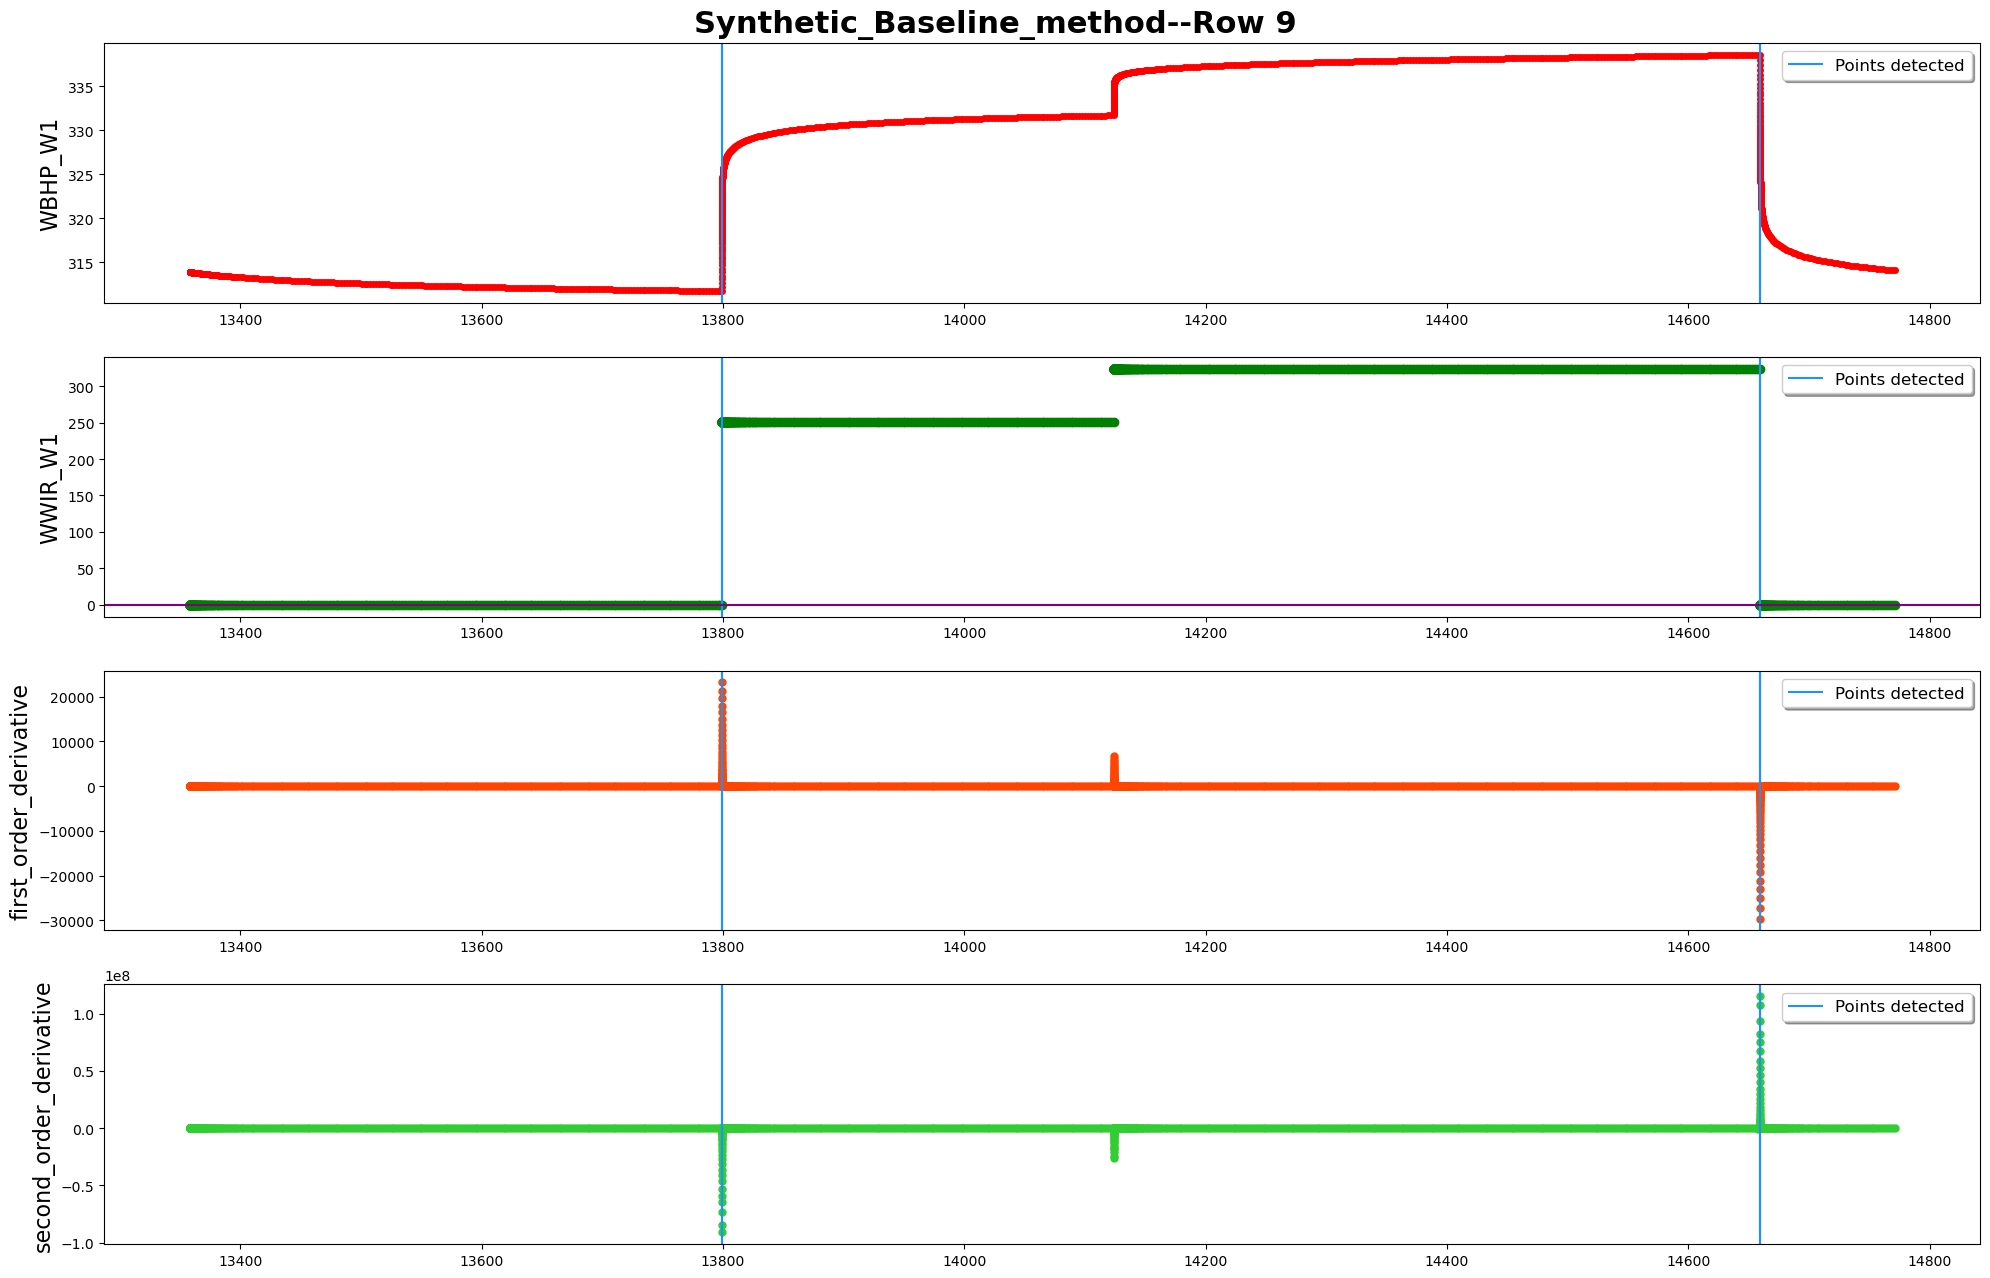

------row 10-----detected points:[11286, 11287]


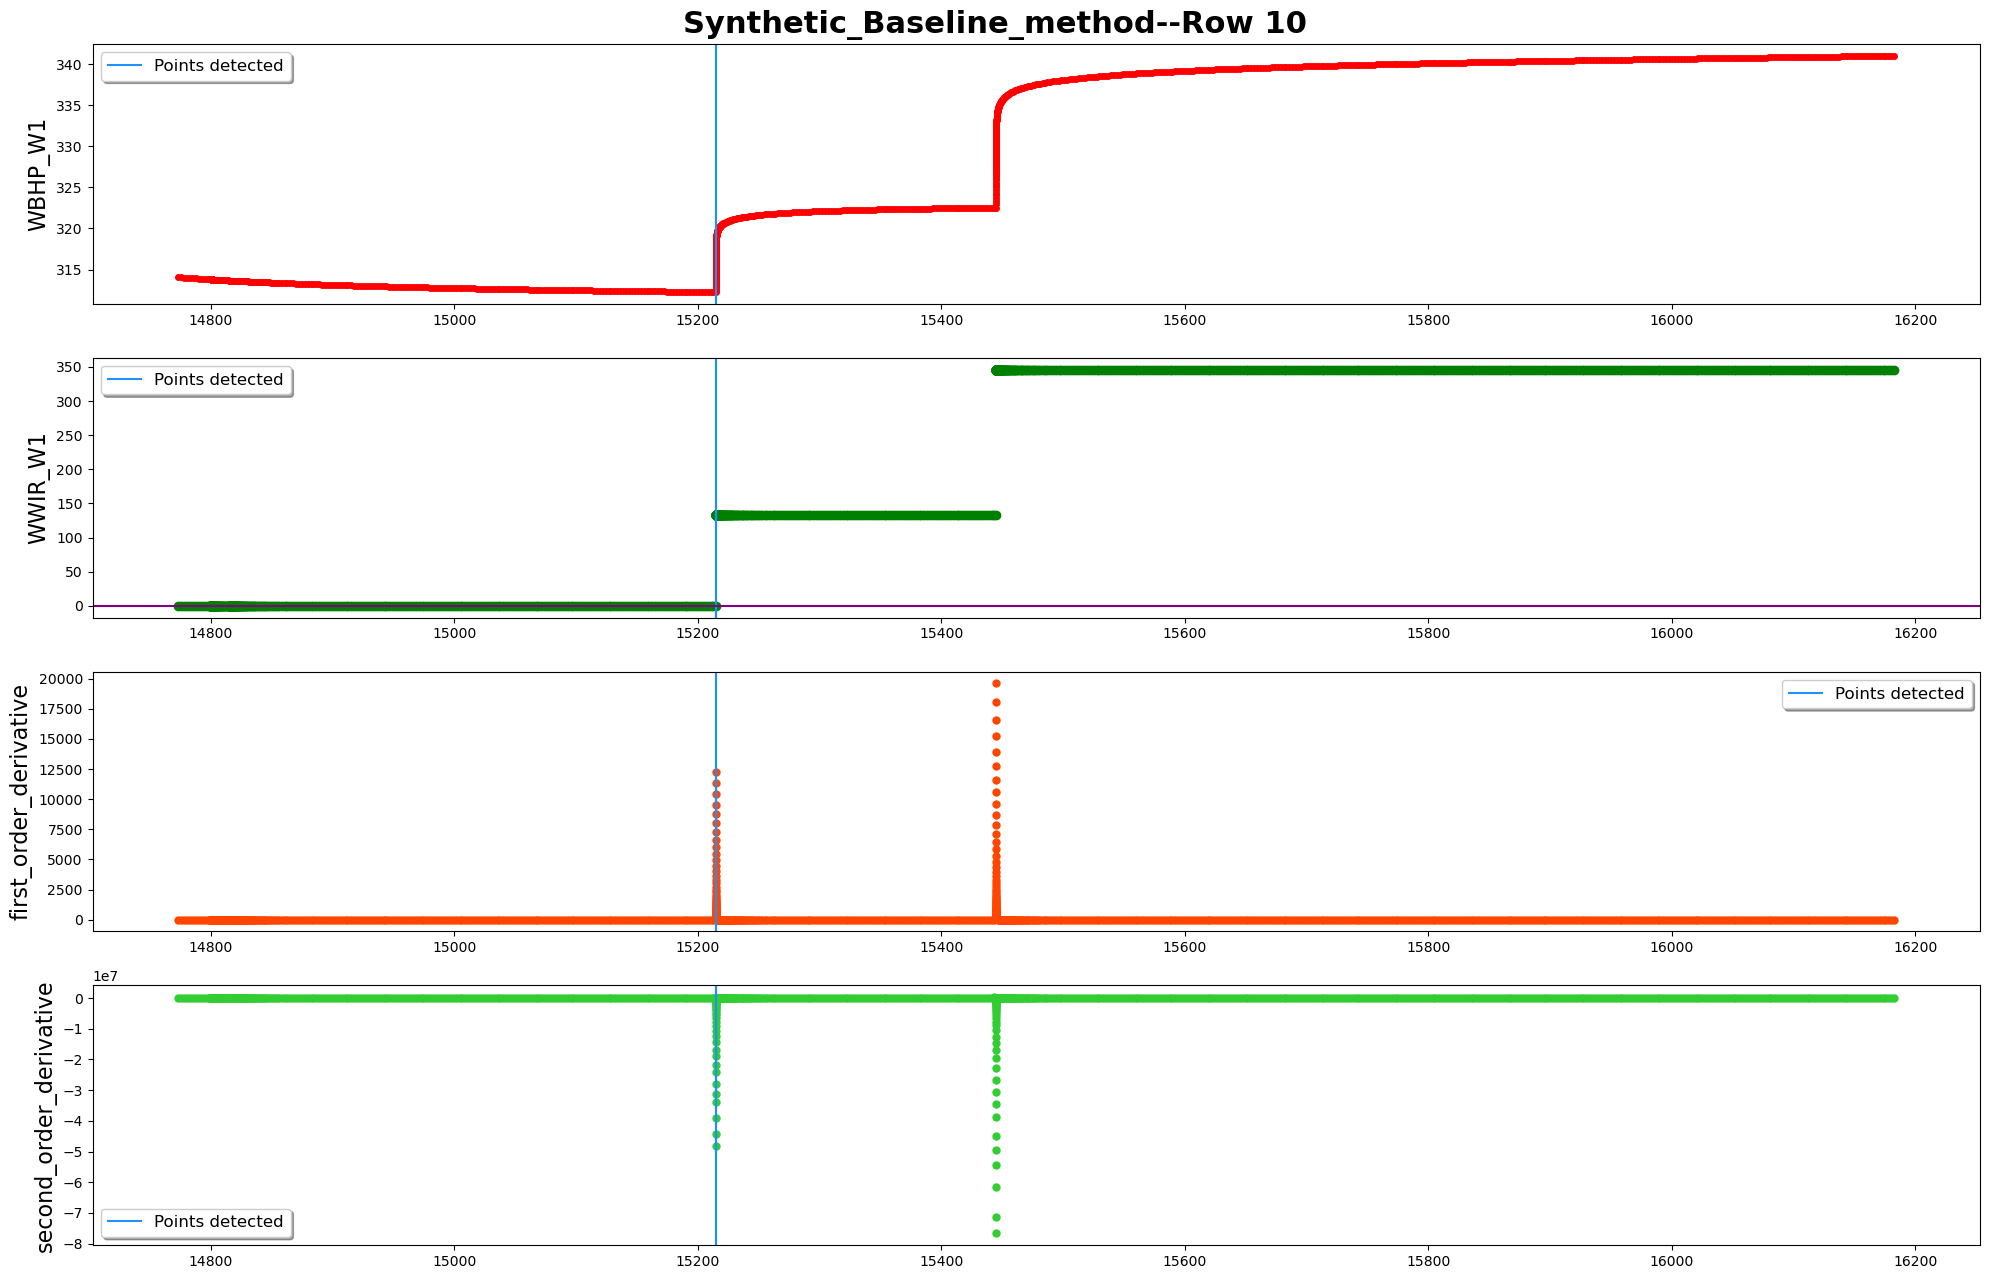

------row 11-----detected points:[12163, 12164, 12448, 12449, 12718, 12719, 13085, 13086]


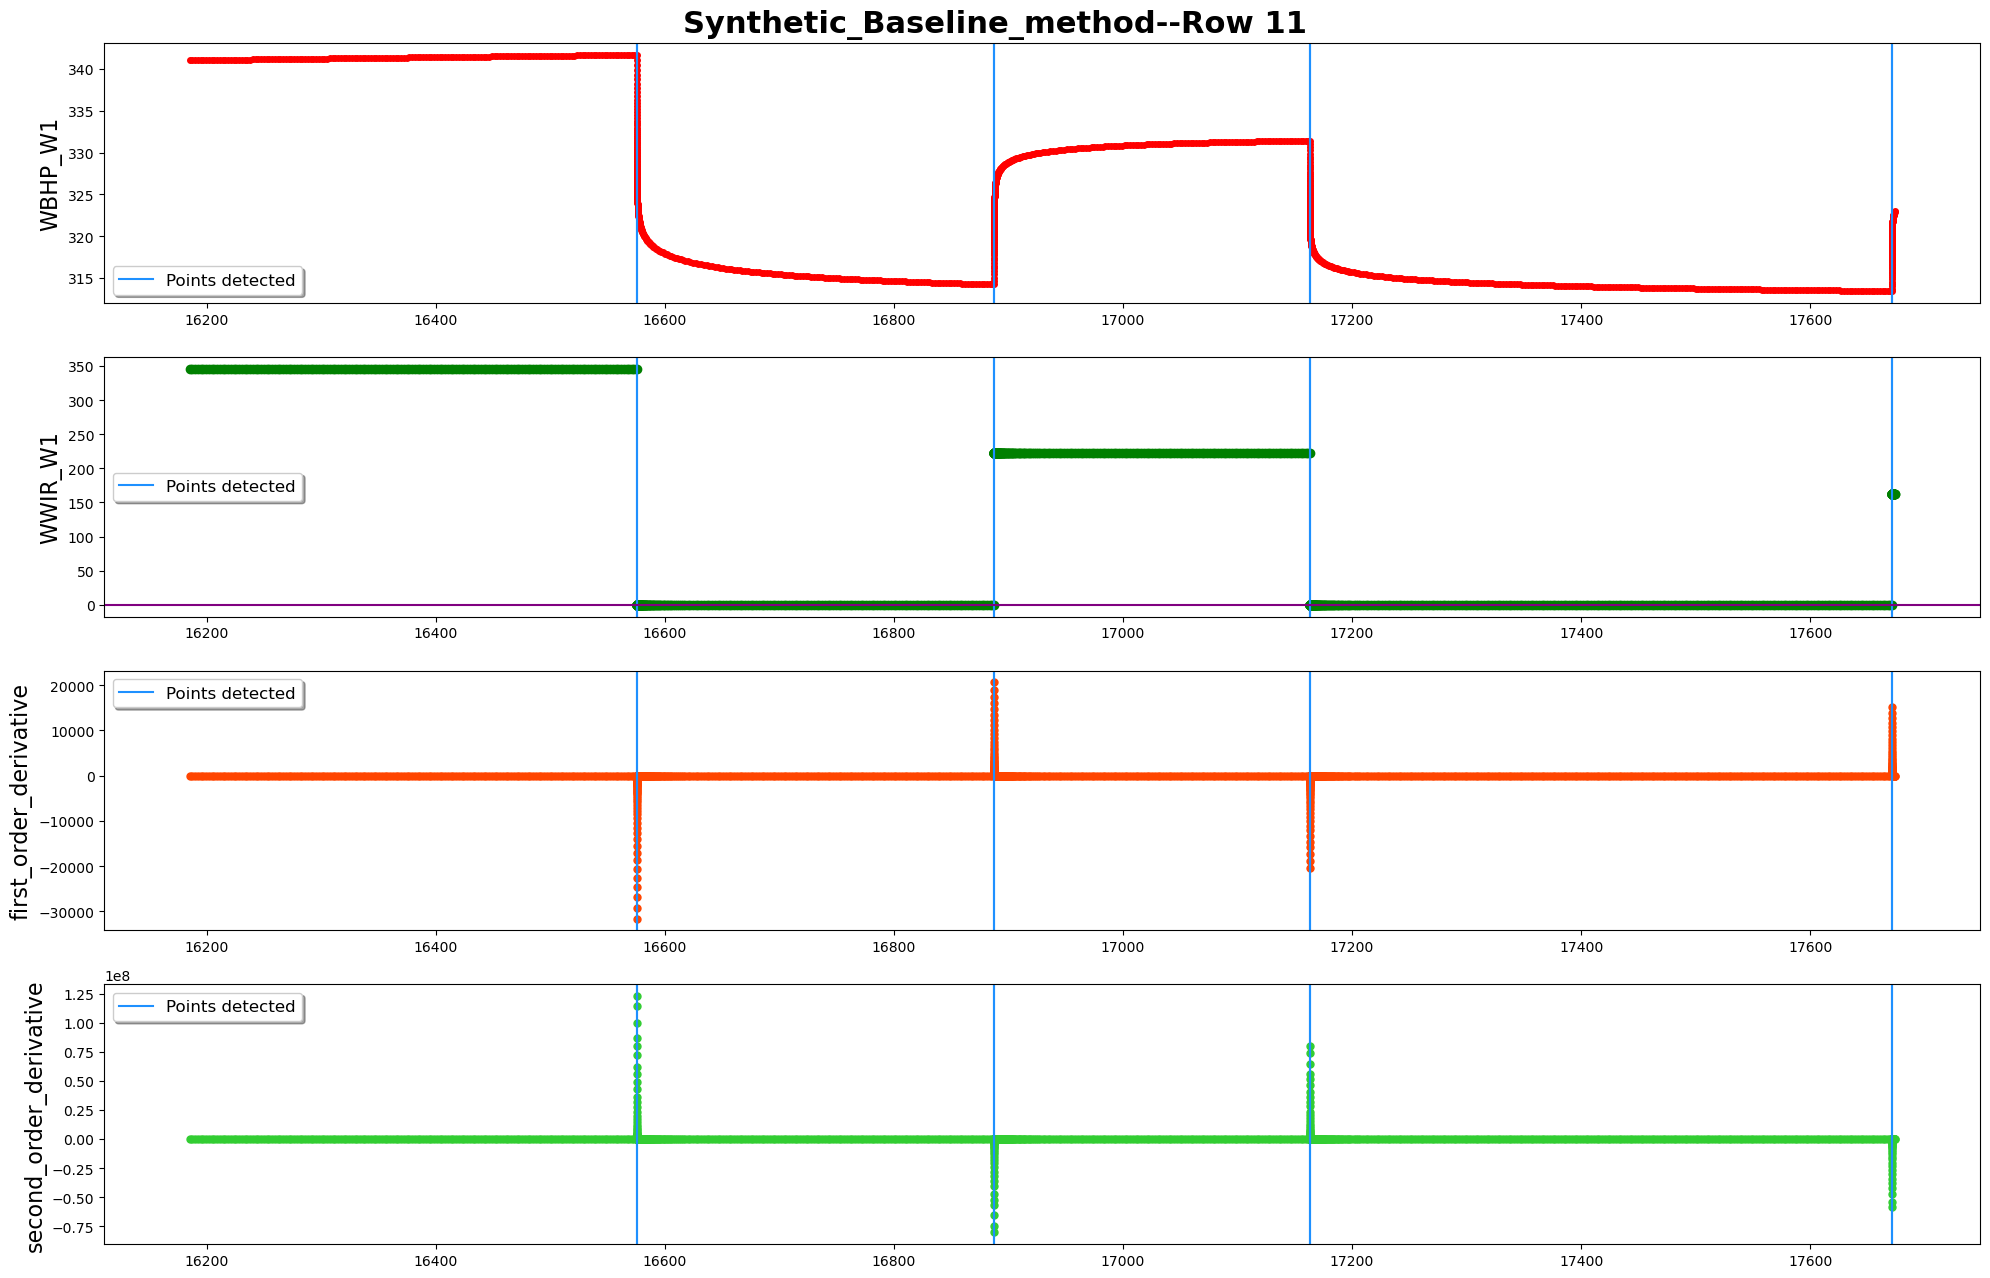

------row 12-----detected points:[14240, 14241]


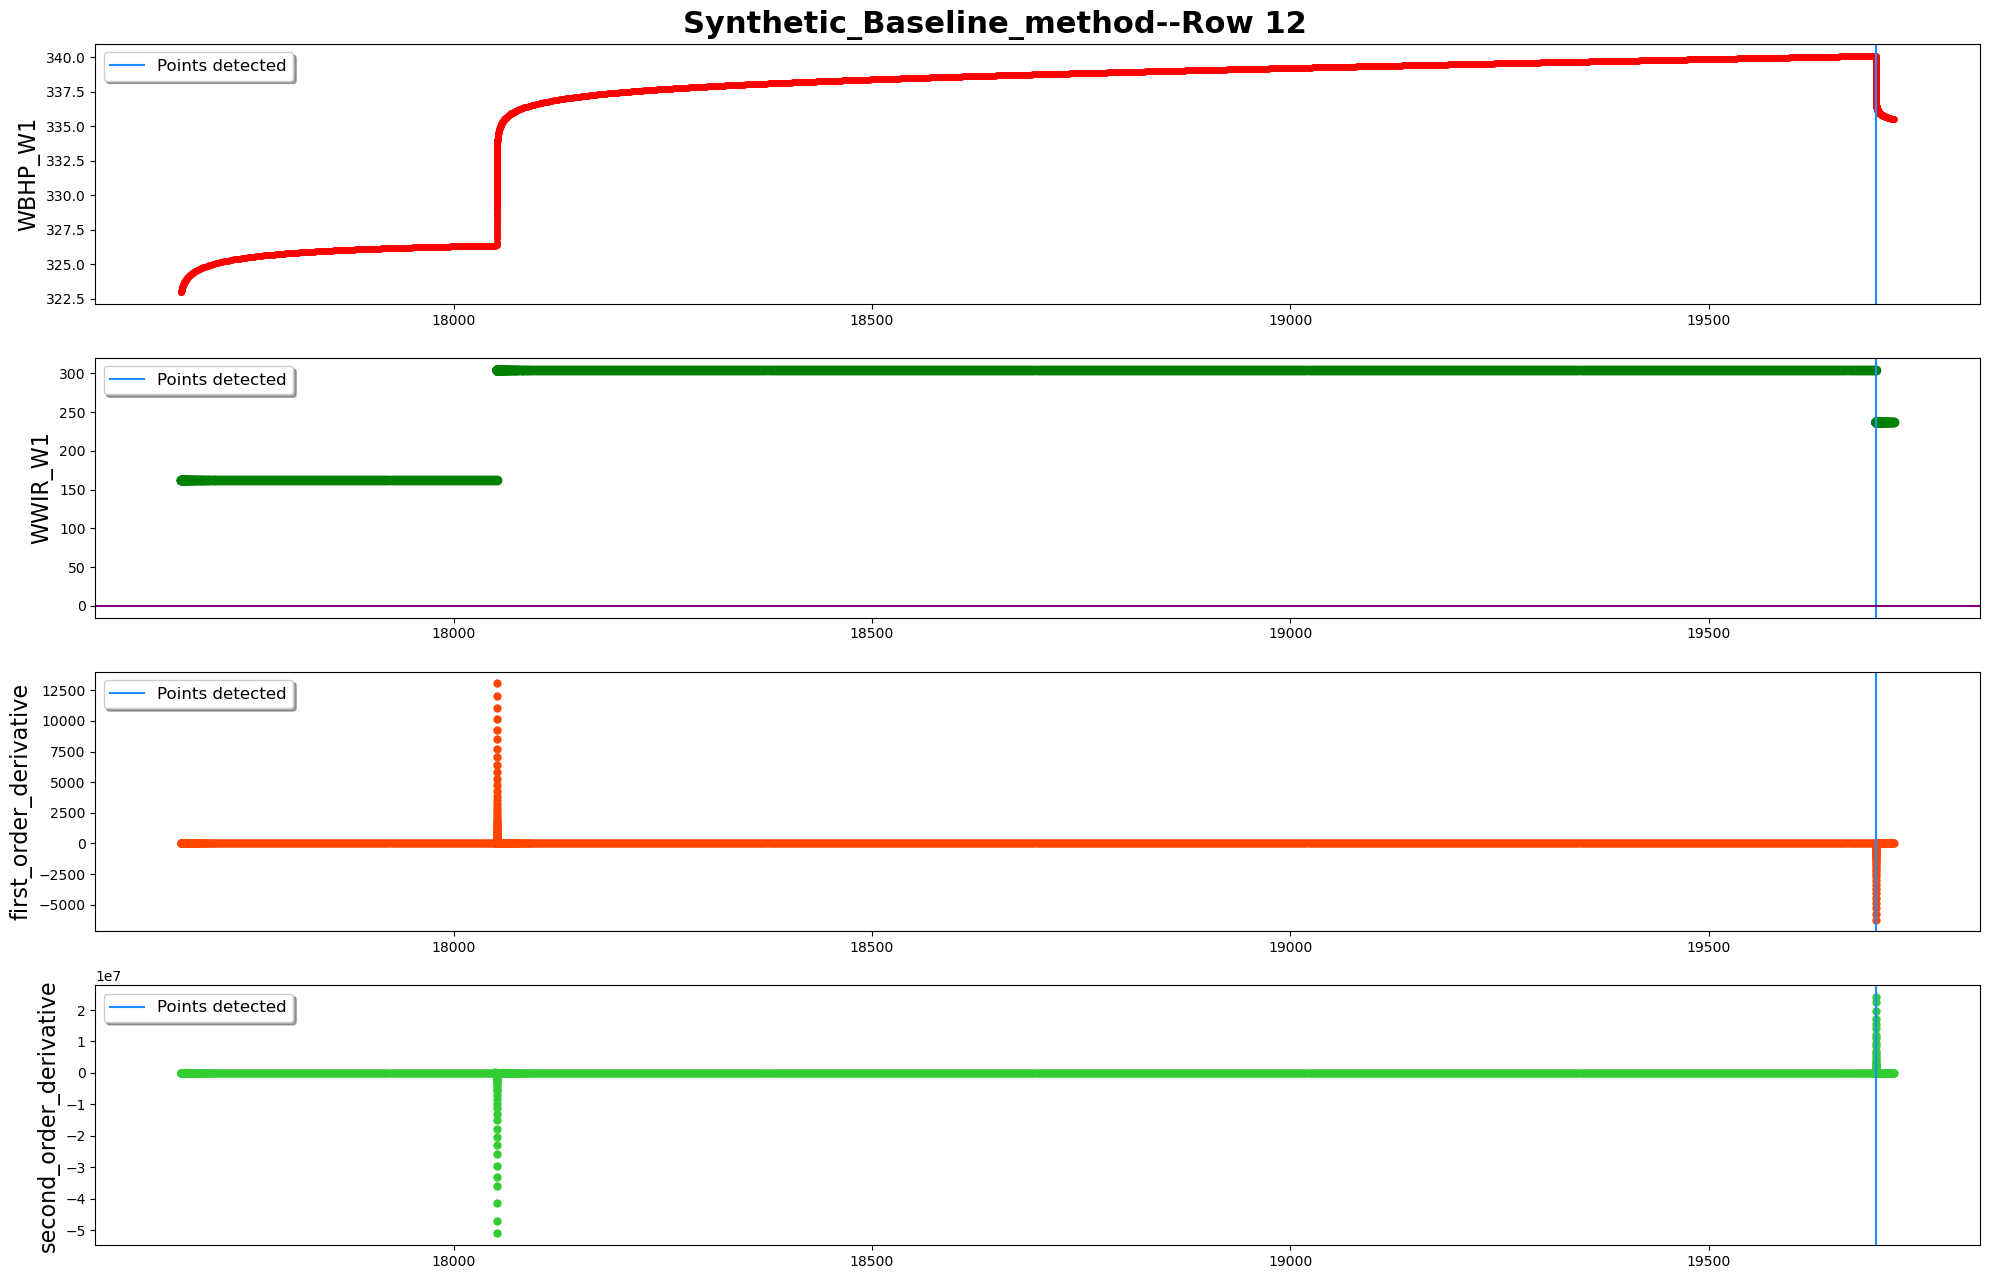

------row 13-----detected points:[15229, 15580, 15581]


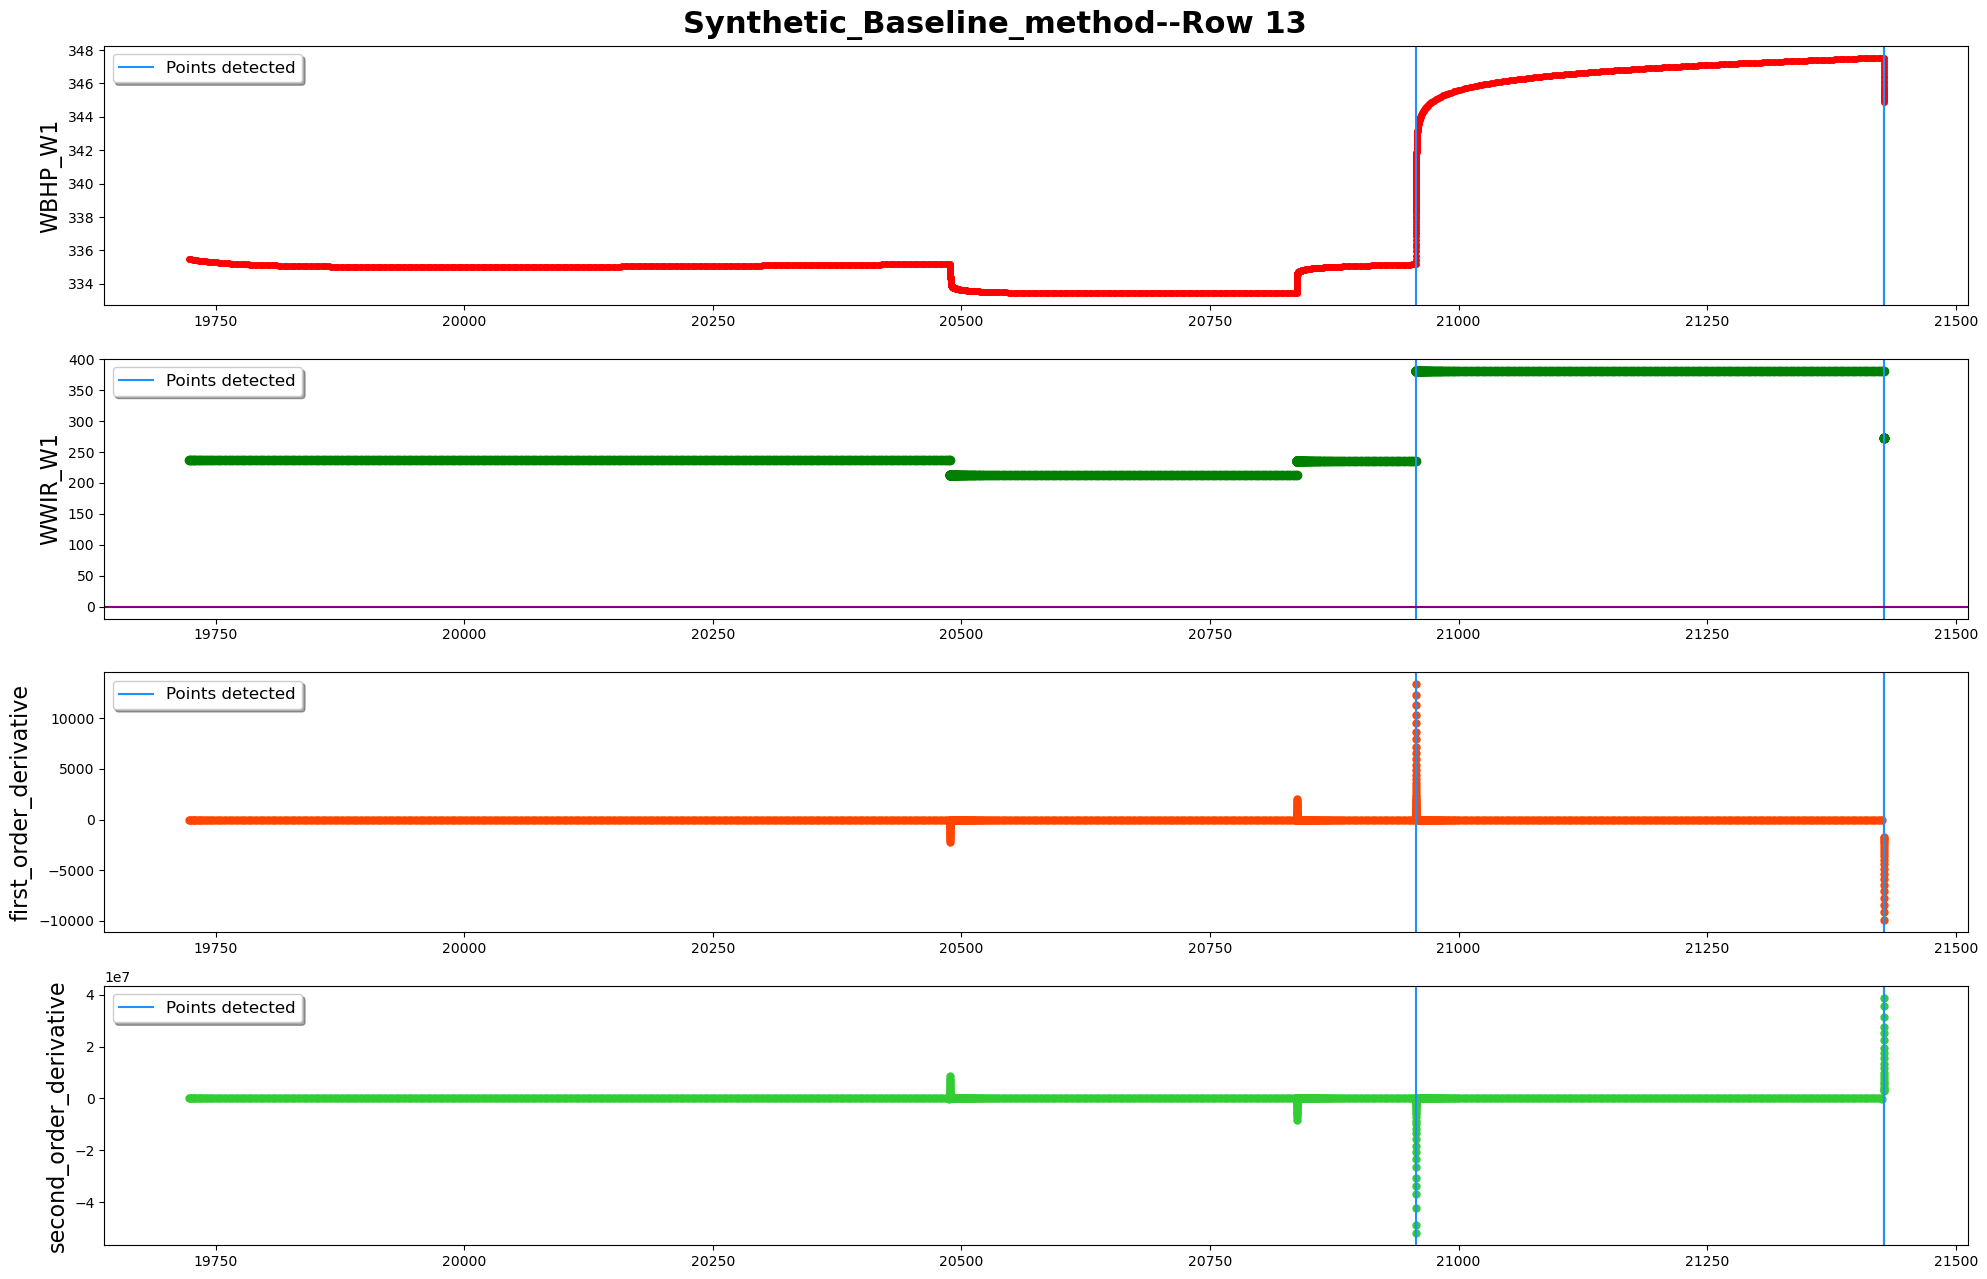

------row 14-----detected points:[16027, 16480, 16481]


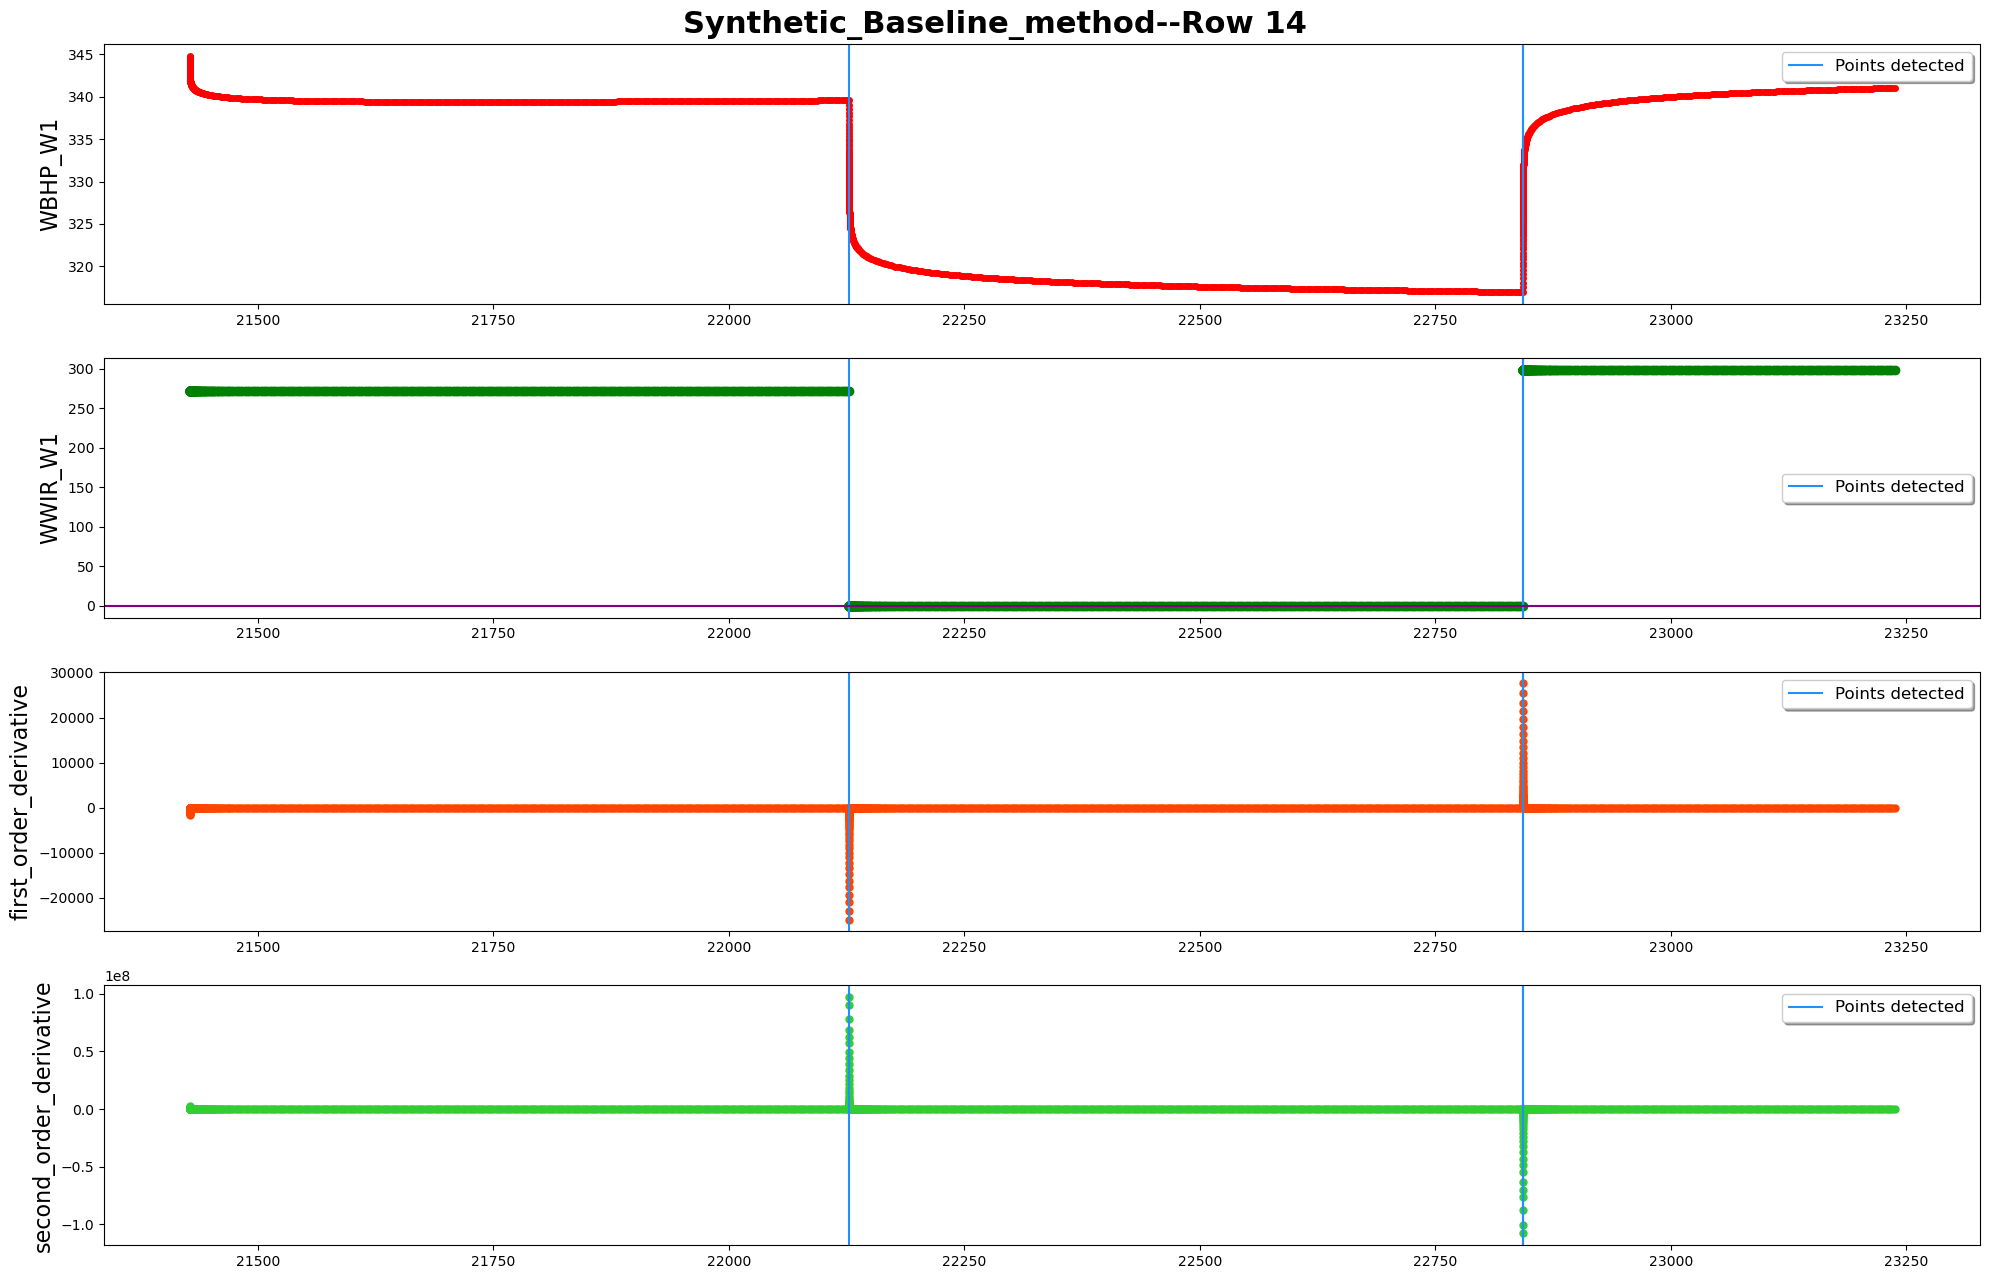

------row 15-----detected points:[]


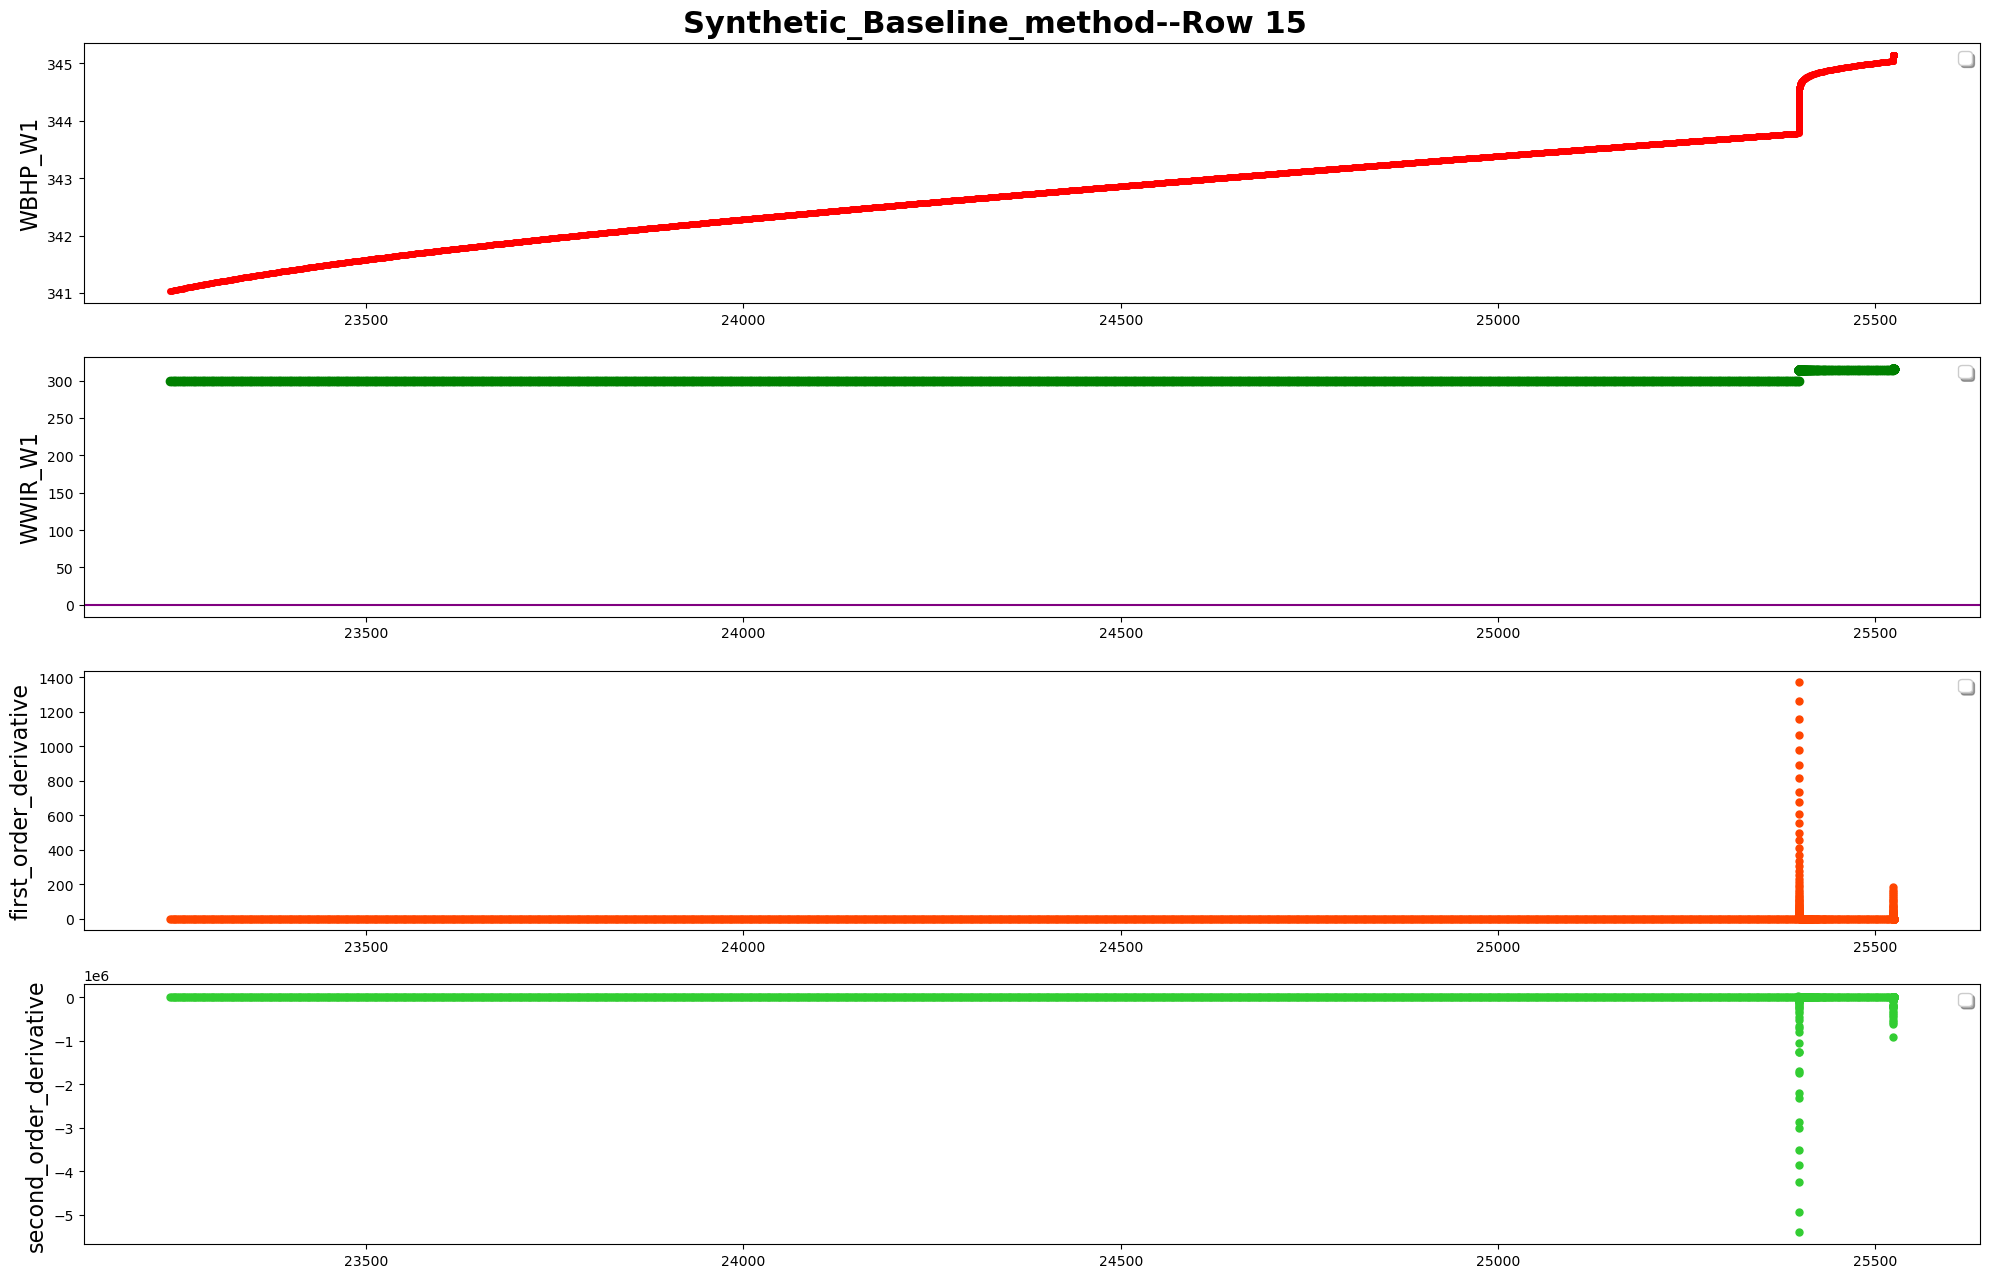

------row 16-----detected points:[18179, 18180]


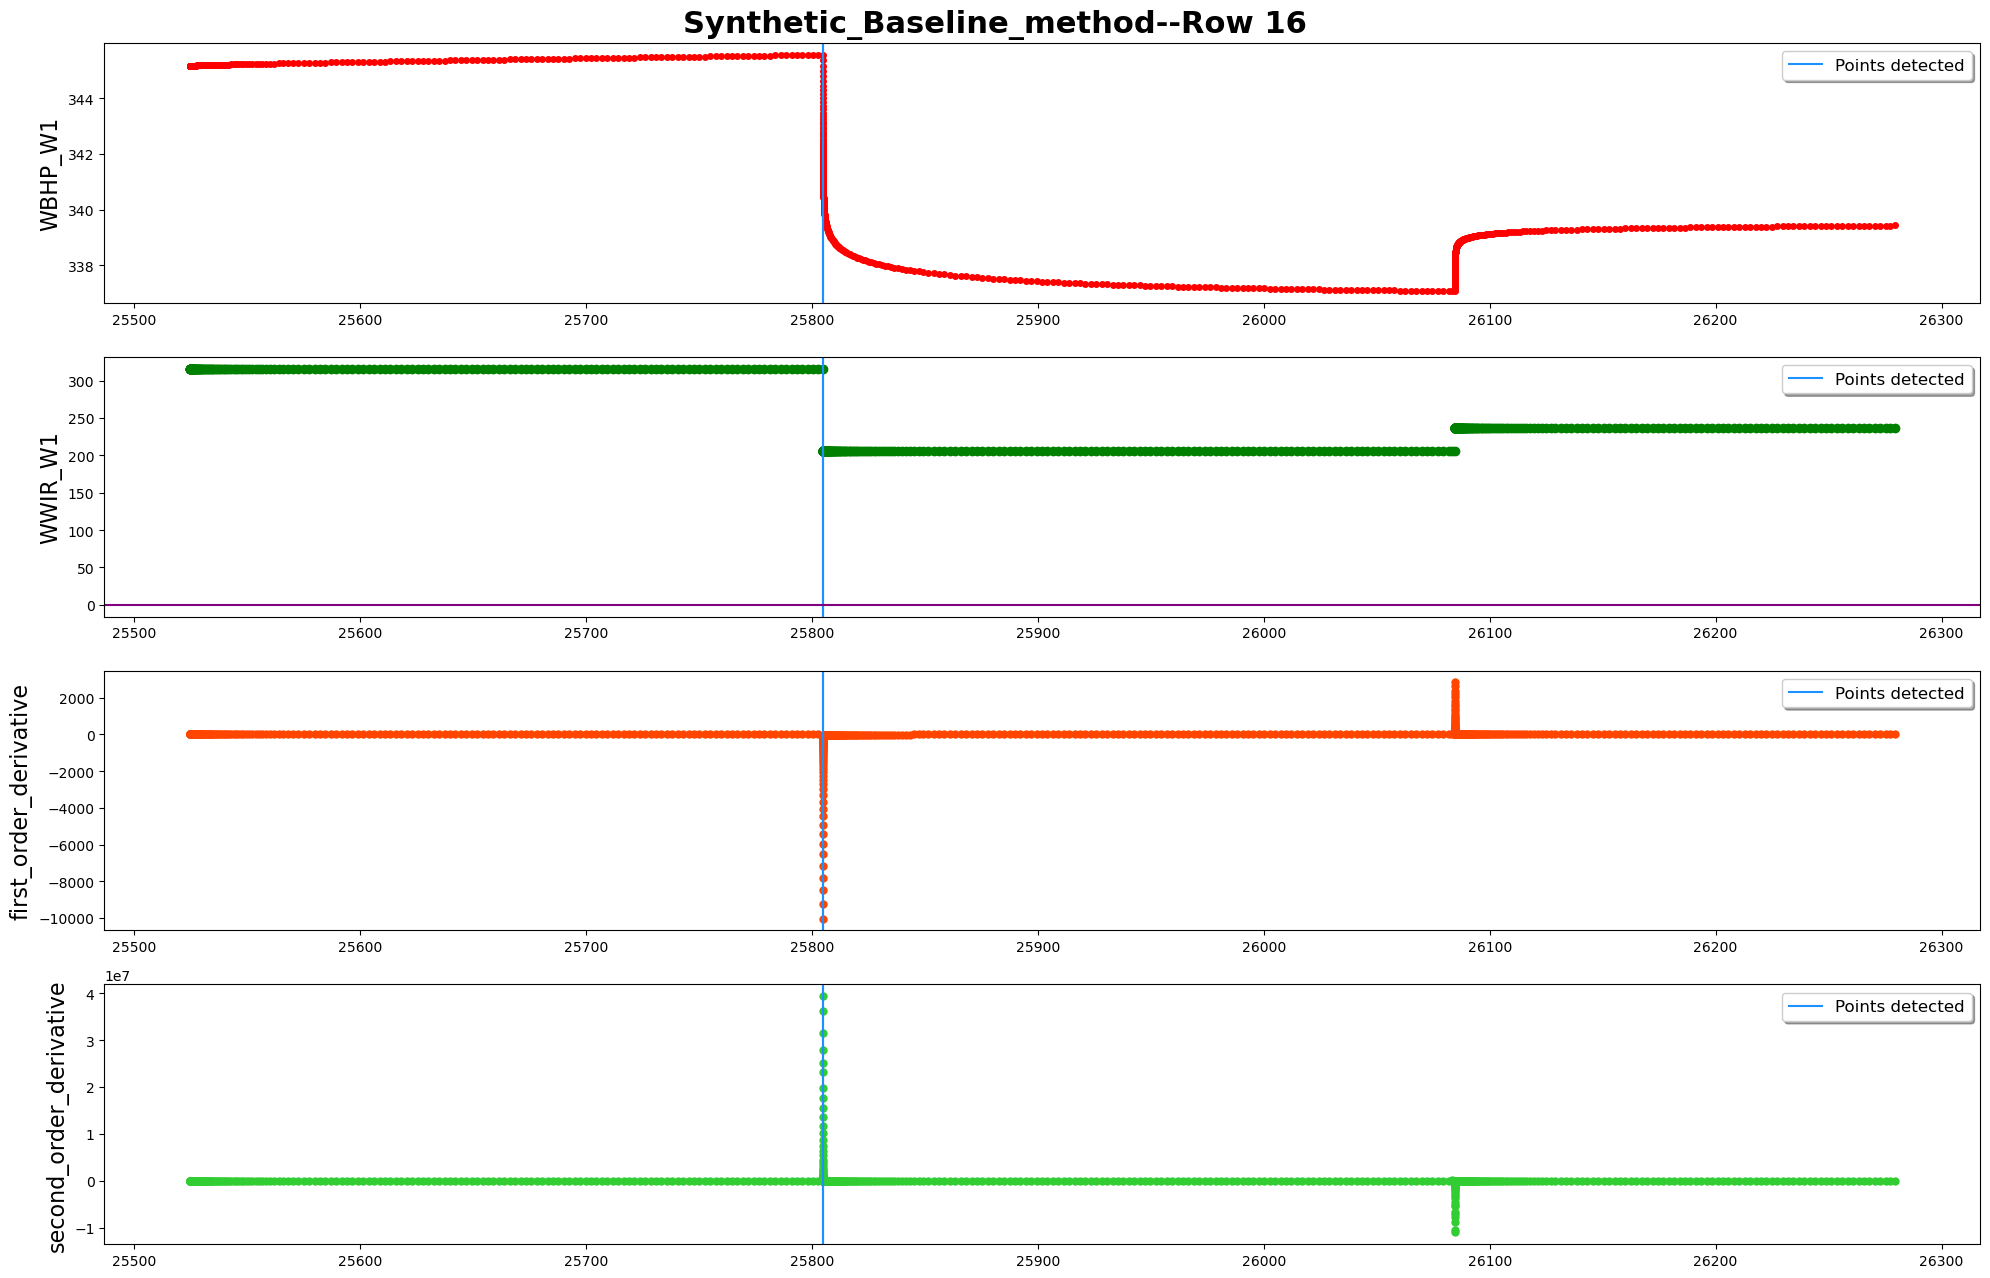

In [20]:
#plot & save
filename_toSave="../data_output/Synthetic_Baseline_method_Alexey.pdf"
plot_name="Synthetic_Baseline_method"
plot_whole=True
plot_details=True
plot_statistics=True
PlotNSave(df,
          df,
          breakpoints_detected_baseline2,
          ground_truth,
          data_inOneRow,
          plot_name,
          filename_toSave,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)

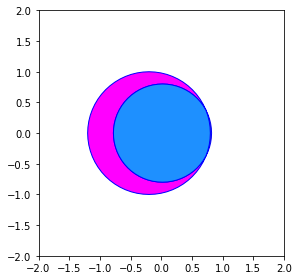

In [11]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.02,0).buffer(0.8)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


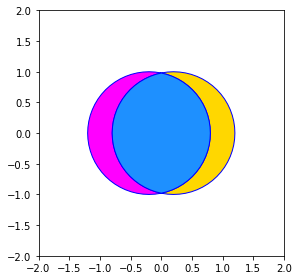

In [10]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import descartes

# create the circles with shapely
a = sg.Point(-.2,0).buffer(1.)
b = sg.Point(0.2,0).buffer(1.)

# compute the 3 parts
left = a.difference(b)
right = b.difference(a)
middle = a.intersection(b)

# use descartes to create the matplotlib patches
#'dodgerblue','fuchsia',  'gold'
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(right, fc='gold', ec='b'))
ax.add_patch(descartes.PolygonPatch(left, fc='fuchsia', ec='b'))
ax.add_patch(descartes.PolygonPatch(middle, fc='dodgerblue', ec='b'))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()